In [2]:
from sklearn import svm,metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.model_selection import train_test_split
from scipy.linalg import eigh


mnist=pd.read_csv('output.csv')
xdata=mnist.iloc[:,2:].values
ydata=mnist.iloc[:,1].values
print(xdata.shape)
print(ydata.shape)

(11981, 783)
(11981,)


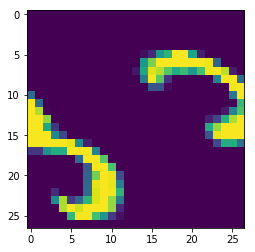

(7188, 783)


In [5]:
row, col = xdata.shape
# we convert each 784 entry rows into a row col 2D matrix of 28* 28 to visualize the image
a = np.zeros((int(math.pow(col, 0.5)), int(math.pow(col, 0.5))), np.int32)
r, c = a.shape

# randomly selecting a row for visualization
rand = random.randint(0, row)
img = xdata[rand]
test = ydata[rand]
#creating 2d image from pixel values
for i in range(r):
    for j in range(c):
        a[i][j] = xdata[rand][i * c + j]

plt.imshow(a)
plt.show()

Y = ydata
x_temp, x_test, y_temp, y_test = train_test_split(xdata, Y, test_size=0.2, random_state=50)
x_train, x_validation, y_train, y_validation = train_test_split(x_temp,y_temp,test_size=0.25,random_state=50)
print(x_train.shape)



reduced dimension shape= (7188, 256)
1000 256


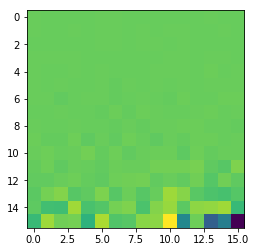

In [76]:
##applying pca to reduce the dimension of the images
def red_dim(X,new_dim=2):
    x=X.T
    m=x.shape[1]-1
    mean=np.mean(x,axis=1).reshape(-1,1)
    x=x-mean
    cov=np.cov(x.T)
    lam, V = eigh(cov,eigvals=(m - new_dim + 1, m))
    eigen_face = V.T @ x.T
    eigen_face.shape
    signature = (eigen_face @ x)
    return signature.T

x_train=red_dim(x_train,256)
print("reduced dimension shape=",x_train.shape)
plt.imshow(x_train[0].reshape(16,16))


mean=x_train.mean(axis=0)
std=x_train.std(axis=0)
x_train=(x_train-mean)/std
##converting 3 into -1 and 8 into 1
y_train = (y_train.reshape(-1,1) > 4) * 1 + (y_train.reshape(-1,1) < 4) * -1

x_test=x_train[1000:1500,:]
y_test=y_train[1000:1500,:]
x_train=x_train[:1000,:]
y_train=y_train[:1000,:]
m,n=x_train.shape
print(m,n)



In [80]:
def fx(x_train,alpha,y_train,xi,bias):
    return ((alpha*y_train*(x_train@xi.T)).sum(axis=0)+bias).reshape(-1,1)

c=1
tol=0.001
max_passes=20
alpha=np.zeros(m).reshape(-1,1)
bias=0
passes=0
while(passes<max_passes):
    num_changed_alphas=0
    for i in range(m):
        ssum=fx(x_train,alpha,y_train,x_train[[i]],bias)
        errori=ssum-y_train[i,0]
        if(((y_train[i,0]*errori < ((-1)*tol)) and (alpha[i,0]<c)) or ((y_train[i,0]*errori > tol) and (alpha[i,0]>0))):
            k=i
            while(k==i):
                k=random.randint(0,m-1)
            ssum=fx(x_train,alpha,y_train,x_train[[k]],bias)
            
            errork=ssum-y_train[k,0]
            oldalpha1=alpha[i,0]
            oldalpha2=alpha[k,0]
            if(y_train[i,0]!=y_train[k,0]):
                L=max(0,oldalpha2-oldalpha1)
                H=min(c,c+oldalpha2-oldalpha1)
            else:
                L=max(0,oldalpha1+oldalpha2-c)
                H=min(c,oldalpha1+oldalpha2)
            if(L==H):
                continue
            #n=2*np.inner(np.array(x_train[i]),np.array(x_train[k]))
            #n=n-np.inner(np.array(x_train[i]),np.array(x_train[i]))
            #n=n-np.inner(np.array(x_train[k]),np.array(x_train[k]))
            n = (2 * (x_train[i] @ x_train[k])) - (x_train[i] @ x_train[i]) - (x_train[k] @ x_train[k])
            print("n = {}".format(n))
            if(n>=0):
                continue
            temp=oldalpha2-(y_train[k,0]*(errori-errork)/n)
            if(temp>H):
                alpha[k]=H
            elif(temp>=L and temp<=H):
                alpha[k]=temp
            else:
                alpha[k]=L
            if(np.abs(alpha[k,0]-oldalpha2)<tol):
                continue
            alpha[i]=alpha[i,0]+(y_train[i,0]*y_train[k,0]*(alpha[k,0]-oldalpha2))
            b1=bias-errori-y_train[i,0]*(alpha[i,0]-oldalpha1)*(x_train[i]@x_train[i])
            -y_train[k,0]*(alpha[k,0]-oldalpha2)*(x_train[i]@x_train[k])
            b2=bias-errork-y_train[i,0]*(alpha[i,0]-oldalpha1)*(x_train[i]@x_train[k])
            -y_train[k,0]*(alpha[k]-oldalpha2)*(x_train[k]@x_train[k])
            if(alpha[i,0]>0 and alpha[i,0]<c):
                bias=b1
            elif(alpha[k,0]>0 and alpha[k,0]<c):
                bias=b2
            else:
                bias=(b1+b2)/2
            print("bias=",bias)
            num_changed_alphas=num_changed_alphas+1
            print("num_changed_alpha=",num_changed_alphas))
    if(num_changed_alphas==0):
        passes=passes+1
    else:
        passes=0


n = -546.1911439599241
bias= [[-0.91494265]]
num_changed_alpha=1
n = -532.6642008858208
bias= [[1.1131124]]
num_changed_alpha=2
n = -572.5759448532813
bias= [[1.21645898]]
num_changed_alpha=3
n = -760.4283264215176
bias= [[0.96576856]]
num_changed_alpha=4
n = -566.3148497869649
bias= [[-1.057464]]
num_changed_alpha=5
n = -461.3425813693582
bias= [[1.03652201]]
num_changed_alpha=6
n = -411.5531374588076
bias= [[0.66584721]]
num_changed_alpha=7
n = -294.5456472056135
bias= [[0.92393918]]
num_changed_alpha=8
n = -497.59209786812886
bias= [[1.8514253]]
num_changed_alpha=9
n = -619.6642239816858
bias= [[-1.79153467]]
num_changed_alpha=10
n = -347.934945920088
bias= [[-0.12377145]]
num_changed_alpha=11
n = -413.4788190606028
bias= [[1.26142718]]
num_changed_alpha=12
n = -408.8017903376789
bias= [[1.20799632]]
num_changed_alpha=13
n = -462.6770025678572
bias= [[-0.79339815]]
num_changed_alpha=14
n = -318.349744303532
bias= [[-0.68200191]]
num_changed_alpha=15
n = -531.1684376169775
bias= [[1.

n = -534.5523242285874
getting stuck here
n = -482.203516708787
getting stuck here
n = -815.7273461096422
bias= [[11.39094966]]
num_changed_alpha=103
n = -436.4586900508873
getting stuck here
n = -433.81092015111705
getting stuck here
n = -825.284794255447
bias= [[5.32030758]]
num_changed_alpha=104
n = -577.1647355518182
bias= [[-0.72694615]]
num_changed_alpha=105
n = -656.0930883389675
bias= [[12.45802061]]
num_changed_alpha=106
n = -573.2908966898219
bias= [[27.81445951]]
num_changed_alpha=107
n = -392.24202396457616
bias= [[10.98778268]]
num_changed_alpha=108
n = -649.0298790397148
bias= [[3.80902314]]
num_changed_alpha=109
n = -532.7359823483508
bias= [[-9.17417837]]
num_changed_alpha=110
n = -712.2378640615394
bias= [[-2.11055096]]
num_changed_alpha=111
n = -500.02353718717586
bias= [[0.80919866]]
num_changed_alpha=112
n = -503.94507722537503
bias= [[-10.20619036]]
num_changed_alpha=113
n = -316.89198540747043
bias= [[10.12620317]]
num_changed_alpha=114
n = -666.3968490728431
gett

n = -468.61783400565014
getting stuck here
n = -587.6332039543682
bias= [[-17.25976821]]
num_changed_alpha=205
n = -383.701504809585
bias= [[-16.10999159]]
num_changed_alpha=206
n = -506.41646724106573
bias= [[4.07535757]]
num_changed_alpha=207
n = -509.8549249008561
bias= [[7.018254]]
num_changed_alpha=208
n = -407.2132641733053
bias= [[16.06016753]]
num_changed_alpha=209
n = -470.5586022256145
getting stuck here
n = -627.7872891894242
bias= [[1.53833219]]
num_changed_alpha=210
n = -429.3926641320503
bias= [[-3.73597111]]
num_changed_alpha=211
n = -503.76538629422424
getting stuck here
n = -291.9236535606252
bias= [[18.30170259]]
num_changed_alpha=212
n = -573.4530055628427
bias= [[-8.71606624]]
num_changed_alpha=213
n = -530.1731537450662
getting stuck here
n = -520.4662136389205
bias= [[8.86339569]]
num_changed_alpha=214
n = -493.5663060360333
bias= [[12.1017743]]
num_changed_alpha=215
n = -565.7778469477284
getting stuck here
n = -597.8673429684425
bias= [[-2.89678063]]
num_changed

n = -489.1164925295105
bias= [[8.16660492]]
num_changed_alpha=41
n = -501.18255365222717
getting stuck here
n = -453.07736560907745
bias= [[37.26012553]]
num_changed_alpha=42
n = -787.6893637466679
bias= [[-16.12027362]]
num_changed_alpha=43
n = -465.30730259870967
bias= [[0.98280043]]
num_changed_alpha=44
n = -319.85004202418287
bias= [[12.5666596]]
num_changed_alpha=45
n = -493.6269566486276
bias= [[-30.40452911]]
num_changed_alpha=46
n = -659.6177706367534
bias= [[-18.73837686]]
num_changed_alpha=47
n = -441.1109771077671
getting stuck here
n = -512.3222566439243
bias= [[-18.29334499]]
num_changed_alpha=48
n = -343.3955265435878
bias= [[-2.25473676]]
num_changed_alpha=49
n = -388.21578962084305
bias= [[-33.36389633]]
num_changed_alpha=50
n = -361.4663319352811
getting stuck here
n = -650.6986467241206
getting stuck here
n = -739.4069555263663
getting stuck here
n = -440.8390318395563
bias= [[-20.76914356]]
num_changed_alpha=51
n = -320.12215597275565
bias= [[3.33968552]]
num_changed

bias= [[14.55636421]]
num_changed_alpha=137
n = -483.3753487315086
bias= [[-13.16858603]]
num_changed_alpha=138
n = -600.3950241374619
getting stuck here
n = -471.00511119605125
bias= [[-12.21623819]]
num_changed_alpha=139
n = -433.25923831357363
bias= [[-15.85567034]]
num_changed_alpha=140
n = -448.9859702374829
getting stuck here
n = -614.1849889375629
bias= [[-36.28532318]]
num_changed_alpha=141
n = -422.86565531596256
bias= [[1.36454588]]
num_changed_alpha=142
n = -577.1428526906545
getting stuck here
n = -849.4350927756723
getting stuck here
n = -640.2066023763495
bias= [[-19.77070342]]
num_changed_alpha=143
n = -461.0276946962324
getting stuck here
n = -462.48909093117817
getting stuck here
n = -395.1571463503053
bias= [[-12.88981364]]
num_changed_alpha=144
n = -571.8015909276899
getting stuck here
n = -538.0017072287272
bias= [[-17.87209023]]
num_changed_alpha=145
n = -498.74799120833984
getting stuck here
n = -466.6666999575858
bias= [[-14.1160533]]
num_changed_alpha=146
n = -4

n = -558.992139317174
getting stuck here
n = -841.9247318583873
bias= [[97.87062958]]
num_changed_alpha=230
n = -574.9666899139698
getting stuck here
n = -519.3305886721121
bias= [[19.47266853]]
num_changed_alpha=231
n = -409.5212685955182
bias= [[47.20216002]]
num_changed_alpha=232
n = -368.78204120624594
bias= [[21.35442945]]
num_changed_alpha=233
n = -535.5807983607092
getting stuck here
n = -873.556997521948
bias= [[-105.37863151]]
num_changed_alpha=234
n = -370.728762817165
bias= [[-0.23920269]]
num_changed_alpha=235
n = -359.3468487346423
bias= [[16.58091734]]
num_changed_alpha=236
n = -442.1136457726104
bias= [[34.03372474]]
num_changed_alpha=237
n = -576.7785044503831
getting stuck here
n = -610.6264984423818
getting stuck here
n = -569.8214534794122
bias= [[6.77083421]]
num_changed_alpha=238
n = -1010.46548481834
getting stuck here
n = -353.11548191579027
bias= [[-4.45199756]]
num_changed_alpha=239
n = -757.4068761747506
bias= [[21.34906888]]
num_changed_alpha=240
n = -706.244

n = -710.9994120389438
bias= [[-104.9706239]]
num_changed_alpha=326
n = -680.4819989625171
bias= [[42.15461825]]
num_changed_alpha=327
n = -419.16665900968997
bias= [[42.08826654]]
num_changed_alpha=328
n = -550.6012745664862
getting stuck here
n = -368.8248950886845
getting stuck here
n = -642.3769258225723
bias= [[84.23577279]]
num_changed_alpha=329
n = -432.30481475001625
bias= [[69.40434471]]
num_changed_alpha=330
n = -527.5107412193659
getting stuck here
n = -687.6776340453465
bias= [[45.51601121]]
num_changed_alpha=331
n = -349.88200276303814
getting stuck here
n = -446.2588543712658
bias= [[36.95866096]]
num_changed_alpha=332
n = -432.579774625375
bias= [[29.90703783]]
num_changed_alpha=333
n = -459.8405742497788
bias= [[-2.44187521]]
num_changed_alpha=334
n = -616.3628061710966
getting stuck here
n = -531.3356285208927
bias= [[1.59013491]]
num_changed_alpha=335
n = -445.808293288235
bias= [[21.95249623]]
num_changed_alpha=336
n = -524.2556872737085
bias= [[-41.52074724]]
num_ch

n = -579.0851986354406
bias= [[51.09614114]]
num_changed_alpha=93
n = -570.3642759917736
bias= [[81.7648996]]
num_changed_alpha=94
n = -379.7029512304483
getting stuck here
n = -420.8356641581995
bias= [[82.05416678]]
num_changed_alpha=95
n = -487.98991522913633
getting stuck here
n = -266.26280428052246
bias= [[-3.80647771]]
num_changed_alpha=96
n = -357.852411901481
bias= [[44.52879279]]
num_changed_alpha=97
n = -716.0172483867367
getting stuck here
n = -491.9619940338763
bias= [[38.96648268]]
num_changed_alpha=98
n = -710.2385403638892
bias= [[-132.09050665]]
num_changed_alpha=99
n = -453.46515035765475
bias= [[112.6980301]]
num_changed_alpha=100
n = -738.3995068025117
bias= [[221.38773604]]
num_changed_alpha=101
n = -456.33090376665757
getting stuck here
n = -455.4004383095791
getting stuck here
n = -396.4696504547464
getting stuck here
n = -298.4437573359387
getting stuck here
n = -430.24793390557227
getting stuck here
n = -680.8310504305705
bias= [[-148.91256497]]
num_changed_alp

bias= [[-87.58418741]]
num_changed_alpha=197
n = -502.7552797461735
bias= [[-83.6152751]]
num_changed_alpha=198
n = -520.4455882069988
bias= [[231.62041979]]
num_changed_alpha=199
n = -497.30932971626476
getting stuck here
n = -433.51335973316566
bias= [[2.67779458]]
num_changed_alpha=200
n = -558.1719753984236
bias= [[-86.65641591]]
num_changed_alpha=201
n = -392.65424254967536
bias= [[91.83506543]]
num_changed_alpha=202
n = -475.5325535623485
bias= [[60.05334611]]
num_changed_alpha=203
n = -432.27414366429184
bias= [[-190.26390661]]
num_changed_alpha=204
n = -457.69535375196153
bias= [[101.26534256]]
num_changed_alpha=205
n = -619.7292735022895
getting stuck here
n = -494.8210237197462
bias= [[153.95166063]]
num_changed_alpha=206
n = -405.94590726896035
bias= [[-20.53899977]]
num_changed_alpha=207
n = -709.4662756580485
bias= [[115.00779233]]
num_changed_alpha=208
n = -395.8581261935521
bias= [[93.70050418]]
num_changed_alpha=209
n = -434.708813430638
bias= [[59.87225999]]
num_change

bias= [[522.35663554]]
num_changed_alpha=289
n = -880.6154534758468
getting stuck here
n = -551.9998381767613
bias= [[567.23966865]]
num_changed_alpha=290
n = -495.88589023840063
bias= [[74.48498315]]
num_changed_alpha=291
n = -548.7101282658937
bias= [[-107.19139882]]
num_changed_alpha=292
n = -408.8245811015598
bias= [[219.3679066]]
num_changed_alpha=293
n = -508.8211863218763
getting stuck here
n = -436.41859324466975
bias= [[-23.76622512]]
num_changed_alpha=294
n = -463.2792296329497
getting stuck here
n = -363.3991884026534
bias= [[156.32545136]]
num_changed_alpha=295
n = -433.7802187876337
bias= [[97.63483927]]
num_changed_alpha=296
n = -674.7724646895814
bias= [[-590.46654823]]
num_changed_alpha=297
n = -423.31156597316954
bias= [[256.28532424]]
num_changed_alpha=298
n = -728.6454577975088
getting stuck here
n = -504.8529672885839
getting stuck here
n = -442.64233818979693
bias= [[232.21605156]]
num_changed_alpha=299
n = -409.38257884039183
getting stuck here
n = -306.7595415254

n = -767.4052195346076
getting stuck here
n = -463.31698385381804
getting stuck here
n = -396.45186902061937
getting stuck here
n = -554.4157451846994
bias= [[-631.54881868]]
num_changed_alpha=392
n = -471.15503379405374
bias= [[-168.06354243]]
num_changed_alpha=393
n = -450.8641755683908
getting stuck here
n = -348.28863794333387
bias= [[-385.51725804]]
num_changed_alpha=394
n = -398.9136382957532
bias= [[-360.42418486]]
num_changed_alpha=395
n = -583.1048433125831
bias= [[-189.48786863]]
num_changed_alpha=396
n = -442.1216297538101
bias= [[819.76414807]]
num_changed_alpha=397
n = -455.57168461196574
bias= [[-68.9192802]]
num_changed_alpha=398
n = -507.7524645668435
bias= [[25.83158353]]
num_changed_alpha=1
n = -432.7742123142911
getting stuck here
n = -554.3726116243106
bias= [[374.71132555]]
num_changed_alpha=2
n = -555.1570680928423
getting stuck here
n = -461.81803728086936
getting stuck here
n = -621.5010574593719
getting stuck here
n = -686.2989007221348
getting stuck here
n = -

n = -366.01604470882125
getting stuck here
n = -342.84184416586265
bias= [[300.43957467]]
num_changed_alpha=93
n = -408.51297558936164
getting stuck here
n = -405.71214665401567
bias= [[-169.58108023]]
num_changed_alpha=94
n = -440.5572790524295
bias= [[0.6792884]]
num_changed_alpha=95
n = -502.9475045581072
bias= [[315.22001108]]
num_changed_alpha=96
n = -460.90402002485325
getting stuck here
n = -343.18359018646447
bias= [[247.00027752]]
num_changed_alpha=97
n = -499.72798679643256
getting stuck here
n = -364.07581215518303
getting stuck here
n = -480.6429585810503
bias= [[91.84445607]]
num_changed_alpha=98
n = -276.3604560301238
getting stuck here
n = -520.4169515947561
getting stuck here
n = -596.8371603358519
getting stuck here
n = -441.7323552638671
bias= [[147.57198238]]
num_changed_alpha=99
n = -356.63644506734056
bias= [[-304.65391477]]
num_changed_alpha=100
n = -404.00192350467773
bias= [[-63.01035029]]
num_changed_alpha=101
n = -528.5309862383629
bias= [[156.82038213]]
num_c

n = -534.4446726145821
bias= [[-9.06591806]]
num_changed_alpha=193
n = -540.5475881074672
bias= [[248.1219506]]
num_changed_alpha=194
n = -406.5767678346408
getting stuck here
n = -527.8446796691275
getting stuck here
n = -687.4485010230323
getting stuck here
n = -510.434753626344
getting stuck here
n = -481.5453433967882
bias= [[50.04429449]]
num_changed_alpha=195
n = -613.1503262049099
bias= [[998.09282614]]
num_changed_alpha=196
n = -526.2337469065127
bias= [[-564.38028387]]
num_changed_alpha=197
n = -628.0588901978349
bias= [[-87.65255445]]
num_changed_alpha=198
n = -457.6779384740946
bias= [[263.82067988]]
num_changed_alpha=199
n = -447.17253774282983
getting stuck here
n = -525.9083178648382
bias= [[733.53938354]]
num_changed_alpha=200
n = -425.2123031914928
getting stuck here
n = -381.8924513118617
bias= [[-218.39715518]]
num_changed_alpha=201
n = -447.09394688248733
getting stuck here
n = -628.913076005683
bias= [[779.01493759]]
num_changed_alpha=202
n = -427.39661969047074
bia

bias= [[-585.04012328]]
num_changed_alpha=294
n = -371.33309965331887
bias= [[858.65483683]]
num_changed_alpha=295
n = -651.100147785711
getting stuck here
n = -389.17029971745535
bias= [[565.06007858]]
num_changed_alpha=296
n = -676.4944991713828
getting stuck here
n = -507.5641446982583
bias= [[810.67490142]]
num_changed_alpha=297
n = -555.2648581264341
getting stuck here
n = -538.4095902336576
getting stuck here
n = -408.0273149311584
bias= [[142.62733525]]
num_changed_alpha=298
n = -436.59801958686256
bias= [[-33.49428531]]
num_changed_alpha=299
n = -398.90582793455917
bias= [[75.61272001]]
num_changed_alpha=300
n = -535.881793048489
bias= [[-1317.34589977]]
num_changed_alpha=301
n = -520.9430958561393
getting stuck here
n = -686.7177272107617
getting stuck here
n = -593.4490677043086
bias= [[268.77939757]]
num_changed_alpha=302
n = -355.22198979293694
bias= [[210.38212624]]
num_changed_alpha=303
n = -772.9059770019321
getting stuck here
n = -550.5331483181048
bias= [[-1060.8385964

n = -557.5846200613889
getting stuck here
n = -457.3276856025482
bias= [[-84.69717288]]
num_changed_alpha=10
n = -525.9355063995715
bias= [[-741.77383739]]
num_changed_alpha=11
n = -474.50989284355904
getting stuck here
n = -497.60451601336644
bias= [[200.51026437]]
num_changed_alpha=12
n = -452.47095730436024
bias= [[-1771.9846189]]
num_changed_alpha=13
n = -513.6374887804932
getting stuck here
n = -523.8109362637339
bias= [[-21.80826428]]
num_changed_alpha=14
n = -949.0519910969384
bias= [[-1131.12045597]]
num_changed_alpha=15
n = -536.1867222727564
bias= [[-1263.49118776]]
num_changed_alpha=16
n = -655.4877977863753
bias= [[764.78547407]]
num_changed_alpha=17
n = -447.72824778351196
getting stuck here
n = -487.65871622205475
bias= [[-117.82861747]]
num_changed_alpha=18
n = -350.0869577966862
bias= [[-642.75833997]]
num_changed_alpha=19
n = -699.7021306867202
bias= [[1607.99955596]]
num_changed_alpha=20
n = -335.8007855990187
bias= [[115.19054422]]
num_changed_alpha=21
n = -680.35504

n = -393.76261514450465
bias= [[428.15416465]]
num_changed_alpha=106
n = -373.3260475918907
getting stuck here
n = -507.59686743267446
bias= [[149.25644095]]
num_changed_alpha=107
n = -485.3376494892181
getting stuck here
n = -427.59564556381383
getting stuck here
n = -699.3263109654815
getting stuck here
n = -454.8841201133084
bias= [[-43.51476239]]
num_changed_alpha=108
n = -543.4807318345984
bias= [[831.88421538]]
num_changed_alpha=109
n = -503.6153428509631
bias= [[-1174.08140161]]
num_changed_alpha=110
n = -402.5860401780132
getting stuck here
n = -494.25258488771647
bias= [[-232.01365477]]
num_changed_alpha=111
n = -474.53766925822833
bias= [[55.56400552]]
num_changed_alpha=112
n = -336.22344050187405
bias= [[-1039.97390855]]
num_changed_alpha=113
n = -528.3659652565325
bias= [[441.274085]]
num_changed_alpha=114
n = -468.6849044374533
bias= [[-1120.18998993]]
num_changed_alpha=115
n = -638.7174177505879
bias= [[-1308.30196444]]
num_changed_alpha=116
n = -342.9705889997339
bias= [

bias= [[819.32696567]]
num_changed_alpha=198
n = -673.2177425146324
bias= [[-1354.53338295]]
num_changed_alpha=199
n = -585.0755081059394
bias= [[686.5224102]]
num_changed_alpha=200
n = -451.53541935812746
getting stuck here
n = -561.7840015068573
getting stuck here
n = -390.4130038202489
getting stuck here
n = -507.32182485375085
bias= [[-919.79610247]]
num_changed_alpha=201
n = -554.8585361340743
bias= [[382.51338968]]
num_changed_alpha=202
n = -646.9229709584265
bias= [[1598.98824214]]
num_changed_alpha=203
n = -610.4909690508953
bias= [[-1340.40420668]]
num_changed_alpha=204
n = -486.767545197254
bias= [[1788.32302928]]
num_changed_alpha=205
n = -711.692671090217
bias= [[1587.76074486]]
num_changed_alpha=206
n = -534.8859830856641
getting stuck here
n = -362.2609621897809
getting stuck here
n = -307.74268960351066
bias= [[263.58292403]]
num_changed_alpha=207
n = -643.0474549687164
bias= [[-223.15338964]]
num_changed_alpha=208
n = -623.6052372320672
getting stuck here
n = -449.26131

bias= [[-515.90739774]]
num_changed_alpha=290
n = -442.92867948961896
bias= [[335.19886787]]
num_changed_alpha=291
n = -678.2191939068185
bias= [[-1129.7401624]]
num_changed_alpha=292
n = -395.5271187194105
getting stuck here
n = -427.0070514996261
bias= [[103.09226701]]
num_changed_alpha=293
n = -395.48042080086395
bias= [[-699.65010411]]
num_changed_alpha=294
n = -402.4434292920739
bias= [[-192.48689714]]
num_changed_alpha=295
n = -423.23515162658805
bias= [[-315.85527889]]
num_changed_alpha=296
n = -331.9292199914071
bias= [[2117.67059863]]
num_changed_alpha=297
n = -1037.6337950214358
bias= [[-457.25890171]]
num_changed_alpha=298
n = -685.3009783252473
getting stuck here
n = -424.0618072222915
getting stuck here
n = -370.983397657546
getting stuck here
n = -544.60342218502
getting stuck here
n = -460.11715728455914
getting stuck here
n = -421.79968270880386
bias= [[-660.26174204]]
num_changed_alpha=299
n = -520.9872912794364
getting stuck here
n = -587.6240665344303
getting stuck h

bias= [[-492.09152282]]
num_changed_alpha=35
n = -501.94717092307036
getting stuck here
n = -411.38285582606034
getting stuck here
n = -515.490326437407
bias= [[3103.32027629]]
num_changed_alpha=36
n = -376.9399754275576
bias= [[-151.76795257]]
num_changed_alpha=37
n = -572.2020844171789
bias= [[132.90112247]]
num_changed_alpha=38
n = -546.0476290096672
getting stuck here
n = -484.1949718881076
bias= [[458.57268748]]
num_changed_alpha=39
n = -532.2549273707351
bias= [[22.41641878]]
num_changed_alpha=40
n = -679.0107892516193
getting stuck here
n = -560.0154274395693
bias= [[-598.18258403]]
num_changed_alpha=41
n = -478.60599987314174
bias= [[-568.77756314]]
num_changed_alpha=42
n = -574.1459305404885
bias= [[-2130.8118019]]
num_changed_alpha=43
n = -413.4679167249732
bias= [[1521.32132352]]
num_changed_alpha=44
n = -401.39053419163486
bias= [[1900.94543686]]
num_changed_alpha=45
n = -522.4305825583392
bias= [[1531.08517911]]
num_changed_alpha=46
n = -490.4779961833954
getting stuck her

bias= [[2710.92269659]]
num_changed_alpha=123
n = -524.9373236041074
getting stuck here
n = -574.393067232206
bias= [[-1176.9645326]]
num_changed_alpha=124
n = -502.73253454546614
getting stuck here
n = -541.2149401356936
getting stuck here
n = -450.71990763012235
getting stuck here
n = -482.7362016615027
getting stuck here
n = -473.47440566452445
bias= [[-1872.70005058]]
num_changed_alpha=125
n = -538.4902720404084
bias= [[1542.82920646]]
num_changed_alpha=126
n = -491.55660031212517
bias= [[927.6313974]]
num_changed_alpha=127
n = -670.7003578148888
bias= [[-656.24015228]]
num_changed_alpha=128
n = -301.18643538042915
bias= [[-654.65008875]]
num_changed_alpha=129
n = -502.5182528495533
getting stuck here
n = -613.4787757409638
bias= [[-1292.73972392]]
num_changed_alpha=130
n = -400.49203571640487
bias= [[-791.42815237]]
num_changed_alpha=131
n = -298.49198276549237
getting stuck here
n = -530.4685160542715
bias= [[2536.32323688]]
num_changed_alpha=132
n = -608.2492186306388
bias= [[-2

n = -560.1754826176608
bias= [[2653.3291528]]
num_changed_alpha=221
n = -462.2163923919642
getting stuck here
n = -400.14779641242137
bias= [[-2038.24795566]]
num_changed_alpha=222
n = -672.0933404375069
bias= [[2932.36988715]]
num_changed_alpha=223
n = -584.1209449249443
bias= [[1359.52221379]]
num_changed_alpha=224
n = -561.2020345183992
getting stuck here
n = -512.7409598669061
bias= [[-475.37001401]]
num_changed_alpha=225
n = -472.8502741091836
bias= [[-4301.87625439]]
num_changed_alpha=226
n = -568.7697531105068
bias= [[2323.45131891]]
num_changed_alpha=227
n = -571.601049012256
bias= [[1065.98946225]]
num_changed_alpha=228
n = -399.89656245847266
bias= [[4014.64698013]]
num_changed_alpha=229
n = -614.8249809464185
bias= [[-2194.02187725]]
num_changed_alpha=230
n = -537.4291650253303
getting stuck here
n = -415.39551145597693
bias= [[3192.01616812]]
num_changed_alpha=231
n = -349.37346248470834
getting stuck here
n = -597.3844074919714
bias= [[-5472.8932921]]
num_changed_alpha=232

n = -397.285627922274
bias= [[172.42799649]]
num_changed_alpha=314
n = -726.1773683934572
getting stuck here
n = -333.9313394687653
bias= [[814.28115411]]
num_changed_alpha=315
n = -441.3857925950614
getting stuck here
n = -588.6025672921214
bias= [[-1717.96131601]]
num_changed_alpha=316
n = -579.8540097814799
getting stuck here
n = -455.1796212897409
bias= [[1765.69260592]]
num_changed_alpha=317
n = -362.9072856991216
bias= [[1392.56337329]]
num_changed_alpha=318
n = -536.0617145028987
getting stuck here
n = -368.80501459702566
getting stuck here
n = -557.8642549397181
bias= [[-603.79792376]]
num_changed_alpha=319
n = -599.3471073888206
bias= [[-7.69984588]]
num_changed_alpha=320
n = -919.0387441414973
bias= [[-9006.16768924]]
num_changed_alpha=321
n = -267.86009995621384
getting stuck here
n = -273.75554700682494
bias= [[2162.13490361]]
num_changed_alpha=322
n = -566.6271175070906
getting stuck here
n = -468.580706704306
getting stuck here
n = -350.483750065371
bias= [[2032.26428564]

bias= [[-752.8546204]]
num_changed_alpha=86
n = -343.48175953050725
bias= [[3304.33920217]]
num_changed_alpha=87
n = -579.301842287392
getting stuck here
n = -411.9636765428454
getting stuck here
n = -527.3326988984664
getting stuck here
n = -396.50164907775934
bias= [[2363.28813294]]
num_changed_alpha=88
n = -425.4822736222579
getting stuck here
n = -434.6289629286732
getting stuck here
n = -424.1604737619432
bias= [[4058.88835632]]
num_changed_alpha=89
n = -459.05908712670595
bias= [[2087.96106143]]
num_changed_alpha=90
n = -540.3361394386666
bias= [[-3375.79973981]]
num_changed_alpha=91
n = -434.4958831059762
getting stuck here
n = -532.3479179644656
bias= [[1482.66850823]]
num_changed_alpha=92
n = -682.8036828709559
getting stuck here
n = -447.42706429995417
bias= [[1335.47754]]
num_changed_alpha=93
n = -1055.8710759793062
getting stuck here
n = -554.2922442505837
bias= [[4983.00902901]]
num_changed_alpha=94
n = -411.155764301594
bias= [[3048.25516466]]
num_changed_alpha=95
n = -62

n = -665.216370080543
bias= [[-15196.10954394]]
num_changed_alpha=187
n = -516.1889991431324
getting stuck here
n = -318.9672928288853
bias= [[122.34948724]]
num_changed_alpha=188
n = -389.25730213385924
bias= [[-3685.40121826]]
num_changed_alpha=189
n = -341.2477277219482
bias= [[5311.65798403]]
num_changed_alpha=190
n = -520.1203083828138
bias= [[626.45585743]]
num_changed_alpha=191
n = -325.92934128455346
bias= [[2386.74625925]]
num_changed_alpha=192
n = -561.4612200587459
bias= [[-10918.80190912]]
num_changed_alpha=193
n = -481.61451592826563
getting stuck here
n = -733.934035339285
bias= [[3563.96442217]]
num_changed_alpha=194
n = -702.6996389570911
getting stuck here
n = -681.7713784789966
bias= [[-7673.94548486]]
num_changed_alpha=195
n = -467.6225911756251
bias= [[158.79796472]]
num_changed_alpha=196
n = -377.13907816937683
bias= [[7611.20678452]]
num_changed_alpha=197
n = -518.383273032041
getting stuck here
n = -269.2235917994406
bias= [[2147.23220669]]
num_changed_alpha=198


n = -564.7271159411519
bias= [[-5876.27036955]]
num_changed_alpha=288
n = -607.1850251686478
bias= [[-6405.53427504]]
num_changed_alpha=289
n = -403.63039571428897
bias= [[2415.40853432]]
num_changed_alpha=290
n = -528.4602577683855
bias= [[-6116.80122403]]
num_changed_alpha=291
n = -511.07965630044066
bias= [[-3694.74016717]]
num_changed_alpha=292
n = -617.620209819214
bias= [[-3929.60954203]]
num_changed_alpha=293
n = -597.8016241280002
getting stuck here
n = -508.67305749183777
bias= [[-3209.27790241]]
num_changed_alpha=294
n = -553.0753091716489
bias= [[6012.29784157]]
num_changed_alpha=295
n = -604.7656819222891
getting stuck here
n = -510.3369922770637
getting stuck here
n = -424.01550643000314
bias= [[-1017.00681751]]
num_changed_alpha=296
n = -407.8177422314426
bias= [[1055.05721198]]
num_changed_alpha=297
n = -409.70128666036896
bias= [[-3408.37159565]]
num_changed_alpha=298
n = -387.4190426722774
bias= [[-894.55470991]]
num_changed_alpha=299
n = -530.675495031615
bias= [[-787

bias= [[5916.85626416]]
num_changed_alpha=83
n = -386.83100138328757
getting stuck here
n = -528.7192104901189
getting stuck here
n = -408.51583978465743
bias= [[2224.51867777]]
num_changed_alpha=84
n = -378.4194392934014
bias= [[-148.21026232]]
num_changed_alpha=85
n = -626.8560527057411
bias= [[-8697.11082246]]
num_changed_alpha=86
n = -509.9653830948372
getting stuck here
n = -411.77675663811993
bias= [[3661.4768327]]
num_changed_alpha=87
n = -424.1778829007518
bias= [[6447.5969163]]
num_changed_alpha=88
n = -437.32336720786213
bias= [[-9996.22885891]]
num_changed_alpha=89
n = -438.57189843577163
getting stuck here
n = -445.1799329895347
bias= [[-5026.60014465]]
num_changed_alpha=90
n = -399.98726399041095
getting stuck here
n = -652.0957468412278
bias= [[304.88218632]]
num_changed_alpha=91
n = -427.66798711441436
bias= [[-2951.35144067]]
num_changed_alpha=92
n = -416.8086736904405
bias= [[-3391.59955081]]
num_changed_alpha=93
n = -815.5874476672423
getting stuck here
n = -407.68437

n = -484.68598682018103
getting stuck here
n = -698.5345480922111
getting stuck here
n = -811.9315615683483
getting stuck here
n = -409.40175596120685
bias= [[7814.76656981]]
num_changed_alpha=169
n = -360.4241195178297
bias= [[-4626.36765599]]
num_changed_alpha=170
n = -414.15250481662383
bias= [[2664.83520876]]
num_changed_alpha=171
n = -550.1765767493548
getting stuck here
n = -694.1766325222836
bias= [[8664.29350205]]
num_changed_alpha=172
n = -423.848574961631
bias= [[-1928.56081377]]
num_changed_alpha=173
n = -596.6122909731208
bias= [[-3335.15098468]]
num_changed_alpha=174
n = -482.1493843656293
bias= [[-1169.62790579]]
num_changed_alpha=175
n = -301.8148285058347
getting stuck here
n = -723.995673026106
getting stuck here
n = -525.8428729212909
bias= [[12400.47841959]]
num_changed_alpha=176
n = -329.562494293414
bias= [[3135.02866131]]
num_changed_alpha=177
n = -502.21369696260024
bias= [[4104.82324569]]
num_changed_alpha=178
n = -463.27895559281865
bias= [[3579.80410343]]
num_

bias= [[-4081.92580529]]
num_changed_alpha=257
n = -456.656201482301
bias= [[15002.49092919]]
num_changed_alpha=258
n = -515.8254394148021
bias= [[-1339.54025854]]
num_changed_alpha=259
n = -317.0894519191137
bias= [[7676.73669173]]
num_changed_alpha=260
n = -548.2788036143216
bias= [[2413.76075097]]
num_changed_alpha=261
n = -371.5133987666853
getting stuck here
n = -309.01215242188704
bias= [[354.67400303]]
num_changed_alpha=262
n = -492.7285063134845
getting stuck here
n = -536.8341538315328
getting stuck here
n = -483.0822676591911
bias= [[8671.32228712]]
num_changed_alpha=263
n = -563.4115449208855
bias= [[-14410.58815745]]
num_changed_alpha=264
n = -434.8592414953139
getting stuck here
n = -708.1542908184997
bias= [[2025.94700521]]
num_changed_alpha=265
n = -451.69431911963864
bias= [[-7884.12148619]]
num_changed_alpha=266
n = -381.8135117203336
bias= [[2982.47813913]]
num_changed_alpha=267
n = -400.2119635861003
getting stuck here
n = -628.7445746767162
bias= [[-3901.890353]]
nu

n = -578.4578891896056
bias= [[-5223.8271679]]
num_changed_alpha=56
n = -895.3047693607365
bias= [[-17382.61818291]]
num_changed_alpha=57
n = -460.9217257138632
bias= [[-132.97477568]]
num_changed_alpha=58
n = -656.1374923507068
bias= [[-773.53909039]]
num_changed_alpha=59
n = -361.7003031246746
bias= [[6521.75827196]]
num_changed_alpha=60
n = -488.1275494247617
bias= [[-2982.49830964]]
num_changed_alpha=61
n = -616.7837379085556
bias= [[-10887.6590332]]
num_changed_alpha=62
n = -395.59845625456995
bias= [[10955.84198442]]
num_changed_alpha=63
n = -570.1898619858991
getting stuck here
n = -431.7387018318352
getting stuck here
n = -544.9765256688512
bias= [[5047.74125866]]
num_changed_alpha=64
n = -315.99216487055514
bias= [[-6317.44650866]]
num_changed_alpha=65
n = -520.8061787375602
bias= [[8055.80142218]]
num_changed_alpha=66
n = -392.656579607811
getting stuck here
n = -566.066027416198
bias= [[-15457.29859329]]
num_changed_alpha=67
n = -365.67691236088217
bias= [[-474.86946716]]
nu

n = -521.4629077762506
bias= [[-5317.42011605]]
num_changed_alpha=140
n = -337.4507162510687
getting stuck here
n = -396.1183733435538
getting stuck here
n = -625.2286513350871
bias= [[1161.50367773]]
num_changed_alpha=141
n = -376.14101438270467
getting stuck here
n = -388.6661427771628
getting stuck here
n = -470.8778199725009
bias= [[11651.58319989]]
num_changed_alpha=142
n = -393.7430055664346
getting stuck here
n = -378.5990228980367
bias= [[8940.63120373]]
num_changed_alpha=143
n = -549.5391209857519
bias= [[2471.18027385]]
num_changed_alpha=144
n = -550.5321029115622
getting stuck here
n = -483.3923600676778
bias= [[4138.98030732]]
num_changed_alpha=145
n = -612.1320482147835
bias= [[7455.1254665]]
num_changed_alpha=146
n = -500.03221329758344
bias= [[4033.52249337]]
num_changed_alpha=147
n = -380.0237469585106
bias= [[-3284.73947221]]
num_changed_alpha=148
n = -541.9644774472293
getting stuck here
n = -675.2962771816951
bias= [[-3764.92148641]]
num_changed_alpha=149
n = -388.24

bias= [[-7111.43502174]]
num_changed_alpha=240
n = -520.0307813306124
bias= [[16069.23832447]]
num_changed_alpha=241
n = -471.02415876818293
bias= [[-10074.92110906]]
num_changed_alpha=242
n = -449.67122708759473
getting stuck here
n = -346.8536621208047
bias= [[1895.22008389]]
num_changed_alpha=243
n = -537.5491182455652
bias= [[-34382.29837623]]
num_changed_alpha=244
n = -506.6414281388812
bias= [[8982.06590402]]
num_changed_alpha=245
n = -501.9173287591176
getting stuck here
n = -460.4672411439013
getting stuck here
n = -522.9478651523364
getting stuck here
n = -424.82221258218556
bias= [[-6948.0920306]]
num_changed_alpha=246
n = -470.1738214774848
bias= [[5559.59086171]]
num_changed_alpha=247
n = -1026.8501904952795
bias= [[-7396.53922902]]
num_changed_alpha=248
n = -467.04150089639586
getting stuck here
n = -408.88130168270794
bias= [[3149.58025851]]
num_changed_alpha=249
n = -284.70579509220437
getting stuck here
n = -452.1204567480387
bias= [[-1934.41840968]]
num_changed_alpha=2

bias= [[9003.27187103]]
num_changed_alpha=45
n = -421.40454280323877
bias= [[13432.37561302]]
num_changed_alpha=46
n = -422.1481218811913
getting stuck here
n = -457.42435109340005
getting stuck here
n = -477.98313704329314
bias= [[-6863.05294273]]
num_changed_alpha=47
n = -484.0174869098386
bias= [[2974.89897759]]
num_changed_alpha=48
n = -808.7565132707723
getting stuck here
n = -662.8091931968806
bias= [[-22904.46430797]]
num_changed_alpha=49
n = -786.5586068600294
bias= [[-3591.27729079]]
num_changed_alpha=50
n = -381.2052897759844
bias= [[-18567.375675]]
num_changed_alpha=51
n = -583.2977165729169
bias= [[940.75606118]]
num_changed_alpha=52
n = -346.64320429932314
getting stuck here
n = -356.95461602917067
bias= [[7758.94349939]]
num_changed_alpha=53
n = -403.68710930474356
bias= [[13777.86637635]]
num_changed_alpha=54
n = -406.06570939392765
bias= [[-1970.83642488]]
num_changed_alpha=55
n = -573.1385912314975
getting stuck here
n = -609.4692580966376
bias= [[14601.84518848]]
num_

n = -403.47783292262744
bias= [[9841.37061854]]
num_changed_alpha=140
n = -594.0059688293682
getting stuck here
n = -442.58329842902043
bias= [[-26008.63847638]]
num_changed_alpha=141
n = -414.4932864163984
bias= [[-18559.26656605]]
num_changed_alpha=142
n = -443.72252858871093
bias= [[18403.06294663]]
num_changed_alpha=143
n = -534.0461336141943
bias= [[9224.83888087]]
num_changed_alpha=144
n = -372.304528255329
bias= [[9443.0653367]]
num_changed_alpha=145
n = -352.3723819674859
bias= [[7390.549714]]
num_changed_alpha=146
n = -523.5046795482001
getting stuck here
n = -518.1496121872364
getting stuck here
n = -574.0889563417636
bias= [[-18882.74155415]]
num_changed_alpha=147
n = -683.3237887620178
getting stuck here
n = -491.25478720014945
getting stuck here
n = -347.56753607012513
getting stuck here
n = -503.7521814999643
getting stuck here
n = -770.6617122893476
bias= [[-12117.17174432]]
num_changed_alpha=148
n = -395.5273340479054
getting stuck here
n = -506.7784264440596
bias= [[14

bias= [[1717.51972862]]
num_changed_alpha=224
n = -371.3047830454484
bias= [[-10733.95028835]]
num_changed_alpha=225
n = -601.5892757521176
getting stuck here
n = -419.9339176247597
getting stuck here
n = -417.61718164866727
bias= [[3650.24306361]]
num_changed_alpha=226
n = -398.27406134555224
bias= [[23515.19605745]]
num_changed_alpha=227
n = -350.54330088103154
bias= [[28882.72706295]]
num_changed_alpha=228
n = -420.99836724510516
bias= [[1707.28632914]]
num_changed_alpha=229
n = -459.3578641976131
bias= [[-7691.79435622]]
num_changed_alpha=230
n = -274.53096277968564
bias= [[7494.20742867]]
num_changed_alpha=231
n = -421.79926594995084
bias= [[718.77975734]]
num_changed_alpha=232
n = -721.2876339339546
getting stuck here
n = -453.8912143616861
bias= [[18887.16723959]]
num_changed_alpha=233
n = -408.8836402116781
bias= [[-11251.49741124]]
num_changed_alpha=234
n = -572.3793017291537
bias= [[-5084.80745008]]
num_changed_alpha=235
n = -472.1494605179891
bias= [[-7829.96032504]]
num_cha

n = -642.7927524867187
bias= [[-21476.63005769]]
num_changed_alpha=7
n = -606.4580161090986
bias= [[6236.51064877]]
num_changed_alpha=8
n = -296.3179492124053
getting stuck here
n = -743.1920099483018
bias= [[-3903.24183578]]
num_changed_alpha=9
n = -426.3126176387824
getting stuck here
n = -420.070707063898
bias= [[-4988.34902312]]
num_changed_alpha=10
n = -435.3183520357438
bias= [[-16534.2688019]]
num_changed_alpha=11
n = -456.8986605752151
getting stuck here
n = -467.40838390830913
bias= [[806.01322003]]
num_changed_alpha=12
n = -370.03295102235006
getting stuck here
n = -355.39953101166907
getting stuck here
n = -440.2163356027094
bias= [[4585.38431312]]
num_changed_alpha=13
n = -431.004824286857
getting stuck here
n = -944.4253448706006
getting stuck here
n = -421.72653527422085
bias= [[18473.427416]]
num_changed_alpha=14
n = -497.75378692580836
getting stuck here
n = -578.3257374099591
bias= [[-260.53126535]]
num_changed_alpha=15
n = -300.01927624961326
getting stuck here
n = -7

bias= [[-23592.01915345]]
num_changed_alpha=96
n = -748.0860373188187
bias= [[-16085.01604064]]
num_changed_alpha=97
n = -550.452405921807
getting stuck here
n = -528.7245583484405
bias= [[-28820.62094465]]
num_changed_alpha=98
n = -400.4816780854425
bias= [[3938.365774]]
num_changed_alpha=99
n = -573.5172775783615
bias= [[17821.27822613]]
num_changed_alpha=100
n = -470.52986753621315
bias= [[22165.50766233]]
num_changed_alpha=101
n = -906.2892121891543
bias= [[-1849.77678661]]
num_changed_alpha=102
n = -298.59002086609854
bias= [[11653.33287873]]
num_changed_alpha=103
n = -440.86502116285305
bias= [[-4430.78889258]]
num_changed_alpha=104
n = -644.3191246821876
getting stuck here
n = -598.6653511319404
bias= [[-12780.40694799]]
num_changed_alpha=105
n = -661.5601306961211
bias= [[-6222.7302622]]
num_changed_alpha=106
n = -519.1685539850512
bias= [[-22924.54476983]]
num_changed_alpha=107
n = -617.5964136789962
getting stuck here
n = -447.59526741875226
getting stuck here
n = -843.332412

bias= [[3002.80768603]]
num_changed_alpha=197
n = -453.43898668018755
getting stuck here
n = -520.0009554513194
getting stuck here
n = -497.1097652594209
bias= [[-22961.74485907]]
num_changed_alpha=198
n = -343.5749367359999
bias= [[-3752.3269464]]
num_changed_alpha=199
n = -318.25990013119286
getting stuck here
n = -467.17507359034494
getting stuck here
n = -291.36201717856187
bias= [[9049.95301714]]
num_changed_alpha=200
n = -534.5001135901066
bias= [[-2772.20113819]]
num_changed_alpha=201
n = -641.8737008787003
bias= [[-17976.70044806]]
num_changed_alpha=202
n = -460.07944417547895
getting stuck here
n = -798.1435532561568
bias= [[-75384.8143899]]
num_changed_alpha=203
n = -359.3336089870486
getting stuck here
n = -452.3586704180992
getting stuck here
n = -554.1501539070512
bias= [[2649.18579418]]
num_changed_alpha=204
n = -651.9946294644265
getting stuck here
n = -540.9515166129736
getting stuck here
n = -315.47146421491215
bias= [[12633.98778567]]
num_changed_alpha=205
n = -388.93

n = -328.478008063817
getting stuck here
n = -396.5160742819396
bias= [[17180.54039188]]
num_changed_alpha=291
n = -782.454071581568
bias= [[7807.28091998]]
num_changed_alpha=292
n = -362.1873351064289
getting stuck here
n = -633.6059469726594
bias= [[77.15494244]]
num_changed_alpha=293
n = -945.2763672079495
getting stuck here
n = -599.5477808287219
bias= [[-20431.36897327]]
num_changed_alpha=294
n = -394.72949208668314
bias= [[21861.40853356]]
num_changed_alpha=295
n = -334.13914671598013
getting stuck here
n = -359.46654422780017
bias= [[3982.45069201]]
num_changed_alpha=296
n = -656.5849595931938
bias= [[-6083.66707553]]
num_changed_alpha=297
n = -376.55299945933973
bias= [[29299.46925178]]
num_changed_alpha=1
n = -405.7013536143785
getting stuck here
n = -340.56250643601135
bias= [[10806.37480522]]
num_changed_alpha=2
n = -515.2498583625355
getting stuck here
n = -487.93418505311416
bias= [[3500.25475408]]
num_changed_alpha=3
n = -466.2594655329241
getting stuck here
n = -322.5940

bias= [[14882.91754593]]
num_changed_alpha=81
n = -699.8514033226529
bias= [[9154.18018482]]
num_changed_alpha=82
n = -574.7155754237396
getting stuck here
n = -718.5055054269081
bias= [[-20514.24061196]]
num_changed_alpha=83
n = -380.16156147776826
getting stuck here
n = -484.51671361888975
bias= [[29924.89957916]]
num_changed_alpha=84
n = -419.6910138172742
bias= [[-19400.30818472]]
num_changed_alpha=85
n = -554.7047317641889
getting stuck here
n = -672.2073827612576
bias= [[-27332.78533674]]
num_changed_alpha=86
n = -412.7767542934573
getting stuck here
n = -748.0957596609667
getting stuck here
n = -448.01400928519524
bias= [[-18143.56341683]]
num_changed_alpha=87
n = -731.3227651315251
bias= [[30584.28287064]]
num_changed_alpha=88
n = -411.4389434962233
getting stuck here
n = -432.8781559245845
bias= [[-12767.20494552]]
num_changed_alpha=89
n = -461.8035057353595
bias= [[-27468.74487691]]
num_changed_alpha=90
n = -419.9783123572503
bias= [[-2955.34123737]]
num_changed_alpha=91
n = 

n = -730.8589600641897
getting stuck here
n = -329.1041401001322
bias= [[6613.09790532]]
num_changed_alpha=170
n = -463.11765634843215
bias= [[18722.07091493]]
num_changed_alpha=171
n = -599.3565328080174
getting stuck here
n = -500.55521400057927
bias= [[-35720.67662507]]
num_changed_alpha=172
n = -445.17046350024816
bias= [[11816.55111588]]
num_changed_alpha=173
n = -533.4259476833163
getting stuck here
n = -401.4214976923522
bias= [[18218.13108849]]
num_changed_alpha=174
n = -424.2007653417486
getting stuck here
n = -447.5512277449375
bias= [[42005.82728708]]
num_changed_alpha=175
n = -363.7321492918847
bias= [[-15927.31969824]]
num_changed_alpha=176
n = -785.8483578335783
bias= [[-31114.95503284]]
num_changed_alpha=177
n = -364.2946409627539
getting stuck here
n = -415.4912276534301
getting stuck here
n = -739.4792543546041
bias= [[-2866.20522843]]
num_changed_alpha=178
n = -718.179537936449
getting stuck here
n = -335.42044423913444
getting stuck here
n = -733.777450477308
getting

n = -414.8279598289549
getting stuck here
n = -392.7707416993746
bias= [[-16382.9767683]]
num_changed_alpha=259
n = -526.5913362495976
bias= [[18235.56783317]]
num_changed_alpha=260
n = -580.0437807730486
getting stuck here
n = -528.1859535246606
bias= [[-7249.74136333]]
num_changed_alpha=261
n = -487.219927351093
bias= [[21750.68206378]]
num_changed_alpha=262
n = -316.0338739671471
bias= [[10917.93264378]]
num_changed_alpha=263
n = -410.9646823932014
getting stuck here
n = -586.1616546674495
getting stuck here
n = -625.2921594246027
bias= [[-46554.27200332]]
num_changed_alpha=264
n = -388.94797854494203
bias= [[-1941.08076224]]
num_changed_alpha=265
n = -542.27859448772
bias= [[11797.49530139]]
num_changed_alpha=266
n = -754.0824865229276
bias= [[-18658.21388065]]
num_changed_alpha=267
n = -500.3757044741179
getting stuck here
n = -454.2757704225508
bias= [[10382.20294289]]
num_changed_alpha=268
n = -588.2113066666484
bias= [[6100.91664945]]
num_changed_alpha=269
n = -440.086438477877

bias= [[15170.62050818]]
num_changed_alpha=62
n = -661.4336115721987
getting stuck here
n = -499.12079149606103
getting stuck here
n = -466.25203808065754
bias= [[-2306.36404192]]
num_changed_alpha=63
n = -577.4408298225517
bias= [[-53382.15317846]]
num_changed_alpha=64
n = -499.8859450545576
bias= [[-43806.54770774]]
num_changed_alpha=65
n = -597.6570156304942
getting stuck here
n = -579.0842417694591
bias= [[-32658.37460661]]
num_changed_alpha=66
n = -511.5581233957813
bias= [[-2492.75913861]]
num_changed_alpha=67
n = -475.10246448092414
bias= [[-7576.63183582]]
num_changed_alpha=68
n = -883.0281100128227
bias= [[12762.1672656]]
num_changed_alpha=69
n = -612.5971932186076
bias= [[10830.28364564]]
num_changed_alpha=70
n = -509.16005666537865
bias= [[3567.09640907]]
num_changed_alpha=71
n = -426.7819020249002
bias= [[39694.16474975]]
num_changed_alpha=72
n = -302.3812319184858
bias= [[22874.80546708]]
num_changed_alpha=73
n = -810.5894606849788
bias= [[19916.7288093]]
num_changed_alpha

n = -512.4877955822911
bias= [[-48458.43358445]]
num_changed_alpha=161
n = -577.2602312088608
bias= [[-15608.28765158]]
num_changed_alpha=162
n = -435.4020482945604
bias= [[23343.21452522]]
num_changed_alpha=163
n = -557.7604857553483
bias= [[224.29398332]]
num_changed_alpha=164
n = -557.1664856538548
bias= [[17922.02099701]]
num_changed_alpha=165
n = -1086.6035770895646
bias= [[40877.17233688]]
num_changed_alpha=166
n = -583.4386069856384
getting stuck here
n = -416.3886859575945
getting stuck here
n = -389.32146415454906
getting stuck here
n = -410.01322990863815
bias= [[5770.79182648]]
num_changed_alpha=167
n = -543.6805911701456
bias= [[-8012.27270593]]
num_changed_alpha=168
n = -447.9544839221454
bias= [[37220.43019677]]
num_changed_alpha=169
n = -456.90888009385316
bias= [[13068.72599814]]
num_changed_alpha=170
n = -345.76473684735714
bias= [[-14711.26027326]]
num_changed_alpha=171
n = -628.6215521510278
bias= [[-33980.22810033]]
num_changed_alpha=172
n = -492.73297532070995
bias

bias= [[18342.70781142]]
num_changed_alpha=261
n = -573.9436009132743
getting stuck here
n = -718.4664355002305
getting stuck here
n = -604.8606310435314
bias= [[-26899.60891002]]
num_changed_alpha=262
n = -496.38544245025986
getting stuck here
n = -462.35210773742995
getting stuck here
n = -635.2205122854018
bias= [[-61076.53652109]]
num_changed_alpha=263
n = -746.6366397821321
bias= [[-23032.09982396]]
num_changed_alpha=264
n = -447.39688182780753
bias= [[-33028.16345883]]
num_changed_alpha=265
n = -357.7210184568955
getting stuck here
n = -478.0886739985559
getting stuck here
n = -403.56590397752444
bias= [[29299.43720849]]
num_changed_alpha=266
n = -364.39707355687386
bias= [[20904.46630963]]
num_changed_alpha=267
n = -691.556365296059
bias= [[50625.27019482]]
num_changed_alpha=268
n = -414.6772182309774
bias= [[14392.84541107]]
num_changed_alpha=269
n = -505.0702788204424
bias= [[2849.73943558]]
num_changed_alpha=270
n = -353.96951219420544
bias= [[-3269.48931829]]
num_changed_alp

bias= [[59344.70048833]]
num_changed_alpha=61
n = -553.9536015682597
getting stuck here
n = -538.4855297905876
bias= [[28560.878372]]
num_changed_alpha=62
n = -863.2586687708233
getting stuck here
n = -294.55495184919437
getting stuck here
n = -493.90510427075753
getting stuck here
n = -431.9366707973476
bias= [[-30094.79416644]]
num_changed_alpha=63
n = -410.5169760915188
bias= [[-7353.42423212]]
num_changed_alpha=64
n = -602.9687821983828
bias= [[-43554.52097838]]
num_changed_alpha=65
n = -454.7137670734594
bias= [[-19327.06714969]]
num_changed_alpha=66
n = -482.45685434486336
bias= [[62651.66248181]]
num_changed_alpha=67
n = -509.31994755420544
bias= [[64158.28446904]]
num_changed_alpha=68
n = -559.0914265310697
bias= [[-24843.77145575]]
num_changed_alpha=69
n = -422.5575440714091
bias= [[51733.502159]]
num_changed_alpha=70
n = -273.87595985240915
getting stuck here
n = -412.1061570585713
bias= [[28766.23382318]]
num_changed_alpha=71
n = -523.188151594977
bias= [[9217.2695402]]
num_

n = -515.7344671521248
getting stuck here
n = -553.1038788861747
getting stuck here
n = -403.92346133240846
getting stuck here
n = -375.50094955515544
bias= [[14508.78472027]]
num_changed_alpha=157
n = -377.8687485484031
bias= [[36394.15150941]]
num_changed_alpha=158
n = -434.9897806720261
bias= [[-36209.93156226]]
num_changed_alpha=159
n = -431.18095058104916
getting stuck here
n = -436.11802220343304
getting stuck here
n = -634.2128090720073
bias= [[-102199.76325212]]
num_changed_alpha=160
n = -506.77846217123613
bias= [[51113.15801384]]
num_changed_alpha=161
n = -435.5857812327225
getting stuck here
n = -428.31106584738126
bias= [[26033.21040335]]
num_changed_alpha=162
n = -743.3076408235465
bias= [[-91912.62908757]]
num_changed_alpha=163
n = -479.1199900265112
bias= [[4814.86993256]]
num_changed_alpha=164
n = -625.8339276407737
bias= [[13206.68509241]]
num_changed_alpha=165
n = -566.0711667256973
getting stuck here
n = -634.5672152930106
bias= [[-9626.96785166]]
num_changed_alpha=1

bias= [[-15700.77949719]]
num_changed_alpha=243
n = -488.21591004060485
bias= [[18626.79163127]]
num_changed_alpha=244
n = -285.2238843952525
bias= [[26707.11337988]]
num_changed_alpha=245
n = -422.7717388731477
bias= [[-8742.25051179]]
num_changed_alpha=246
n = -382.1086353828524
bias= [[22176.38266257]]
num_changed_alpha=247
n = -607.6062843018868
getting stuck here
n = -597.0860165791316
bias= [[-64865.96368309]]
num_changed_alpha=248
n = -458.9696552523636
getting stuck here
n = -574.7200642933637
bias= [[-706.36560956]]
num_changed_alpha=249
n = -514.906438122847
getting stuck here
n = -516.2190504585101
bias= [[-484.41098709]]
num_changed_alpha=250
n = -388.7011880955846
bias= [[9273.56345325]]
num_changed_alpha=251
n = -318.10374684478234
getting stuck here
n = -694.868326817146
getting stuck here
n = -528.3793535929003
bias= [[20489.67786757]]
num_changed_alpha=252
n = -372.01356196220786
getting stuck here
n = -369.68408298497377
bias= [[-46482.07733282]]
num_changed_alpha=253

bias= [[-77097.54709275]]
num_changed_alpha=60
n = -561.0831251635218
bias= [[-33860.74817962]]
num_changed_alpha=61
n = -556.3387227089493
bias= [[-26452.74268919]]
num_changed_alpha=62
n = -769.3862733693111
getting stuck here
n = -615.7259125537505
bias= [[32325.10387655]]
num_changed_alpha=63
n = -274.18370380784546
bias= [[21680.66170503]]
num_changed_alpha=64
n = -350.4559653829898
bias= [[22365.80951353]]
num_changed_alpha=65
n = -592.6969199391257
getting stuck here
n = -450.9535876850727
bias= [[-17180.54549643]]
num_changed_alpha=66
n = -485.4318645369352
getting stuck here
n = -822.4007379855831
bias= [[-61563.90049997]]
num_changed_alpha=67
n = -479.2175932941393
bias= [[-4710.63709943]]
num_changed_alpha=68
n = -461.4301300982951
getting stuck here
n = -343.6891291324222
bias= [[61943.76084997]]
num_changed_alpha=69
n = -783.2011881816841
bias= [[21898.7648322]]
num_changed_alpha=70
n = -665.3116870097818
bias= [[-59828.45575949]]
num_changed_alpha=71
n = -462.836516806493

n = -721.3234348309364
bias= [[45518.93643334]]
num_changed_alpha=145
n = -327.7449581697917
getting stuck here
n = -408.88130168270794
bias= [[9006.82545259]]
num_changed_alpha=146
n = -783.075043833523
bias= [[-4776.7505808]]
num_changed_alpha=147
n = -416.2549555714241
bias= [[16789.883363]]
num_changed_alpha=148
n = -429.5523571648421
getting stuck here
n = -427.5821151769919
bias= [[9914.33216565]]
num_changed_alpha=149
n = -533.0005385499496
bias= [[-40169.23169804]]
num_changed_alpha=150
n = -466.8852699890696
getting stuck here
n = -451.0402708514897
bias= [[34219.49544372]]
num_changed_alpha=151
n = -412.1774139251711
getting stuck here
n = -600.6708514924821
bias= [[-26698.48271674]]
num_changed_alpha=152
n = -505.5968544243424
bias= [[-32718.49425746]]
num_changed_alpha=153
n = -567.9183737323395
getting stuck here
n = -487.70306848462013
getting stuck here
n = -558.0267937253955
bias= [[-114782.77553206]]
num_changed_alpha=154
n = -354.0835720716666
bias= [[26532.00834123]]

n = -417.6573759060717
bias= [[32343.95453463]]
num_changed_alpha=243
n = -631.4303051438607
bias= [[-35646.25512983]]
num_changed_alpha=244
n = -579.10623048208
bias= [[-32631.08940093]]
num_changed_alpha=245
n = -481.7383505639904
bias= [[-14451.31625487]]
num_changed_alpha=246
n = -638.4058301992771
getting stuck here
n = -418.7621344902469
getting stuck here
n = -463.57262208873567
bias= [[-13086.17480475]]
num_changed_alpha=247
n = -349.87793751176616
bias= [[1079.74166881]]
num_changed_alpha=248
n = -444.1041555417795
getting stuck here
n = -386.5519691469134
bias= [[68310.36969199]]
num_changed_alpha=249
n = -404.33790138226993
bias= [[-5301.37422912]]
num_changed_alpha=250
n = -511.6332166181337
bias= [[-37950.3225007]]
num_changed_alpha=251
n = -784.0643951270828
bias= [[-24708.63894343]]
num_changed_alpha=252
n = -407.4442445351385
getting stuck here
n = -384.90599084581675
getting stuck here
n = -467.01251115173704
bias= [[-38150.27943951]]
num_changed_alpha=253
n = -587.319

bias= [[-20562.01024279]]
num_changed_alpha=61
n = -344.8484705708627
bias= [[-7072.06136601]]
num_changed_alpha=62
n = -337.5615642130738
bias= [[14871.52313136]]
num_changed_alpha=63
n = -932.3738407438934
getting stuck here
n = -643.4035828133948
bias= [[42897.53139506]]
num_changed_alpha=64
n = -451.2068750286499
bias= [[51827.61658107]]
num_changed_alpha=65
n = -427.3189043817673
bias= [[10054.09118387]]
num_changed_alpha=66
n = -448.13676544549764
getting stuck here
n = -729.0448138573122
bias= [[-9265.13905432]]
num_changed_alpha=67
n = -646.1299093448808
bias= [[-21544.20385727]]
num_changed_alpha=68
n = -577.4984211886035
bias= [[2452.0169229]]
num_changed_alpha=69
n = -301.3399209128346
bias= [[47965.81101142]]
num_changed_alpha=70
n = -597.9037527691225
getting stuck here
n = -365.7672766093433
getting stuck here
n = -390.6643940446062
bias= [[65019.06834738]]
num_changed_alpha=71
n = -475.332248204786
getting stuck here
n = -411.5859160416138
bias= [[4797.20949727]]
num_cha

bias= [[52457.37322822]]
num_changed_alpha=162
n = -422.89437701983496
bias= [[-103297.29810399]]
num_changed_alpha=163
n = -751.761736945654
getting stuck here
n = -543.2646372380738
bias= [[34409.19668101]]
num_changed_alpha=164
n = -474.1697596177978
bias= [[-82542.2033243]]
num_changed_alpha=165
n = -347.6029744523304
getting stuck here
n = -405.60423187303496
bias= [[20891.50629676]]
num_changed_alpha=166
n = -741.9223919759627
getting stuck here
n = -1170.5670397499143
getting stuck here
n = -520.2817345106259
bias= [[60189.93966203]]
num_changed_alpha=167
n = -578.8186664599824
bias= [[-53830.67518986]]
num_changed_alpha=168
n = -566.3326950884543
bias= [[66380.77905363]]
num_changed_alpha=169
n = -375.1111849474072
bias= [[47138.28815313]]
num_changed_alpha=170
n = -711.9438974265333
getting stuck here
n = -531.2206629625798
getting stuck here
n = -430.5530202904656
bias= [[-20015.15152109]]
num_changed_alpha=171
n = -425.5123873944327
bias= [[33347.14987867]]
num_changed_alpha

n = -430.5169564375461
bias= [[14506.95824186]]
num_changed_alpha=255
n = -394.69364310932826
getting stuck here
n = -740.9077699218517
getting stuck here
n = -379.75231089280237
getting stuck here
n = -414.1744630037052
bias= [[69136.63160353]]
num_changed_alpha=256
n = -487.12175288523827
bias= [[-14328.22027765]]
num_changed_alpha=257
n = -470.45543884357835
bias= [[-47174.69032063]]
num_changed_alpha=258
n = -716.3777694987125
getting stuck here
n = -722.6787550556978
bias= [[-85069.4066687]]
num_changed_alpha=259
n = -390.5139998985188
bias= [[-1947.34772358]]
num_changed_alpha=260
n = -505.6833268593066
bias= [[-94192.86581028]]
num_changed_alpha=261
n = -318.22014712318236
getting stuck here
n = -312.4659930018056
bias= [[63148.40478253]]
num_changed_alpha=262
n = -461.51649800668156
bias= [[-35787.4576791]]
num_changed_alpha=263
n = -461.4731185855517
bias= [[-14966.40291616]]
num_changed_alpha=264
n = -433.7881277335037
bias= [[137606.56777386]]
num_changed_alpha=265
n = -389.

n = -338.6723653315752
getting stuck here
n = -536.2927292901273
bias= [[79704.69511472]]
num_changed_alpha=83
n = -509.2466189672784
bias= [[157482.67130091]]
num_changed_alpha=84
n = -506.887983591538
bias= [[94881.92254392]]
num_changed_alpha=85
n = -426.2526258375878
bias= [[-40462.71865244]]
num_changed_alpha=86
n = -455.6560088528171
bias= [[88964.22854569]]
num_changed_alpha=87
n = -597.2903342416599
getting stuck here
n = -611.6469127035939
bias= [[-37271.85559694]]
num_changed_alpha=88
n = -457.85159015937893
bias= [[-75102.24911571]]
num_changed_alpha=89
n = -633.4084042608658
getting stuck here
n = -476.78824473389204
getting stuck here
n = -563.4946903456246
bias= [[-102776.1631039]]
num_changed_alpha=90
n = -493.0796494923544
bias= [[-74013.90005712]]
num_changed_alpha=91
n = -374.85160118081114
getting stuck here
n = -507.14999025098484
getting stuck here
n = -381.7933932616518
getting stuck here
n = -669.2929373344923
bias= [[-89677.28163831]]
num_changed_alpha=92
n = -4

bias= [[97622.7422266]]
num_changed_alpha=175
n = -345.78621811255323
bias= [[27559.84756153]]
num_changed_alpha=176
n = -374.93421785638634
bias= [[10261.77439116]]
num_changed_alpha=177
n = -582.5557289849098
getting stuck here
n = -535.0147799406069
getting stuck here
n = -410.848458275763
bias= [[21254.77835955]]
num_changed_alpha=178
n = -426.9316063678124
getting stuck here
n = -464.5773229353232
bias= [[-52098.23945276]]
num_changed_alpha=179
n = -429.90818185151306
bias= [[94895.61084693]]
num_changed_alpha=180
n = -731.1585365009823
getting stuck here
n = -525.1476132402274
getting stuck here
n = -618.2061170117689
getting stuck here
n = -525.3124967450037
bias= [[65273.89332115]]
num_changed_alpha=181
n = -584.4198902036061
bias= [[-133225.55424297]]
num_changed_alpha=182
n = -576.4598720739175
getting stuck here
n = -359.86115541883396
bias= [[110563.25118888]]
num_changed_alpha=183
n = -576.8285011274063
getting stuck here
n = -375.4303482879963
bias= [[64615.75211593]]
num

n = -451.22257587736544
bias= [[-74130.58196862]]
num_changed_alpha=265
n = -756.9821873774162
getting stuck here
n = -343.2620395685781
getting stuck here
n = -460.55499392489287
bias= [[82323.2357982]]
num_changed_alpha=266
n = -432.6652386924926
bias= [[-46981.75821849]]
num_changed_alpha=267
n = -694.8259385205776
bias= [[27586.78213709]]
num_changed_alpha=268
n = -479.5742632261357
bias= [[64903.17326282]]
num_changed_alpha=269
n = -510.2803816771774
bias= [[16175.40907395]]
num_changed_alpha=270
n = -597.5775953337047
bias= [[-102246.63057293]]
num_changed_alpha=1
n = -611.0876075061935
getting stuck here
n = -294.5193386736694
getting stuck here
n = -541.2706927574039
getting stuck here
n = -478.5711150500929
getting stuck here
n = -662.8722093715999
bias= [[14442.81176206]]
num_changed_alpha=2
n = -369.0658444113168
getting stuck here
n = -362.8037930361843
getting stuck here
n = -815.2869415939277
bias= [[-58056.65284782]]
num_changed_alpha=3
n = -513.0450970143982
bias= [[-19

n = -355.0062693512018
getting stuck here
n = -575.3361505855169
bias= [[10023.70511657]]
num_changed_alpha=86
n = -396.5612570053791
bias= [[-21442.8599704]]
num_changed_alpha=87
n = -458.1415349425171
bias= [[46888.3126171]]
num_changed_alpha=88
n = -639.668969483201
getting stuck here
n = -470.7181048090987
bias= [[127498.49606929]]
num_changed_alpha=89
n = -695.6899687074279
bias= [[-37372.32489906]]
num_changed_alpha=90
n = -617.6200387686313
bias= [[74678.51248489]]
num_changed_alpha=91
n = -580.0988906962625
bias= [[-46650.7841716]]
num_changed_alpha=92
n = -285.06549757371965
bias= [[120809.6860479]]
num_changed_alpha=93
n = -604.2686106642868
bias= [[109445.94485618]]
num_changed_alpha=94
n = -270.9536283723228
getting stuck here
n = -546.2804760226772
bias= [[96336.36866583]]
num_changed_alpha=95
n = -366.5242458699364
getting stuck here
n = -553.1470266250801
bias= [[-91970.14933122]]
num_changed_alpha=96
n = -475.20539571169496
bias= [[-52245.19187133]]
num_changed_alpha=97

bias= [[-10589.30627224]]
num_changed_alpha=174
n = -727.6237146851947
bias= [[10612.63851517]]
num_changed_alpha=175
n = -763.6975567760519
getting stuck here
n = -494.313188989684
getting stuck here
n = -401.4815555577391
bias= [[-5339.43125404]]
num_changed_alpha=176
n = -499.3782040727615
bias= [[-210322.37983755]]
num_changed_alpha=177
n = -463.34487987913656
bias= [[21964.27503623]]
num_changed_alpha=178
n = -685.437258703151
getting stuck here
n = -287.89005723678144
bias= [[73589.15261742]]
num_changed_alpha=179
n = -416.4529385116673
bias= [[88090.93692051]]
num_changed_alpha=180
n = -468.36476083005863
bias= [[42951.68557788]]
num_changed_alpha=181
n = -486.1634411902413
bias= [[-53763.32804636]]
num_changed_alpha=182
n = -498.6251667462016
getting stuck here
n = -751.5170789822503
bias= [[-12856.23213411]]
num_changed_alpha=183
n = -514.5963939019063
bias= [[-136462.5591549]]
num_changed_alpha=184
n = -714.3401619114679
getting stuck here
n = -473.23579389690906
bias= [[-193

n = -500.40118041961455
bias= [[-227819.30555776]]
num_changed_alpha=9
n = -581.3254304471839
bias= [[-253153.96114234]]
num_changed_alpha=10
n = -896.538458150417
getting stuck here
n = -517.1583721700924
bias= [[-148016.57689663]]
num_changed_alpha=11
n = -496.7072027896213
bias= [[-81197.85814583]]
num_changed_alpha=12
n = -666.0739426028606
getting stuck here
n = -435.8435316498426
getting stuck here
n = -391.97840466249016
bias= [[-201108.98987238]]
num_changed_alpha=13
n = -375.46943367998244
bias= [[-55353.72988754]]
num_changed_alpha=14
n = -304.8490032210567
bias= [[112045.96250568]]
num_changed_alpha=15
n = -498.7955930752528
bias= [[-21295.94644826]]
num_changed_alpha=16
n = -594.5651477877964
getting stuck here
n = -634.2398901328461
getting stuck here
n = -543.3578418038592
bias= [[-132387.90205256]]
num_changed_alpha=17
n = -559.7501884744665
bias= [[18029.09511907]]
num_changed_alpha=18
n = -668.0672628993409
getting stuck here
n = -535.9008707354434
bias= [[198277.31806

n = -522.8129057229751
bias= [[51752.79261691]]
num_changed_alpha=108
n = -541.2738118206602
bias= [[158331.72857634]]
num_changed_alpha=109
n = -422.22066923080905
bias= [[-114241.82555763]]
num_changed_alpha=110
n = -855.3362390836332
bias= [[-106164.31135327]]
num_changed_alpha=111
n = -669.2929373344923
getting stuck here
n = -702.8712131079951
bias= [[-7813.15281718]]
num_changed_alpha=112
n = -434.56363795577965
bias= [[59380.65869999]]
num_changed_alpha=113
n = -553.4279941120842
bias= [[-164595.63697935]]
num_changed_alpha=114
n = -516.806255236509
getting stuck here
n = -309.95955748867834
getting stuck here
n = -532.0992706695266
getting stuck here
n = -520.1624099142871
bias= [[15142.56141426]]
num_changed_alpha=115
n = -540.0532026056142
bias= [[38016.43583811]]
num_changed_alpha=116
n = -354.75829245472346
getting stuck here
n = -603.7032168739247
bias= [[185051.93485162]]
num_changed_alpha=117
n = -550.670738355133
bias= [[33586.83847241]]
num_changed_alpha=118
n = -607.2

n = -447.81195337529357
bias= [[-43306.56525589]]
num_changed_alpha=198
n = -552.130591842147
bias= [[19161.52793291]]
num_changed_alpha=199
n = -485.51855995773417
bias= [[-79799.38382618]]
num_changed_alpha=200
n = -562.8791131376481
bias= [[-83196.80944536]]
num_changed_alpha=201
n = -644.4167646159392
getting stuck here
n = -594.8392697124042
bias= [[-572403.38735884]]
num_changed_alpha=202
n = -443.0961904431993
bias= [[215314.57146154]]
num_changed_alpha=203
n = -516.9183039452801
getting stuck here
n = -430.7599477240317
getting stuck here
n = -307.01031616533805
bias= [[100226.84802518]]
num_changed_alpha=204
n = -441.0660116003832
getting stuck here
n = -436.1931566552486
bias= [[365072.67774986]]
num_changed_alpha=205
n = -579.8746272480641
bias= [[-161641.32042747]]
num_changed_alpha=206
n = -703.1248014995621
bias= [[150502.56687739]]
num_changed_alpha=207
n = -653.0664048753957
getting stuck here
n = -570.044451496613
getting stuck here
n = -451.9599161583674
bias= [[-8016

bias= [[-46820.94915394]]
num_changed_alpha=12
n = -411.9216053716514
getting stuck here
n = -336.97160394169566
getting stuck here
n = -559.138003371625
bias= [[-424084.4337643]]
num_changed_alpha=13
n = -585.8931060564818
bias= [[-28287.11631357]]
num_changed_alpha=14
n = -410.34804678936473
getting stuck here
n = -536.4188984590782
bias= [[-11394.25938267]]
num_changed_alpha=15
n = -493.71010819185125
bias= [[-2280.43474917]]
num_changed_alpha=16
n = -397.2834322587065
bias= [[-92616.80719603]]
num_changed_alpha=17
n = -568.0730410253398
bias= [[27971.21880878]]
num_changed_alpha=18
n = -743.1230052755078
bias= [[-195029.06282629]]
num_changed_alpha=19
n = -453.4862379048149
bias= [[-251074.20562968]]
num_changed_alpha=20
n = -628.7444007900442
bias= [[-194545.66704545]]
num_changed_alpha=21
n = -322.6629181974406
bias= [[161966.58143102]]
num_changed_alpha=22
n = -455.8517947135248
bias= [[99907.79422737]]
num_changed_alpha=23
n = -646.7110447522623
getting stuck here
n = -672.8262

bias= [[-93458.71959567]]
num_changed_alpha=109
n = -430.46744479828396
bias= [[18846.64566642]]
num_changed_alpha=110
n = -632.7407166321968
bias= [[5381.46863614]]
num_changed_alpha=111
n = -522.4934872148804
getting stuck here
n = -768.9448793232182
getting stuck here
n = -666.9040695984959
bias= [[60702.30583869]]
num_changed_alpha=112
n = -494.370208231852
bias= [[32450.67501026]]
num_changed_alpha=113
n = -376.15497163982195
bias= [[-56182.6891975]]
num_changed_alpha=114
n = -506.5879170157643
bias= [[205925.74946524]]
num_changed_alpha=115
n = -406.8580862501056
getting stuck here
n = -454.6991521486482
bias= [[309444.69726704]]
num_changed_alpha=116
n = -506.373958390879
getting stuck here
n = -543.955866048208
getting stuck here
n = -560.3058918137177
bias= [[-217681.98686269]]
num_changed_alpha=117
n = -589.5787277840229
bias= [[243614.57767984]]
num_changed_alpha=118
n = -655.2393035618265
getting stuck here
n = -741.0057343603125
getting stuck here
n = -536.8471498006083
ge

n = -451.55250299836666
getting stuck here
n = -489.6554245870447
bias= [[360872.26455057]]
num_changed_alpha=194
n = -602.8548672161833
bias= [[-282326.95794982]]
num_changed_alpha=195
n = -448.7573913938065
bias= [[209912.51432233]]
num_changed_alpha=196
n = -487.138258168947
bias= [[96463.35404749]]
num_changed_alpha=197
n = -735.3069372583218
bias= [[58223.11867176]]
num_changed_alpha=198
n = -418.010484323965
getting stuck here
n = -969.5950179873926
bias= [[-214305.47959875]]
num_changed_alpha=199
n = -758.0205513647066
bias= [[33189.91865598]]
num_changed_alpha=200
n = -488.0323601431553
bias= [[-47761.58341931]]
num_changed_alpha=201
n = -486.6402558739975
getting stuck here
n = -320.08894631144676
getting stuck here
n = -552.6988642272615
getting stuck here
n = -442.05114046361405
bias= [[-53548.5574616]]
num_changed_alpha=202
n = -661.4457786793005
bias= [[191963.66660991]]
num_changed_alpha=203
n = -483.65417130862596
getting stuck here
n = -617.4219238254639
getting stuck h

bias= [[-227552.78448562]]
num_changed_alpha=30
n = -778.6905580997509
getting stuck here
n = -604.0149922830188
bias= [[101007.64782222]]
num_changed_alpha=31
n = -434.39187228608927
bias= [[190697.12973099]]
num_changed_alpha=32
n = -554.5342806840974
bias= [[-23655.36231628]]
num_changed_alpha=33
n = -590.4387296824607
bias= [[-318715.5341671]]
num_changed_alpha=34
n = -489.83326588402576
bias= [[184810.78923765]]
num_changed_alpha=35
n = -486.38785068383294
bias= [[16205.1136286]]
num_changed_alpha=36
n = -311.46532460925664
bias= [[-33.72676469]]
num_changed_alpha=37
n = -482.13337430871604
bias= [[231229.38126318]]
num_changed_alpha=38
n = -462.17466586282734
bias= [[-5253.03475764]]
num_changed_alpha=39
n = -366.013057623516
getting stuck here
n = -530.4329883711933
bias= [[335644.49484552]]
num_changed_alpha=40
n = -561.8360170462486
bias= [[-360862.63488092]]
num_changed_alpha=41
n = -742.3744134522565
bias= [[294804.25814118]]
num_changed_alpha=42
n = -279.55874101439474
bias

bias= [[164553.03472784]]
num_changed_alpha=129
n = -377.026986515589
getting stuck here
n = -729.6248007597646
getting stuck here
n = -332.6814696491388
bias= [[440197.33028053]]
num_changed_alpha=130
n = -383.01087698521684
bias= [[-8040.20661308]]
num_changed_alpha=131
n = -685.636943253851
bias= [[-384508.12178846]]
num_changed_alpha=132
n = -432.5003462051821
bias= [[-59168.50586098]]
num_changed_alpha=133
n = -468.8436901116743
bias= [[290560.86326497]]
num_changed_alpha=134
n = -544.3857700251874
bias= [[342044.91671893]]
num_changed_alpha=135
n = -636.7722303413259
bias= [[-208965.19372666]]
num_changed_alpha=136
n = -334.84495881712445
bias= [[371286.44843114]]
num_changed_alpha=137
n = -622.4719659136458
getting stuck here
n = -520.1264949867549
bias= [[214925.02253919]]
num_changed_alpha=138
n = -427.29342663768716
bias= [[198548.29441059]]
num_changed_alpha=139
n = -616.3528962641619
bias= [[432215.33995518]]
num_changed_alpha=140
n = -550.7299269151268
bias= [[-25862.95719

n = -608.538076316507
bias= [[-5613.72445347]]
num_changed_alpha=224
n = -507.7034958600203
bias= [[-131900.88400102]]
num_changed_alpha=225
n = -661.6784908637408
getting stuck here
n = -762.0770243988718
bias= [[94959.98260697]]
num_changed_alpha=226
n = -459.6843589153067
bias= [[113837.54574211]]
num_changed_alpha=227
n = -541.1166568327385
bias= [[-133255.75004046]]
num_changed_alpha=228
n = -383.96778084372306
bias= [[-100869.77599702]]
num_changed_alpha=229
n = -431.72913302572704
bias= [[13318.19024871]]
num_changed_alpha=230
n = -458.8301190238434
getting stuck here
n = -483.6508382939097
bias= [[326567.48282357]]
num_changed_alpha=231
n = -410.2645535024302
bias= [[-184046.74206698]]
num_changed_alpha=232
n = -581.3223974891271
getting stuck here
n = -553.1581355365151
bias= [[-438717.84712284]]
num_changed_alpha=233
n = -471.17281853610075
bias= [[362261.31055273]]
num_changed_alpha=234
n = -466.9375385764025
bias= [[137436.63560975]]
num_changed_alpha=235
n = -544.538161020

bias= [[-59657.09432829]]
num_changed_alpha=61
n = -328.1282415321977
getting stuck here
n = -501.98206419698306
bias= [[-175029.73114525]]
num_changed_alpha=62
n = -487.1094554968178
getting stuck here
n = -481.0494096943217
bias= [[84355.11261354]]
num_changed_alpha=63
n = -484.5430731459883
getting stuck here
n = -476.20426670640836
bias= [[-255307.6134562]]
num_changed_alpha=64
n = -436.7701825445369
bias= [[666643.40979917]]
num_changed_alpha=65
n = -730.7778163284888
getting stuck here
n = -431.12968743445794
getting stuck here
n = -378.68198386765226
bias= [[-136546.46723633]]
num_changed_alpha=66
n = -492.58894775488307
getting stuck here
n = -667.708371811023
bias= [[-41124.6523614]]
num_changed_alpha=67
n = -457.98292859198597
bias= [[-108461.91487267]]
num_changed_alpha=68
n = -431.6071010305032
getting stuck here
n = -410.0317972339609
bias= [[-106440.32803841]]
num_changed_alpha=69
n = -481.95096022107407
bias= [[24452.99808615]]
num_changed_alpha=70
n = -487.9233072153431

bias= [[317652.1188136]]
num_changed_alpha=147
n = -497.94922010141
getting stuck here
n = -344.2780633700836
bias= [[359343.43387998]]
num_changed_alpha=148
n = -459.5676168250243
bias= [[691925.64692616]]
num_changed_alpha=149
n = -792.3710142247273
bias= [[-227819.01691985]]
num_changed_alpha=150
n = -633.8145254234312
getting stuck here
n = -564.9376725215812
bias= [[-349462.26420346]]
num_changed_alpha=151
n = -538.9195393778547
bias= [[252409.61723244]]
num_changed_alpha=152
n = -786.4222278979709
bias= [[-232077.08707212]]
num_changed_alpha=153
n = -688.8614645572558
bias= [[-2967.60514987]]
num_changed_alpha=154
n = -671.6859765373438
bias= [[432391.69650861]]
num_changed_alpha=155
n = -578.0168979236134
getting stuck here
n = -419.5324364599189
getting stuck here
n = -628.6603546070263
getting stuck here
n = -421.7624958295454
getting stuck here
n = -503.9305368140168
bias= [[-18351.88544328]]
num_changed_alpha=156
n = -505.3146226917187
bias= [[-192402.56839149]]
num_changed_

n = -690.435512486491
getting stuck here
n = -409.78197818179194
getting stuck here
n = -494.80240610318805
getting stuck here
n = -456.10127911360195
getting stuck here
n = -530.1563737488012
bias= [[495037.47696]]
num_changed_alpha=234
n = -580.4207619472816
bias= [[-239205.30381971]]
num_changed_alpha=235
n = -480.4769910096203
bias= [[-345763.19249808]]
num_changed_alpha=236
n = -459.7355196386078
bias= [[223597.56535011]]
num_changed_alpha=237
n = -435.4248337795608
bias= [[-206891.34207722]]
num_changed_alpha=238
n = -518.8538728593837
bias= [[860545.93532035]]
num_changed_alpha=239
n = -507.04218275606985
bias= [[-510703.66924416]]
num_changed_alpha=240
n = -615.1490657673271
getting stuck here
n = -542.4697177116864
bias= [[-580422.25330645]]
num_changed_alpha=241
n = -471.3930508499219
bias= [[47953.7070951]]
num_changed_alpha=242
n = -957.9935157044782
bias= [[-960724.792165]]
num_changed_alpha=243
n = -500.850852138942
bias= [[-109462.64772528]]
num_changed_alpha=244
n = -43

getting stuck here
n = -424.8730154108063
bias= [[214642.57941954]]
num_changed_alpha=69
n = -929.6275174443961
bias= [[11412.99514216]]
num_changed_alpha=70
n = -625.8328834136084
bias= [[-396597.600408]]
num_changed_alpha=71
n = -526.5716698132162
bias= [[-7781.77864817]]
num_changed_alpha=72
n = -510.35890114692046
bias= [[99360.39151896]]
num_changed_alpha=73
n = -548.4576932193827
bias= [[-173724.37885449]]
num_changed_alpha=74
n = -487.15726935559053
bias= [[-176808.25204205]]
num_changed_alpha=75
n = -351.55787323746506
bias= [[347273.27583062]]
num_changed_alpha=76
n = -307.5980391067617
bias= [[114458.65736039]]
num_changed_alpha=77
n = -464.9304675308723
bias= [[38028.01356653]]
num_changed_alpha=78
n = -584.7803742510835
bias= [[-823843.68994962]]
num_changed_alpha=79
n = -498.95605994198957
bias= [[299027.30641681]]
num_changed_alpha=80
n = -626.3936903096591
bias= [[-390983.03837351]]
num_changed_alpha=81
n = -367.52563531732045
bias= [[120117.27379403]]
num_changed_alpha=

n = -647.795441429827
getting stuck here
n = -412.42509483590027
getting stuck here
n = -720.54672176026
bias= [[-1385197.90834579]]
num_changed_alpha=164
n = -446.09518627706524
getting stuck here
n = -447.76751756130375
bias= [[-646171.04438134]]
num_changed_alpha=165
n = -513.4259583677035
bias= [[-451177.71911529]]
num_changed_alpha=166
n = -370.9793953223773
bias= [[136324.72388757]]
num_changed_alpha=167
n = -718.4723149612357
bias= [[-120834.70234407]]
num_changed_alpha=168
n = -462.8213856066923
getting stuck here
n = -668.602949804771
getting stuck here
n = -509.41154186646986
getting stuck here
n = -362.44432030760134
getting stuck here
n = -568.0019422952964
bias= [[531178.35488188]]
num_changed_alpha=169
n = -550.6703735227525
getting stuck here
n = -402.0177975450116
getting stuck here
n = -1106.4604751090621
bias= [[-1597975.99584818]]
num_changed_alpha=170
n = -488.6600897568309
bias= [[-638087.13305294]]
num_changed_alpha=171
n = -450.9823790378309
getting stuck here
n 

n = -566.8181926173493
bias= [[-261393.65171045]]
num_changed_alpha=5
n = -384.65590297765067
bias= [[-129132.03232816]]
num_changed_alpha=6
n = -620.5516037506252
getting stuck here
n = -362.7781904801761
bias= [[-347468.38001952]]
num_changed_alpha=7
n = -562.7353102484406
getting stuck here
n = -338.15396564297964
getting stuck here
n = -506.9676203413886
bias= [[-1029139.20673488]]
num_changed_alpha=8
n = -391.3375443430582
bias= [[317770.14776699]]
num_changed_alpha=9
n = -393.4418757311663
bias= [[261666.81990858]]
num_changed_alpha=10
n = -291.3356217913233
bias= [[67031.59700368]]
num_changed_alpha=11
n = -550.0679883020512
bias= [[-139909.16739267]]
num_changed_alpha=12
n = -509.0649532018785
getting stuck here
n = -434.5150590465985
bias= [[-311383.32258453]]
num_changed_alpha=13
n = -508.1114522054871
getting stuck here
n = -378.2782309785073
getting stuck here
n = -487.5750273587274
bias= [[-85810.50414046]]
num_changed_alpha=14
n = -424.30516507796744
bias= [[187143.897433

n = -485.7673964632166
bias= [[357116.06557396]]
num_changed_alpha=99
n = -313.7747441100393
bias= [[39966.14378803]]
num_changed_alpha=100
n = -575.5932016224306
bias= [[-347872.07123941]]
num_changed_alpha=101
n = -385.35138166187073
getting stuck here
n = -302.6944075129316
bias= [[140227.52594844]]
num_changed_alpha=102
n = -568.8588395949919
getting stuck here
n = -550.5308823626128
getting stuck here
n = -620.6461067571774
getting stuck here
n = -461.84453581930813
bias= [[-324565.44891292]]
num_changed_alpha=103
n = -463.1017585308017
getting stuck here
n = -463.21971999948227
getting stuck here
n = -394.7266818629302
getting stuck here
n = -429.9057114585254
getting stuck here
n = -472.649793186432
bias= [[287932.51750459]]
num_changed_alpha=104
n = -485.34190856449175
bias= [[72183.17144126]]
num_changed_alpha=105
n = -676.5874228911882
bias= [[-744896.49936646]]
num_changed_alpha=106
n = -473.9250781497915
getting stuck here
n = -676.6169651046812
getting stuck here
n = -543.

bias= [[1816128.98403079]]
num_changed_alpha=182
n = -340.08450671055766
bias= [[-1899434.62909809]]
num_changed_alpha=183
n = -494.1527129315945
getting stuck here
n = -596.0240011541532
bias= [[2685410.95662634]]
num_changed_alpha=184
n = -622.0549528761183
bias= [[-1735340.94630379]]
num_changed_alpha=185
n = -436.4814733657788
bias= [[-2164161.87581013]]
num_changed_alpha=186
n = -658.0313037948891
getting stuck here
n = -426.73115104468064
bias= [[-239692.38704352]]
num_changed_alpha=187
n = -659.2493395522449
getting stuck here
n = -359.45857591687206
bias= [[-225881.92184074]]
num_changed_alpha=188
n = -581.624350314502
bias= [[-2040470.57376139]]
num_changed_alpha=189
n = -526.0328611073737
bias= [[83959.44207601]]
num_changed_alpha=190
n = -606.760499311979
bias= [[315474.7709461]]
num_changed_alpha=191
n = -722.9578338764005
bias= [[205465.94694215]]
num_changed_alpha=192
n = -350.13349174298156
getting stuck here
n = -364.33260836855703
bias= [[1458330.76877578]]
num_changed

n = -401.62278209991854
bias= [[-44713.76985662]]
num_changed_alpha=26
n = -511.0724798731761
bias= [[726285.8924379]]
num_changed_alpha=27
n = -558.5514142396446
getting stuck here
n = -393.11077037823475
getting stuck here
n = -754.1537464216273
getting stuck here
n = -657.1154921459382
bias= [[-26359.26029473]]
num_changed_alpha=28
n = -521.2666398194511
bias= [[971196.82997389]]
num_changed_alpha=29
n = -548.8825283916594
getting stuck here
n = -773.07111675611
getting stuck here
n = -788.0203450327438
getting stuck here
n = -425.47654336734934
bias= [[1121364.38737013]]
num_changed_alpha=30
n = -610.393295275016
getting stuck here
n = -549.8114896937128
bias= [[-2440590.63719254]]
num_changed_alpha=31
n = -436.45750323396487
getting stuck here
n = -545.4463215801086
bias= [[-473984.32952105]]
num_changed_alpha=32
n = -488.9076033670758
getting stuck here
n = -743.7981411974326
getting stuck here
n = -366.31579170615385
getting stuck here
n = -705.4169306367911
getting stuck here
n

n = -433.34881071855636
bias= [[250798.25831261]]
num_changed_alpha=112
n = -324.824432405597
bias= [[3870818.45323577]]
num_changed_alpha=113
n = -387.62176898937724
getting stuck here
n = -344.3320570821055
getting stuck here
n = -571.0197985740275
bias= [[-2919441.19069983]]
num_changed_alpha=114
n = -657.0217125452375
bias= [[2916133.42477666]]
num_changed_alpha=115
n = -589.1337036427055
getting stuck here
n = -521.1691059629499
bias= [[-1363103.67198561]]
num_changed_alpha=116
n = -655.6260243256133
getting stuck here
n = -383.1168425382399
getting stuck here
n = -592.8078284359967
getting stuck here
n = -507.3575660642098
bias= [[-1026766.44844441]]
num_changed_alpha=117
n = -686.85859948302
bias= [[1311200.29795729]]
num_changed_alpha=118
n = -533.9913878348318
bias= [[-296360.58077542]]
num_changed_alpha=119
n = -622.2485177327619
bias= [[829515.91945884]]
num_changed_alpha=120
n = -409.65411761123346
getting stuck here
n = -423.530237794743
bias= [[-3862870.89478846]]
num_cha

n = -782.2489305823908
bias= [[-848605.36230659]]
num_changed_alpha=204
n = -398.7268164466795
bias= [[-154084.44022232]]
num_changed_alpha=205
n = -696.9056855964986
getting stuck here
n = -380.51603189644766
bias= [[2858564.64714417]]
num_changed_alpha=206
n = -431.8024551184336
getting stuck here
n = -402.25048952098183
bias= [[266515.79079574]]
num_changed_alpha=207
n = -455.81399851567846
bias= [[593199.29964365]]
num_changed_alpha=208
n = -508.2794420029152
getting stuck here
n = -687.43527464741
bias= [[-3618629.54655045]]
num_changed_alpha=209
n = -432.9310683933578
bias= [[365921.22823044]]
num_changed_alpha=210
n = -491.844190692123
bias= [[-886795.17897172]]
num_changed_alpha=211
n = -691.1841755457868
bias= [[-4123995.87640544]]
num_changed_alpha=212
n = -524.0962027277269
bias= [[-4259861.19577284]]
num_changed_alpha=213
n = -458.8052500406696
bias= [[3687142.12024655]]
num_changed_alpha=214
n = -441.3323663138866
bias= [[2808122.59064773]]
num_changed_alpha=215
n = -633.3

n = -435.32485229426493
getting stuck here
n = -356.68120824903406
bias= [[552458.85371789]]
num_changed_alpha=68
n = -474.64082932051673
bias= [[529829.11522795]]
num_changed_alpha=69
n = -322.9766292575921
bias= [[1776573.28180972]]
num_changed_alpha=70
n = -352.68287807954994
bias= [[1703376.27230798]]
num_changed_alpha=71
n = -477.1001374725227
getting stuck here
n = -491.16566805562206
getting stuck here
n = -645.5561305770912
getting stuck here
n = -418.99044570248145
bias= [[748126.96120004]]
num_changed_alpha=72
n = -424.4688524331892
getting stuck here
n = -603.1267665466443
bias= [[51270.7597227]]
num_changed_alpha=73
n = -450.43491776574757
bias= [[9412331.03762401]]
num_changed_alpha=74
n = -376.88587501747975
bias= [[795048.36803168]]
num_changed_alpha=75
n = -519.2706824987005
bias= [[289945.00930191]]
num_changed_alpha=76
n = -438.2532397780865
bias= [[-123448.7123302]]
num_changed_alpha=77
n = -503.76849179396663
bias= [[-1066215.3425697]]
num_changed_alpha=78
n = -439.

bias= [[-1737322.5855893]]
num_changed_alpha=161
n = -434.7921528377274
bias= [[-545570.37880346]]
num_changed_alpha=162
n = -423.63878471969207
bias= [[752610.18596186]]
num_changed_alpha=163
n = -267.8196485752547
bias= [[1642901.58338427]]
num_changed_alpha=164
n = -601.361904189764
getting stuck here
n = -537.0654724277485
bias= [[-2841369.5917962]]
num_changed_alpha=165
n = -476.70307057821816
bias= [[-784667.9128255]]
num_changed_alpha=166
n = -480.49081138088513
getting stuck here
n = -657.5405731440276
bias= [[1273676.69290923]]
num_changed_alpha=167
n = -630.0462241078617
bias= [[2602970.27057407]]
num_changed_alpha=168
n = -400.33336440531593
getting stuck here
n = -570.447729170455
getting stuck here
n = -758.7953631491048
bias= [[3364200.96151629]]
num_changed_alpha=169
n = -398.0892080368137
bias= [[2196022.74207135]]
num_changed_alpha=170
n = -808.1111122088488
bias= [[-1359998.47633038]]
num_changed_alpha=171
n = -403.40919507322576
getting stuck here
n = -416.1591629288

n = -319.46468277851443
getting stuck here
n = -339.1849550821049
getting stuck here
n = -621.1529466655094
bias= [[-365059.92475088]]
num_changed_alpha=4
n = -601.5784162487928
bias= [[1805876.47595159]]
num_changed_alpha=5
n = -484.4245593473147
bias= [[-2465305.03765073]]
num_changed_alpha=6
n = -556.9403940593413
getting stuck here
n = -358.4536209830589
bias= [[-105082.82925193]]
num_changed_alpha=7
n = -465.75323425248706
bias= [[426485.74485601]]
num_changed_alpha=8
n = -518.0914417581091
bias= [[-21562.51450765]]
num_changed_alpha=9
n = -452.24002663486726
bias= [[1472314.78519045]]
num_changed_alpha=10
n = -498.87765305257994
getting stuck here
n = -695.2513974629371
getting stuck here
n = -577.4898823376388
bias= [[9401785.6688065]]
num_changed_alpha=11
n = -494.85153865401924
getting stuck here
n = -413.79409834821456
bias= [[-1816433.55974725]]
num_changed_alpha=12
n = -575.1520996925491
getting stuck here
n = -314.4203526534976
bias= [[-2900773.11656326]]
num_changed_alpha

bias= [[1254313.06215065]]
num_changed_alpha=95
n = -728.0640140603482
bias= [[-4782520.21630734]]
num_changed_alpha=96
n = -555.3159261654989
getting stuck here
n = -413.19321583707966
getting stuck here
n = -372.63026938699517
getting stuck here
n = -549.2673829990642
getting stuck here
n = -467.785917754802
bias= [[3311437.09663485]]
num_changed_alpha=97
n = -472.7475826809127
bias= [[2324612.05149092]]
num_changed_alpha=98
n = -772.5445760841285
bias= [[9402022.74651858]]
num_changed_alpha=99
n = -697.898937582387
bias= [[-3619330.65592623]]
num_changed_alpha=100
n = -624.7233659033648
getting stuck here
n = -511.192360918811
getting stuck here
n = -327.83338434564916
getting stuck here
n = -424.261374072914
bias= [[1512938.56210682]]
num_changed_alpha=101
n = -368.30146151097586
bias= [[-6767689.09575765]]
num_changed_alpha=102
n = -503.62821758750107
getting stuck here
n = -778.1141971801703
getting stuck here
n = -699.4333227889158
bias= [[5289430.778316]]
num_changed_alpha=103


n = -583.490891705638
getting stuck here
n = -390.9045726286072
bias= [[3127536.0425385]]
num_changed_alpha=185
n = -491.59020537394804
getting stuck here
n = -405.1812725150605
bias= [[20178575.92651329]]
num_changed_alpha=186
n = -488.28249979524776
getting stuck here
n = -433.175781868355
getting stuck here
n = -350.7524197442869
bias= [[2223543.51725421]]
num_changed_alpha=187
n = -401.27216869888923
bias= [[-2689551.46050796]]
num_changed_alpha=188
n = -405.35208864090055
bias= [[2719797.88760814]]
num_changed_alpha=189
n = -477.8575980366849
bias= [[-8752905.14863938]]
num_changed_alpha=190
n = -487.1439157124074
getting stuck here
n = -861.6950828700272
bias= [[10413089.40947106]]
num_changed_alpha=191
n = -318.5574508402425
bias= [[-4906016.20775168]]
num_changed_alpha=192
n = -347.2326722634528
getting stuck here
n = -424.9866503595965
getting stuck here
n = -511.4180180538102
bias= [[-2923166.53964139]]
num_changed_alpha=193
n = -384.5720857643918
getting stuck here
n = -475.

bias= [[23059811.64172147]]
num_changed_alpha=26
n = -663.5367268683275
getting stuck here
n = -456.57678994095045
getting stuck here
n = -548.9238780219493
bias= [[-10440768.91588428]]
num_changed_alpha=27
n = -512.2141584809717
bias= [[-933833.59693677]]
num_changed_alpha=28
n = -328.3944720929613
bias= [[3062934.67152632]]
num_changed_alpha=29
n = -459.77658524836727
bias= [[5793600.73897173]]
num_changed_alpha=30
n = -455.7176799894554
bias= [[-10417365.08156286]]
num_changed_alpha=31
n = -446.433826680438
bias= [[557094.1178298]]
num_changed_alpha=32
n = -284.9004387501874
bias= [[5822369.68086106]]
num_changed_alpha=33
n = -411.6849257181171
bias= [[3302309.5363619]]
num_changed_alpha=34
n = -626.6101592806735
bias= [[-9776316.71789094]]
num_changed_alpha=35
n = -416.5109646612788
bias= [[2359775.02730464]]
num_changed_alpha=36
n = -480.75002407153823
bias= [[-2456295.58081693]]
num_changed_alpha=37
n = -444.6352779132726
getting stuck here
n = -396.0715088708174
bias= [[6849390.

n = -399.6076453293051
getting stuck here
n = -405.4833690645516
getting stuck here
n = -430.34038281897506
bias= [[13134733.63620832]]
num_changed_alpha=125
n = -430.1587920305146
bias= [[-5386819.31163805]]
num_changed_alpha=126
n = -599.1704141979667
getting stuck here
n = -450.56624614337346
getting stuck here
n = -549.7107249439288
getting stuck here
n = -379.0878164549985
bias= [[-3000830.22231378]]
num_changed_alpha=127
n = -405.22438457980843
bias= [[8511045.7569253]]
num_changed_alpha=128
n = -432.50340693622405
bias= [[11946999.56615642]]
num_changed_alpha=129
n = -517.1390393521473
getting stuck here
n = -569.7356274997107
getting stuck here
n = -514.5550088719517
bias= [[-2300354.04457915]]
num_changed_alpha=130
n = -270.3224705769024
getting stuck here
n = -372.49520493996226
getting stuck here
n = -432.3085020913269
bias= [[-4208416.44320574]]
num_changed_alpha=131
n = -604.8534964715027
bias= [[-1052283.32895212]]
num_changed_alpha=132
n = -523.2719394244422
bias= [[2305

n = -463.65016603538993
getting stuck here
n = -332.63041265625213
bias= [[2117688.15301524]]
num_changed_alpha=212
n = -660.9732161799889
bias= [[-11336655.2054501]]
num_changed_alpha=213
n = -635.1123343487575
bias= [[-8370542.77175837]]
num_changed_alpha=214
n = -375.89593195247596
bias= [[6914679.42923912]]
num_changed_alpha=215
n = -600.5786114562852
bias= [[-2007029.59279564]]
num_changed_alpha=216
n = -595.8187422532169
bias= [[-4707704.85251634]]
num_changed_alpha=217
n = -487.9213245108425
getting stuck here
n = -434.58364186300037
bias= [[-1566459.26270858]]
num_changed_alpha=218
n = -620.5833048334663
getting stuck here
n = -503.58020802791066
bias= [[6405595.07517351]]
num_changed_alpha=219
n = -619.2033281825231
bias= [[-3556090.24285454]]
num_changed_alpha=220
n = -560.3386062164543
bias= [[40571.3829995]]
num_changed_alpha=221
n = -499.0907063445702
bias= [[-3386031.03298475]]
num_changed_alpha=222
n = -462.8373667897223
getting stuck here
n = -510.7652414485234
bias= [[

bias= [[5911891.5165812]]
num_changed_alpha=42
n = -625.9758691557681
bias= [[15580608.08124641]]
num_changed_alpha=43
n = -578.2848677346539
bias= [[-590420.35165339]]
num_changed_alpha=44
n = -560.8165308770671
bias= [[-5318843.82576389]]
num_changed_alpha=45
n = -477.0258930263693
bias= [[4335452.30956108]]
num_changed_alpha=46
n = -377.2302233122165
bias= [[-2128573.98827234]]
num_changed_alpha=47
n = -651.0773128081396
getting stuck here
n = -549.2706871677223
bias= [[-7373253.2449598]]
num_changed_alpha=48
n = -406.0436917802007
bias= [[14956080.62745541]]
num_changed_alpha=49
n = -546.4966774830224
getting stuck here
n = -508.02973405960154
getting stuck here
n = -543.3424645464384
bias= [[2344880.05002278]]
num_changed_alpha=50
n = -632.9867125917107
getting stuck here
n = -459.6043723744498
bias= [[-10971588.29981741]]
num_changed_alpha=51
n = -426.00140972902864
bias= [[5989001.92461701]]
num_changed_alpha=52
n = -562.681285055531
getting stuck here
n = -342.66036577702647
bi

n = -849.7219684076911
bias= [[-23744224.88437202]]
num_changed_alpha=133
n = -366.57028205011466
bias= [[18228899.63273757]]
num_changed_alpha=134
n = -360.93447418986864
bias= [[8103760.4406797]]
num_changed_alpha=135
n = -338.6627357030797
getting stuck here
n = -589.5999662103774
bias= [[-16295197.20980709]]
num_changed_alpha=136
n = -475.30829241294134
bias= [[8197385.13911298]]
num_changed_alpha=137
n = -344.3777195971056
bias= [[2541665.06302713]]
num_changed_alpha=138
n = -592.1768486112112
bias= [[-9995979.97378341]]
num_changed_alpha=139
n = -743.7052713091667
getting stuck here
n = -348.7175353032677
bias= [[9006486.46879406]]
num_changed_alpha=140
n = -469.66875322508923
getting stuck here
n = -439.4838908309136
getting stuck here
n = -386.8358655802829
bias= [[4394683.49315565]]
num_changed_alpha=141
n = -426.66959548279107
bias= [[-8494853.26349916]]
num_changed_alpha=142
n = -629.5668925486038
bias= [[-26798013.64670309]]
num_changed_alpha=143
n = -392.76582494113387
bia

bias= [[11403119.8360409]]
num_changed_alpha=230
n = -460.79337195810103
getting stuck here
n = -388.223411384383
bias= [[17446270.8980043]]
num_changed_alpha=231
n = -716.1324038158903
bias= [[12614652.87697188]]
num_changed_alpha=232
n = -430.6927452220965
bias= [[-36054672.39535405]]
num_changed_alpha=233
n = -397.0030333647129
bias= [[-3713815.52154907]]
num_changed_alpha=234
n = -776.4230282159542
getting stuck here
n = -529.8875674546473
bias= [[23569872.57851574]]
num_changed_alpha=235
n = -491.2838653707575
bias= [[27050102.94942356]]
num_changed_alpha=236
n = -387.57308317311276
getting stuck here
n = -606.1204453352475
bias= [[-23969465.61469423]]
num_changed_alpha=237
n = -326.5042713192536
bias= [[316749.19066565]]
num_changed_alpha=238
n = -391.04226111755224
getting stuck here
n = -577.6798289601529
getting stuck here
n = -409.25523547555156
bias= [[21669063.28048881]]
num_changed_alpha=239
n = -489.29530789424797
bias= [[21985769.00556966]]
num_changed_alpha=240
n = -712

n = -386.4141475275645
bias= [[8341430.82072024]]
num_changed_alpha=51
n = -646.2674999885672
bias= [[-4642665.54803388]]
num_changed_alpha=52
n = -431.271283465177
bias= [[48613561.94947187]]
num_changed_alpha=53
n = -526.6916744345157
getting stuck here
n = -481.533056963569
bias= [[1713868.65963989]]
num_changed_alpha=54
n = -589.581735561741
getting stuck here
n = -384.8809869691853
getting stuck here
n = -412.2953110458857
bias= [[-26139908.88036567]]
num_changed_alpha=55
n = -491.15405547383415
getting stuck here
n = -294.79848771415914
bias= [[39005596.60976077]]
num_changed_alpha=56
n = -612.6439922564509
bias= [[18645104.87226396]]
num_changed_alpha=57
n = -523.1981471748843
getting stuck here
n = -536.8455494929169
bias= [[-45292713.7861025]]
num_changed_alpha=58
n = -540.1793184541959
bias= [[2487505.72101357]]
num_changed_alpha=59
n = -411.20278875332895
bias= [[10126709.8434458]]
num_changed_alpha=60
n = -434.16229362535
bias= [[69214440.41294292]]
num_changed_alpha=61
n =

n = -560.5655364655943
bias= [[-18999436.84212174]]
num_changed_alpha=148
n = -552.2284913424276
bias= [[-16367606.91552572]]
num_changed_alpha=149
n = -419.0243786246274
bias= [[12144621.63188906]]
num_changed_alpha=150
n = -490.2061147037132
bias= [[-5021536.08998693]]
num_changed_alpha=151
n = -450.9205051638051
bias= [[-20292849.74182473]]
num_changed_alpha=152
n = -375.85818915515415
bias= [[17274750.2637355]]
num_changed_alpha=153
n = -617.791071427167
getting stuck here
n = -464.4150004536092
bias= [[-9387420.56479447]]
num_changed_alpha=154
n = -578.8444358946479
bias= [[-13795545.91327548]]
num_changed_alpha=155
n = -337.9255020121852
bias= [[23336766.58069455]]
num_changed_alpha=156
n = -702.1610722296543
bias= [[13571389.92711948]]
num_changed_alpha=157
n = -426.85814196125494
bias= [[-13163462.09141568]]
num_changed_alpha=158
n = -531.7448383335704
bias= [[2794375.05849031]]
num_changed_alpha=159
n = -553.5602227001086
bias= [[-4475358.80778728]]
num_changed_alpha=160
n = -

n = -694.3301037731014
getting stuck here
n = -369.88989187031666
bias= [[-45836707.97254249]]
num_changed_alpha=239
n = -402.33619339584834
getting stuck here
n = -580.2959982868003
bias= [[15405309.4763362]]
num_changed_alpha=240
n = -809.1128636361739
getting stuck here
n = -503.90267449795294
bias= [[72395902.51411116]]
num_changed_alpha=241
n = -502.15472881943674
bias= [[-8706917.25510147]]
num_changed_alpha=242
n = -509.57463544853545
bias= [[43979438.61310691]]
num_changed_alpha=243
n = -496.3091390238635
bias= [[-10824081.33960241]]
num_changed_alpha=244
n = -291.9236535606252
bias= [[25587182.36650191]]
num_changed_alpha=245
n = -592.0854912536001
bias= [[6774604.49070942]]
num_changed_alpha=246
n = -401.93544476704386
getting stuck here
n = -614.6439055425672
bias= [[42419329.1827719]]
num_changed_alpha=247
n = -578.6541625598979
bias= [[48635836.37368249]]
num_changed_alpha=248
n = -662.6714939706129
bias= [[-8235680.73726133]]
num_changed_alpha=249
n = -542.1903352177719
b

bias= [[-2732271.93205057]]
num_changed_alpha=38
n = -713.691887488754
bias= [[-23632221.45784082]]
num_changed_alpha=39
n = -516.7167544316533
bias= [[85419959.38776278]]
num_changed_alpha=40
n = -502.92046782913
getting stuck here
n = -453.2438772293689
bias= [[5540610.84436088]]
num_changed_alpha=41
n = -1284.4933382806964
bias= [[-73277806.96479349]]
num_changed_alpha=42
n = -692.4062955938141
bias= [[-99313509.34874731]]
num_changed_alpha=43
n = -685.0675075164139
getting stuck here
n = -561.7738773962832
bias= [[38062343.2586896]]
num_changed_alpha=44
n = -508.18503081588176
bias= [[9173043.33785516]]
num_changed_alpha=45
n = -459.6539244258355
bias= [[-4466895.28257152]]
num_changed_alpha=46
n = -518.464700092102
bias= [[-28598814.17907625]]
num_changed_alpha=47
n = -507.83443671449913
bias= [[-9268204.96730651]]
num_changed_alpha=48
n = -511.54249183138256
bias= [[-36874834.78840668]]
num_changed_alpha=49
n = -593.196967424085
bias= [[-92012252.51587574]]
num_changed_alpha=50
n

n = -433.978341196392
bias= [[-1007902.33548116]]
num_changed_alpha=140
n = -474.3710001031196
getting stuck here
n = -726.578520845645
bias= [[-36844270.75120836]]
num_changed_alpha=141
n = -598.3643127903046
getting stuck here
n = -300.171545161572
getting stuck here
n = -442.1897373531614
bias= [[-55596825.73783043]]
num_changed_alpha=142
n = -249.0329296015551
bias= [[39314108.97094338]]
num_changed_alpha=143
n = -442.2277896448247
bias= [[53797670.85523403]]
num_changed_alpha=144
n = -721.9747538250476
getting stuck here
n = -545.1950016308268
bias= [[9961973.10316363]]
num_changed_alpha=145
n = -705.2900093816882
getting stuck here
n = -576.2630991715848
bias= [[-3710784.27233815]]
num_changed_alpha=146
n = -514.1193996598524
bias= [[-40925132.12385945]]
num_changed_alpha=147
n = -535.4938130056485
getting stuck here
n = -458.6320528905407
getting stuck here
n = -492.211777148929
bias= [[-2793425.24517469]]
num_changed_alpha=148
n = -513.7570997603127
bias= [[-1997208.49169684]]


bias= [[47990276.87377282]]
num_changed_alpha=241
n = -568.0990549511387
getting stuck here
n = -513.5111315117075
bias= [[65434572.74139777]]
num_changed_alpha=242
n = -813.6739751634647
bias= [[70921344.56904611]]
num_changed_alpha=243
n = -454.6958230639209
bias= [[17572398.6111789]]
num_changed_alpha=244
n = -524.7688409021666
getting stuck here
n = -634.7668157585781
getting stuck here
n = -471.08280985391673
getting stuck here
n = -485.9827546013588
bias= [[51219845.95046416]]
num_changed_alpha=245
n = -459.70778439749716
getting stuck here
n = -469.3835592717545
bias= [[-16316034.70259845]]
num_changed_alpha=246
n = -422.5756149824406
bias= [[-7140919.23148465]]
num_changed_alpha=247
n = -656.6745713943162
bias= [[39705008.50749825]]
num_changed_alpha=248
n = -690.4000596856297
bias= [[-80332299.26694912]]
num_changed_alpha=249
n = -504.38729021588006
bias= [[27119510.63197219]]
num_changed_alpha=250
n = -434.806217014564
getting stuck here
n = -380.97108341956516
bias= [[560553

bias= [[-38725655.12761932]]
num_changed_alpha=29
n = -697.1618319884053
bias= [[21589141.87524232]]
num_changed_alpha=30
n = -417.0369769306875
bias= [[-50211389.40266251]]
num_changed_alpha=31
n = -408.6415746503536
bias= [[74976149.09196223]]
num_changed_alpha=32
n = -651.908040673535
bias= [[-44494105.22682157]]
num_changed_alpha=33
n = -442.83565202028035
getting stuck here
n = -695.0905094782115
bias= [[2399994.27450813]]
num_changed_alpha=34
n = -303.4481914406
getting stuck here
n = -830.2981874489878
getting stuck here
n = -480.53761185904636
bias= [[30658924.58970401]]
num_changed_alpha=35
n = -442.15878963179273
getting stuck here
n = -555.5344747303393
getting stuck here
n = -733.9098106448546
bias= [[-46315415.33775736]]
num_changed_alpha=36
n = -410.61384939422345
bias= [[-8301658.834905]]
num_changed_alpha=37
n = -519.6987155429003
bias= [[-29795421.88321537]]
num_changed_alpha=38
n = -355.89413161085247
getting stuck here
n = -434.8611984017519
getting stuck here
n = -5

bias= [[1.6237107e+08]]
num_changed_alpha=126
n = -470.1886451430976
getting stuck here
n = -417.0369769306875
getting stuck here
n = -481.7114550522038
getting stuck here
n = -793.5300539114879
bias= [[-36990534.4541412]]
num_changed_alpha=127
n = -375.91870691177564
bias= [[26825630.6921269]]
num_changed_alpha=128
n = -582.9421189382142
bias= [[-21008314.29676316]]
num_changed_alpha=129
n = -573.4477346212782
bias= [[-32032307.17947223]]
num_changed_alpha=130
n = -408.2939102901242
bias= [[-7071129.64105325]]
num_changed_alpha=131
n = -741.0960220364948
getting stuck here
n = -534.702290748477
bias= [[-24218756.88338806]]
num_changed_alpha=132
n = -683.5939000858327
getting stuck here
n = -458.2063668180978
getting stuck here
n = -627.4756292620625
bias= [[-54530487.39417838]]
num_changed_alpha=133
n = -351.03058251417434
bias= [[-44612852.98508782]]
num_changed_alpha=134
n = -441.89650755300806
bias= [[2.36329553e+08]]
num_changed_alpha=135
n = -621.4446722858127
bias= [[-89418721.4

bias= [[76884145.60446727]]
num_changed_alpha=212
n = -473.90146244208734
bias= [[-22984213.34899705]]
num_changed_alpha=213
n = -528.5887959957511
bias= [[-1.50004455e+08]]
num_changed_alpha=214
n = -334.056262343321
bias= [[60600614.5200552]]
num_changed_alpha=215
n = -623.9842156917152
bias= [[-78508532.58436516]]
num_changed_alpha=216
n = -459.852487057575
getting stuck here
n = -742.5007579305436
bias= [[3.16314645e+08]]
num_changed_alpha=217
n = -729.634515311354
getting stuck here
n = -457.9996076408429
bias= [[37712823.7346584]]
num_changed_alpha=218
n = -359.42793501004036
getting stuck here
n = -675.5928589558358
bias= [[-1.41366265e+08]]
num_changed_alpha=219
n = -590.9915093051608
bias= [[-79370359.0856011]]
num_changed_alpha=220
n = -551.2679224596232
bias= [[24622459.44562638]]
num_changed_alpha=221
n = -549.6383078854504
getting stuck here
n = -527.3426203832423
bias= [[61688550.32549642]]
num_changed_alpha=222
n = -341.2341905853153
getting stuck here
n = -491.884334572

n = -576.6211589670786
bias= [[65388301.39369081]]
num_changed_alpha=53
n = -653.7520086170637
bias= [[1.46279559e+08]]
num_changed_alpha=54
n = -438.56567563941155
bias= [[1.54540094e+08]]
num_changed_alpha=55
n = -408.0079714072841
getting stuck here
n = -450.08060519440426
bias= [[2.00452361e+08]]
num_changed_alpha=56
n = -502.37082586635887
bias= [[98159690.09310919]]
num_changed_alpha=57
n = -815.9231223189788
getting stuck here
n = -421.8715782798855
bias= [[57154931.35717294]]
num_changed_alpha=58
n = -979.0595417282843
bias= [[32357052.77529523]]
num_changed_alpha=59
n = -914.1102988364106
bias= [[-91014483.52940872]]
num_changed_alpha=60
n = -478.74097524369927
bias= [[2.52682736e+08]]
num_changed_alpha=61
n = -911.8136955159582
getting stuck here
n = -447.22610109481417
bias= [[-1.79023114e+08]]
num_changed_alpha=62
n = -429.84490253571346
getting stuck here
n = -459.030804143917
getting stuck here
n = -505.51170416719737
getting stuck here
n = -545.0877269473626
getting stuc

n = -646.5632413009848
bias= [[90059999.08802007]]
num_changed_alpha=146
n = -434.73756794871736
getting stuck here
n = -446.4693190970298
bias= [[1.53046166e+08]]
num_changed_alpha=147
n = -530.1042578542035
bias= [[40704932.45612352]]
num_changed_alpha=148
n = -422.25401176549826
bias= [[2.87848152e+08]]
num_changed_alpha=149
n = -453.68992527198304
bias= [[-1.22308143e+08]]
num_changed_alpha=150
n = -351.0254122053948
bias= [[-41407413.22114539]]
num_changed_alpha=151
n = -432.3748593330745
bias= [[-33494009.05367889]]
num_changed_alpha=152
n = -456.5182727753131
bias= [[3.12309242e+08]]
num_changed_alpha=153
n = -429.40451309536
bias= [[-9791996.05916315]]
num_changed_alpha=154
n = -386.39010975341967
bias= [[1.4601835e+08]]
num_changed_alpha=155
n = -466.48885466078013
bias= [[-51463046.9529841]]
num_changed_alpha=156
n = -540.6647185830245
bias= [[-1.0657308e+08]]
num_changed_alpha=157
n = -799.5574713852781
bias= [[-71584587.54262993]]
num_changed_alpha=158
n = -602.110426744517

n = -686.1021345730409
bias= [[3.76014591e+08]]
num_changed_alpha=237
n = -420.3008103764068
bias= [[99104945.58239946]]
num_changed_alpha=238
n = -458.91468131427973
bias= [[-9153104.55912279]]
num_changed_alpha=239
n = -424.2344200420424
bias= [[3.57920942e+08]]
num_changed_alpha=240
n = -395.4714220478767
bias= [[1.24613329e+08]]
num_changed_alpha=241
n = -395.83166325960565
bias= [[-2.18889037e+08]]
num_changed_alpha=242
n = -474.67964794891316
getting stuck here
n = -321.3701827854012
bias= [[83729703.43069977]]
num_changed_alpha=243
n = -389.7612635617825
bias= [[-17439712.39289758]]
num_changed_alpha=244
n = -360.5395950673268
getting stuck here
n = -513.0159412533592
getting stuck here
n = -414.07801590165525
getting stuck here
n = -504.1523820150294
bias= [[-1.15196876e+08]]
num_changed_alpha=245
n = -281.5885671131672
bias= [[-34258478.79065963]]
num_changed_alpha=246
n = -423.85950717937897
bias= [[1.10983825e+08]]
num_changed_alpha=247
n = -453.7512539569336
getting stuck h

n = -385.39943216888037
bias= [[2.09512301e+08]]
num_changed_alpha=63
n = -625.6351309954946
bias= [[28264470.35493788]]
num_changed_alpha=64
n = -334.4355198922484
getting stuck here
n = -472.33164414561566
bias= [[2.74101281e+08]]
num_changed_alpha=65
n = -606.0813552623481
bias= [[1.08317434e+08]]
num_changed_alpha=66
n = -310.2466034660016
bias= [[2.29536287e+08]]
num_changed_alpha=67
n = -525.0458095134708
bias= [[-4.63804275e+08]]
num_changed_alpha=68
n = -457.5848062125916
getting stuck here
n = -591.4894126732388
getting stuck here
n = -428.87647314625343
bias= [[-20676191.95042948]]
num_changed_alpha=69
n = -508.26975984365686
bias= [[4.13780333e+08]]
num_changed_alpha=70
n = -626.6137453590184
bias= [[-44507388.2562065]]
num_changed_alpha=71
n = -451.1263060281816
bias= [[1.47303594e+08]]
num_changed_alpha=72
n = -375.51649749374144
getting stuck here
n = -534.8637219364222
bias= [[1.01289573e+08]]
num_changed_alpha=73
n = -444.8081594891407
bias= [[1.66484649e+08]]
num_chang

n = -352.9298432549996
getting stuck here
n = -403.5789928771744
bias= [[1.66798844e+08]]
num_changed_alpha=155
n = -547.6378392840709
bias= [[-1.13702859e+08]]
num_changed_alpha=156
n = -449.82179946284
getting stuck here
n = -765.9295845552609
bias= [[-7.5478911e+08]]
num_changed_alpha=157
n = -737.1035915848433
bias= [[21088942.07487381]]
num_changed_alpha=158
n = -748.9511004417157
getting stuck here
n = -434.10293378163186
getting stuck here
n = -515.6140628873811
getting stuck here
n = -436.80220382878247
getting stuck here
n = -662.0012780129035
bias= [[1.004674e+08]]
num_changed_alpha=159
n = -772.3623387098673
bias= [[1.1523429e+08]]
num_changed_alpha=160
n = -368.17229462902924
bias= [[1.85274218e+08]]
num_changed_alpha=161
n = -551.5380879966613
getting stuck here
n = -609.0080908810944
bias= [[-87186984.1151647]]
num_changed_alpha=162
n = -559.6786809988482
bias= [[2.08263993e+08]]
num_changed_alpha=163
n = -626.2306845916255
bias= [[20029316.62423566]]
num_changed_alpha=16

bias= [[1.67122485e+08]]
num_changed_alpha=1
n = -499.5150790610416
getting stuck here
n = -366.8411024602687
getting stuck here
n = -370.0647534867632
bias= [[1.01364311e+08]]
num_changed_alpha=2
n = -483.8082915248656
bias= [[7511876.87188172]]
num_changed_alpha=3
n = -374.8590023207464
getting stuck here
n = -726.526603544919
getting stuck here
n = -708.6179867001924
bias= [[1.03994625e+08]]
num_changed_alpha=4
n = -722.1972576545439
getting stuck here
n = -652.0013993537063
bias= [[-95501232.10520335]]
num_changed_alpha=5
n = -334.81113535208004
getting stuck here
n = -408.6651425732847
bias= [[-34617660.29680093]]
num_changed_alpha=6
n = -483.3454675940976
getting stuck here
n = -432.4124197897561
getting stuck here
n = -531.0010024401062
getting stuck here
n = -389.5637613092446
bias= [[6875086.15673642]]
num_changed_alpha=7
n = -553.4482370345983
bias= [[-38110526.33399466]]
num_changed_alpha=8
n = -539.7201715187587
getting stuck here
n = -458.8939133673991
bias= [[-2.63558043e

bias= [[-1.96016575e+08]]
num_changed_alpha=99
n = -401.8538923386869
bias= [[1.91446646e+08]]
num_changed_alpha=100
n = -463.8024091872418
getting stuck here
n = -490.8408685116226
bias= [[-1.29911891e+08]]
num_changed_alpha=101
n = -450.3948006650926
bias= [[2.48177828e+08]]
num_changed_alpha=102
n = -486.1348522008608
bias= [[2.36228031e+08]]
num_changed_alpha=103
n = -368.4660253043876
bias= [[1.74927045e+08]]
num_changed_alpha=104
n = -580.4836685795706
bias= [[-3660632.87918293]]
num_changed_alpha=105
n = -410.6264871576271
bias= [[99230970.14145815]]
num_changed_alpha=106
n = -860.7780220452485
getting stuck here
n = -487.60779528018634
bias= [[-2.67208105e+08]]
num_changed_alpha=107
n = -470.61878783460764
bias= [[4.00954496e+08]]
num_changed_alpha=108
n = -489.6635201181765
bias= [[-4.44113256e+08]]
num_changed_alpha=109
n = -497.23319662154694
getting stuck here
n = -389.4726093393232
bias= [[2.79466079e+08]]
num_changed_alpha=110
n = -498.6872536715724
bias= [[2.57867047e+08

bias= [[5.32836228e+08]]
num_changed_alpha=195
n = -476.0422177287103
bias= [[-67727401.24415338]]
num_changed_alpha=196
n = -672.706790798281
bias= [[-2.44196683e+08]]
num_changed_alpha=197
n = -362.8939119671975
bias= [[-5.74554738e+08]]
num_changed_alpha=198
n = -648.5984106028282
bias= [[45000864.3814221]]
num_changed_alpha=199
n = -453.38627448074556
getting stuck here
n = -794.4612706888634
bias= [[3.11208474e+08]]
num_changed_alpha=200
n = -351.0962046430262
bias= [[-3.33756746e+08]]
num_changed_alpha=201
n = -392.9073855188948
bias= [[4.53895166e+08]]
num_changed_alpha=202
n = -581.0841939330018
getting stuck here
n = -386.9984974160948
bias= [[8.88514863e+08]]
num_changed_alpha=203
n = -493.0348881033743
getting stuck here
n = -698.6278058551861
bias= [[17105731.43513127]]
num_changed_alpha=204
n = -349.9742121949232
getting stuck here
n = -334.1648234624125
bias= [[3.76548748e+08]]
num_changed_alpha=205
n = -482.207111630442
bias= [[64606957.81822265]]
num_changed_alpha=206
n

n = -529.0690684692719
bias= [[1.49614199e+08]]
num_changed_alpha=24
n = -487.5786096457649
getting stuck here
n = -437.1142412250547
getting stuck here
n = -434.45194589015273
getting stuck here
n = -577.2290767452137
bias= [[2.1428757e+08]]
num_changed_alpha=25
n = -550.629994270905
bias= [[-83393306.9436576]]
num_changed_alpha=26
n = -403.4932610017161
getting stuck here
n = -794.5132955767004
getting stuck here
n = -448.63509944190196
bias= [[6.90941237e+08]]
num_changed_alpha=27
n = -707.7384766164937
bias= [[1.03152085e+08]]
num_changed_alpha=28
n = -262.43191038110206
getting stuck here
n = -329.34341455034627
bias= [[2.75070265e+08]]
num_changed_alpha=29
n = -567.6980473902381
bias= [[93215894.57187638]]
num_changed_alpha=30
n = -540.1020108704467
bias= [[-1.8126726e+08]]
num_changed_alpha=31
n = -452.88422178307155
getting stuck here
n = -444.97347757317357
getting stuck here
n = -532.7385548688354
getting stuck here
n = -583.7804416420913
bias= [[-32314702.45808572]]
num_chan

n = -619.5472697118344
bias= [[-85126927.99661146]]
num_changed_alpha=116
n = -719.1010268869964
bias= [[-3.49053648e+08]]
num_changed_alpha=117
n = -441.1279849828296
getting stuck here
n = -410.82213998716634
bias= [[9.88356308e+08]]
num_changed_alpha=118
n = -455.77612094522067
getting stuck here
n = -378.6687790430723
bias= [[6.16755153e+08]]
num_changed_alpha=119
n = -692.1245817809752
bias= [[-3.87740794e+08]]
num_changed_alpha=120
n = -562.8606416080418
bias= [[-78226443.23589218]]
num_changed_alpha=121
n = -378.2503926304655
bias= [[-4.26094711e+08]]
num_changed_alpha=122
n = -542.553232029549
bias= [[9.53244937e+08]]
num_changed_alpha=123
n = -366.4912459122354
getting stuck here
n = -379.91504773986924
bias= [[-3.7916963e+08]]
num_changed_alpha=124
n = -504.52471041289215
bias= [[2.36523133e+08]]
num_changed_alpha=125
n = -464.31832685448
bias= [[6.21896221e+08]]
num_changed_alpha=126
n = -434.3168927009782
bias= [[5.77625891e+08]]
num_changed_alpha=127
n = -440.6497471174011

n = -349.7803930759185
bias= [[1.17761771e+08]]
num_changed_alpha=210
n = -513.1716059101476
bias= [[-1.40724886e+09]]
num_changed_alpha=211
n = -302.73359048633165
bias= [[3.33757934e+08]]
num_changed_alpha=212
n = -553.9513980601839
bias= [[2.70587126e+08]]
num_changed_alpha=213
n = -651.2097975742731
getting stuck here
n = -685.2375057249856
getting stuck here
n = -497.6376728301801
getting stuck here
n = -538.5519989165172
bias= [[-2.96164768e+08]]
num_changed_alpha=214
n = -351.4793137857721
bias= [[1.11242626e+09]]
num_changed_alpha=215
n = -362.8170934388794
bias= [[-4.20158748e+08]]
num_changed_alpha=216
n = -557.2038458076829
bias= [[-6.86282028e+08]]
num_changed_alpha=217
n = -437.3255111767802
bias= [[3.12492118e+08]]
num_changed_alpha=218
n = -396.2173385593731
bias= [[6.01145671e+08]]
num_changed_alpha=219
n = -685.8258302528434
bias= [[-4.21272835e+08]]
num_changed_alpha=220
n = -623.9683581981169
getting stuck here
n = -393.2198674828895
bias= [[1.86437524e+08]]
num_chan

n = -360.4124923102525
bias= [[6.1901294e+08]]
num_changed_alpha=56
n = -750.3178685073715
bias= [[-1.33506556e+09]]
num_changed_alpha=57
n = -371.7413936852458
bias= [[-1.65732898e+08]]
num_changed_alpha=58
n = -480.7295528542612
bias= [[-9.90319292e+08]]
num_changed_alpha=59
n = -505.75930801198774
bias= [[7.093373e+08]]
num_changed_alpha=60
n = -429.53420964615384
bias= [[-2.45301999e+08]]
num_changed_alpha=61
n = -629.0638592090982
getting stuck here
n = -765.2924455595094
getting stuck here
n = -336.175989200835
bias= [[-4.8444208e+08]]
num_changed_alpha=62
n = -769.5540921578045
getting stuck here
n = -617.354387720379
getting stuck here
n = -444.94651819439616
getting stuck here
n = -876.354165865828
bias= [[3.5712942e+08]]
num_changed_alpha=63
n = -481.187035140548
getting stuck here
n = -642.2272734344858
bias= [[-1.13952809e+09]]
num_changed_alpha=64
n = -502.39604742899087
bias= [[-1.17041727e+08]]
num_changed_alpha=65
n = -364.2596927142346
bias= [[-1.03247494e+09]]
num_cha

n = -368.4246449212648
getting stuck here
n = -454.2479487203557
bias= [[1.79794037e+09]]
num_changed_alpha=163
n = -348.1978605722625
bias= [[9.58876855e+08]]
num_changed_alpha=164
n = -625.4681129764999
bias= [[7.85988957e+08]]
num_changed_alpha=165
n = -618.191082731742
bias= [[-3.30156986e+08]]
num_changed_alpha=166
n = -507.7302156732703
bias= [[-70730165.57006323]]
num_changed_alpha=167
n = -699.6724287177408
bias= [[1.6207974e+08]]
num_changed_alpha=168
n = -415.7177744138137
bias= [[6.71740836e+08]]
num_changed_alpha=169
n = -631.1973821144286
bias= [[5.20751724e+08]]
num_changed_alpha=170
n = -618.071386218172
bias= [[6.1445805e+08]]
num_changed_alpha=171
n = -402.7982102097891
getting stuck here
n = -501.9374360559152
bias= [[8.62139095e+08]]
num_changed_alpha=172
n = -418.5978896427806
bias= [[-5.5262373e+08]]
num_changed_alpha=173
n = -450.7060038768566
bias= [[2.84383201e+08]]
num_changed_alpha=174
n = -491.55137357251687
bias= [[-1.54561473e+09]]
num_changed_alpha=175
n =

n = -281.06677249268785
getting stuck here
n = -374.7523899516259
bias= [[3.5049378e+08]]
num_changed_alpha=261
n = -474.10455359979676
bias= [[-1.2334743e+09]]
num_changed_alpha=262
n = -729.261819836157
bias= [[8.12503857e+08]]
num_changed_alpha=263
n = -486.423744460169
getting stuck here
n = -418.75447144660376
bias= [[2.11799469e+09]]
num_changed_alpha=264
n = -377.5554423018333
bias= [[7.84893198e+08]]
num_changed_alpha=265
n = -383.7576984373808
bias= [[-5.30699935e+08]]
num_changed_alpha=266
n = -403.60218353251577
bias= [[9.42934041e+08]]
num_changed_alpha=267
n = -380.6972118120507
getting stuck here
n = -651.2784681353164
bias= [[-37473132.70349157]]
num_changed_alpha=268
n = -536.197341110531
getting stuck here
n = -544.9573872162489
bias= [[2.87112439e+09]]
num_changed_alpha=1
n = -322.49899916279145
getting stuck here
n = -298.04513586533074
bias= [[8.86365843e+08]]
num_changed_alpha=2
n = -412.6131125969855
bias= [[5.35242945e+08]]
num_changed_alpha=3
n = -810.1558665368

n = -458.2350575015719
bias= [[1.18958378e+09]]
num_changed_alpha=93
n = -418.64210935790265
bias= [[1.01145939e+09]]
num_changed_alpha=94
n = -684.913003521101
bias= [[6.34305847e+08]]
num_changed_alpha=95
n = -376.88852325351024
bias= [[-8.17449036e+08]]
num_changed_alpha=96
n = -415.65520802056585
bias= [[6.12120486e+08]]
num_changed_alpha=97
n = -532.6303538673559
bias= [[8.03307279e+08]]
num_changed_alpha=98
n = -508.154198235656
bias= [[1.40280034e+09]]
num_changed_alpha=99
n = -390.149415506408
getting stuck here
n = -436.25127359038976
bias= [[1.9883521e+08]]
num_changed_alpha=100
n = -655.109758999027
bias= [[-1.28946575e+09]]
num_changed_alpha=101
n = -619.5222622867548
getting stuck here
n = -424.9922847464386
bias= [[3.27096581e+08]]
num_changed_alpha=102
n = -503.5952713749166
getting stuck here
n = -405.4863018617888
bias= [[2.72617206e+08]]
num_changed_alpha=103
n = -586.1842202073303
bias= [[-1.12156652e+09]]
num_changed_alpha=104
n = -573.5340397384182
getting stuck he

bias= [[8.28176391e+08]]
num_changed_alpha=184
n = -509.10854925504657
bias= [[1.03012348e+09]]
num_changed_alpha=185
n = -513.180749649119
bias= [[-2.03439312e+08]]
num_changed_alpha=186
n = -392.5259351301393
bias= [[2.34901636e+09]]
num_changed_alpha=187
n = -673.8114665045345
getting stuck here
n = -490.6892660794591
bias= [[-2.99132549e+08]]
num_changed_alpha=188
n = -460.6951218079482
getting stuck here
n = -474.1354490637109
bias= [[7.35169691e+08]]
num_changed_alpha=189
n = -415.22993566702934
bias= [[1.45090616e+09]]
num_changed_alpha=190
n = -459.6122206909564
getting stuck here
n = -737.5913534700546
bias= [[2.05925232e+09]]
num_changed_alpha=191
n = -487.9190395034444
bias= [[1.61928046e+09]]
num_changed_alpha=192
n = -416.10277012233837
bias= [[1.52070369e+09]]
num_changed_alpha=193
n = -480.6726045431167
getting stuck here
n = -408.12468691041636
getting stuck here
n = -383.13928846596013
getting stuck here
n = -366.17209968309726
getting stuck here
n = -427.7728158429058

bias= [[2.58042915e+09]]
num_changed_alpha=35
n = -900.8467420295051
bias= [[-1.50229002e+09]]
num_changed_alpha=36
n = -507.0636460985661
bias= [[1.84445533e+09]]
num_changed_alpha=37
n = -345.2789876281876
getting stuck here
n = -587.657674849354
getting stuck here
n = -470.99044901440385
bias= [[2.04984044e+09]]
num_changed_alpha=38
n = -431.1153692312547
bias= [[6.69194838e+08]]
num_changed_alpha=39
n = -478.09981006728725
bias= [[67676126.83600554]]
num_changed_alpha=40
n = -558.9892636275915
bias= [[2.06031163e+09]]
num_changed_alpha=41
n = -429.69457115776896
getting stuck here
n = -382.90675809023054
bias= [[1.10263768e+09]]
num_changed_alpha=42
n = -473.91949472950586
bias= [[1.42431501e+08]]
num_changed_alpha=43
n = -411.83696547367595
bias= [[1.1509061e+09]]
num_changed_alpha=44
n = -427.61815926144163
bias= [[2.21521666e+09]]
num_changed_alpha=45
n = -593.4653326254115
bias= [[-1.24143518e+09]]
num_changed_alpha=46
n = -785.3225551078501
getting stuck here
n = -999.76173206

n = -325.51024635997385
bias= [[8.56120146e+08]]
num_changed_alpha=130
n = -648.9843148693749
bias= [[-4.70229481e+08]]
num_changed_alpha=131
n = -656.081544814266
getting stuck here
n = -741.6079233842468
getting stuck here
n = -353.7431888200169
bias= [[1.14234111e+09]]
num_changed_alpha=132
n = -503.67884680045626
bias= [[-7.26660698e+08]]
num_changed_alpha=133
n = -557.8362287295092
getting stuck here
n = -668.6399945814283
bias= [[-5.53790326e+08]]
num_changed_alpha=134
n = -542.7366647976914
bias= [[-2.73339221e+08]]
num_changed_alpha=135
n = -470.42020468196444
bias= [[-9.13392709e+08]]
num_changed_alpha=136
n = -581.1510158321898
bias= [[4.76484746e+08]]
num_changed_alpha=137
n = -688.7320493185438
bias= [[19705744.17203552]]
num_changed_alpha=138
n = -456.46720048959696
bias= [[-4.00995069e+08]]
num_changed_alpha=139
n = -409.8162029790428
getting stuck here
n = -395.5961439433051
bias= [[2.66228444e+08]]
num_changed_alpha=140
n = -567.2615025808159
bias= [[3.19618189e+08]]
nu

n = -595.214427678247
getting stuck here
n = -352.89842899079906
getting stuck here
n = -476.9804222306078
bias= [[1.56354619e+09]]
num_changed_alpha=229
n = -541.4720240129325
getting stuck here
n = -610.5305663764523
bias= [[4.34706633e+08]]
num_changed_alpha=230
n = -551.4857063482132
bias= [[-1.40807325e+09]]
num_changed_alpha=231
n = -374.59680096199975
bias= [[1.52563405e+09]]
num_changed_alpha=232
n = -472.8072658890356
getting stuck here
n = -616.7678757061215
bias= [[-4.6917023e+08]]
num_changed_alpha=233
n = -656.4584065070449
bias= [[1.73756784e+09]]
num_changed_alpha=234
n = -557.1351105150275
getting stuck here
n = -719.6432772868905
bias= [[-2.51656561e+09]]
num_changed_alpha=235
n = -319.33467195174427
getting stuck here
n = -537.4382470455486
getting stuck here
n = -389.86121679666104
getting stuck here
n = -371.37237078589783
bias= [[1.47337104e+09]]
num_changed_alpha=236
n = -753.2928943983852
getting stuck here
n = -438.95856846588407
getting stuck here
n = -331.8573

bias= [[-8.79258294e+08]]
num_changed_alpha=54
n = -514.5983551960426
getting stuck here
n = -337.09099676347205
bias= [[1.07299518e+09]]
num_changed_alpha=55
n = -531.1817933678062
bias= [[-1.8397738e+09]]
num_changed_alpha=56
n = -390.51229540847385
getting stuck here
n = -819.7360150441159
getting stuck here
n = -344.3215824632397
getting stuck here
n = -408.1064803087687
getting stuck here
n = -466.8972383463393
bias= [[3.28607584e+09]]
num_changed_alpha=57
n = -485.22515104545687
bias= [[-1.66743683e+09]]
num_changed_alpha=58
n = -586.2942073464259
getting stuck here
n = -522.6257758627842
getting stuck here
n = -544.2630344700863
getting stuck here
n = -424.0318986566773
getting stuck here
n = -402.66129949674576
bias= [[-2.08265863e+09]]
num_changed_alpha=59
n = -609.3803625997049
bias= [[-2.32924699e+09]]
num_changed_alpha=60
n = -437.56184201397923
bias= [[-1.76183348e+09]]
num_changed_alpha=61
n = -458.2494758503074
bias= [[-1.61899816e+09]]
num_changed_alpha=62
n = -420.2952

bias= [[-5.87177744e+08]]
num_changed_alpha=153
n = -389.45752978456346
bias= [[-1.14137152e+09]]
num_changed_alpha=154
n = -410.99322841201433
bias= [[-1.50437944e+09]]
num_changed_alpha=155
n = -490.2273581711552
bias= [[-4.12901336e+08]]
num_changed_alpha=156
n = -377.32276908160975
getting stuck here
n = -352.06742071800227
getting stuck here
n = -680.5673493098225
bias= [[1.22802399e+09]]
num_changed_alpha=157
n = -565.2236683402298
bias= [[-1.8256338e+09]]
num_changed_alpha=158
n = -467.4678826255414
bias= [[1.8989067e+09]]
num_changed_alpha=159
n = -425.28773121615
bias= [[-3.6272251e+08]]
num_changed_alpha=160
n = -599.6057062944757
getting stuck here
n = -885.269434475118
getting stuck here
n = -336.1430659639077
bias= [[-2.13896847e+09]]
num_changed_alpha=161
n = -352.5152377446995
bias= [[1.76440397e+09]]
num_changed_alpha=162
n = -592.2385094445336
bias= [[-5.791273e+08]]
num_changed_alpha=163
n = -557.8576023851975
bias= [[-1.28613338e+09]]
num_changed_alpha=164
n = -396.8

bias= [[2.59162361e+09]]
num_changed_alpha=251
n = -434.72966355289554
getting stuck here
n = -565.1118531807659
getting stuck here
n = -501.9309927741184
bias= [[-2.76071576e+09]]
num_changed_alpha=252
n = -376.76670315787715
getting stuck here
n = -320.31081225730406
getting stuck here
n = -449.97667952803585
bias= [[-75877105.41944158]]
num_changed_alpha=253
n = -495.36984619283453
bias= [[-1.2432764e+09]]
num_changed_alpha=254
n = -595.9676298411282
bias= [[1.18960217e+09]]
num_changed_alpha=255
n = -615.8840747482952
getting stuck here
n = -562.049317648594
getting stuck here
n = -919.1850489314511
bias= [[1.16623986e+09]]
num_changed_alpha=256
n = -541.0167579428603
bias= [[1.98829668e+08]]
num_changed_alpha=257
n = -393.25854903481275
bias= [[-4.84575798e+08]]
num_changed_alpha=258
n = -409.9998433371745
getting stuck here
n = -422.345837408003
bias= [[3.78901063e+09]]
num_changed_alpha=259
n = -553.4369631455997
bias= [[-4.1902005e+08]]
num_changed_alpha=260
n = -453.2852786633

n = -340.2285898937513
bias= [[2.53725788e+08]]
num_changed_alpha=82
n = -541.2244705065241
getting stuck here
n = -640.6670382152503
bias= [[-3.58203613e+09]]
num_changed_alpha=83
n = -462.2056429924274
bias= [[2.00351988e+09]]
num_changed_alpha=84
n = -421.4083657028068
getting stuck here
n = -502.74152488212565
bias= [[2.32234722e+09]]
num_changed_alpha=85
n = -786.5076763347372
bias= [[1.05854791e+08]]
num_changed_alpha=86
n = -579.4993210635691
bias= [[6.93639447e+08]]
num_changed_alpha=87
n = -467.6728514499562
getting stuck here
n = -513.8690872254242
bias= [[-1.01218684e+09]]
num_changed_alpha=88
n = -466.8532743946572
getting stuck here
n = -440.37669771880337
bias= [[6.54101434e+08]]
num_changed_alpha=89
n = -453.96227352411
bias= [[-1.34346704e+09]]
num_changed_alpha=90
n = -713.7737336844732
bias= [[-1.94250213e+09]]
num_changed_alpha=91
n = -380.3997732341501
getting stuck here
n = -573.7122063729475
bias= [[-4.15921986e+09]]
num_changed_alpha=92
n = -628.9748158719084
bia

n = -535.2987113257014
getting stuck here
n = -445.2320058095927
bias= [[5.7043352e+09]]
num_changed_alpha=181
n = -537.9353347053536
bias= [[-1.66497569e+09]]
num_changed_alpha=182
n = -486.7993314072661
bias= [[-1.06151125e+09]]
num_changed_alpha=183
n = -521.5779676414138
getting stuck here
n = -496.9631890767499
bias= [[7.58144436e+09]]
num_changed_alpha=184
n = -339.72745934253646
bias= [[-2.70032344e+09]]
num_changed_alpha=185
n = -970.9830983710154
bias= [[2.08618332e+09]]
num_changed_alpha=186
n = -689.796560643563
getting stuck here
n = -375.8567612143597
bias= [[1.65045371e+09]]
num_changed_alpha=187
n = -717.6656159060017
bias= [[1.33136303e+09]]
num_changed_alpha=188
n = -338.1133905298067
bias= [[-5.69242274e+09]]
num_changed_alpha=189
n = -615.1066508712472
bias= [[6.29602939e+09]]
num_changed_alpha=190
n = -725.2573621495944
bias= [[-5.54394258e+09]]
num_changed_alpha=191
n = -608.8978388513838
bias= [[-66822970.28939033]]
num_changed_alpha=192
n = -576.301758072177
bias

n = -368.76239249292007
bias= [[-8.53399019e+09]]
num_changed_alpha=20
n = -412.0718366755995
bias= [[-1.35878646e+09]]
num_changed_alpha=21
n = -356.6792069760995
bias= [[6.64069224e+08]]
num_changed_alpha=22
n = -780.8441812122953
bias= [[1.05932157e+10]]
num_changed_alpha=23
n = -533.1073924327534
bias= [[-2.19673344e+09]]
num_changed_alpha=24
n = -750.2308965814092
getting stuck here
n = -354.8616100092379
getting stuck here
n = -543.146457755854
bias= [[-1.28215667e+10]]
num_changed_alpha=25
n = -474.5566001378237
bias= [[3.67382409e+09]]
num_changed_alpha=26
n = -572.3615308499798
bias= [[-5.5978091e+09]]
num_changed_alpha=27
n = -555.4189305614896
bias= [[-6.13814957e+09]]
num_changed_alpha=28
n = -365.7949008334716
bias= [[3.25364554e+08]]
num_changed_alpha=29
n = -767.2000261347486
bias= [[1.21499058e+09]]
num_changed_alpha=30
n = -426.817541549194
bias= [[-2.43896247e+09]]
num_changed_alpha=31
n = -437.29251297484217
getting stuck here
n = -269.55891993286275
bias= [[-9.04602

bias= [[1.18465743e+10]]
num_changed_alpha=132
n = -372.05718330544425
getting stuck here
n = -367.8026224658427
bias= [[-7.9024426e+09]]
num_changed_alpha=133
n = -684.5907773281358
getting stuck here
n = -664.2366464259865
getting stuck here
n = -469.1080492516168
getting stuck here
n = -404.15106396690607
bias= [[-7.68952106e+09]]
num_changed_alpha=134
n = -644.8361920397373
bias= [[1.99466082e+10]]
num_changed_alpha=135
n = -621.3269537292333
getting stuck here
n = -592.2762566198722
bias= [[1.19790301e+10]]
num_changed_alpha=136
n = -400.97308888695875
getting stuck here
n = -459.44858222448585
bias= [[-1.29176498e+10]]
num_changed_alpha=137
n = -518.9679633083083
bias= [[-1.59074546e+10]]
num_changed_alpha=138
n = -309.4455284854338
bias= [[-8.62530332e+09]]
num_changed_alpha=139
n = -375.1381609453437
bias= [[6.86872433e+09]]
num_changed_alpha=140
n = -392.1542578153834
bias= [[-4.48297847e+09]]
num_changed_alpha=141
n = -433.8439017008642
bias= [[-8.7619391e+08]]
num_changed_al

bias= [[-1.52470329e+09]]
num_changed_alpha=230
n = -398.4880259929662
getting stuck here
n = -432.1509129845211
getting stuck here
n = -705.7168117399572
bias= [[1.02682651e+10]]
num_changed_alpha=231
n = -565.8327150228394
bias= [[2.21714343e+10]]
num_changed_alpha=232
n = -344.3881508444308
bias= [[8.63366183e+09]]
num_changed_alpha=233
n = -472.02327511915803
bias= [[2.67693034e+09]]
num_changed_alpha=234
n = -686.5936017297297
bias= [[1.66296546e+10]]
num_changed_alpha=235
n = -498.56146293588233
bias= [[1.63918954e+09]]
num_changed_alpha=236
n = -385.93078033863907
bias= [[-3.88738287e+08]]
num_changed_alpha=237
n = -461.2449848212449
bias= [[2.14500995e+09]]
num_changed_alpha=238
n = -573.6718262221626
bias= [[1.09974291e+10]]
num_changed_alpha=239
n = -340.2802387231087
bias= [[4.79903695e+09]]
num_changed_alpha=240
n = -542.0011850553202
bias= [[-1.17552109e+10]]
num_changed_alpha=241
n = -430.28894763127175
bias= [[2.85927769e+09]]
num_changed_alpha=242
n = -359.9609485101819

n = -393.6912151427534
getting stuck here
n = -331.3088750112927
bias= [[-1.61764014e+10]]
num_changed_alpha=43
n = -670.4410294249387
bias= [[-7.99991256e+09]]
num_changed_alpha=44
n = -382.2810607496332
bias= [[-7.15909238e+09]]
num_changed_alpha=45
n = -682.1904643205
bias= [[-1.29752037e+10]]
num_changed_alpha=46
n = -503.31367890727915
bias= [[-8.31840861e+09]]
num_changed_alpha=47
n = -607.7594123746275
bias= [[-1.54967249e+10]]
num_changed_alpha=48
n = -411.4634025258782
bias= [[7.98079718e+09]]
num_changed_alpha=49
n = -451.5272068220313
bias= [[-1.16060074e+10]]
num_changed_alpha=50
n = -543.1288422447136
bias= [[2.65853655e+08]]
num_changed_alpha=51
n = -511.9298042143906
bias= [[-1.18627603e+10]]
num_changed_alpha=52
n = -456.451544017242
getting stuck here
n = -495.5244357242579
getting stuck here
n = -827.1062910982664
bias= [[1.12450876e+10]]
num_changed_alpha=53
n = -832.1596118314292
bias= [[1.75110874e+10]]
num_changed_alpha=54
n = -591.1260566072342
getting stuck here

bias= [[-2.40333126e+10]]
num_changed_alpha=136
n = -454.16517337252424
getting stuck here
n = -452.8110420044385
bias= [[-3.15519926e+10]]
num_changed_alpha=137
n = -531.430214926
getting stuck here
n = -432.89109179936696
bias= [[-8.89627435e+09]]
num_changed_alpha=138
n = -604.5844919810274
getting stuck here
n = -618.6049969917204
getting stuck here
n = -328.33316942977217
getting stuck here
n = -479.46091549892674
bias= [[-2.78226853e+10]]
num_changed_alpha=139
n = -436.2844171692912
bias= [[-9.40071943e+09]]
num_changed_alpha=140
n = -361.45377243749175
bias= [[-1.93932969e+10]]
num_changed_alpha=141
n = -518.9109155645956
bias= [[1.09577493e+10]]
num_changed_alpha=142
n = -701.9836478541224
getting stuck here
n = -486.2441906686521
bias= [[-3.23016676e+09]]
num_changed_alpha=143
n = -502.21973729928584
getting stuck here
n = -539.0797494319526
getting stuck here
n = -525.5181483463452
getting stuck here
n = -403.08058848799067
getting stuck here
n = -472.8670911476744
bias= [[1.

n = -538.2755973958599
getting stuck here
n = -512.2200465971691
bias= [[1.50689563e+10]]
num_changed_alpha=239
n = -315.7160593749648
bias= [[-2.04889067e+10]]
num_changed_alpha=240
n = -450.92011482200303
bias= [[1.61753963e+10]]
num_changed_alpha=241
n = -448.02781491054907
getting stuck here
n = -923.6128103756168
bias= [[5.52300637e+10]]
num_changed_alpha=242
n = -394.76544235665096
bias= [[90326378.84189463]]
num_changed_alpha=243
n = -493.0742575227306
getting stuck here
n = -452.4478624405924
bias= [[-4.96542441e+09]]
num_changed_alpha=244
n = -414.5828891321745
getting stuck here
n = -389.2695602832029
bias= [[-1.46470393e+10]]
num_changed_alpha=245
n = -409.2239626266082
bias= [[-3.23275093e+09]]
num_changed_alpha=246
n = -387.3299902094948
getting stuck here
n = -643.1354293995137
bias= [[-1.05502544e+10]]
num_changed_alpha=247
n = -479.15714136892836
bias= [[1.04903048e+10]]
num_changed_alpha=248
n = -839.3536778638124
getting stuck here
n = -479.2883023563452
bias= [[8.350

bias= [[2.07930861e+09]]
num_changed_alpha=83
n = -419.6546906285839
getting stuck here
n = -539.3513891235688
bias= [[3.28945741e+10]]
num_changed_alpha=84
n = -550.499796278617
getting stuck here
n = -535.1373911628048
bias= [[2.36392722e+10]]
num_changed_alpha=85
n = -781.6861180495832
bias= [[2.60745627e+09]]
num_changed_alpha=86
n = -891.5447700600827
bias= [[2.83844038e+09]]
num_changed_alpha=87
n = -532.1907362291688
getting stuck here
n = -482.7629804247456
bias= [[3.05452682e+10]]
num_changed_alpha=88
n = -336.6786554521443
bias= [[-1.21875291e+10]]
num_changed_alpha=89
n = -513.2260886654767
bias= [[1.53288445e+10]]
num_changed_alpha=90
n = -472.71643242940206
getting stuck here
n = -447.6493124059434
bias= [[2.17632228e+10]]
num_changed_alpha=91
n = -581.122360128308
bias= [[1.14934552e+10]]
num_changed_alpha=92
n = -541.1555889639719
bias= [[7.93011194e+09]]
num_changed_alpha=93
n = -738.2320514853243
getting stuck here
n = -337.20966926556423
getting stuck here
n = -486.69

bias= [[1.35060891e+10]]
num_changed_alpha=189
n = -524.2982020876569
bias= [[1.39297551e+10]]
num_changed_alpha=190
n = -540.7337987908641
bias= [[-2.11694427e+09]]
num_changed_alpha=191
n = -603.7128747583639
bias= [[3.64149639e+09]]
num_changed_alpha=192
n = -441.3858663624053
bias= [[-3.30011544e+10]]
num_changed_alpha=193
n = -333.5681360007547
bias= [[-2.62016224e+10]]
num_changed_alpha=194
n = -383.2377170625918
getting stuck here
n = -516.7490521347925
bias= [[-3.11316339e+10]]
num_changed_alpha=195
n = -730.481216376586
bias= [[3.7723896e+10]]
num_changed_alpha=196
n = -349.89958046141817
getting stuck here
n = -581.4405974580277
bias= [[6.14379125e+09]]
num_changed_alpha=197
n = -493.1306433419473
getting stuck here
n = -559.2033853059601
getting stuck here
n = -571.1486145059478
getting stuck here
n = -354.66363748746437
bias= [[-1.33688503e+10]]
num_changed_alpha=198
n = -568.4333179733144
bias= [[4.87958907e+09]]
num_changed_alpha=199
n = -448.3694225972181
bias= [[-4.4997

bias= [[3.404984e+10]]
num_changed_alpha=13
n = -802.8985344764119
getting stuck here
n = -523.8518578693242
getting stuck here
n = -743.1230052755078
bias= [[-1.31558596e+10]]
num_changed_alpha=14
n = -705.9624526706565
getting stuck here
n = -391.5180399727167
getting stuck here
n = -325.2739102364573
bias= [[-2.40845007e+10]]
num_changed_alpha=15
n = -377.4260166648007
getting stuck here
n = -448.1602288627911
bias= [[2.68149212e+10]]
num_changed_alpha=16
n = -595.8134949951067
getting stuck here
n = -595.7394722684589
bias= [[8.62944199e+09]]
num_changed_alpha=17
n = -543.3116058438175
bias= [[-2.58850783e+10]]
num_changed_alpha=18
n = -502.61630241151215
getting stuck here
n = -559.7193785859329
bias= [[2.22280825e+10]]
num_changed_alpha=19
n = -571.5946529724188
bias= [[3.47163659e+10]]
num_changed_alpha=20
n = -370.78061187527385
bias= [[-1.69785517e+10]]
num_changed_alpha=21
n = -531.0563803872021
getting stuck here
n = -480.7370874660349
getting stuck here
n = -284.61125534764

bias= [[-7.0077107e+09]]
num_changed_alpha=104
n = -873.2307104687073
getting stuck here
n = -495.4825037915335
bias= [[-2.205188e+09]]
num_changed_alpha=105
n = -613.9982016220794
bias= [[8.20480154e+09]]
num_changed_alpha=106
n = -513.8633885994246
getting stuck here
n = -379.89254173095264
bias= [[-2.38453244e+10]]
num_changed_alpha=107
n = -540.904620444825
bias= [[-1.79524143e+10]]
num_changed_alpha=108
n = -433.36043132326347
bias= [[-2.13244853e+10]]
num_changed_alpha=109
n = -488.3803315700818
bias= [[-1.02440286e+10]]
num_changed_alpha=110
n = -605.1289694616391
getting stuck here
n = -423.847507388759
bias= [[-2.02586734e+10]]
num_changed_alpha=111
n = -501.5708246468831
bias= [[7.3863102e+10]]
num_changed_alpha=112
n = -411.9210621232721
bias= [[-1.65385047e+10]]
num_changed_alpha=113
n = -356.68211268402297
bias= [[1.10699884e+10]]
num_changed_alpha=114
n = -648.3193188495028
getting stuck here
n = -482.7592357277896
bias= [[3.61409684e+10]]
num_changed_alpha=115
n = -415.9

n = -594.6818335449886
bias= [[5.02708608e+09]]
num_changed_alpha=212
n = -535.636937787524
bias= [[2.25702036e+10]]
num_changed_alpha=213
n = -438.68938636385826
bias= [[5.25648918e+10]]
num_changed_alpha=214
n = -373.1899782909767
bias= [[-2.41298096e+10]]
num_changed_alpha=215
n = -458.4527772140854
bias= [[2.57905012e+10]]
num_changed_alpha=216
n = -689.867040547729
bias= [[1.2645238e+10]]
num_changed_alpha=217
n = -627.43173086312
getting stuck here
n = -515.6534802136212
bias= [[-3.90515208e+10]]
num_changed_alpha=218
n = -762.7410652220856
getting stuck here
n = -736.8744644592382
bias= [[-3.71092489e+10]]
num_changed_alpha=219
n = -469.09838204013636
bias= [[1.40786249e+10]]
num_changed_alpha=220
n = -372.50438588210244
bias= [[-3.92424966e+09]]
num_changed_alpha=221
n = -345.4024196772565
bias= [[-1.16835018e+10]]
num_changed_alpha=222
n = -485.025735628959
bias= [[-1.51250752e+10]]
num_changed_alpha=223
n = -439.37814122193925
getting stuck here
n = -733.2440131891786
bias= [

bias= [[7.23928872e+09]]
num_changed_alpha=34
n = -436.7674272564292
getting stuck here
n = -319.669853684429
bias= [[1.60128056e+10]]
num_changed_alpha=35
n = -587.6265485492868
bias= [[4.21468606e+10]]
num_changed_alpha=36
n = -423.7393784156982
getting stuck here
n = -617.2074079173799
bias= [[-5.85183355e+09]]
num_changed_alpha=37
n = -803.7312596962659
bias= [[-1.94208168e+10]]
num_changed_alpha=38
n = -560.9259110466382
bias= [[2.1990018e+10]]
num_changed_alpha=39
n = -534.892944231658
getting stuck here
n = -445.2079360059484
bias= [[1.36341419e+10]]
num_changed_alpha=40
n = -383.13101540498343
getting stuck here
n = -699.8821372692771
getting stuck here
n = -528.885004655605
getting stuck here
n = -570.3133177427381
bias= [[-7.94078636e+09]]
num_changed_alpha=41
n = -416.29472106293196
bias= [[-4.47919431e+10]]
num_changed_alpha=42
n = -444.72900730649906
getting stuck here
n = -544.5962206673864
bias= [[4.84758241e+10]]
num_changed_alpha=43
n = -695.268914718009
bias= [[-4.047

n = -302.86346776092694
bias= [[-2.27192328e+10]]
num_changed_alpha=133
n = -529.1490270418955
getting stuck here
n = -490.61804372340555
bias= [[-1.05460524e+11]]
num_changed_alpha=134
n = -341.18628156603296
bias= [[-2.00229292e+10]]
num_changed_alpha=135
n = -468.1712978249535
bias= [[-8.55538848e+10]]
num_changed_alpha=136
n = -352.53197308896836
bias= [[-1.13430696e+11]]
num_changed_alpha=137
n = -575.1114258243018
getting stuck here
n = -419.60290284828716
bias= [[-2.62970897e+10]]
num_changed_alpha=138
n = -293.8858171466058
bias= [[-7.13574923e+10]]
num_changed_alpha=139
n = -493.4272173751276
bias= [[-9.25073275e+09]]
num_changed_alpha=140
n = -562.5532155395906
bias= [[2.885672e+10]]
num_changed_alpha=141
n = -566.9430595006862
getting stuck here
n = -734.6292505101787
bias= [[-1.20240082e+11]]
num_changed_alpha=142
n = -748.5191200053007
getting stuck here
n = -647.3240950362475
bias= [[-1.2053047e+10]]
num_changed_alpha=143
n = -667.8810093230773
bias= [[3.87295387e+10]]
nu

bias= [[-1.93613098e+10]]
num_changed_alpha=219
n = -481.5931159719346
bias= [[2.72534655e+11]]
num_changed_alpha=220
n = -457.9422250807962
getting stuck here
n = -438.77285354719845
bias= [[1.00890053e+11]]
num_changed_alpha=221
n = -532.4588406356525
bias= [[1.61170193e+11]]
num_changed_alpha=222
n = -498.0410897398899
getting stuck here
n = -542.7900446988453
getting stuck here
n = -723.8973115164713
getting stuck here
n = -409.5047888726922
getting stuck here
n = -420.4868376093727
bias= [[4.85671991e+09]]
num_changed_alpha=223
n = -342.79869230593255
getting stuck here
n = -554.2205232864776
bias= [[8.43268703e+09]]
num_changed_alpha=224
n = -372.8702337371917
bias= [[-3.74209884e+10]]
num_changed_alpha=225
n = -542.7644568500566
bias= [[5.63229346e+10]]
num_changed_alpha=226
n = -565.496850912907
bias= [[1.45047651e+11]]
num_changed_alpha=227
n = -475.8749749046018
bias= [[-4.27806416e+10]]
num_changed_alpha=228
n = -470.3817980388094
bias= [[3.05486312e+09]]
num_changed_alpha=2

bias= [[2.63343437e+09]]
num_changed_alpha=58
n = -627.6903269502411
bias= [[8.87590509e+10]]
num_changed_alpha=59
n = -368.1823937911206
bias= [[5.33255512e+10]]
num_changed_alpha=60
n = -357.852411901481
getting stuck here
n = -630.8051693383
bias= [[-2.82437842e+10]]
num_changed_alpha=61
n = -383.0086271976504
bias= [[1.02796052e+11]]
num_changed_alpha=62
n = -539.061876948655
bias= [[-9.83958788e+10]]
num_changed_alpha=63
n = -496.7579993101815
bias= [[-6.81887423e+10]]
num_changed_alpha=64
n = -336.0402431506521
bias= [[-6.30980624e+09]]
num_changed_alpha=65
n = -519.3986021516113
bias= [[1.1821922e+11]]
num_changed_alpha=66
n = -361.06459247745727
bias= [[-1.84988448e+10]]
num_changed_alpha=67
n = -482.389664786677
bias= [[-1.04466061e+11]]
num_changed_alpha=68
n = -415.09957296250604
bias= [[1.76133436e+10]]
num_changed_alpha=69
n = -524.5045930284103
bias= [[5.93922093e+10]]
num_changed_alpha=70
n = -775.597256233924
bias= [[1.03960415e+11]]
num_changed_alpha=71
n = -485.912284

bias= [[2.66573456e+11]]
num_changed_alpha=166
n = -690.583196855205
getting stuck here
n = -441.46362878485854
getting stuck here
n = -304.32790039819133
bias= [[-1.38374558e+11]]
num_changed_alpha=167
n = -555.5574892401839
getting stuck here
n = -336.3911045756263
bias= [[7.59104478e+10]]
num_changed_alpha=168
n = -468.45356322420355
getting stuck here
n = -818.8867922917008
bias= [[1.30522347e+11]]
num_changed_alpha=169
n = -630.1082261308243
getting stuck here
n = -434.6676461747833
bias= [[-1.12665008e+11]]
num_changed_alpha=170
n = -345.5941825564555
bias= [[-8.5143782e+09]]
num_changed_alpha=171
n = -588.0072884079971
bias= [[-1.46502933e+11]]
num_changed_alpha=172
n = -481.5722608100812
getting stuck here
n = -703.444882359391
getting stuck here
n = -635.7101668579644
getting stuck here
n = -768.7665370998784
bias= [[9.44501518e+10]]
num_changed_alpha=173
n = -457.6086012384503
bias= [[1.3552432e+10]]
num_changed_alpha=174
n = -406.98724976498784
getting stuck here
n = -413.01

n = -325.7202811128252
bias= [[3.43762952e+10]]
num_changed_alpha=262
n = -294.2443741228627
bias= [[-3.91306516e+09]]
num_changed_alpha=263
n = -507.74639595437816
bias= [[4.69942055e+10]]
num_changed_alpha=264
n = -771.2082314547972
bias= [[1.09690245e+11]]
num_changed_alpha=265
n = -437.0666037926456
bias= [[2.68698989e+10]]
num_changed_alpha=266
n = -586.362145170234
bias= [[3.98060151e+10]]
num_changed_alpha=267
n = -461.31414342460477
bias= [[-1.13769484e+11]]
num_changed_alpha=268
n = -643.1822781306025
bias= [[-1.2055952e+11]]
num_changed_alpha=269
n = -491.8555657514159
bias= [[6.5945231e+10]]
num_changed_alpha=270
n = -495.7006960941292
getting stuck here
n = -802.7589585497933
bias= [[9.26408841e+10]]
num_changed_alpha=271
n = -471.15906731684044
bias= [[3.10389962e+11]]
num_changed_alpha=272
n = -567.5067697133264
bias= [[-4.99058713e+10]]
num_changed_alpha=273
n = -606.9403082487347
bias= [[-6.88444478e+08]]
num_changed_alpha=274
n = -490.9844730738145
bias= [[-8.13406524e

n = -634.5644977956093
bias= [[1.37694421e+11]]
num_changed_alpha=66
n = -588.8392305648382
getting stuck here
n = -393.27665340470435
getting stuck here
n = -438.37421929852536
getting stuck here
n = -351.1397320895118
bias= [[4.4063871e+10]]
num_changed_alpha=67
n = -443.51523904520593
bias= [[5.24114164e+10]]
num_changed_alpha=68
n = -700.5876506713607
bias= [[5.13892603e+10]]
num_changed_alpha=69
n = -397.47903847120244
bias= [[-1.73572034e+10]]
num_changed_alpha=70
n = -524.3315533038399
bias= [[7.76559253e+10]]
num_changed_alpha=71
n = -390.57551328786076
bias= [[7.50549102e+10]]
num_changed_alpha=72
n = -537.4439563781018
bias= [[4.7323546e+08]]
num_changed_alpha=73
n = -524.1269911659618
bias= [[1.56333671e+10]]
num_changed_alpha=74
n = -530.4885716574736
getting stuck here
n = -622.1673889791016
bias= [[4.90811024e+10]]
num_changed_alpha=75
n = -437.04775365589865
getting stuck here
n = -468.0806680609546
bias= [[-2.51434511e+11]]
num_changed_alpha=76
n = -657.3414256760292
bi

n = -704.9635409336893
bias= [[1.15827016e+11]]
num_changed_alpha=162
n = -461.51413164486036
bias= [[-8.47338851e+10]]
num_changed_alpha=163
n = -551.3385810424415
bias= [[2.30141068e+11]]
num_changed_alpha=164
n = -483.4964534580198
getting stuck here
n = -591.3379747328397
getting stuck here
n = -359.42613228667915
bias= [[-8.25595992e+10]]
num_changed_alpha=165
n = -507.4453105644658
getting stuck here
n = -496.96826516772245
getting stuck here
n = -450.87836305062905
bias= [[-1.42576942e+11]]
num_changed_alpha=166
n = -485.30654484261225
getting stuck here
n = -313.33402845680234
bias= [[-1.55797047e+11]]
num_changed_alpha=167
n = -519.0518302335388
bias= [[1.2539947e+11]]
num_changed_alpha=168
n = -556.3675665978644
bias= [[-3.1814449e+11]]
num_changed_alpha=169
n = -555.1595081237992
getting stuck here
n = -539.4252415822215
bias= [[1.13803389e+11]]
num_changed_alpha=170
n = -568.405731419464
bias= [[1.92387827e+10]]
num_changed_alpha=171
n = -409.1476506382544
bias= [[1.7797774

bias= [[1.78401713e+11]]
num_changed_alpha=24
n = -424.20372671253193
getting stuck here
n = -591.8643518410357
getting stuck here
n = -755.8022216082823
bias= [[5.23273136e+11]]
num_changed_alpha=25
n = -500.7501125971467
bias= [[3.60971943e+11]]
num_changed_alpha=26
n = -458.54081696989954
getting stuck here
n = -435.7736593952268
bias= [[-2.67314668e+11]]
num_changed_alpha=27
n = -505.837031891008
bias= [[-1.58866086e+10]]
num_changed_alpha=28
n = -1164.3702277302907
bias= [[1.59064886e+11]]
num_changed_alpha=29
n = -569.9035611106258
bias= [[1.62158891e+11]]
num_changed_alpha=30
n = -462.31564468475807
getting stuck here
n = -465.42538968754025
bias= [[9.79658491e+10]]
num_changed_alpha=31
n = -755.3594756823295
bias= [[1.05550781e+11]]
num_changed_alpha=32
n = -701.0416583720864
bias= [[-2.44246551e+11]]
num_changed_alpha=33
n = -498.61983175570526
bias= [[3.247702e+11]]
num_changed_alpha=34
n = -724.025894365317
bias= [[3.55783962e+10]]
num_changed_alpha=35
n = -554.410051922787


n = -565.8283173872237
getting stuck here
n = -610.4811442223589
bias= [[7.04837451e+11]]
num_changed_alpha=114
n = -503.14578820216036
bias= [[3.42321348e+10]]
num_changed_alpha=115
n = -636.49313795543
bias= [[7.90618957e+10]]
num_changed_alpha=116
n = -288.729285403959
bias= [[-4.64445357e+10]]
num_changed_alpha=117
n = -399.8589358978928
bias= [[2.23949127e+11]]
num_changed_alpha=118
n = -416.2915963294299
getting stuck here
n = -805.1044230049356
bias= [[3.82907009e+11]]
num_changed_alpha=119
n = -504.91185843351025
getting stuck here
n = -331.35714923048056
bias= [[-2.64810223e+11]]
num_changed_alpha=120
n = -478.27084640372
getting stuck here
n = -396.9225748488003
getting stuck here
n = -648.8626027187183
getting stuck here
n = -477.484813225542
bias= [[3.73716888e+10]]
num_changed_alpha=121
n = -324.7789358585595
bias= [[-1.47616075e+11]]
num_changed_alpha=122
n = -393.82489572239234
getting stuck here
n = -798.1476437465235
bias= [[6.81585189e+11]]
num_changed_alpha=123
n = -

n = -362.28501864441375
getting stuck here
n = -375.9373905690919
bias= [[1.15493672e+11]]
num_changed_alpha=205
n = -373.72037702044975
bias= [[1.02459056e+10]]
num_changed_alpha=206
n = -692.3471556160213
getting stuck here
n = -460.2243385826006
bias= [[3.39650863e+09]]
num_changed_alpha=207
n = -342.8462640972616
bias= [[2.13161627e+10]]
num_changed_alpha=208
n = -434.8203092626966
bias= [[-1.78662172e+11]]
num_changed_alpha=209
n = -332.1989927350571
getting stuck here
n = -433.22048303894326
getting stuck here
n = -442.3121424743407
getting stuck here
n = -410.15062953280807
bias= [[6.41619186e+09]]
num_changed_alpha=210
n = -488.06811258298524
bias= [[2.53108111e+11]]
num_changed_alpha=211
n = -690.2575677447011
getting stuck here
n = -870.2809703517652
bias= [[1.34069049e+11]]
num_changed_alpha=212
n = -428.9435336715859
bias= [[8.76005253e+10]]
num_changed_alpha=213
n = -420.2257624723354
bias= [[1.44250766e+11]]
num_changed_alpha=214
n = -442.661005589709
bias= [[3.50686916e+

bias= [[-1.70577718e+11]]
num_changed_alpha=72
n = -405.5745021616257
bias= [[3.90663356e+10]]
num_changed_alpha=73
n = -382.31177061208336
getting stuck here
n = -400.33698848568383
getting stuck here
n = -656.6315345161977
bias= [[5.4338082e+10]]
num_changed_alpha=74
n = -338.0972596461997
bias= [[-4.19139839e+10]]
num_changed_alpha=75
n = -396.8705916731712
getting stuck here
n = -455.9100874168172
getting stuck here
n = -518.6951080463912
bias= [[-1.19267867e+11]]
num_changed_alpha=76
n = -435.4000800310877
bias= [[-2.01480239e+11]]
num_changed_alpha=77
n = -626.2937242530071
bias= [[3.99542155e+11]]
num_changed_alpha=78
n = -487.57501717296316
bias= [[6.33400313e+10]]
num_changed_alpha=79
n = -419.25998696160633
getting stuck here
n = -409.91016498043007
bias= [[-9.91606498e+10]]
num_changed_alpha=80
n = -522.4800208125739
getting stuck here
n = -730.0562223442645
getting stuck here
n = -420.2651018946698
bias= [[5.08559162e+11]]
num_changed_alpha=81
n = -390.55049136936145
bias= 

n = -834.5529019863177
getting stuck here
n = -483.7738418750199
bias= [[1.60862612e+11]]
num_changed_alpha=172
n = -561.5104026308204
bias= [[-2.98468552e+11]]
num_changed_alpha=173
n = -461.6164870449022
bias= [[7.18782102e+11]]
num_changed_alpha=174
n = -529.0087040139003
bias= [[4.08109568e+11]]
num_changed_alpha=175
n = -498.95605994198957
getting stuck here
n = -459.238259418677
bias= [[-1.50074748e+11]]
num_changed_alpha=176
n = -558.8895379230084
bias= [[4.3159294e+11]]
num_changed_alpha=177
n = -351.4578248181377
bias= [[-1.39369657e+10]]
num_changed_alpha=178
n = -620.3229107979425
bias= [[1.14058939e+12]]
num_changed_alpha=179
n = -468.93033222591794
bias= [[-4.5790236e+11]]
num_changed_alpha=180
n = -537.6633746722625
getting stuck here
n = -788.5930472439544
bias= [[2.35300134e+11]]
num_changed_alpha=181
n = -277.59600686739856
bias= [[-2.4130824e+11]]
num_changed_alpha=182
n = -338.5092972535772
getting stuck here
n = -424.16230926027396
getting stuck here
n = -493.997400

bias= [[1.36655065e+11]]
num_changed_alpha=275
n = -520.4233627865481
getting stuck here
n = -523.5922371631531
getting stuck here
n = -482.941294661092
bias= [[4.97821295e+11]]
num_changed_alpha=276
n = -491.49144118246096
getting stuck here
n = -513.4260887122788
bias= [[-2.56403188e+11]]
num_changed_alpha=277
n = -362.50651426223897
getting stuck here
n = -494.9291982351786
bias= [[-8.29498037e+10]]
num_changed_alpha=1
n = -544.5093832305668
getting stuck here
n = -436.4577103988678
bias= [[2.65547964e+11]]
num_changed_alpha=2
n = -627.3030328138244
bias= [[1.26325607e+11]]
num_changed_alpha=3
n = -513.5916327812646
bias= [[3.99029667e+11]]
num_changed_alpha=4
n = -643.4872427853113
bias= [[1.56649144e+11]]
num_changed_alpha=5
n = -331.4829327378337
getting stuck here
n = -659.4648907426581
bias= [[1.45450819e+11]]
num_changed_alpha=6
n = -641.2749196975943
bias= [[-1.62554893e+10]]
num_changed_alpha=7
n = -627.201657319375
bias= [[5.29846682e+11]]
num_changed_alpha=8
n = -533.34238

bias= [[6.06169452e+11]]
num_changed_alpha=105
n = -427.55030619707145
bias= [[3.51655732e+11]]
num_changed_alpha=106
n = -568.2763589499845
bias= [[5.40684001e+11]]
num_changed_alpha=107
n = -509.2350261920304
getting stuck here
n = -616.2915785646126
bias= [[9.77192282e+11]]
num_changed_alpha=108
n = -457.13586139447034
bias= [[-2.48567048e+11]]
num_changed_alpha=109
n = -450.51811018088205
bias= [[-5.51434221e+11]]
num_changed_alpha=110
n = -491.5513576563536
getting stuck here
n = -623.5971399954813
bias= [[3.64455907e+11]]
num_changed_alpha=111
n = -380.6065132796922
getting stuck here
n = -548.0398597652065
bias= [[2.563445e+11]]
num_changed_alpha=112
n = -681.2271022205534
bias= [[-1.05541806e+11]]
num_changed_alpha=113
n = -448.1674642311175
getting stuck here
n = -341.0310120280693
getting stuck here
n = -565.1821428348918
bias= [[2.82693435e+11]]
num_changed_alpha=114
n = -565.5133794403948
bias= [[4.41573042e+11]]
num_changed_alpha=115
n = -550.0373240394068
bias= [[-1.36767

bias= [[2.75163329e+12]]
num_changed_alpha=200
n = -644.6568272731981
bias= [[-6.84788505e+11]]
num_changed_alpha=201
n = -785.2680896426893
getting stuck here
n = -457.10230197941064
bias= [[-4.05853804e+11]]
num_changed_alpha=202
n = -462.6113951968998
bias= [[5.63641071e+11]]
num_changed_alpha=203
n = -399.06696112376164
bias= [[-8.50347604e+10]]
num_changed_alpha=204
n = -863.3395487464679
bias= [[-8.91163163e+11]]
num_changed_alpha=205
n = -302.2801902882351
bias= [[-3.17823018e+11]]
num_changed_alpha=206
n = -326.07764222972946
bias= [[2.11613188e+11]]
num_changed_alpha=207
n = -446.1173957213505
bias= [[-5.22010254e+11]]
num_changed_alpha=208
n = -615.9289697140672
bias= [[-1.55821401e+11]]
num_changed_alpha=209
n = -624.2325929186861
bias= [[3.12879512e+12]]
num_changed_alpha=210
n = -538.5119292893838
bias= [[-1.3466544e+11]]
num_changed_alpha=211
n = -470.16473118133905
bias= [[-9.43627254e+11]]
num_changed_alpha=212
n = -657.7504560213611
bias= [[8.68323212e+11]]
num_changed

n = -425.8949287765897
bias= [[2.28691204e+11]]
num_changed_alpha=304
n = -677.2871892135107
bias= [[-1.01523731e+12]]
num_changed_alpha=305
n = -877.5534087771009
bias= [[-8.3506377e+11]]
num_changed_alpha=306
n = -576.3066691256656
getting stuck here
n = -445.7362355026168
getting stuck here
n = -408.28029742667286
getting stuck here
n = -601.8380410131244
bias= [[-4.57903433e+11]]
num_changed_alpha=307
n = -377.67350363296896
bias= [[1.2018075e+11]]
num_changed_alpha=308
n = -702.9781353757326
bias= [[-5.69427246e+11]]
num_changed_alpha=309
n = -523.0935995909492
bias= [[-1.26922837e+12]]
num_changed_alpha=310
n = -453.9485735794532
getting stuck here
n = -383.3807372741741
bias= [[1.8263778e+11]]
num_changed_alpha=311
n = -421.61812164768935
bias= [[5.49822059e+11]]
num_changed_alpha=312
n = -543.3190564085119
getting stuck here
n = -349.8265622573746
getting stuck here
n = -472.20172149641223
bias= [[2.25185652e+11]]
num_changed_alpha=313
n = -413.98080950111034
bias= [[-1.3211729

n = -547.5837833852463
bias= [[1.03060659e+12]]
num_changed_alpha=88
n = -326.7110660958789
bias= [[-1.85182115e+11]]
num_changed_alpha=89
n = -487.7932270442863
bias= [[2.0980889e+11]]
num_changed_alpha=90
n = -454.99177770501984
bias= [[1.61698104e+10]]
num_changed_alpha=91
n = -601.9231827640298
bias= [[1.02794029e+11]]
num_changed_alpha=92
n = -379.50367046551355
bias= [[-2.06261952e+11]]
num_changed_alpha=93
n = -437.6338357196322
getting stuck here
n = -460.5540843513357
bias= [[-1.6009328e+12]]
num_changed_alpha=94
n = -519.9639353492553
bias= [[5.8784111e+11]]
num_changed_alpha=95
n = -363.2663107171256
getting stuck here
n = -386.6100216558624
bias= [[4.63635583e+10]]
num_changed_alpha=96
n = -534.3980933140793
bias= [[1.45153228e+12]]
num_changed_alpha=97
n = -693.8257825254935
bias= [[-1.4638073e+11]]
num_changed_alpha=98
n = -578.7974741051185
bias= [[1.71856902e+09]]
num_changed_alpha=99
n = -354.5072001291445
bias= [[-7.20811702e+10]]
num_changed_alpha=100
n = -556.027431

bias= [[-9.12796167e+11]]
num_changed_alpha=196
n = -547.5586340095051
bias= [[-4.91759285e+11]]
num_changed_alpha=197
n = -581.7176119893836
bias= [[1.56128507e+12]]
num_changed_alpha=198
n = -534.6970285002589
bias= [[4.75722141e+11]]
num_changed_alpha=199
n = -412.2522461814473
bias= [[5.06809448e+11]]
num_changed_alpha=200
n = -510.30792221554543
bias= [[-6.14916918e+11]]
num_changed_alpha=201
n = -541.6065417268926
bias= [[7.85224349e+11]]
num_changed_alpha=202
n = -535.2658659944088
bias= [[4.56632997e+10]]
num_changed_alpha=203
n = -522.6168037014112
getting stuck here
n = -785.7641428172392
bias= [[-3.71108221e+10]]
num_changed_alpha=204
n = -434.0802705669887
bias= [[-3.11523647e+10]]
num_changed_alpha=205
n = -744.0705424575026
getting stuck here
n = -341.12333174609694
bias= [[1.82199341e+12]]
num_changed_alpha=206
n = -466.3267876539013
bias= [[-5.29265777e+11]]
num_changed_alpha=207
n = -367.9393201555096
bias= [[1.15775865e+12]]
num_changed_alpha=208
n = -568.963058084954

bias= [[-7.90067733e+11]]
num_changed_alpha=296
n = -388.13822359919305
bias= [[1.29117357e+11]]
num_changed_alpha=297
n = -417.16829563096366
bias= [[-1.06139931e+12]]
num_changed_alpha=298
n = -522.7936254632078
getting stuck here
n = -670.0019044845781
getting stuck here
n = -467.3620537961357
bias= [[-7.45183676e+11]]
num_changed_alpha=299
n = -663.0243383524976
getting stuck here
n = -242.77604535420167
bias= [[3.41092492e+12]]
num_changed_alpha=300
n = -593.2380658156126
bias= [[1.77628263e+12]]
num_changed_alpha=301
n = -336.64458592337144
bias= [[2.18799855e+12]]
num_changed_alpha=302
n = -815.7945859784168
bias= [[-9.90317427e+11]]
num_changed_alpha=303
n = -436.9000198577485
bias= [[-8.27936073e+11]]
num_changed_alpha=304
n = -505.6833268593066
getting stuck here
n = -843.8777700845474
bias= [[-2.23529147e+12]]
num_changed_alpha=305
n = -554.2815129758516
bias= [[5.06550847e+11]]
num_changed_alpha=306
n = -327.9193854165694
getting stuck here
n = -363.75749699130586
bias= [[-

n = -336.4297952098304
bias= [[-3.43681638e+11]]
num_changed_alpha=81
n = -801.5369645547505
bias= [[-5.82485999e+11]]
num_changed_alpha=82
n = -352.08158868535406
bias= [[1.08572523e+12]]
num_changed_alpha=83
n = -429.08888284342095
bias= [[-1.46325228e+12]]
num_changed_alpha=84
n = -525.6050536859561
bias= [[2.7779081e+10]]
num_changed_alpha=85
n = -428.00794591759427
bias= [[2.52071471e+12]]
num_changed_alpha=86
n = -496.3177287367695
getting stuck here
n = -797.6985763524848
bias= [[-1.28712743e+12]]
num_changed_alpha=87
n = -553.1871396910424
bias= [[1.46451201e+12]]
num_changed_alpha=88
n = -429.7441952875222
getting stuck here
n = -384.82487354541644
bias= [[-4.06740126e+11]]
num_changed_alpha=89
n = -377.80971419150785
bias= [[2.84652339e+12]]
num_changed_alpha=90
n = -573.6240164931985
bias= [[-7.33019985e+11]]
num_changed_alpha=91
n = -430.1274581711897
getting stuck here
n = -415.29384702606035
bias= [[1.24423602e+12]]
num_changed_alpha=92
n = -370.7598253318196
bias= [[7.02

n = -579.0621417432477
getting stuck here
n = -464.93756294154446
bias= [[3.0053428e+12]]
num_changed_alpha=181
n = -477.7391194162766
bias= [[1.81231749e+11]]
num_changed_alpha=182
n = -452.80953715297403
bias= [[-1.99486805e+12]]
num_changed_alpha=183
n = -485.56179154842084
bias= [[1.41305218e+12]]
num_changed_alpha=184
n = -625.94460455579
bias= [[9.45031426e+11]]
num_changed_alpha=185
n = -568.8112466133464
getting stuck here
n = -507.4561025589138
getting stuck here
n = -376.3920624308332
bias= [[2.4075439e+12]]
num_changed_alpha=186
n = -602.3509487608222
bias= [[-7.97253081e+11]]
num_changed_alpha=187
n = -552.5108580784913
bias= [[1.44790481e+11]]
num_changed_alpha=188
n = -431.15468538050624
bias= [[6.79911739e+11]]
num_changed_alpha=189
n = -391.49599544893636
getting stuck here
n = -499.8276529799839
getting stuck here
n = -263.2433546391128
bias= [[3.012585e+12]]
num_changed_alpha=190
n = -660.1501505884837
bias= [[1.93323595e+12]]
num_changed_alpha=191
n = -421.5162321510

bias= [[-8.8865675e+11]]
num_changed_alpha=1
n = -663.4709539750628
bias= [[-1.36912992e+12]]
num_changed_alpha=2
n = -313.56081041397795
bias= [[5.34684742e+12]]
num_changed_alpha=3
n = -395.85702517986635
bias= [[1.99726143e+12]]
num_changed_alpha=4
n = -412.9984211422882
bias= [[-1.69226338e+12]]
num_changed_alpha=5
n = -375.9621961110013
bias= [[1.04789621e+12]]
num_changed_alpha=6
n = -586.0616981599849
getting stuck here
n = -581.779758183174
getting stuck here
n = -382.868882398799
bias= [[-3.43218261e+12]]
num_changed_alpha=7
n = -425.69108250251065
bias= [[5.07513511e+10]]
num_changed_alpha=8
n = -361.8406933481838
bias= [[1.12638159e+12]]
num_changed_alpha=9
n = -389.3524705534406
getting stuck here
n = -569.1447579607888
getting stuck here
n = -320.7769365133918
bias= [[1.57118183e+11]]
num_changed_alpha=10
n = -579.9128705018527
bias= [[-7.47461139e+11]]
num_changed_alpha=11
n = -506.5958693436015
bias= [[5.90267753e+11]]
num_changed_alpha=12
n = -822.2029795675699
bias= [[

bias= [[-1.39037675e+11]]
num_changed_alpha=109
n = -622.8204340644265
getting stuck here
n = -412.7757332330251
bias= [[3.1661532e+12]]
num_changed_alpha=110
n = -415.7489327139246
bias= [[7.1864966e+11]]
num_changed_alpha=111
n = -723.4171133681558
bias= [[-4.06165127e+12]]
num_changed_alpha=112
n = -502.1387975135834
getting stuck here
n = -431.2766230810745
bias= [[-5.33891547e+12]]
num_changed_alpha=113
n = -646.6223547356669
getting stuck here
n = -639.3872341626634
bias= [[1.03055385e+12]]
num_changed_alpha=114
n = -478.7586669328285
bias= [[1.36673068e+12]]
num_changed_alpha=115
n = -437.3257614424201
bias= [[-1.86777888e+12]]
num_changed_alpha=116
n = -474.31548330789013
bias= [[4.28548953e+12]]
num_changed_alpha=117
n = -543.7017580096694
bias= [[-2.69895383e+12]]
num_changed_alpha=118
n = -651.5713084781887
getting stuck here
n = -783.176159376815
getting stuck here
n = -367.3194108745386
getting stuck here
n = -444.051126290321
bias= [[-1.13546583e+12]]
num_changed_alpha=11

n = -420.229220092124
getting stuck here
n = -684.2424210233169
bias= [[-3.62762606e+12]]
num_changed_alpha=208
n = -393.46662618290793
getting stuck here
n = -464.80992994870917
getting stuck here
n = -514.3180171138881
bias= [[2.37240258e+12]]
num_changed_alpha=209
n = -390.58061837391426
bias= [[2.84276774e+12]]
num_changed_alpha=210
n = -327.26268524306613
bias= [[2.99111021e+12]]
num_changed_alpha=211
n = -329.28209821469807
getting stuck here
n = -734.4552743497478
bias= [[7.05098536e+12]]
num_changed_alpha=212
n = -300.0652348088403
getting stuck here
n = -420.2095310309538
getting stuck here
n = -788.3695576728073
bias= [[3.93341017e+12]]
num_changed_alpha=213
n = -681.8664348555737
bias= [[-2.42499189e+12]]
num_changed_alpha=214
n = -431.0645487410983
bias= [[5.20970811e+12]]
num_changed_alpha=215
n = -660.7983930168142
getting stuck here
n = -817.0316207051033
getting stuck here
n = -436.9212449303427
bias= [[-8.49052327e+11]]
num_changed_alpha=216
n = -672.2089142885313
gett

n = -688.0421774910877
getting stuck here
n = -491.07418819590737
bias= [[-2.72902693e+12]]
num_changed_alpha=43
n = -652.3568668809085
bias= [[-4.16904904e+12]]
num_changed_alpha=44
n = -337.20600872466395
bias= [[1.463543e+11]]
num_changed_alpha=45
n = -519.577547225761
getting stuck here
n = -769.079985851142
bias= [[4.99383231e+12]]
num_changed_alpha=46
n = -659.0290607016906
bias= [[-4.54769617e+12]]
num_changed_alpha=47
n = -353.3371057892231
bias= [[1.02084965e+13]]
num_changed_alpha=48
n = -433.53068123531216
getting stuck here
n = -769.3557822436401
bias= [[-4.02333624e+12]]
num_changed_alpha=49
n = -467.0265347521774
getting stuck here
n = -451.07435338054137
bias= [[-1.24642703e+12]]
num_changed_alpha=50
n = -420.76354533060044
bias= [[4.31095633e+12]]
num_changed_alpha=51
n = -486.43040181339654
bias= [[-1.86941799e+11]]
num_changed_alpha=52
n = -674.9568529973113
bias= [[1.30805995e+12]]
num_changed_alpha=53
n = -416.1659147297671
bias= [[4.44788257e+12]]
num_changed_alpha

n = -720.5188455970155
bias= [[-1.27870135e+12]]
num_changed_alpha=139
n = -658.4536780956128
bias= [[-7.07850664e+12]]
num_changed_alpha=140
n = -396.26347668344306
bias= [[3.56952102e+11]]
num_changed_alpha=141
n = -664.9127106984963
getting stuck here
n = -408.79786824241637
bias= [[2.1661427e+12]]
num_changed_alpha=142
n = -372.3254952274367
bias= [[6.72205882e+12]]
num_changed_alpha=143
n = -569.0194598139989
bias= [[1.62070432e+12]]
num_changed_alpha=144
n = -367.4645449913526
getting stuck here
n = -380.76802576081997
bias= [[-8.28847493e+11]]
num_changed_alpha=145
n = -577.5420916841509
getting stuck here
n = -350.5780959090589
bias= [[-4.45602009e+10]]
num_changed_alpha=146
n = -350.4203299917646
bias= [[1.5879952e+12]]
num_changed_alpha=147
n = -479.6204131961989
bias= [[-2.52546451e+12]]
num_changed_alpha=148
n = -608.1889859428757
bias= [[8.43871042e+12]]
num_changed_alpha=149
n = -390.4039998388255
bias= [[7.17080259e+12]]
num_changed_alpha=150
n = -470.0777383666955
getti

bias= [[-6.45986474e+11]]
num_changed_alpha=234
n = -486.1074681035368
bias= [[1.64802038e+12]]
num_changed_alpha=235
n = -458.1186971598669
bias= [[-5.48823585e+12]]
num_changed_alpha=236
n = -559.07441095838
getting stuck here
n = -332.6829217162682
getting stuck here
n = -291.43165589370506
bias= [[4.22411047e+11]]
num_changed_alpha=237
n = -918.1052097388053
getting stuck here
n = -262.01816861346765
bias= [[1.00390382e+13]]
num_changed_alpha=238
n = -538.6147318107323
getting stuck here
n = -482.95984011876214
bias= [[2.28032354e+13]]
num_changed_alpha=239
n = -601.4721995307209
bias= [[-3.3098055e+12]]
num_changed_alpha=240
n = -544.0419628711691
getting stuck here
n = -654.8109848864767
bias= [[4.15186289e+12]]
num_changed_alpha=241
n = -385.0674791024469
getting stuck here
n = -308.61265706998336
bias= [[-3.48335581e+11]]
num_changed_alpha=242
n = -363.2436401089402
bias= [[1.04972628e+13]]
num_changed_alpha=243
n = -424.0578291070616
bias= [[8.43737673e+12]]
num_changed_alpha=

n = -478.4969209778532
bias= [[1.7113779e+11]]
num_changed_alpha=48
n = -844.451490497273
bias= [[-8.28843453e+12]]
num_changed_alpha=49
n = -466.0828463482834
bias= [[1.24870375e+12]]
num_changed_alpha=50
n = -570.6281747814301
bias= [[9.69799997e+12]]
num_changed_alpha=51
n = -478.6045573663029
bias= [[7.64047572e+12]]
num_changed_alpha=52
n = -486.8113976166437
bias= [[1.34204336e+13]]
num_changed_alpha=53
n = -679.9928887835512
bias= [[-1.18752362e+13]]
num_changed_alpha=54
n = -400.65256942580794
getting stuck here
n = -463.60408424264153
getting stuck here
n = -404.3968954027392
getting stuck here
n = -360.51770731045053
getting stuck here
n = -564.1479365774999
bias= [[4.135872e+12]]
num_changed_alpha=55
n = -500.66472011817086
bias= [[-4.6914869e+12]]
num_changed_alpha=56
n = -421.43270435755426
bias= [[6.38676095e+12]]
num_changed_alpha=57
n = -545.10292165581
bias= [[6.956443e+12]]
num_changed_alpha=58
n = -310.7166057012585
bias= [[1.33058679e+11]]
num_changed_alpha=59
n = -

n = -357.2815540397926
getting stuck here
n = -482.4883776715966
getting stuck here
n = -480.1707821580675
bias= [[3.55732517e+11]]
num_changed_alpha=140
n = -479.85448982830826
getting stuck here
n = -559.459907203825
bias= [[1.15808426e+13]]
num_changed_alpha=141
n = -401.51750209703346
bias= [[3.37937817e+12]]
num_changed_alpha=142
n = -750.1739667008828
bias= [[1.31298311e+12]]
num_changed_alpha=143
n = -515.8338827710409
bias= [[2.72994226e+13]]
num_changed_alpha=144
n = -368.111527204369
bias= [[1.43762372e+13]]
num_changed_alpha=145
n = -619.9233654994573
getting stuck here
n = -642.4971647551365
bias= [[5.87204653e+12]]
num_changed_alpha=146
n = -363.10398365444183
bias= [[-6.20998925e+12]]
num_changed_alpha=147
n = -479.80255828091884
getting stuck here
n = -293.6164658022865
bias= [[5.53959971e+12]]
num_changed_alpha=148
n = -755.091031574194
bias= [[-6.68330507e+12]]
num_changed_alpha=149
n = -358.30345245672424
bias= [[4.99126416e+12]]
num_changed_alpha=150
n = -700.5318966

n = -393.7140367866331
bias= [[1.9273845e+13]]
num_changed_alpha=237
n = -778.6866703125411
bias= [[-1.13797302e+13]]
num_changed_alpha=238
n = -481.6951063857319
getting stuck here
n = -387.1707993275874
bias= [[9.2697147e+12]]
num_changed_alpha=239
n = -530.6583389432463
bias= [[1.76739935e+13]]
num_changed_alpha=240
n = -658.1186436779941
bias= [[-1.38616802e+13]]
num_changed_alpha=241
n = -499.9520660946682
bias= [[1.61013784e+13]]
num_changed_alpha=242
n = -545.8644150323162
bias= [[-1.19761416e+13]]
num_changed_alpha=243
n = -430.6330654609712
bias= [[-3.49810836e+11]]
num_changed_alpha=244
n = -475.8703473731988
getting stuck here
n = -488.76532213640616
bias= [[1.13212586e+13]]
num_changed_alpha=245
n = -626.1493086187245
bias= [[5.70540456e+12]]
num_changed_alpha=246
n = -572.1629111393071
bias= [[-4.79854326e+12]]
num_changed_alpha=247
n = -591.2934968500216
bias= [[-5.32408718e+12]]
num_changed_alpha=248
n = -403.8674505777841
getting stuck here
n = -546.7010144001671
gettin

bias= [[2.96482472e+13]]
num_changed_alpha=73
n = -520.7593485072127
bias= [[3.59044978e+13]]
num_changed_alpha=74
n = -364.7214525894759
getting stuck here
n = -375.4398947298138
bias= [[8.79484688e+12]]
num_changed_alpha=75
n = -466.8546118533782
bias= [[1.6427471e+13]]
num_changed_alpha=76
n = -375.96057459264546
bias= [[4.05279425e+12]]
num_changed_alpha=77
n = -482.7614058545718
bias= [[3.518174e+13]]
num_changed_alpha=78
n = -413.2320848680701
bias= [[3.93424558e+12]]
num_changed_alpha=79
n = -426.65762473791426
bias= [[1.2642729e+13]]
num_changed_alpha=80
n = -341.1639108056768
bias= [[1.47912963e+13]]
num_changed_alpha=81
n = -416.22278772267873
bias= [[3.18199598e+12]]
num_changed_alpha=82
n = -390.2458939165971
getting stuck here
n = -505.1408000733409
getting stuck here
n = -521.9218634757256
bias= [[-2.05545601e+12]]
num_changed_alpha=83
n = -580.5010659308666
getting stuck here
n = -433.47014942193164
bias= [[-2.16197665e+13]]
num_changed_alpha=84
n = -410.2257980442067
ge

n = -881.8580173428339
getting stuck here
n = -677.2974955193588
getting stuck here
n = -687.3548094246812
bias= [[-1.54410883e+12]]
num_changed_alpha=177
n = -619.8143436703479
bias= [[7.48747204e+12]]
num_changed_alpha=178
n = -563.8074399557622
bias= [[8.19976282e+12]]
num_changed_alpha=179
n = -429.2729784438831
getting stuck here
n = -593.3900985962186
bias= [[-1.04299349e+13]]
num_changed_alpha=180
n = -323.6839966665468
bias= [[5.17620639e+13]]
num_changed_alpha=181
n = -386.46552056105935
bias= [[2.32214051e+13]]
num_changed_alpha=182
n = -562.2577609109219
getting stuck here
n = -467.1960641422064
bias= [[8.7184502e+12]]
num_changed_alpha=183
n = -469.4722484226637
bias= [[7.81671615e+12]]
num_changed_alpha=184
n = -484.7990738917317
bias= [[1.90438245e+13]]
num_changed_alpha=185
n = -301.2791575858614
bias= [[1.88633654e+13]]
num_changed_alpha=186
n = -439.8279725820992
bias= [[-9.41183238e+12]]
num_changed_alpha=187
n = -575.4538029808489
getting stuck here
n = -475.62680079

n = -590.7096913890803
getting stuck here
n = -466.8793850077775
getting stuck here
n = -531.6075171445282
bias= [[-4.49424854e+12]]
num_changed_alpha=278
n = -487.1658361785881
bias= [[3.91014436e+12]]
num_changed_alpha=279
n = -558.7467797446529
getting stuck here
n = -605.8011648902759
bias= [[6.43894712e+13]]
num_changed_alpha=280
n = -684.006049618497
bias= [[1.33597411e+13]]
num_changed_alpha=281
n = -480.71894084315505
getting stuck here
n = -373.7261852540559
bias= [[-2.42762007e+13]]
num_changed_alpha=282
n = -530.1082054856922
getting stuck here
n = -427.5141398846653
getting stuck here
n = -546.7544554793411
bias= [[-1.86023438e+13]]
num_changed_alpha=283
n = -567.225385525366
bias= [[1.53193447e+13]]
num_changed_alpha=284
n = -368.66580775225566
getting stuck here
n = -416.8360933065644
bias= [[4.53410154e+13]]
num_changed_alpha=285
n = -585.2344537333727
bias= [[-2.81767877e+13]]
num_changed_alpha=286
n = -626.6421515540795
getting stuck here
n = -548.1743987342644
getting

n = -621.0301843387995
bias= [[1.43589089e+13]]
num_changed_alpha=67
n = -738.1391731268112
bias= [[1.57222871e+13]]
num_changed_alpha=68
n = -702.4014028183527
bias= [[8.18157007e+12]]
num_changed_alpha=69
n = -410.51400688567946
bias= [[1.27235936e+13]]
num_changed_alpha=70
n = -354.12812755228015
bias= [[4.20493806e+12]]
num_changed_alpha=71
n = -498.50663173649235
getting stuck here
n = -377.402843415225
bias= [[5.56461014e+12]]
num_changed_alpha=72
n = -478.5705894252651
bias= [[-2.11298876e+13]]
num_changed_alpha=73
n = -738.2625364945401
bias= [[1.09459573e+13]]
num_changed_alpha=74
n = -461.660909023974
getting stuck here
n = -486.16717336560305
bias= [[-9.02194588e+12]]
num_changed_alpha=75
n = -612.2654558088383
bias= [[-3.57910699e+13]]
num_changed_alpha=76
n = -546.4266259775138
bias= [[1.10871802e+14]]
num_changed_alpha=77
n = -563.2068362838673
bias= [[7.27404295e+12]]
num_changed_alpha=78
n = -402.27377790098166
bias= [[-3.1693402e+12]]
num_changed_alpha=79
n = -442.6610

n = -455.91335738998686
bias= [[4.81471591e+13]]
num_changed_alpha=170
n = -600.0837235786466
getting stuck here
n = -569.0546074278476
bias= [[7.64639223e+13]]
num_changed_alpha=171
n = -613.5630818323007
bias= [[-1.89731211e+13]]
num_changed_alpha=172
n = -429.6626724242506
bias= [[-1.52124135e+13]]
num_changed_alpha=173
n = -619.6604701077391
bias= [[1.84853328e+13]]
num_changed_alpha=174
n = -497.61805076629264
bias= [[-1.86099793e+13]]
num_changed_alpha=175
n = -373.2228455790304
bias= [[-1.76642656e+13]]
num_changed_alpha=176
n = -388.3204162243129
bias= [[2.12156585e+13]]
num_changed_alpha=177
n = -713.1474295663235
getting stuck here
n = -384.50558244137653
getting stuck here
n = -490.04436386382815
bias= [[1.25766435e+13]]
num_changed_alpha=178
n = -360.9515767796525
bias= [[5.63314119e+13]]
num_changed_alpha=179
n = -358.32471601486225
bias= [[1.68931086e+12]]
num_changed_alpha=180
n = -725.0592873324129
getting stuck here
n = -420.7619288890354
bias= [[2.15611639e+13]]
num_c

n = -581.2161986104011
bias= [[2.55493091e+13]]
num_changed_alpha=7
n = -636.6828503250374
bias= [[-4.98268477e+13]]
num_changed_alpha=8
n = -388.43176454848174
getting stuck here
n = -547.6360683584967
bias= [[-9.4911184e+12]]
num_changed_alpha=9
n = -488.008145717448
bias= [[-3.6562526e+13]]
num_changed_alpha=10
n = -588.2427605951341
bias= [[6.85891655e+12]]
num_changed_alpha=11
n = -605.2120634686187
getting stuck here
n = -1065.6619523333575
getting stuck here
n = -765.8109995766026
bias= [[-4.64995981e+12]]
num_changed_alpha=12
n = -499.81134164639957
bias= [[2.01573059e+13]]
num_changed_alpha=13
n = -317.5542156123104
bias= [[5.21677053e+13]]
num_changed_alpha=14
n = -437.37739607641595
bias= [[-1.25093823e+13]]
num_changed_alpha=15
n = -484.86400027209015
bias= [[2.94637901e+13]]
num_changed_alpha=16
n = -473.4041990481017
bias= [[-2.41721509e+13]]
num_changed_alpha=17
n = -412.06121080980154
bias= [[-3.16028169e+13]]
num_changed_alpha=18
n = -498.6453839098024
getting stuck he

n = -434.18681536011604
getting stuck here
n = -591.0759648002506
bias= [[-1.4052481e+12]]
num_changed_alpha=101
n = -395.46845039153
bias= [[3.96878237e+13]]
num_changed_alpha=102
n = -693.9013286463573
bias= [[-5.64576641e+13]]
num_changed_alpha=103
n = -418.5250411875776
bias= [[4.92662238e+13]]
num_changed_alpha=104
n = -638.7762962695542
getting stuck here
n = -764.9455012091365
getting stuck here
n = -482.6892413208568
bias= [[1.34467224e+13]]
num_changed_alpha=105
n = -616.2171056035104
getting stuck here
n = -632.5686710359848
bias= [[-3.34135494e+13]]
num_changed_alpha=106
n = -714.2780275080415
getting stuck here
n = -497.3209825625596
bias= [[2.24506372e+13]]
num_changed_alpha=107
n = -332.7507807772317
bias= [[3.81148576e+13]]
num_changed_alpha=108
n = -557.5403109282125
getting stuck here
n = -502.80324413203164
bias= [[-7.86005186e+13]]
num_changed_alpha=109
n = -842.7891296070973
bias= [[2.2621233e+13]]
num_changed_alpha=110
n = -438.00103368094886
bias= [[-3.3571236e+13

n = -483.20313455714546
bias= [[-1.21297767e+14]]
num_changed_alpha=194
n = -656.3152070082687
bias= [[-2.01539041e+13]]
num_changed_alpha=195
n = -593.0459401024768
getting stuck here
n = -421.53164201923795
getting stuck here
n = -378.12031796789245
bias= [[8.6552988e+13]]
num_changed_alpha=196
n = -481.43022878576755
bias= [[6.55257249e+13]]
num_changed_alpha=197
n = -527.443603857897
bias= [[1.02213396e+13]]
num_changed_alpha=198
n = -535.7944810849276
getting stuck here
n = -505.09714160582473
bias= [[-1.18204605e+13]]
num_changed_alpha=199
n = -533.1990716315347
bias= [[4.88490483e+12]]
num_changed_alpha=200
n = -329.2965522133313
bias= [[1.97795333e+12]]
num_changed_alpha=201
n = -412.86710258059105
getting stuck here
n = -303.11681458726963
bias= [[5.985725e+13]]
num_changed_alpha=202
n = -587.336667088541
bias= [[8.43313589e+13]]
num_changed_alpha=203
n = -506.92374579235764
bias= [[7.1276113e+13]]
num_changed_alpha=204
n = -355.96912761713673
bias= [[3.32332951e+13]]
num_chan

n = -650.4812207223703
bias= [[2.17260506e+12]]
num_changed_alpha=37
n = -428.8439782633578
bias= [[1.03672381e+13]]
num_changed_alpha=38
n = -519.5472392492672
bias= [[-7.23623252e+13]]
num_changed_alpha=39
n = -930.0790592729412
getting stuck here
n = -518.2445125964722
getting stuck here
n = -429.4800195588069
getting stuck here
n = -465.78404311989397
getting stuck here
n = -516.0883613442135
bias= [[4.5286154e+13]]
num_changed_alpha=40
n = -595.2041547662341
bias= [[-4.0242589e+13]]
num_changed_alpha=41
n = -353.9050556229246
getting stuck here
n = -529.3524831564123
getting stuck here
n = -241.35319556375055
bias= [[7.59430003e+13]]
num_changed_alpha=42
n = -528.3896905813947
bias= [[-8.42016319e+13]]
num_changed_alpha=43
n = -400.9302234618251
bias= [[-8.80743864e+13]]
num_changed_alpha=44
n = -965.3396183238087
bias= [[-6.44688241e+13]]
num_changed_alpha=45
n = -479.24620251690646
bias= [[2.69028818e+13]]
num_changed_alpha=46
n = -621.5963909649763
bias= [[7.41913751e+13]]
num_

n = -347.19376943590794
getting stuck here
n = -420.8569267195476
bias= [[-3.78543478e+12]]
num_changed_alpha=137
n = -506.3917238945557
getting stuck here
n = -731.4769106772144
getting stuck here
n = -381.1319215716269
getting stuck here
n = -445.5163331806091
getting stuck here
n = -406.07242089519735
bias= [[1.84341358e+13]]
num_changed_alpha=138
n = -468.8142210532124
bias= [[4.51046407e+12]]
num_changed_alpha=139
n = -807.287972698223
getting stuck here
n = -790.7283942900394
getting stuck here
n = -516.403491038713
bias= [[1.02130151e+13]]
num_changed_alpha=140
n = -423.60973999898306
getting stuck here
n = -455.7398595169565
bias= [[3.17577112e+13]]
num_changed_alpha=141
n = -735.1562856105302
getting stuck here
n = -399.85903146452324
getting stuck here
n = -837.0725927750495
bias= [[-4.96116245e+12]]
num_changed_alpha=142
n = -492.83852225316264
bias= [[2.24154279e+13]]
num_changed_alpha=143
n = -519.9064696911016
getting stuck here
n = -675.9025950262705
bias= [[2.26867452e+

n = -577.1686091412719
bias= [[5.47058152e+13]]
num_changed_alpha=224
n = -359.25848032908107
bias= [[1.48121749e+13]]
num_changed_alpha=225
n = -527.4016479421191
bias= [[4.96007852e+13]]
num_changed_alpha=226
n = -429.69155531348423
bias= [[4.22376788e+13]]
num_changed_alpha=227
n = -445.8596434498531
bias= [[-2.44299058e+13]]
num_changed_alpha=228
n = -470.86358386092695
bias= [[-3.63686207e+13]]
num_changed_alpha=229
n = -383.4977274722148
getting stuck here
n = -360.3917856981253
getting stuck here
n = -334.4788384959014
bias= [[5.63068857e+13]]
num_changed_alpha=230
n = -461.83222225079965
bias= [[3.11488177e+13]]
num_changed_alpha=231
n = -596.5196658240382
bias= [[3.31348395e+14]]
num_changed_alpha=232
n = -633.8603651651806
getting stuck here
n = -557.5666708733182
getting stuck here
n = -469.79467177598735
getting stuck here
n = -561.3587884816834
bias= [[1.8070593e+14]]
num_changed_alpha=233
n = -743.5950109486753
getting stuck here
n = -527.9478618510061
getting stuck here


n = -578.0880093844269
bias= [[-3.84521908e+13]]
num_changed_alpha=60
n = -628.6438467864451
bias= [[7.46207602e+13]]
num_changed_alpha=61
n = -415.2102590626025
getting stuck here
n = -911.5887673516256
getting stuck here
n = -356.50254293658577
getting stuck here
n = -409.76514600219457
bias= [[5.72352096e+13]]
num_changed_alpha=62
n = -417.94988220479195
bias= [[2.35005542e+13]]
num_changed_alpha=63
n = -498.5333463300984
getting stuck here
n = -402.35713855486904
bias= [[-4.48238177e+12]]
num_changed_alpha=64
n = -385.04197083620073
bias= [[-4.7864092e+13]]
num_changed_alpha=65
n = -557.5787818408902
bias= [[4.47347697e+13]]
num_changed_alpha=66
n = -555.4091099468669
bias= [[-7.10680235e+13]]
num_changed_alpha=67
n = -418.99191811884384
bias= [[3.09404228e+13]]
num_changed_alpha=68
n = -494.57926897035566
getting stuck here
n = -396.13517108417733
getting stuck here
n = -459.5462881127675
bias= [[6.16204049e+13]]
num_changed_alpha=69
n = -378.19722239992586
bias= [[-9.86367249e+13

bias= [[2.47245951e+13]]
num_changed_alpha=158
n = -399.2852005679475
bias= [[2.1985947e+13]]
num_changed_alpha=159
n = -489.5816962222052
getting stuck here
n = -621.29496692419
bias= [[-1.62679401e+14]]
num_changed_alpha=160
n = -414.2445602756586
bias= [[9.44557841e+13]]
num_changed_alpha=161
n = -491.41451458564325
getting stuck here
n = -580.69319237478
bias= [[1.89786642e+14]]
num_changed_alpha=162
n = -462.9215067230965
getting stuck here
n = -673.0443676767702
bias= [[-7.16396234e+13]]
num_changed_alpha=163
n = -430.01105156796
bias= [[2.55962985e+13]]
num_changed_alpha=164
n = -400.1465532556474
bias= [[6.80216547e+13]]
num_changed_alpha=165
n = -605.5971827165807
bias= [[-1.13685548e+14]]
num_changed_alpha=166
n = -575.7307182988773
getting stuck here
n = -622.3731283887189
bias= [[1.37020503e+13]]
num_changed_alpha=167
n = -453.78393291415904
getting stuck here
n = -577.9719799316425
bias= [[-8.56191889e+13]]
num_changed_alpha=168
n = -405.5672674127394
bias= [[1.7260018e+13

bias= [[-3.45370807e+13]]
num_changed_alpha=8
n = -559.1339894906752
bias= [[-8.30741696e+13]]
num_changed_alpha=9
n = -506.10885411887733
bias= [[-1.59784246e+13]]
num_changed_alpha=10
n = -551.969482156131
bias= [[1.35196511e+13]]
num_changed_alpha=11
n = -422.092197367155
bias= [[1.70497131e+14]]
num_changed_alpha=12
n = -405.9534873608973
bias= [[-6.16157367e+13]]
num_changed_alpha=13
n = -483.2429728543925
bias= [[3.0303238e+14]]
num_changed_alpha=14
n = -480.99307248825767
bias= [[-4.13043066e+13]]
num_changed_alpha=15
n = -513.5668942244341
getting stuck here
n = -385.908644093827
bias= [[6.4931582e+13]]
num_changed_alpha=16
n = -467.41452561398256
bias= [[-4.01932209e+13]]
num_changed_alpha=17
n = -512.2811537394144
bias= [[-1.13646149e+13]]
num_changed_alpha=18
n = -802.1193196565403
getting stuck here
n = -618.005595618273
getting stuck here
n = -410.33937976784824
bias= [[1.96290011e+14]]
num_changed_alpha=19
n = -443.48793820624485
bias= [[5.11646692e+13]]
num_changed_alpha

n = -673.6040495677887
bias= [[-1.10935265e+14]]
num_changed_alpha=98
n = -483.41754043974146
getting stuck here
n = -801.7222413757733
bias= [[-1.06465505e+14]]
num_changed_alpha=99
n = -301.44183010165693
bias= [[8.82256032e+13]]
num_changed_alpha=100
n = -374.72643560446045
bias= [[1.13584722e+14]]
num_changed_alpha=101
n = -344.2740311593129
bias= [[-2.10659255e+13]]
num_changed_alpha=102
n = -784.6298327029267
getting stuck here
n = -456.6170298448223
bias= [[1.65713552e+14]]
num_changed_alpha=103
n = -508.8262867673941
bias= [[9.96203578e+12]]
num_changed_alpha=104
n = -721.750208491537
bias= [[-1.29108567e+14]]
num_changed_alpha=105
n = -502.8465639711219
bias= [[1.07553584e+14]]
num_changed_alpha=106
n = -539.6828258548064
bias= [[6.36082109e+13]]
num_changed_alpha=107
n = -549.7351412020156
bias= [[-1.66444597e+14]]
num_changed_alpha=108
n = -524.0448241958666
getting stuck here
n = -590.289401096622
bias= [[2.25806491e+14]]
num_changed_alpha=109
n = -381.5392108849867
getting

n = -529.0561873910921
getting stuck here
n = -333.8316714113782
bias= [[3.37173506e+13]]
num_changed_alpha=188
n = -409.85038625913086
getting stuck here
n = -308.3245647926275
bias= [[2.65633202e+14]]
num_changed_alpha=189
n = -397.6197768109221
bias= [[-3.27390811e+13]]
num_changed_alpha=190
n = -760.3951858429799
bias= [[-9.10320028e+13]]
num_changed_alpha=191
n = -406.09968389730415
getting stuck here
n = -565.9383680258899
bias= [[1.8363874e+14]]
num_changed_alpha=192
n = -510.30888391507153
bias= [[-2.89986994e+12]]
num_changed_alpha=193
n = -423.74636445070996
bias= [[4.40928891e+14]]
num_changed_alpha=194
n = -634.0110984636218
getting stuck here
n = -874.4566501007703
getting stuck here
n = -377.44153523002024
getting stuck here
n = -363.0476697508001
bias= [[-2.9153749e+12]]
num_changed_alpha=195
n = -326.70079208084826
bias= [[2.1569947e+14]]
num_changed_alpha=196
n = -540.2050565047223
getting stuck here
n = -636.793954177871
bias= [[-7.16680698e+13]]
num_changed_alpha=197

bias= [[-1.18686708e+12]]
num_changed_alpha=25
n = -623.4533234027135
bias= [[-1.68604116e+14]]
num_changed_alpha=26
n = -299.1021407829671
bias= [[-3.16488529e+12]]
num_changed_alpha=27
n = -483.81756445488907
bias= [[-1.79142473e+14]]
num_changed_alpha=28
n = -387.95703832379695
bias= [[-4.38277406e+13]]
num_changed_alpha=29
n = -656.142585011498
getting stuck here
n = -631.0701032199149
bias= [[-1.42935206e+14]]
num_changed_alpha=30
n = -515.0893854187751
getting stuck here
n = -702.0187757116022
getting stuck here
n = -818.3193339387881
getting stuck here
n = -522.9915102364372
bias= [[2.92548689e+12]]
num_changed_alpha=31
n = -428.38919268454174
bias= [[-8.03394669e+13]]
num_changed_alpha=32
n = -373.32435926760564
getting stuck here
n = -319.5137887738307
bias= [[1.03065218e+14]]
num_changed_alpha=33
n = -755.0789028826532
getting stuck here
n = -371.53624144755713
getting stuck here
n = -421.5520119319936
bias= [[-3.45281418e+13]]
num_changed_alpha=34
n = -708.860467687679
bias=

bias= [[1.33365291e+14]]
num_changed_alpha=117
n = -600.8097323098207
bias= [[3.45257937e+14]]
num_changed_alpha=118
n = -870.8651757244177
getting stuck here
n = -499.61154027261443
bias= [[2.46742956e+14]]
num_changed_alpha=119
n = -844.7973217645629
bias= [[-3.48278551e+14]]
num_changed_alpha=120
n = -675.955223104673
bias= [[-4.17381589e+14]]
num_changed_alpha=121
n = -620.1465209451626
bias= [[-3.89581358e+14]]
num_changed_alpha=122
n = -457.9454264648846
getting stuck here
n = -461.82322115884256
bias= [[2.60378056e+14]]
num_changed_alpha=123
n = -576.4238326087474
getting stuck here
n = -514.5077107909703
bias= [[7.34194893e+13]]
num_changed_alpha=124
n = -447.79640044738744
bias= [[6.73978983e+14]]
num_changed_alpha=125
n = -453.78118093230205
bias= [[1.21704496e+14]]
num_changed_alpha=126
n = -736.1603714072255
bias= [[1.57885171e+14]]
num_changed_alpha=127
n = -320.21821760510034
bias= [[1.61653136e+14]]
num_changed_alpha=128
n = -338.7937023197375
bias= [[4.12299351e+14]]
nu

n = -513.2301479085447
bias= [[-1.04187122e+14]]
num_changed_alpha=212
n = -401.60832474939724
bias= [[4.60302662e+14]]
num_changed_alpha=213
n = -501.0413143725352
bias= [[1.4037328e+14]]
num_changed_alpha=214
n = -322.0599361936334
getting stuck here
n = -423.234079534946
bias= [[-3.76525299e+14]]
num_changed_alpha=215
n = -425.2916479427088
bias= [[8.51650028e+13]]
num_changed_alpha=216
n = -413.6078685244688
bias= [[1.77857521e+14]]
num_changed_alpha=217
n = -400.08820812792584
getting stuck here
n = -500.56888183881665
bias= [[4.05464566e+14]]
num_changed_alpha=218
n = -511.1546359344649
bias= [[3.95266698e+14]]
num_changed_alpha=219
n = -598.8302146860169
bias= [[-1.20308603e+15]]
num_changed_alpha=220
n = -349.72197598708976
bias= [[-2.9702097e+13]]
num_changed_alpha=221
n = -377.9056591991612
bias= [[2.35075747e+14]]
num_changed_alpha=222
n = -765.0405272588539
bias= [[-2.37704303e+14]]
num_changed_alpha=223
n = -446.34492534973725
bias= [[9.06971395e+14]]
num_changed_alpha=224

bias= [[3.4526671e+14]]
num_changed_alpha=59
n = -385.85172343159127
bias= [[-7.90898004e+14]]
num_changed_alpha=60
n = -416.6396849731115
getting stuck here
n = -505.7637455116809
getting stuck here
n = -599.4022789219482
bias= [[4.66275369e+14]]
num_changed_alpha=61
n = -562.2051503862717
getting stuck here
n = -451.31403789007095
bias= [[8.45440579e+14]]
num_changed_alpha=62
n = -488.0483183203521
bias= [[-8.35255803e+13]]
num_changed_alpha=63
n = -495.3288893712853
bias= [[-5.52845921e+12]]
num_changed_alpha=64
n = -511.5336727480541
bias= [[-3.22529362e+14]]
num_changed_alpha=65
n = -493.9880710064688
bias= [[1.01900812e+15]]
num_changed_alpha=66
n = -434.14940851910046
bias= [[-3.31501116e+14]]
num_changed_alpha=67
n = -761.4322746081361
bias= [[-5.17061041e+14]]
num_changed_alpha=68
n = -450.44305014262443
getting stuck here
n = -473.6909852019572
bias= [[1.53702922e+14]]
num_changed_alpha=69
n = -638.4069293182805
bias= [[-5.39407639e+13]]
num_changed_alpha=70
n = -545.96416631

n = -424.92776766310277
bias= [[7.64148625e+14]]
num_changed_alpha=153
n = -609.4052911606527
getting stuck here
n = -657.2032340461294
bias= [[-1.41622154e+15]]
num_changed_alpha=154
n = -707.0778120120642
bias= [[-1.17507743e+14]]
num_changed_alpha=155
n = -658.8297050283302
getting stuck here
n = -433.90088199046073
bias= [[-9.44146626e+12]]
num_changed_alpha=156
n = -587.4611162258417
bias= [[-8.43618555e+14]]
num_changed_alpha=157
n = -405.1652204095544
bias= [[3.13755447e+14]]
num_changed_alpha=158
n = -507.4517984096559
bias= [[5.29798362e+14]]
num_changed_alpha=159
n = -504.73413867150373
bias= [[-2.64514e+14]]
num_changed_alpha=160
n = -399.1426677914656
bias= [[2.77741762e+13]]
num_changed_alpha=161
n = -329.4048315459681
getting stuck here
n = -342.7272619756546
getting stuck here
n = -407.66391459227975
bias= [[-5.82147132e+12]]
num_changed_alpha=162
n = -527.6891910511918
bias= [[-8.34219791e+14]]
num_changed_alpha=163
n = -587.6739629435178
bias= [[-9.52601424e+13]]
num_c

bias= [[-6.57407831e+14]]
num_changed_alpha=252
n = -354.634274840843
bias= [[-7.62979457e+14]]
num_changed_alpha=253
n = -594.2009649204933
getting stuck here
n = -435.7478664081956
bias= [[-4.59903905e+13]]
num_changed_alpha=254
n = -532.3087162904209
bias= [[2.10481765e+14]]
num_changed_alpha=255
n = -572.9600680884121
bias= [[-3.05297128e+13]]
num_changed_alpha=256
n = -513.8153728448945
getting stuck here
n = -595.022481149871
getting stuck here
n = -413.9139130594888
getting stuck here
n = -699.1076684659929
bias= [[-4.43024905e+13]]
num_changed_alpha=1
n = -371.3623180213973
bias= [[-1.29405367e+13]]
num_changed_alpha=2
n = -456.1374082163072
getting stuck here
n = -544.7244408846348
getting stuck here
n = -337.3426097823959
bias= [[8.91943835e+14]]
num_changed_alpha=3
n = -474.38523503237377
bias= [[-1.10063686e+15]]
num_changed_alpha=4
n = -629.8014442209975
bias= [[9.28708461e+14]]
num_changed_alpha=5
n = -401.53530558190465
bias= [[-7.51186687e+13]]
num_changed_alpha=6
n = -

bias= [[2.96981567e+14]]
num_changed_alpha=83
n = -1076.1269549039796
bias= [[-8.59532598e+14]]
num_changed_alpha=84
n = -523.0528074815079
bias= [[5.14745007e+14]]
num_changed_alpha=85
n = -363.92861036124424
bias= [[8.77662635e+14]]
num_changed_alpha=86
n = -408.8788483377675
bias= [[5.57759256e+14]]
num_changed_alpha=87
n = -583.4412312433085
bias= [[1.72181741e+14]]
num_changed_alpha=88
n = -548.8925948332452
bias= [[7.56599e+14]]
num_changed_alpha=89
n = -392.3609040935612
getting stuck here
n = -638.7499415261138
bias= [[-1.15873334e+15]]
num_changed_alpha=90
n = -386.063249036996
bias= [[-1.00081329e+14]]
num_changed_alpha=91
n = -650.1868558982487
getting stuck here
n = -344.7689842395681
getting stuck here
n = -525.4806104080825
bias= [[-8.5430641e+13]]
num_changed_alpha=92
n = -502.15472413201246
bias= [[-9.05700811e+13]]
num_changed_alpha=93
n = -438.54485316987723
getting stuck here
n = -595.4691482400558
getting stuck here
n = -708.7480970993987
bias= [[1.34585957e+14]]
nu

n = -353.8780561974005
bias= [[-8.27313445e+14]]
num_changed_alpha=179
n = -422.1401356204219
bias= [[-4.25384908e+13]]
num_changed_alpha=180
n = -559.2836501044083
bias= [[1.20569616e+15]]
num_changed_alpha=181
n = -621.6637496019364
bias= [[2.74448929e+14]]
num_changed_alpha=182
n = -449.3147679122082
bias= [[8.57119303e+14]]
num_changed_alpha=183
n = -325.49590446205974
bias= [[-3.69184571e+14]]
num_changed_alpha=184
n = -602.7308144616138
bias= [[-1.64536566e+14]]
num_changed_alpha=185
n = -417.06348542810775
bias= [[5.18428124e+14]]
num_changed_alpha=186
n = -552.0543109964522
getting stuck here
n = -519.3688242745118
bias= [[1.07026913e+15]]
num_changed_alpha=187
n = -557.8983253212689
getting stuck here
n = -400.205451055329
bias= [[4.35190767e+14]]
num_changed_alpha=188
n = -921.2091940341584
bias= [[-3.37266461e+14]]
num_changed_alpha=189
n = -432.90605603613324
bias= [[2.74736551e+14]]
num_changed_alpha=190
n = -581.3093436200293
getting stuck here
n = -423.8729893860491
bias

bias= [[3.73237985e+14]]
num_changed_alpha=18
n = -464.4303641766369
bias= [[-7.57344406e+14]]
num_changed_alpha=19
n = -540.3540493750806
bias= [[3.90057759e+14]]
num_changed_alpha=20
n = -375.24521847866083
bias= [[2.09079122e+14]]
num_changed_alpha=21
n = -323.6199568912334
getting stuck here
n = -458.0782066817588
bias= [[2.94274848e+14]]
num_changed_alpha=22
n = -471.60842104739635
getting stuck here
n = -535.1694358052064
bias= [[-3.33307222e+14]]
num_changed_alpha=23
n = -637.144856841717
bias= [[1.88876899e+14]]
num_changed_alpha=24
n = -409.9391879044082
bias= [[-2.98028194e+14]]
num_changed_alpha=25
n = -667.7754174599135
getting stuck here
n = -430.6607010931198
bias= [[-1.27228517e+14]]
num_changed_alpha=26
n = -847.0974855437287
getting stuck here
n = -617.1226518163348
bias= [[-1.23184665e+14]]
num_changed_alpha=27
n = -772.9291158348515
bias= [[1.87833534e+14]]
num_changed_alpha=28
n = -469.2880699651317
bias= [[5.49225969e+14]]
num_changed_alpha=29
n = -376.905255428752

bias= [[1.82143137e+15]]
num_changed_alpha=116
n = -565.4404622791433
bias= [[-2.5356431e+14]]
num_changed_alpha=117
n = -409.7562864663273
bias= [[2.09581515e+14]]
num_changed_alpha=118
n = -443.21474725296855
bias= [[3.68705656e+14]]
num_changed_alpha=119
n = -512.9623228355003
getting stuck here
n = -533.4529751554961
bias= [[-1.63382806e+15]]
num_changed_alpha=120
n = -598.1688514470331
bias= [[-1.1497257e+14]]
num_changed_alpha=121
n = -274.77335755288505
getting stuck here
n = -570.9248485608795
getting stuck here
n = -789.6191909211391
getting stuck here
n = -584.2141328160915
getting stuck here
n = -634.6704833707702
bias= [[-1.64694359e+15]]
num_changed_alpha=122
n = -539.7567494857093
bias= [[1.82338929e+15]]
num_changed_alpha=123
n = -543.460850711941
getting stuck here
n = -427.14709700758374
bias= [[1.3008958e+15]]
num_changed_alpha=124
n = -441.61920399751324
getting stuck here
n = -522.0742449324674
bias= [[-1.82958933e+15]]
num_changed_alpha=125
n = -404.1396159841576
g

n = -290.43372281424183
bias= [[3.52394362e+13]]
num_changed_alpha=214
n = -739.3487194007295
bias= [[9.6938663e+14]]
num_changed_alpha=215
n = -481.3283600642048
bias= [[-1.21368137e+15]]
num_changed_alpha=216
n = -516.4976806158953
getting stuck here
n = -655.6962893418838
bias= [[-5.4183895e+14]]
num_changed_alpha=217
n = -464.10955102842024
getting stuck here
n = -393.5952259381919
bias= [[7.98093479e+14]]
num_changed_alpha=218
n = -543.2030799916104
getting stuck here
n = -536.5154289268523
getting stuck here
n = -469.0840416366466
getting stuck here
n = -614.3499894366722
bias= [[2.44678021e+15]]
num_changed_alpha=219
n = -348.6423681946075
bias= [[-5.45417644e+14]]
num_changed_alpha=220
n = -759.9666126257505
bias= [[-8.38683182e+14]]
num_changed_alpha=221
n = -419.4810515218335
bias= [[-6.61516905e+14]]
num_changed_alpha=222
n = -459.0326951291337
bias= [[-3.00205935e+14]]
num_changed_alpha=223
n = -456.0610730432287
bias= [[5.10266535e+14]]
num_changed_alpha=224
n = -545.65121

bias= [[-2.25808966e+14]]
num_changed_alpha=33
n = -401.3713537211246
getting stuck here
n = -424.35497792275396
bias= [[-7.03777599e+13]]
num_changed_alpha=34
n = -842.7028993708868
bias= [[1.11726069e+15]]
num_changed_alpha=35
n = -488.4846069149861
getting stuck here
n = -894.3532513649824
bias= [[1.00010323e+15]]
num_changed_alpha=36
n = -439.6645212967966
getting stuck here
n = -463.69455764616947
getting stuck here
n = -438.3766956202709
bias= [[-2.95637252e+14]]
num_changed_alpha=37
n = -474.30814690514063
bias= [[7.61197074e+14]]
num_changed_alpha=38
n = -689.522615084629
bias= [[-4.87560797e+14]]
num_changed_alpha=39
n = -605.0944947447817
getting stuck here
n = -436.57999613646336
bias= [[-5.92475879e+14]]
num_changed_alpha=40
n = -462.5606281696532
bias= [[2.72617352e+14]]
num_changed_alpha=41
n = -386.5622398683096
bias= [[8.4484229e+14]]
num_changed_alpha=42
n = -376.9732248969459
bias= [[-2.39630203e+14]]
num_changed_alpha=43
n = -659.9822376551742
bias= [[-1.41520623e+15

n = -337.6765963614538
getting stuck here
n = -789.523040240011
bias= [[-2.52928525e+15]]
num_changed_alpha=127
n = -421.76609470791044
getting stuck here
n = -445.5590311883806
getting stuck here
n = -433.0915072454544
getting stuck here
n = -316.0008841125808
getting stuck here
n = -656.1981791171368
bias= [[1.44582777e+15]]
num_changed_alpha=128
n = -613.0355733232241
bias= [[1.95719658e+15]]
num_changed_alpha=129
n = -399.3402767871656
getting stuck here
n = -551.3928151235443
bias= [[-2.56182653e+15]]
num_changed_alpha=130
n = -329.6823364173705
bias= [[1.19917287e+15]]
num_changed_alpha=131
n = -407.47992999375725
bias= [[-2.56167195e+15]]
num_changed_alpha=132
n = -529.2583476351122
getting stuck here
n = -587.0442126401852
getting stuck here
n = -401.7761396892324
bias= [[1.84620631e+15]]
num_changed_alpha=133
n = -513.2909040265428
getting stuck here
n = -583.360819563786
bias= [[-1.32165842e+15]]
num_changed_alpha=134
n = -468.4553031464544
getting stuck here
n = -410.0471719

n = -609.1720174997502
getting stuck here
n = -543.2030799916104
bias= [[-1.31273587e+14]]
num_changed_alpha=223
n = -501.95405782943095
bias= [[-1.12725697e+15]]
num_changed_alpha=224
n = -534.5284686657858
getting stuck here
n = -376.00630804772777
bias= [[-6.50103231e+14]]
num_changed_alpha=225
n = -670.5028669362096
bias= [[2.78241731e+15]]
num_changed_alpha=226
n = -643.5502199304008
bias= [[1.40553313e+14]]
num_changed_alpha=227
n = -421.99819595930103
bias= [[3.11465536e+15]]
num_changed_alpha=228
n = -415.619236945231
bias= [[-2.42311844e+15]]
num_changed_alpha=229
n = -469.9549970366302
getting stuck here
n = -539.5030043188646
bias= [[1.62361202e+14]]
num_changed_alpha=230
n = -408.3249112377788
bias= [[5.41651618e+14]]
num_changed_alpha=231
n = -485.5777537058133
getting stuck here
n = -528.5548301966276
bias= [[-8.43828358e+14]]
num_changed_alpha=232
n = -502.5813411461778
bias= [[1.2095414e+15]]
num_changed_alpha=233
n = -630.563051581191
getting stuck here
n = -500.369788

bias= [[4.3310594e+15]]
num_changed_alpha=26
n = -487.4263013823326
bias= [[2.57726234e+15]]
num_changed_alpha=27
n = -726.856628768654
getting stuck here
n = -593.9473279582638
getting stuck here
n = -515.1103602883959
bias= [[1.51446274e+15]]
num_changed_alpha=28
n = -387.8886563478693
bias= [[-2.97559213e+15]]
num_changed_alpha=29
n = -480.4473632114317
bias= [[-2.81162862e+15]]
num_changed_alpha=30
n = -290.67053580205925
bias= [[-1.69741885e+15]]
num_changed_alpha=31
n = -494.34670254666764
bias= [[6.96228284e+14]]
num_changed_alpha=32
n = -477.6868835539802
getting stuck here
n = -585.4740194330266
bias= [[-3.87025612e+14]]
num_changed_alpha=33
n = -585.7058873975976
getting stuck here
n = -453.2256280312268
bias= [[2.5913124e+15]]
num_changed_alpha=34
n = -510.88032014684313
getting stuck here
n = -444.72565876887626
bias= [[-1.60167429e+15]]
num_changed_alpha=35
n = -591.6348871767276
bias= [[5.12606874e+15]]
num_changed_alpha=36
n = -629.5760767252216
bias= [[8.939567e+14]]
nu

bias= [[-3.98371476e+15]]
num_changed_alpha=134
n = -315.9908964655714
bias= [[-3.77785985e+15]]
num_changed_alpha=135
n = -746.465682033088
bias= [[4.94748558e+15]]
num_changed_alpha=136
n = -495.29667745159185
bias= [[7.4780957e+15]]
num_changed_alpha=137
n = -540.9452077405447
bias= [[4.17154265e+15]]
num_changed_alpha=138
n = -644.4019859010185
getting stuck here
n = -313.69632923621157
bias= [[2.26282382e+15]]
num_changed_alpha=139
n = -567.5251743833794
bias= [[2.65688941e+15]]
num_changed_alpha=140
n = -719.0563485596517
bias= [[-4.49719053e+15]]
num_changed_alpha=141
n = -258.401270353217
getting stuck here
n = -356.1025935469815
bias= [[-4.17981647e+14]]
num_changed_alpha=142
n = -483.89888310740287
getting stuck here
n = -448.2717729597648
bias= [[-1.51912344e+15]]
num_changed_alpha=143
n = -516.9571655348554
bias= [[-8.08765259e+14]]
num_changed_alpha=144
n = -515.769636479165
bias= [[-7.46367855e+15]]
num_changed_alpha=145
n = -408.67758960165406
bias= [[-2.4198734e+14]]
nu

bias= [[-6.18052267e+15]]
num_changed_alpha=242
n = -505.86589655419164
bias= [[1.77304818e+14]]
num_changed_alpha=243
n = -373.15903056336094
bias= [[-1.1178328e+14]]
num_changed_alpha=244
n = -566.2831971697481
getting stuck here
n = -507.0453192356813
getting stuck here
n = -521.9227263690423
getting stuck here
n = -378.40107040029756
bias= [[-4.76642333e+14]]
num_changed_alpha=245
n = -852.5083932071007
bias= [[-2.51747664e+15]]
num_changed_alpha=246
n = -447.2595972728077
bias= [[-3.12490853e+15]]
num_changed_alpha=247
n = -536.8554722173827
bias= [[-1.90128211e+15]]
num_changed_alpha=248
n = -396.99108343371006
bias= [[-1.16668625e+14]]
num_changed_alpha=249
n = -402.9085434934059
bias= [[4.4897194e+15]]
num_changed_alpha=250
n = -966.7777809112808
bias= [[1.26423637e+15]]
num_changed_alpha=251
n = -745.4645501521256
bias= [[-9.46116206e+14]]
num_changed_alpha=252
n = -322.6952191827669
bias= [[-3.34333275e+14]]
num_changed_alpha=253
n = -390.9290863720622
bias= [[-2.68441742e+15

n = -418.1197174526203
bias= [[-6.73736434e+14]]
num_changed_alpha=21
n = -558.3517855115698
bias= [[-4.30105356e+15]]
num_changed_alpha=22
n = -727.8077622780403
bias= [[2.16941303e+15]]
num_changed_alpha=23
n = -671.2579290903757
bias= [[2.25685301e+15]]
num_changed_alpha=24
n = -457.87251662099357
bias= [[1.88163463e+15]]
num_changed_alpha=25
n = -464.34541702696464
bias= [[6.17883787e+15]]
num_changed_alpha=26
n = -601.3468148626891
bias= [[3.83516479e+15]]
num_changed_alpha=27
n = -488.8187098211196
bias= [[7.44776511e+15]]
num_changed_alpha=28
n = -470.41959093824914
bias= [[-3.7794921e+15]]
num_changed_alpha=29
n = -510.9600006661841
bias= [[4.65914036e+15]]
num_changed_alpha=30
n = -503.58481866700413
bias= [[-2.82094573e+15]]
num_changed_alpha=31
n = -504.1814637930246
bias= [[-1.25216503e+16]]
num_changed_alpha=32
n = -550.5869774028233
bias= [[-2.8076825e+15]]
num_changed_alpha=33
n = -434.5125723930079
getting stuck here
n = -414.8110619865977
bias= [[-1.48143066e+15]]
num_

n = -415.8679913849809
getting stuck here
n = -505.14021089629586
bias= [[-4.44601509e+15]]
num_changed_alpha=120
n = -439.02414494844606
bias= [[-1.28433478e+15]]
num_changed_alpha=121
n = -330.7824169120141
bias= [[4.30166336e+14]]
num_changed_alpha=122
n = -509.67054710947735
bias= [[-1.42067907e+15]]
num_changed_alpha=123
n = -434.51535868232236
bias= [[5.00988351e+15]]
num_changed_alpha=124
n = -314.8844313416206
bias= [[6.14290601e+15]]
num_changed_alpha=125
n = -382.5250146140118
bias= [[-5.25922553e+15]]
num_changed_alpha=126
n = -567.9308249384475
bias= [[1.79698782e+14]]
num_changed_alpha=127
n = -499.21521995543384
bias= [[-9.27904654e+15]]
num_changed_alpha=128
n = -609.4660454219795
bias= [[-6.01164479e+14]]
num_changed_alpha=129
n = -549.7973477671605
getting stuck here
n = -355.1368621451121
getting stuck here
n = -341.73931303992754
getting stuck here
n = -798.6502297185782
bias= [[1.34582538e+16]]
num_changed_alpha=130
n = -841.5005490499399
bias= [[3.19968752e+14]]
nu

bias= [[-6.36953052e+15]]
num_changed_alpha=214
n = -454.0541273984861
bias= [[3.06936713e+15]]
num_changed_alpha=215
n = -466.66226798256906
getting stuck here
n = -521.9109004774479
bias= [[2.00229414e+16]]
num_changed_alpha=216
n = -528.2314236419458
bias= [[-1.39871696e+16]]
num_changed_alpha=217
n = -562.6353824622456
getting stuck here
n = -452.08955687741116
bias= [[3.06310145e+15]]
num_changed_alpha=218
n = -319.075098959005
bias= [[-4.71112467e+15]]
num_changed_alpha=219
n = -336.15542170343724
bias= [[3.3670726e+15]]
num_changed_alpha=220
n = -729.6724951756823
getting stuck here
n = -289.5331095571057
bias= [[3.95682059e+15]]
num_changed_alpha=221
n = -559.3813020761784
bias= [[3.44280028e+15]]
num_changed_alpha=222
n = -452.07158494644045
bias= [[2.9995363e+14]]
num_changed_alpha=223
n = -734.6581675331554
bias= [[2.22529362e+16]]
num_changed_alpha=224
n = -482.37008586284645
bias= [[-5.73671789e+14]]
num_changed_alpha=225
n = -400.9958101993988
bias= [[-1.27212455e+15]]
nu

bias= [[-7.41444953e+14]]
num_changed_alpha=1
n = -559.6948423822936
bias= [[1.30317751e+16]]
num_changed_alpha=2
n = -307.99604854446676
bias= [[1.77954045e+15]]
num_changed_alpha=3
n = -596.2804061699137
bias= [[2.70165808e+16]]
num_changed_alpha=4
n = -507.8825071838137
bias= [[1.93159262e+15]]
num_changed_alpha=5
n = -468.48859220867377
bias= [[-3.13431475e+15]]
num_changed_alpha=6
n = -839.1122322999331
getting stuck here
n = -557.2270759013791
bias= [[2.74242303e+16]]
num_changed_alpha=7
n = -482.78592716554147
getting stuck here
n = -714.3716146040956
bias= [[3.08040392e+15]]
num_changed_alpha=8
n = -441.99020291536175
getting stuck here
n = -342.0863977257136
bias= [[1.88145352e+15]]
num_changed_alpha=9
n = -523.0783148339133
bias= [[-2.7036694e+15]]
num_changed_alpha=10
n = -824.6955506103001
bias= [[1.51427265e+16]]
num_changed_alpha=11
n = -281.19340637467167
bias= [[-9.33992856e+15]]
num_changed_alpha=12
n = -513.0126185598198
getting stuck here
n = -447.2160781143356
bias=

n = -508.9884846232501
getting stuck here
n = -620.4486220430556
bias= [[1.10164126e+16]]
num_changed_alpha=110
n = -426.0699634918376
bias= [[1.39428311e+16]]
num_changed_alpha=111
n = -662.3250596685682
getting stuck here
n = -451.93010355298736
bias= [[8.65623043e+15]]
num_changed_alpha=112
n = -481.1134229933016
bias= [[3.19998852e+15]]
num_changed_alpha=113
n = -300.1288198114573
bias= [[2.2877411e+16]]
num_changed_alpha=114
n = -380.7385601269237
getting stuck here
n = -634.2584285239418
bias= [[-1.13118422e+16]]
num_changed_alpha=115
n = -525.0585871291006
bias= [[-3.26640709e+16]]
num_changed_alpha=116
n = -514.5130720119122
bias= [[-1.61217173e+16]]
num_changed_alpha=117
n = -617.8417841555124
bias= [[-6.61049313e+15]]
num_changed_alpha=118
n = -522.7797822690869
getting stuck here
n = -418.7142461968586
bias= [[-2.78986958e+15]]
num_changed_alpha=119
n = -694.9767648359887
getting stuck here
n = -470.31119297368105
bias= [[7.29045569e+14]]
num_changed_alpha=120
n = -322.40103

n = -479.71031829299
getting stuck here
n = -377.58896810189685
bias= [[1.03160294e+15]]
num_changed_alpha=209
n = -494.57809406126046
getting stuck here
n = -462.17466586282734
getting stuck here
n = -725.9840614004294
bias= [[-2.01426122e+15]]
num_changed_alpha=210
n = -544.4497884302689
getting stuck here
n = -823.7582298025144
bias= [[9.88675726e+15]]
num_changed_alpha=211
n = -631.8498449872491
getting stuck here
n = -971.9731746819009
bias= [[1.81145315e+14]]
num_changed_alpha=212
n = -532.0288152677447
bias= [[3.71305381e+16]]
num_changed_alpha=213
n = -553.5427797072591
bias= [[-1.34061956e+16]]
num_changed_alpha=214
n = -633.6360860733344
bias= [[-1.40567087e+16]]
num_changed_alpha=215
n = -480.41995443395416
bias= [[2.54972614e+16]]
num_changed_alpha=216
n = -769.088078729276
bias= [[1.61588373e+16]]
num_changed_alpha=217
n = -715.1209752804584
bias= [[-1.1100361e+15]]
num_changed_alpha=218
n = -471.0973712015556
bias= [[-1.03154777e+16]]
num_changed_alpha=219
n = -577.708094

n = -494.1693906352584
bias= [[-2.2797896e+16]]
num_changed_alpha=310
n = -524.502022057867
bias= [[1.94789855e+16]]
num_changed_alpha=311
n = -804.0985363358452
bias= [[-7.71974726e+15]]
num_changed_alpha=312
n = -653.0389426612875
bias= [[-9.92191585e+15]]
num_changed_alpha=313
n = -372.7672440449026
bias= [[-7.42060739e+15]]
num_changed_alpha=314
n = -465.44287140045503
bias= [[-8.93875613e+15]]
num_changed_alpha=315
n = -387.4522092193956
getting stuck here
n = -550.5368407302817
bias= [[9.92932609e+15]]
num_changed_alpha=1
n = -717.4397775325133
bias= [[-1.66762992e+16]]
num_changed_alpha=2
n = -194.1905209579429
getting stuck here
n = -576.9218187650563
bias= [[-5.20448204e+15]]
num_changed_alpha=3
n = -656.7028360555671
bias= [[-1.04488016e+16]]
num_changed_alpha=4
n = -403.7854498923647
getting stuck here
n = -842.1240042121939
getting stuck here
n = -569.9272014116495
bias= [[1.79274587e+16]]
num_changed_alpha=5
n = -336.04579370492235
bias= [[-1.21239381e+16]]
num_changed_alp

n = -427.2457130475202
bias= [[8.58680539e+15]]
num_changed_alpha=94
n = -704.748401865591
bias= [[2.32027045e+16]]
num_changed_alpha=95
n = -494.72254612347496
bias= [[6.85524111e+15]]
num_changed_alpha=96
n = -619.053311957932
bias= [[4.5062579e+16]]
num_changed_alpha=97
n = -591.2417119803997
bias= [[1.80881727e+16]]
num_changed_alpha=98
n = -469.4030752790787
getting stuck here
n = -480.91728334646143
getting stuck here
n = -392.78436105902335
getting stuck here
n = -610.9968471004578
getting stuck here
n = -487.2281839187675
bias= [[3.90921803e+16]]
num_changed_alpha=99
n = -475.6995527692186
getting stuck here
n = -397.7567862080238
bias= [[-7.09098152e+15]]
num_changed_alpha=100
n = -539.6370637760047
bias= [[9.15865364e+15]]
num_changed_alpha=101
n = -565.8477894910588
bias= [[-1.15627771e+16]]
num_changed_alpha=102
n = -519.387897514187
bias= [[6.76070459e+15]]
num_changed_alpha=103
n = -507.8738675937058
bias= [[3.17864684e+16]]
num_changed_alpha=104
n = -335.71643282115673
g

bias= [[-3.39463985e+16]]
num_changed_alpha=191
n = -566.3456223946685
bias= [[5.29140218e+16]]
num_changed_alpha=192
n = -338.5701829296231
bias= [[3.45112413e+16]]
num_changed_alpha=193
n = -508.35121934474404
getting stuck here
n = -544.9773598404352
bias= [[3.54502643e+15]]
num_changed_alpha=194
n = -566.5146400264273
bias= [[-2.53166148e+16]]
num_changed_alpha=195
n = -704.0353110381905
bias= [[-5.20582989e+15]]
num_changed_alpha=196
n = -353.4483782472892
bias= [[-1.31776856e+16]]
num_changed_alpha=197
n = -477.49491158587307
bias= [[-4.23314335e+12]]
num_changed_alpha=198
n = -488.2193625429186
bias= [[-9.7386254e+15]]
num_changed_alpha=199
n = -396.23770898413227
getting stuck here
n = -438.9525804059679
bias= [[-4.92846794e+16]]
num_changed_alpha=200
n = -552.7104305516829
bias= [[-2.20331351e+16]]
num_changed_alpha=201
n = -354.5585195472412
bias= [[-2.3804203e+16]]
num_changed_alpha=202
n = -358.90362453304795
bias= [[5.2070664e+16]]
num_changed_alpha=203
n = -819.0646010421

bias= [[4.68559897e+16]]
num_changed_alpha=297
n = -298.8906010225141
getting stuck here
n = -482.90899477624527
bias= [[-5.51080581e+16]]
num_changed_alpha=298
n = -401.38878066768206
getting stuck here
n = -407.18892386886876
bias= [[9.73073436e+16]]
num_changed_alpha=299
n = -492.1475837018164
getting stuck here
n = -684.9881532075274
bias= [[7.32160421e+16]]
num_changed_alpha=1
n = -810.1558665368256
bias= [[1.12285138e+17]]
num_changed_alpha=2
n = -446.975344733895
bias= [[-3.17158005e+16]]
num_changed_alpha=3
n = -574.5913370003291
bias= [[1.24262383e+17]]
num_changed_alpha=4
n = -575.1405986656065
bias= [[7.51047752e+15]]
num_changed_alpha=5
n = -622.0238385102571
bias= [[-2.89426601e+16]]
num_changed_alpha=6
n = -666.236587890857
bias= [[1.37489251e+16]]
num_changed_alpha=7
n = -898.0332278858594
bias= [[4.3955221e+16]]
num_changed_alpha=8
n = -359.2175592201396
getting stuck here
n = -437.1452877077387
bias= [[-8.79253925e+15]]
num_changed_alpha=9
n = -340.19462412798464
getti

bias= [[-5.78968921e+16]]
num_changed_alpha=102
n = -573.9700543027051
bias= [[-7.33668974e+14]]
num_changed_alpha=103
n = -669.7013117329293
bias= [[2.72265057e+16]]
num_changed_alpha=104
n = -244.47121785425094
bias= [[-2.08418204e+16]]
num_changed_alpha=105
n = -405.7669836258752
bias= [[2.03287545e+16]]
num_changed_alpha=106
n = -395.5652783466544
bias= [[-6.87382825e+16]]
num_changed_alpha=107
n = -496.1733115471082
bias= [[4.15090036e+14]]
num_changed_alpha=108
n = -516.8881522532703
bias= [[-8.34606202e+16]]
num_changed_alpha=109
n = -306.4762431015321
getting stuck here
n = -591.1770076665068
getting stuck here
n = -601.7704753360397
getting stuck here
n = -707.502609268241
getting stuck here
n = -390.46346871943274
getting stuck here
n = -583.2228832229007
bias= [[-9.40697015e+16]]
num_changed_alpha=110
n = -437.57097394987557
bias= [[1.32437364e+16]]
num_changed_alpha=111
n = -514.7955696161044
bias= [[2.72036771e+16]]
num_changed_alpha=112
n = -457.78288990998584
getting stu

n = -805.8127617046761
bias= [[5.3820143e+16]]
num_changed_alpha=191
n = -364.57211148267436
bias= [[-1.19767459e+17]]
num_changed_alpha=192
n = -458.77635359896414
getting stuck here
n = -579.7945977192577
getting stuck here
n = -355.8793603135423
bias= [[-1.34955228e+17]]
num_changed_alpha=193
n = -578.8670034818335
getting stuck here
n = -592.3546859853627
bias= [[1.47880746e+16]]
num_changed_alpha=194
n = -532.4039926659132
getting stuck here
n = -420.4108952819551
bias= [[1.56340632e+17]]
num_changed_alpha=195
n = -644.497516953341
bias= [[9.8385359e+16]]
num_changed_alpha=196
n = -959.5677134792642
getting stuck here
n = -607.6950522954057
getting stuck here
n = -390.2463564512528
bias= [[1.19497444e+17]]
num_changed_alpha=197
n = -388.0520701411315
bias= [[3.13484099e+16]]
num_changed_alpha=198
n = -284.0886161315917
bias= [[-7.75448199e+16]]
num_changed_alpha=199
n = -447.24191360240434
bias= [[9.09014809e+15]]
num_changed_alpha=200
n = -474.45042292517155
bias= [[1.6619709e+17

bias= [[8.73713949e+16]]
num_changed_alpha=1
n = -474.7503907326983
getting stuck here
n = -867.8479124100438
bias= [[1.4359562e+17]]
num_changed_alpha=2
n = -548.8861374399482
bias= [[-2.89255457e+16]]
num_changed_alpha=3
n = -544.3484852563342
bias= [[-7.75071993e+16]]
num_changed_alpha=4
n = -391.4531978888285
bias= [[-4.67958942e+16]]
num_changed_alpha=5
n = -630.9277096130967
bias= [[-6.74602812e+16]]
num_changed_alpha=6
n = -377.5554423018333
getting stuck here
n = -529.5163560683789
bias= [[-2.04216441e+16]]
num_changed_alpha=7
n = -514.8824246467493
bias= [[-6.50695402e+16]]
num_changed_alpha=8
n = -298.67936057365705
getting stuck here
n = -364.21662842474694
getting stuck here
n = -329.0807604464586
bias= [[-1.77122017e+17]]
num_changed_alpha=9
n = -451.2248862577987
getting stuck here
n = -523.2485713759772
bias= [[-8.69857243e+16]]
num_changed_alpha=10
n = -511.91811023728724
getting stuck here
n = -533.2055867857193
getting stuck here
n = -571.0419475095201
bias= [[-2.8794

bias= [[-2.2073558e+17]]
num_changed_alpha=108
n = -426.3680477904875
getting stuck here
n = -575.396055718764
getting stuck here
n = -348.85841338888645
getting stuck here
n = -465.16451389304285
getting stuck here
n = -392.2372751777257
getting stuck here
n = -509.6876157891404
getting stuck here
n = -485.5123417481099
bias= [[-1.97555501e+17]]
num_changed_alpha=109
n = -445.23115029067196
getting stuck here
n = -354.00738129815954
getting stuck here
n = -513.8690872254242
getting stuck here
n = -460.1050159607611
bias= [[-2.48068232e+17]]
num_changed_alpha=110
n = -345.607371406933
bias= [[6.31613433e+15]]
num_changed_alpha=111
n = -490.21539516100563
bias= [[-1.0685635e+17]]
num_changed_alpha=112
n = -642.1329250376391
bias= [[2.03144783e+17]]
num_changed_alpha=113
n = -512.6906300075746
getting stuck here
n = -830.8573334594217
getting stuck here
n = -359.05668092912424
bias= [[1.92310382e+17]]
num_changed_alpha=114
n = -442.00292585639
bias= [[1.1118126e+17]]
num_changed_alpha=11

bias= [[-5.60298789e+16]]
num_changed_alpha=203
n = -718.0421446352514
bias= [[1.84324878e+17]]
num_changed_alpha=204
n = -414.96805477181454
getting stuck here
n = -546.243265424076
bias= [[-1.41077329e+17]]
num_changed_alpha=205
n = -416.35132401541205
getting stuck here
n = -563.4007178329894
bias= [[-1.46523472e+17]]
num_changed_alpha=206
n = -369.14427371036976
bias= [[4.02166622e+16]]
num_changed_alpha=207
n = -511.4210856210184
bias= [[1.35466147e+17]]
num_changed_alpha=208
n = -525.157766187198
bias= [[1.15499461e+16]]
num_changed_alpha=209
n = -440.3544331228297
bias= [[3.29662772e+15]]
num_changed_alpha=210
n = -551.9559516050782
bias= [[9.39245961e+16]]
num_changed_alpha=211
n = -470.52985733076764
bias= [[2.54574175e+17]]
num_changed_alpha=212
n = -472.32517650906277
getting stuck here
n = -374.00161100649905
bias= [[4.26674474e+16]]
num_changed_alpha=213
n = -349.2967039515987
getting stuck here
n = -363.44093073056627
bias= [[-3.37603916e+17]]
num_changed_alpha=214
n = -3

n = -357.87949286180617
bias= [[-1.09619322e+17]]
num_changed_alpha=14
n = -455.5264299112855
bias= [[-2.42045183e+17]]
num_changed_alpha=15
n = -606.363327157932
bias= [[2.33105395e+17]]
num_changed_alpha=16
n = -438.56523994625115
getting stuck here
n = -393.9830285129823
bias= [[-9.82505493e+16]]
num_changed_alpha=17
n = -560.399108738407
bias= [[1.34850984e+17]]
num_changed_alpha=18
n = -647.6859303514149
bias= [[1.89926265e+17]]
num_changed_alpha=19
n = -547.6743942785417
bias= [[9.35381655e+16]]
num_changed_alpha=20
n = -375.9945452908021
bias= [[-9.97744386e+16]]
num_changed_alpha=21
n = -699.0614892403936
bias= [[8.8578928e+16]]
num_changed_alpha=22
n = -556.0854950055398
getting stuck here
n = -355.579401955607
getting stuck here
n = -566.2398856077181
bias= [[-5.78998041e+16]]
num_changed_alpha=23
n = -399.33866177138145
bias= [[-1.018595e+16]]
num_changed_alpha=24
n = -423.57482010325003
bias= [[-2.25808636e+17]]
num_changed_alpha=25
n = -359.7765193188014
bias= [[6.22701784

n = -570.4481456453739
bias= [[2.99654458e+17]]
num_changed_alpha=120
n = -482.3192649167232
bias= [[8.51406205e+15]]
num_changed_alpha=121
n = -499.9299444246068
bias= [[3.59278835e+17]]
num_changed_alpha=122
n = -284.8512697680512
bias= [[-3.91588407e+16]]
num_changed_alpha=123
n = -514.0340914016052
bias= [[-5.34167563e+16]]
num_changed_alpha=124
n = -499.4534311916095
bias= [[-1.08966493e+17]]
num_changed_alpha=125
n = -591.18264384554
bias= [[1.82646079e+17]]
num_changed_alpha=126
n = -573.8029384199763
getting stuck here
n = -479.04992855668706
bias= [[-2.21491632e+16]]
num_changed_alpha=127
n = -495.3881152529454
bias= [[1.14782776e+17]]
num_changed_alpha=128
n = -366.88639608816675
bias= [[-9.62629269e+15]]
num_changed_alpha=129
n = -551.0285032442057
bias= [[-3.41495363e+16]]
num_changed_alpha=130
n = -479.5578413247259
bias= [[7.04477506e+16]]
num_changed_alpha=131
n = -382.3017165160757
getting stuck here
n = -360.2151209344044
bias= [[-3.84059655e+17]]
num_changed_alpha=132

bias= [[3.42436895e+17]]
num_changed_alpha=224
n = -492.2429858569726
getting stuck here
n = -516.0534489162027
bias= [[-2.38416503e+17]]
num_changed_alpha=225
n = -383.7510129068728
bias= [[-1.99618908e+17]]
num_changed_alpha=226
n = -482.7660042791265
bias= [[7.21547012e+16]]
num_changed_alpha=227
n = -649.1070359959272
getting stuck here
n = -373.9416172918009
bias= [[5.66222114e+16]]
num_changed_alpha=228
n = -416.32348738713335
bias= [[3.76698861e+16]]
num_changed_alpha=229
n = -547.6929797339259
bias= [[-2.38161163e+17]]
num_changed_alpha=230
n = -460.9597954016317
bias= [[2.66716824e+17]]
num_changed_alpha=231
n = -457.1411689428919
getting stuck here
n = -464.22464559663115
bias= [[-6.79848367e+16]]
num_changed_alpha=232
n = -356.2380751089539
bias= [[2.74932374e+16]]
num_changed_alpha=233
n = -531.4414806979875
getting stuck here
n = -463.85152662344035
bias= [[2.64021776e+17]]
num_changed_alpha=234
n = -424.32412436940035
bias= [[-1.94837889e+17]]
num_changed_alpha=235
n = -5

n = -555.3834870287305
getting stuck here
n = -320.114922253342
bias= [[-3.65554715e+17]]
num_changed_alpha=33
n = -769.8570454161656
bias= [[4.44655675e+17]]
num_changed_alpha=34
n = -325.7488334010175
bias= [[-1.18942705e+17]]
num_changed_alpha=35
n = -635.2514149401595
getting stuck here
n = -588.0786850605027
bias= [[4.34530736e+15]]
num_changed_alpha=36
n = -580.47370437551
bias= [[-3.12039285e+17]]
num_changed_alpha=37
n = -408.4597869009207
bias= [[-5.39255663e+16]]
num_changed_alpha=38
n = -645.6531533128375
getting stuck here
n = -392.2887499214037
bias= [[-1.10523992e+17]]
num_changed_alpha=39
n = -374.0710181739123
bias= [[-1.11299539e+16]]
num_changed_alpha=40
n = -340.28860377226647
bias= [[-1.19071884e+17]]
num_changed_alpha=41
n = -375.06288020137464
bias= [[-8.37598819e+16]]
num_changed_alpha=42
n = -567.8816579421673
bias= [[5.16970403e+16]]
num_changed_alpha=43
n = -325.856775832066
getting stuck here
n = -380.3519230794355
getting stuck here
n = -424.3818053815439
bi

n = -801.9563626529026
getting stuck here
n = -706.1317566001023
bias= [[1.69165645e+17]]
num_changed_alpha=124
n = -257.1133382399587
bias= [[4.76871824e+17]]
num_changed_alpha=125
n = -366.73099019248514
bias= [[-5.51571041e+17]]
num_changed_alpha=126
n = -395.20205692300453
getting stuck here
n = -392.2722580978052
bias= [[-3.58604689e+17]]
num_changed_alpha=127
n = -476.75356341365443
getting stuck here
n = -396.91022642137597
bias= [[-1.58915508e+17]]
num_changed_alpha=128
n = -347.72562319085034
bias= [[2.56546039e+17]]
num_changed_alpha=129
n = -504.18396304249575
getting stuck here
n = -447.78116942520995
getting stuck here
n = -534.416274081155
bias= [[5.67347359e+17]]
num_changed_alpha=130
n = -496.214947713024
bias= [[-1.07885968e+17]]
num_changed_alpha=131
n = -658.4133674025193
getting stuck here
n = -373.9278542869264
bias= [[-7.93622867e+16]]
num_changed_alpha=132
n = -503.3328645536705
bias= [[-1.46804858e+17]]
num_changed_alpha=133
n = -469.9343411640814
bias= [[-4.578

bias= [[-3.06111839e+17]]
num_changed_alpha=223
n = -470.5102500513461
bias= [[5.97465435e+16]]
num_changed_alpha=224
n = -450.67091592711984
bias= [[-1.86662164e+17]]
num_changed_alpha=225
n = -331.84392143442244
bias= [[-2.29631739e+17]]
num_changed_alpha=226
n = -386.6092273777123
bias= [[-2.48148386e+17]]
num_changed_alpha=227
n = -550.1976880093162
bias= [[1.50817945e+17]]
num_changed_alpha=228
n = -491.495354786634
bias= [[3.08672055e+16]]
num_changed_alpha=229
n = -443.2105243027558
bias= [[3.06707454e+17]]
num_changed_alpha=230
n = -375.1307857692192
getting stuck here
n = -479.9395043820345
bias= [[-2.93162105e+17]]
num_changed_alpha=231
n = -369.12697450168105
bias= [[2.3318824e+17]]
num_changed_alpha=232
n = -358.35189547201225
bias= [[-2.31924897e+17]]
num_changed_alpha=233
n = -500.0700624508442
bias= [[-2.71773113e+17]]
num_changed_alpha=234
n = -489.5997673328849
getting stuck here
n = -325.85158754608483
getting stuck here
n = -359.97042486628783
getting stuck here
n = 

n = -477.58574100365377
getting stuck here
n = -633.9756527092036
getting stuck here
n = -403.67117136027764
bias= [[-1.00563824e+17]]
num_changed_alpha=62
n = -383.3744233069706
getting stuck here
n = -445.98615698445417
bias= [[-7.02312931e+17]]
num_changed_alpha=63
n = -643.2183939598693
getting stuck here
n = -333.7121981208012
bias= [[1.73791885e+17]]
num_changed_alpha=64
n = -617.4761995886118
bias= [[5.59830954e+17]]
num_changed_alpha=65
n = -360.81083120552586
bias= [[-5.82699534e+17]]
num_changed_alpha=66
n = -352.30953837660275
bias= [[5.38304911e+17]]
num_changed_alpha=67
n = -507.3393238486518
getting stuck here
n = -376.10593034862404
bias= [[-7.80472606e+16]]
num_changed_alpha=68
n = -374.63564792117154
bias= [[-2.30747501e+16]]
num_changed_alpha=69
n = -378.49974446907817
bias= [[-3.38278869e+17]]
num_changed_alpha=70
n = -595.385524161665
getting stuck here
n = -412.04713547538535
bias= [[4.99783825e+17]]
num_changed_alpha=71
n = -537.7831731013937
bias= [[1.66584214e+1

bias= [[1.88850458e+17]]
num_changed_alpha=154
n = -462.3137469156014
bias= [[2.06446262e+18]]
num_changed_alpha=155
n = -467.2268116021487
bias= [[-1.05003338e+17]]
num_changed_alpha=156
n = -603.6242513301771
bias= [[-6.48688213e+17]]
num_changed_alpha=157
n = -581.77345921647
bias= [[-5.72354177e+17]]
num_changed_alpha=158
n = -458.6669786837066
bias= [[1.46662505e+16]]
num_changed_alpha=159
n = -477.9925301821314
bias= [[-3.78092055e+17]]
num_changed_alpha=160
n = -529.1100887615073
bias= [[-5.93142058e+17]]
num_changed_alpha=161
n = -513.537724196161
bias= [[7.36224e+16]]
num_changed_alpha=162
n = -308.94224630600837
bias= [[5.51096661e+17]]
num_changed_alpha=163
n = -494.369446969959
bias= [[9.24488702e+17]]
num_changed_alpha=164
n = -459.2815172816569
bias= [[1.43125564e+17]]
num_changed_alpha=165
n = -382.00178452637385
bias= [[-3.20673533e+17]]
num_changed_alpha=166
n = -512.6729723260735
bias= [[-3.22552489e+17]]
num_changed_alpha=167
n = -891.7683143510343
bias= [[-4.8170228

bias= [[2.82960328e+17]]
num_changed_alpha=245
n = -491.79968270256165
bias= [[8.87696614e+17]]
num_changed_alpha=246
n = -504.9469389132592
bias= [[3.72739532e+17]]
num_changed_alpha=247
n = -573.8901206258442
bias= [[3.84851421e+17]]
num_changed_alpha=248
n = -410.0137928270906
bias= [[-2.2559904e+18]]
num_changed_alpha=249
n = -629.5776262311158
bias= [[-1.46527436e+18]]
num_changed_alpha=250
n = -464.7883558432514
bias= [[-4.07045673e+17]]
num_changed_alpha=251
n = -481.60913579489664
bias= [[5.00618338e+17]]
num_changed_alpha=252
n = -428.64407659971386
getting stuck here
n = -462.27282686659737
getting stuck here
n = -561.3246101954626
bias= [[-8.42543705e+17]]
num_changed_alpha=253
n = -664.4554934140122
getting stuck here
n = -314.0441751722152
bias= [[-3.97179087e+17]]
num_changed_alpha=254
n = -366.5242458699364
bias= [[-8.43195855e+17]]
num_changed_alpha=255
n = -442.03655411182
bias= [[6.79522749e+17]]
num_changed_alpha=256
n = -479.72971887665784
bias= [[3.99267128e+17]]
n

bias= [[-9.58602807e+17]]
num_changed_alpha=93
n = -546.1798729355855
getting stuck here
n = -401.33393500036135
getting stuck here
n = -423.1625397645672
getting stuck here
n = -678.2584532430016
bias= [[-9.40829357e+17]]
num_changed_alpha=94
n = -447.5152772942888
getting stuck here
n = -546.0029775018588
bias= [[-1.79574243e+18]]
num_changed_alpha=95
n = -445.55991838218597
getting stuck here
n = -355.3607080156541
bias= [[-1.3832147e+18]]
num_changed_alpha=96
n = -556.3844528017039
bias= [[7.24649439e+17]]
num_changed_alpha=97
n = -562.1353584833544
bias= [[-1.61539827e+18]]
num_changed_alpha=98
n = -461.78463957480466
bias= [[-3.61010772e+17]]
num_changed_alpha=99
n = -594.0848310041142
bias= [[2.47240237e+18]]
num_changed_alpha=100
n = -488.1697934377046
bias= [[1.73764429e+18]]
num_changed_alpha=101
n = -537.15503444137
bias= [[-2.22055889e+17]]
num_changed_alpha=102
n = -614.7329349988375
bias= [[-1.67307087e+18]]
num_changed_alpha=103
n = -441.46117571517937
bias= [[5.61710791

n = -334.0281817203004
bias= [[-3.77323965e+18]]
num_changed_alpha=181
n = -471.7410350738025
bias= [[5.48871653e+17]]
num_changed_alpha=182
n = -388.4043699315406
bias= [[4.65886547e+17]]
num_changed_alpha=183
n = -609.521674558714
getting stuck here
n = -574.7316292406806
bias= [[-2.92714703e+18]]
num_changed_alpha=184
n = -439.06567086630514
bias= [[4.74019641e+18]]
num_changed_alpha=185
n = -619.7017317284269
bias= [[-6.68543792e+17]]
num_changed_alpha=186
n = -554.0929901301367
bias= [[2.73098056e+18]]
num_changed_alpha=187
n = -609.4766631434833
getting stuck here
n = -493.0768058494032
bias= [[1.86389338e+18]]
num_changed_alpha=188
n = -501.2526403052123
bias= [[-9.17063291e+17]]
num_changed_alpha=189
n = -556.115300890624
bias= [[2.23868356e+18]]
num_changed_alpha=190
n = -460.69410545410835
bias= [[-6.17763594e+17]]
num_changed_alpha=191
n = -545.5685594684934
bias= [[3.38861261e+18]]
num_changed_alpha=192
n = -690.0212119054449
bias= [[4.31620739e+18]]
num_changed_alpha=193
n

n = -441.85406178210275
bias= [[-4.60818006e+18]]
num_changed_alpha=4
n = -368.18690167358096
bias= [[4.3271533e+17]]
num_changed_alpha=5
n = -474.34913629371096
bias= [[-5.68334796e+18]]
num_changed_alpha=6
n = -343.6021136263628
bias= [[-1.95386642e+18]]
num_changed_alpha=7
n = -643.5275902751557
bias= [[2.78620016e+18]]
num_changed_alpha=8
n = -587.6520251578559
bias= [[3.29823624e+18]]
num_changed_alpha=9
n = -629.9380485338734
getting stuck here
n = -448.297424046442
bias= [[1.18180764e+18]]
num_changed_alpha=10
n = -479.6972517688105
getting stuck here
n = -813.6095577013983
bias= [[2.38967633e+18]]
num_changed_alpha=11
n = -624.5853715594185
getting stuck here
n = -440.2393024554176
getting stuck here
n = -465.77727888818634
bias= [[3.17025975e+18]]
num_changed_alpha=12
n = -642.0181211181682
bias= [[6.50253225e+17]]
num_changed_alpha=13
n = -315.6874762252694
bias= [[-1.97610556e+18]]
num_changed_alpha=14
n = -412.78288635924764
bias= [[-4.05467064e+18]]
num_changed_alpha=15
n 

bias= [[1.52531776e+17]]
num_changed_alpha=101
n = -369.0897175663307
bias= [[4.96123023e+17]]
num_changed_alpha=102
n = -626.6331065116572
bias= [[1.03373479e+18]]
num_changed_alpha=103
n = -420.86694066780603
bias= [[4.99458372e+17]]
num_changed_alpha=104
n = -509.92386024293444
bias= [[1.08360076e+17]]
num_changed_alpha=105
n = -514.7853123344153
bias= [[7.97129384e+16]]
num_changed_alpha=106
n = -486.1447824267821
bias= [[5.64976214e+16]]
num_changed_alpha=107
n = -451.75009026575896
bias= [[-1.46340865e+18]]
num_changed_alpha=108
n = -513.1122657176097
bias= [[-1.38787459e+18]]
num_changed_alpha=109
n = -569.9016338821893
bias= [[-5.05790302e+17]]
num_changed_alpha=110
n = -472.29215445443276
bias= [[3.1760604e+18]]
num_changed_alpha=111
n = -559.797908540672
bias= [[4.9766276e+17]]
num_changed_alpha=112
n = -770.71225146738
bias= [[1.45920169e+18]]
num_changed_alpha=113
n = -459.72398981808203
bias= [[-4.25492552e+16]]
num_changed_alpha=114
n = -640.9386576536631
bias= [[-9.34308

bias= [[-2.16983294e+17]]
num_changed_alpha=197
n = -570.1612236071405
bias= [[4.97447643e+18]]
num_changed_alpha=198
n = -524.3700642126444
bias= [[-3.35389183e+18]]
num_changed_alpha=199
n = -837.9039408064892
bias= [[8.75592052e+18]]
num_changed_alpha=200
n = -705.1358483880601
bias= [[2.33400821e+18]]
num_changed_alpha=201
n = -345.8192834622474
bias= [[-3.99634522e+17]]
num_changed_alpha=202
n = -480.832743140744
getting stuck here
n = -399.200310094177
getting stuck here
n = -612.9271005405393
bias= [[3.31703366e+18]]
num_changed_alpha=203
n = -492.95542615993486
getting stuck here
n = -1025.5557598520888
bias= [[4.14073124e+18]]
num_changed_alpha=204
n = -677.0675610247504
bias= [[-8.27959747e+16]]
num_changed_alpha=205
n = -471.1716574553486
bias= [[-2.97882839e+18]]
num_changed_alpha=206
n = -542.3477910135657
bias= [[2.96592679e+18]]
num_changed_alpha=207
n = -650.9213232936706
getting stuck here
n = -824.1888314700551
bias= [[-1.06192448e+18]]
num_changed_alpha=208
n = -338.

bias= [[2.8036615e+18]]
num_changed_alpha=291
n = -555.7780110701785
getting stuck here
n = -413.04490887740104
getting stuck here
n = -445.13108190042186
bias= [[-1.3006322e+18]]
num_changed_alpha=1
n = -385.1151435406097
getting stuck here
n = -362.552387518125
bias= [[-1.21844128e+18]]
num_changed_alpha=2
n = -974.7197253231739
bias= [[5.13432512e+18]]
num_changed_alpha=3
n = -618.7349065008098
bias= [[7.76629616e+17]]
num_changed_alpha=4
n = -559.4186982290003
bias= [[-4.78893913e+18]]
num_changed_alpha=5
n = -433.1490281424543
bias= [[-6.03242939e+18]]
num_changed_alpha=6
n = -504.5406909234481
bias= [[2.88535682e+18]]
num_changed_alpha=7
n = -409.66829162813315
getting stuck here
n = -391.6296929780341
bias= [[-3.46850873e+17]]
num_changed_alpha=8
n = -532.3415063385203
bias= [[2.63184155e+18]]
num_changed_alpha=9
n = -451.8029971426762
bias= [[-3.42048355e+18]]
num_changed_alpha=10
n = -310.4061511869982
bias= [[-4.79376597e+17]]
num_changed_alpha=11
n = -361.6888919386063
bias=

n = -512.756685669759
bias= [[-5.03976023e+18]]
num_changed_alpha=92
n = -551.2803541467094
getting stuck here
n = -509.1881226743596
getting stuck here
n = -781.1548171460697
bias= [[4.98159143e+18]]
num_changed_alpha=93
n = -625.8583824204007
bias= [[2.94010396e+18]]
num_changed_alpha=94
n = -611.1707767054731
bias= [[-3.87659906e+18]]
num_changed_alpha=95
n = -482.78830452128994
bias= [[2.06677073e+18]]
num_changed_alpha=96
n = -343.9053924669083
getting stuck here
n = -583.7561194289075
getting stuck here
n = -474.8879140371893
getting stuck here
n = -427.97290346964985
bias= [[2.42811514e+17]]
num_changed_alpha=97
n = -381.3996918645111
bias= [[-4.12810362e+18]]
num_changed_alpha=98
n = -544.0956337797459
bias= [[-2.56507897e+18]]
num_changed_alpha=99
n = -530.2319823297626
bias= [[-2.25080271e+17]]
num_changed_alpha=100
n = -353.40686337505633
bias= [[4.31748542e+18]]
num_changed_alpha=101
n = -429.6309076310137
bias= [[-5.0107604e+18]]
num_changed_alpha=102
n = -587.649078784238

n = -393.2643643979618
getting stuck here
n = -523.6488737801237
getting stuck here
n = -668.2883172307561
bias= [[1.98770798e+19]]
num_changed_alpha=190
n = -573.2640431436436
getting stuck here
n = -464.0175346935923
getting stuck here
n = -363.765823261893
bias= [[-2.73687643e+18]]
num_changed_alpha=191
n = -532.9215266948999
bias= [[1.25640172e+19]]
num_changed_alpha=192
n = -587.6464982499232
bias= [[1.04915072e+19]]
num_changed_alpha=193
n = -650.4717419677779
getting stuck here
n = -468.3824873079558
bias= [[-6.2811629e+18]]
num_changed_alpha=194
n = -527.7934747029726
getting stuck here
n = -720.3779773877928
getting stuck here
n = -565.1355442002022
bias= [[-1.19958231e+19]]
num_changed_alpha=195
n = -491.55070204756953
getting stuck here
n = -412.0052972457032
getting stuck here
n = -623.6478190987195
bias= [[-8.91003339e+17]]
num_changed_alpha=196
n = -709.8542756855577
bias= [[-4.11866399e+18]]
num_changed_alpha=197
n = -552.6348196317175
getting stuck here
n = -571.1618335

n = -353.2673656786745
bias= [[-3.39801134e+18]]
num_changed_alpha=13
n = -406.681452884169
getting stuck here
n = -407.55320029569066
getting stuck here
n = -388.82610993400476
bias= [[9.46071767e+17]]
num_changed_alpha=14
n = -402.1349937320041
bias= [[4.90550779e+18]]
num_changed_alpha=15
n = -505.3431515252902
bias= [[1.13217953e+19]]
num_changed_alpha=16
n = -622.7961241402685
getting stuck here
n = -481.109144824477
bias= [[4.02408517e+18]]
num_changed_alpha=17
n = -486.61154586345566
bias= [[1.57316456e+18]]
num_changed_alpha=18
n = -625.0921434711199
getting stuck here
n = -332.65575220503405
bias= [[-3.07070014e+18]]
num_changed_alpha=19
n = -444.7479123776022
bias= [[1.69399274e+18]]
num_changed_alpha=20
n = -492.91141471103754
getting stuck here
n = -582.1614079028463
bias= [[8.0811038e+17]]
num_changed_alpha=21
n = -433.14752512417704
bias= [[2.62443836e+18]]
num_changed_alpha=22
n = -439.37544391272195
bias= [[-3.91441122e+18]]
num_changed_alpha=23
n = -432.26455725126226


n = -502.10717808762587
bias= [[6.39622087e+18]]
num_changed_alpha=106
n = -473.6527299970082
getting stuck here
n = -528.2643358333702
bias= [[-2.24892634e+17]]
num_changed_alpha=107
n = -655.6817460915314
bias= [[7.67770749e+18]]
num_changed_alpha=108
n = -432.5777875958087
getting stuck here
n = -484.60547339150963
bias= [[3.54685803e+18]]
num_changed_alpha=109
n = -940.4660172812247
bias= [[3.80505666e+18]]
num_changed_alpha=110
n = -578.7936781897126
bias= [[9.42228618e+17]]
num_changed_alpha=111
n = -476.12871164519566
bias= [[-5.51555934e+18]]
num_changed_alpha=112
n = -471.61503813773015
bias= [[4.78499318e+18]]
num_changed_alpha=113
n = -366.48473901001773
bias= [[-5.15157159e+18]]
num_changed_alpha=114
n = -510.204973650906
getting stuck here
n = -586.0977405944586
getting stuck here
n = -479.70717718643994
getting stuck here
n = -477.45034529005886
getting stuck here
n = -408.3828125796788
bias= [[1.25162838e+18]]
num_changed_alpha=115
n = -394.48346510644086
bias= [[7.29972

bias= [[-8.50712133e+18]]
num_changed_alpha=202
n = -491.34924796565326
bias= [[-8.16570063e+18]]
num_changed_alpha=203
n = -637.7111840033649
bias= [[4.35267192e+18]]
num_changed_alpha=204
n = -427.0134390708476
bias= [[1.73464144e+18]]
num_changed_alpha=205
n = -283.9998357185504
bias= [[-3.78609569e+18]]
num_changed_alpha=206
n = -495.5574080276703
bias= [[-7.94508538e+18]]
num_changed_alpha=207
n = -722.9684194861161
bias= [[4.21556074e+18]]
num_changed_alpha=208
n = -586.4030464731925
bias= [[7.49162524e+18]]
num_changed_alpha=209
n = -436.9601711262052
bias= [[6.06338788e+18]]
num_changed_alpha=210
n = -421.1419950040892
bias= [[8.54643284e+17]]
num_changed_alpha=211
n = -614.6469874002676
bias= [[3.52571787e+17]]
num_changed_alpha=212
n = -579.001289977806
bias= [[3.5457506e+18]]
num_changed_alpha=213
n = -518.4199889054186
bias= [[5.60936513e+17]]
num_changed_alpha=214
n = -788.873701850138
bias= [[9.17954902e+18]]
num_changed_alpha=215
n = -460.92523986716213
bias= [[-9.770282

n = -885.2891867622736
getting stuck here
n = -692.4399599905141
getting stuck here
n = -428.409916958307
bias= [[-6.61537005e+18]]
num_changed_alpha=29
n = -733.6304768613668
bias= [[2.87012243e+19]]
num_changed_alpha=30
n = -438.9146432855435
bias= [[-3.58609871e+18]]
num_changed_alpha=31
n = -838.2761925124357
bias= [[-3.94585966e+17]]
num_changed_alpha=32
n = -831.0017616100364
bias= [[8.59266332e+18]]
num_changed_alpha=33
n = -594.4767014354618
bias= [[5.06502377e+18]]
num_changed_alpha=34
n = -352.3986443837588
bias= [[-2.95118871e+18]]
num_changed_alpha=35
n = -285.16672105036946
getting stuck here
n = -499.2221321037579
getting stuck here
n = -385.92424755789193
bias= [[-2.88564141e+18]]
num_changed_alpha=36
n = -691.735291699636
bias= [[3.08910398e+18]]
num_changed_alpha=37
n = -779.9208510209021
getting stuck here
n = -868.3822024491556
bias= [[-2.22737447e+18]]
num_changed_alpha=38
n = -724.025894365317
bias= [[3.21097105e+18]]
num_changed_alpha=39
n = -446.2403016838587
bia

bias= [[-1.89148374e+18]]
num_changed_alpha=124
n = -462.3310325553587
bias= [[8.10855603e+18]]
num_changed_alpha=125
n = -424.42680983713694
bias= [[-1.80966189e+18]]
num_changed_alpha=126
n = -344.7498817625907
bias= [[5.40175047e+18]]
num_changed_alpha=127
n = -500.16727582554086
bias= [[5.45273817e+18]]
num_changed_alpha=128
n = -406.73696137367915
bias= [[-2.59717317e+18]]
num_changed_alpha=129
n = -482.5689270424874
getting stuck here
n = -453.7891330187587
bias= [[2.5471942e+17]]
num_changed_alpha=130
n = -558.4688269236871
bias= [[3.88814874e+18]]
num_changed_alpha=131
n = -342.1736030408122
getting stuck here
n = -683.7343032790435
bias= [[-6.4030187e+17]]
num_changed_alpha=132
n = -474.4395703777451
getting stuck here
n = -595.5158935878717
getting stuck here
n = -624.6576862522244
getting stuck here
n = -414.7937353318822
bias= [[-5.04725535e+17]]
num_changed_alpha=133
n = -645.6252579993068
bias= [[-1.68111318e+18]]
num_changed_alpha=134
n = -499.22211028114435
bias= [[-1.2

bias= [[-1.27811031e+18]]
num_changed_alpha=229
n = -602.8611667566897
bias= [[3.79541712e+18]]
num_changed_alpha=230
n = -904.3469274901965
getting stuck here
n = -504.65174937413167
bias= [[-1.01212725e+18]]
num_changed_alpha=231
n = -503.33670588592963
getting stuck here
n = -684.6927169481969
bias= [[2.62719312e+18]]
num_changed_alpha=232
n = -460.75678098604544
getting stuck here
n = -456.57678994095045
getting stuck here
n = -835.0873263701351
bias= [[-2.12678648e+18]]
num_changed_alpha=233
n = -413.0207861246512
bias= [[-2.31722037e+18]]
num_changed_alpha=234
n = -403.7025870252915
bias= [[4.28739171e+18]]
num_changed_alpha=235
n = -569.1053691403819
bias= [[7.59719193e+18]]
num_changed_alpha=236
n = -503.1038536093172
getting stuck here
n = -326.46931246024724
getting stuck here
n = -678.3491386873739
bias= [[3.55775065e+18]]
num_changed_alpha=237
n = -522.94129299417
bias= [[-6.55820317e+18]]
num_changed_alpha=238
n = -423.72367757527127
getting stuck here
n = -553.51788220254

n = -474.49767592152193
bias= [[-8.36518198e+18]]
num_changed_alpha=44
n = -618.5789606840349
getting stuck here
n = -296.80136107750184
getting stuck here
n = -470.4333780820947
bias= [[-1.24873475e+19]]
num_changed_alpha=45
n = -676.7277702338524
bias= [[5.0566209e+17]]
num_changed_alpha=46
n = -503.78432302475306
bias= [[-3.54250267e+18]]
num_changed_alpha=47
n = -528.5036895096611
getting stuck here
n = -369.7639836799927
bias= [[-8.17132457e+18]]
num_changed_alpha=48
n = -578.4578891896056
bias= [[-2.60379473e+18]]
num_changed_alpha=49
n = -891.7339957884672
getting stuck here
n = -399.66210881196025
getting stuck here
n = -464.6826372277087
bias= [[2.98496671e+18]]
num_changed_alpha=50
n = -489.28030204391996
bias= [[8.52523145e+18]]
num_changed_alpha=51
n = -357.28914846778974
getting stuck here
n = -366.9190034193515
bias= [[-9.58523013e+18]]
num_changed_alpha=52
n = -631.6798217653595
bias= [[-5.30090118e+18]]
num_changed_alpha=53
n = -439.5642520808777
bias= [[-1.15209088e+19

n = -444.66606617777916
bias= [[-1.46331301e+19]]
num_changed_alpha=136
n = -657.95364204212
bias= [[6.89641232e+18]]
num_changed_alpha=137
n = -391.8530853176685
getting stuck here
n = -548.3678219336163
getting stuck here
n = -593.2559067319644
bias= [[4.69842956e+18]]
num_changed_alpha=138
n = -474.4576896808475
bias= [[2.88158666e+18]]
num_changed_alpha=139
n = -448.24711417390597
bias= [[1.05377616e+18]]
num_changed_alpha=140
n = -435.49095258650203
getting stuck here
n = -343.6025021099189
bias= [[-6.01581584e+18]]
num_changed_alpha=141
n = -440.78791879733495
getting stuck here
n = -416.2083958869151
bias= [[-7.89104598e+18]]
num_changed_alpha=142
n = -698.0864408921459
bias= [[5.90191818e+18]]
num_changed_alpha=143
n = -605.8951378977504
getting stuck here
n = -366.4982730596017
getting stuck here
n = -461.86114441170673
bias= [[-1.10970791e+19]]
num_changed_alpha=144
n = -721.5373104026028
getting stuck here
n = -364.08481461547365
bias= [[-2.00783396e+18]]
num_changed_alpha=1

bias= [[-4.84320395e+18]]
num_changed_alpha=223
n = -586.2088404963685
bias= [[2.31115991e+18]]
num_changed_alpha=224
n = -436.3992510736156
bias= [[-4.17620095e+18]]
num_changed_alpha=225
n = -372.3022621315291
getting stuck here
n = -442.7382105505045
bias= [[-8.35049832e+17]]
num_changed_alpha=226
n = -749.4233436518293
bias= [[-1.63026054e+18]]
num_changed_alpha=227
n = -493.694851950713
getting stuck here
n = -604.0589923108088
getting stuck here
n = -518.8150321316446
getting stuck here
n = -421.7916787398712
getting stuck here
n = -368.1123988898836
bias= [[-1.46191542e+19]]
num_changed_alpha=228
n = -738.8207830099791
getting stuck here
n = -523.0262788405626
bias= [[-8.58702441e+18]]
num_changed_alpha=229
n = -410.02764194016936
getting stuck here
n = -450.5971773353672
getting stuck here
n = -441.65753852304755
bias= [[1.11877533e+19]]
num_changed_alpha=230
n = -693.0564355144165
getting stuck here
n = -863.038863740896
bias= [[1.60308357e+19]]
num_changed_alpha=231
n = -419.

n = -361.7219788697811
bias= [[-2.50962007e+18]]
num_changed_alpha=58
n = -396.8300105545442
bias= [[-1.71777697e+19]]
num_changed_alpha=59
n = -411.43437640587695
bias= [[-1.99317649e+19]]
num_changed_alpha=60
n = -371.37846631527054
bias= [[-1.63522035e+19]]
num_changed_alpha=61
n = -371.83206861117424
bias= [[1.12685787e+19]]
num_changed_alpha=62
n = -412.011010552328
getting stuck here
n = -406.7300970450348
getting stuck here
n = -665.2329437352553
bias= [[-1.95787617e+18]]
num_changed_alpha=63
n = -799.6540202593576
getting stuck here
n = -616.5378040005166
getting stuck here
n = -528.2442298532335
bias= [[5.63281023e+18]]
num_changed_alpha=64
n = -404.6078228218072
bias= [[-2.03755918e+19]]
num_changed_alpha=65
n = -373.76085744160594
getting stuck here
n = -518.7889242456723
bias= [[-1.32189561e+19]]
num_changed_alpha=66
n = -596.3466189235191
bias= [[1.29282716e+19]]
num_changed_alpha=67
n = -538.754241708686
bias= [[-4.38309732e+18]]
num_changed_alpha=68
n = -454.628188030302

bias= [[-9.86508431e+18]]
num_changed_alpha=157
n = -496.8215425337174
getting stuck here
n = -620.9538168525868
getting stuck here
n = -837.6306412309151
bias= [[1.24736119e+20]]
num_changed_alpha=158
n = -489.1010807878578
bias= [[-4.73260038e+19]]
num_changed_alpha=159
n = -470.30033425561476
bias= [[-3.02188666e+19]]
num_changed_alpha=160
n = -573.5621941943987
bias= [[-9.46404526e+18]]
num_changed_alpha=161
n = -563.6806445147563
getting stuck here
n = -427.0348719866056
getting stuck here
n = -478.9050897284491
getting stuck here
n = -438.0229995298026
getting stuck here
n = -555.3660474259436
bias= [[1.79925125e+19]]
num_changed_alpha=162
n = -511.9337516619984
bias= [[5.62685804e+18]]
num_changed_alpha=163
n = -694.2513971140065
getting stuck here
n = -403.73039471184734
getting stuck here
n = -388.19638900493595
bias= [[1.35040426e+19]]
num_changed_alpha=164
n = -534.8289951253806
bias= [[-1.66289047e+19]]
num_changed_alpha=165
n = -657.5318077150305
bias= [[3.57970201e+19]]
n

bias= [[-1.99008628e+19]]
num_changed_alpha=251
n = -731.9744168270129
bias= [[-1.01620224e+19]]
num_changed_alpha=252
n = -500.25656753419355
bias= [[1.70418828e+19]]
num_changed_alpha=253
n = -466.73151885519144
bias= [[-1.81679536e+19]]
num_changed_alpha=254
n = -386.87368982085246
bias= [[-9.40189502e+18]]
num_changed_alpha=255
n = -448.48745663290356
bias= [[4.94463315e+19]]
num_changed_alpha=256
n = -358.11775534968604
bias= [[-5.59577856e+18]]
num_changed_alpha=257
n = -588.4921812012778
bias= [[2.38415912e+19]]
num_changed_alpha=258
n = -465.644418569702
bias= [[4.37445467e+19]]
num_changed_alpha=259
n = -599.7820517725434
getting stuck here
n = -357.09315533579706
getting stuck here
n = -440.3030466995397
bias= [[-2.642894e+19]]
num_changed_alpha=260
n = -574.3347056560518
getting stuck here
n = -384.5118687229894
bias= [[-6.26173616e+19]]
num_changed_alpha=261
n = -698.9958484943882
bias= [[1.77476735e+19]]
num_changed_alpha=262
n = -633.7221214133983
bias= [[3.02045516e+19]]

n = -484.13776110673723
getting stuck here
n = -506.6644403415767
getting stuck here
n = -494.3769221099337
getting stuck here
n = -370.47595373521455
bias= [[-2.52083578e+19]]
num_changed_alpha=67
n = -406.5507271897413
bias= [[9.00583348e+18]]
num_changed_alpha=68
n = -410.1735270864214
bias= [[1.09553052e+18]]
num_changed_alpha=69
n = -375.76469562776526
bias= [[-6.16769343e+19]]
num_changed_alpha=70
n = -404.4366434340842
bias= [[-2.68515199e+19]]
num_changed_alpha=71
n = -499.9578527580403
getting stuck here
n = -401.9863532161014
bias= [[-1.69232146e+19]]
num_changed_alpha=72
n = -536.6449759084427
getting stuck here
n = -546.3651948464284
bias= [[-5.99262523e+19]]
num_changed_alpha=73
n = -346.7928232695424
bias= [[-1.74135275e+19]]
num_changed_alpha=74
n = -386.3763505162452
bias= [[-2.46712319e+19]]
num_changed_alpha=75
n = -390.78986666055977
bias= [[1.47270578e+19]]
num_changed_alpha=76
n = -573.5146956297159
getting stuck here
n = -477.6510521727294
getting stuck here
n = -

n = -573.5550727507723
getting stuck here
n = -426.12160464924096
bias= [[-2.80906149e+19]]
num_changed_alpha=154
n = -511.452664761782
bias= [[5.53066209e+19]]
num_changed_alpha=155
n = -409.9768271277733
bias= [[1.51508147e+19]]
num_changed_alpha=156
n = -514.1049523295305
bias= [[-1.46817847e+19]]
num_changed_alpha=157
n = -544.3638593759581
bias= [[1.18734411e+19]]
num_changed_alpha=158
n = -370.07431531569216
getting stuck here
n = -486.8560793448854
bias= [[2.18314968e+19]]
num_changed_alpha=159
n = -485.17754637823526
getting stuck here
n = -516.3121671874653
bias= [[-6.40271065e+18]]
num_changed_alpha=160
n = -391.5689313857148
getting stuck here
n = -431.0529604319688
bias= [[-9.72262986e+18]]
num_changed_alpha=161
n = -668.7715731344454
bias= [[3.23033112e+19]]
num_changed_alpha=162
n = -487.8249246303126
getting stuck here
n = -508.19606628538713
bias= [[-6.77128853e+18]]
num_changed_alpha=163
n = -447.586369164335
getting stuck here
n = -444.93450653493875
getting stuck her

bias= [[-6.22650876e+18]]
num_changed_alpha=248
n = -343.13174912475154
getting stuck here
n = -568.6568816280139
getting stuck here
n = -605.6187141018202
getting stuck here
n = -492.2429858569726
bias= [[-1.50802675e+19]]
num_changed_alpha=249
n = -451.48226713546137
getting stuck here
n = -406.67818430914554
bias= [[1.83319781e+19]]
num_changed_alpha=250
n = -424.94796031699
bias= [[-1.49074026e+18]]
num_changed_alpha=251
n = -503.1611927329814
getting stuck here
n = -425.45540674042775
getting stuck here
n = -378.94265360604186
getting stuck here
n = -657.8939007421473
getting stuck here
n = -823.2804428626837
getting stuck here
n = -596.3838168627041
bias= [[3.7442347e+19]]
num_changed_alpha=252
n = -405.8430212662994
bias= [[-9.79893395e+18]]
num_changed_alpha=253
n = -437.4827383343985
bias= [[-1.7854901e+19]]
num_changed_alpha=254
n = -500.33935107789387
bias= [[-1.7967322e+19]]
num_changed_alpha=255
n = -720.9843828417788
getting stuck here
n = -389.05633038607755
bias= [[-1.1

bias= [[6.91048395e+19]]
num_changed_alpha=86
n = -728.9943122234067
bias= [[-1.81604037e+19]]
num_changed_alpha=87
n = -588.537513690864
bias= [[1.32122929e+20]]
num_changed_alpha=88
n = -797.4763461773605
bias= [[-3.57119936e+19]]
num_changed_alpha=89
n = -510.9805895416104
bias= [[-3.16477782e+19]]
num_changed_alpha=90
n = -500.2529046379136
getting stuck here
n = -491.7108295390958
getting stuck here
n = -604.8000822861937
bias= [[-3.73558855e+19]]
num_changed_alpha=91
n = -566.6037946135986
getting stuck here
n = -347.831012044075
bias= [[2.15913184e+19]]
num_changed_alpha=92
n = -391.09440656397356
bias= [[5.04226624e+18]]
num_changed_alpha=93
n = -569.8098588143682
bias= [[-1.40160553e+17]]
num_changed_alpha=94
n = -460.3262986944526
bias= [[4.30208595e+18]]
num_changed_alpha=95
n = -528.2249146502018
getting stuck here
n = -460.786489260354
getting stuck here
n = -529.575300767789
bias= [[-9.27161012e+18]]
num_changed_alpha=96
n = -510.63051193632487
bias= [[5.5600832e+18]]
num

bias= [[8.19412495e+18]]
num_changed_alpha=173
n = -756.9449366392288
getting stuck here
n = -540.3002465571967
bias= [[-3.56460377e+19]]
num_changed_alpha=174
n = -422.27093784627215
bias= [[-3.33959938e+19]]
num_changed_alpha=175
n = -355.307420319646
bias= [[-8.97573702e+18]]
num_changed_alpha=176
n = -749.1082898573309
bias= [[-6.53266393e+18]]
num_changed_alpha=177
n = -568.4011567837065
getting stuck here
n = -367.8330385011298
bias= [[2.65333678e+19]]
num_changed_alpha=178
n = -684.112647587961
getting stuck here
n = -689.5392109871248
bias= [[-8.03351984e+18]]
num_changed_alpha=179
n = -498.90883501427135
bias= [[-5.84227118e+19]]
num_changed_alpha=180
n = -544.4067833874772
bias= [[-1.64416449e+19]]
num_changed_alpha=181
n = -466.6790060603456
bias= [[5.88767468e+18]]
num_changed_alpha=182
n = -339.9063941312255
getting stuck here
n = -426.3730081836422
bias= [[6.35502008e+19]]
num_changed_alpha=183
n = -443.94042855195556
getting stuck here
n = -653.1451015874808
bias= [[-3.4

bias= [[1.53911902e+19]]
num_changed_alpha=3
n = -522.1007024502603
bias= [[4.16638501e+19]]
num_changed_alpha=4
n = -424.83022554452225
bias= [[5.11371185e+19]]
num_changed_alpha=5
n = -382.1287427754286
getting stuck here
n = -617.38486691705
getting stuck here
n = -894.1892326412698
bias= [[5.42141152e+19]]
num_changed_alpha=6
n = -704.3328245769367
bias= [[4.1103561e+19]]
num_changed_alpha=7
n = -392.91639601136285
bias= [[1.15901817e+19]]
num_changed_alpha=8
n = -746.2608134947193
bias= [[2.56427985e+19]]
num_changed_alpha=9
n = -620.45649571008
bias= [[-4.51951505e+19]]
num_changed_alpha=10
n = -486.02830474100926
getting stuck here
n = -573.6872485789975
getting stuck here
n = -379.4653333147922
getting stuck here
n = -477.10695142941404
getting stuck here
n = -534.6890902012839
bias= [[4.017176e+19]]
num_changed_alpha=11
n = -457.10695063961873
getting stuck here
n = -374.54443166487505
bias= [[-1.58636886e+19]]
num_changed_alpha=12
n = -490.45095566963505
bias= [[3.6730165e+19

n = -859.5880077774968
bias= [[1.21401663e+20]]
num_changed_alpha=89
n = -444.7387125809139
bias= [[1.89290907e+19]]
num_changed_alpha=90
n = -446.11615474809
bias= [[-5.14629942e+19]]
num_changed_alpha=91
n = -504.1598918493256
getting stuck here
n = -514.687697111449
bias= [[5.27870666e+19]]
num_changed_alpha=92
n = -733.1522927072606
bias= [[-1.08620442e+19]]
num_changed_alpha=93
n = -596.6703643599324
bias= [[6.78376151e+19]]
num_changed_alpha=94
n = -597.9973420423469
getting stuck here
n = -419.52378104609994
getting stuck here
n = -387.4894589246545
bias= [[-1.68966405e+18]]
num_changed_alpha=95
n = -455.6066253571057
bias= [[-1.29694324e+19]]
num_changed_alpha=96
n = -348.18600481781283
bias= [[3.46282826e+19]]
num_changed_alpha=97
n = -283.91993109915984
getting stuck here
n = -650.9213232936706
bias= [[-3.80376086e+19]]
num_changed_alpha=98
n = -628.1938233570006
getting stuck here
n = -742.6867994542811
getting stuck here
n = -445.27535666784695
bias= [[3.33100025e+19]]
num_

bias= [[-3.5634801e+19]]
num_changed_alpha=180
n = -406.0676246657305
bias= [[3.98798169e+18]]
num_changed_alpha=181
n = -565.4890882741909
getting stuck here
n = -322.0928615205879
bias= [[-8.37008376e+19]]
num_changed_alpha=182
n = -463.6796741396737
getting stuck here
n = -523.6912176862947
getting stuck here
n = -454.5267755926911
getting stuck here
n = -615.9995037526078
bias= [[1.48485284e+20]]
num_changed_alpha=183
n = -739.6184645806129
bias= [[8.36208417e+19]]
num_changed_alpha=184
n = -508.95283215124937
bias= [[-4.84799346e+19]]
num_changed_alpha=185
n = -610.0337760974608
bias= [[-3.41286922e+19]]
num_changed_alpha=186
n = -435.86411129821136
bias= [[-1.63762336e+19]]
num_changed_alpha=187
n = -433.095853515335
bias= [[-3.62129496e+18]]
num_changed_alpha=188
n = -388.7754210640527
getting stuck here
n = -381.9773269194724
getting stuck here
n = -494.76385452772877
bias= [[-4.66381535e+19]]
num_changed_alpha=189
n = -320.7755712740095
bias= [[-3.26255055e+19]]
num_changed_al

bias= [[-1.0328363e+19]]
num_changed_alpha=6
n = -499.92153398976
bias= [[-8.93232304e+19]]
num_changed_alpha=7
n = -480.52747891506135
bias= [[-1.15992465e+20]]
num_changed_alpha=8
n = -330.4098260666533
getting stuck here
n = -475.7624562877467
getting stuck here
n = -513.3102658849987
getting stuck here
n = -384.17944483613445
bias= [[2.19179477e+20]]
num_changed_alpha=9
n = -578.6109961881468
getting stuck here
n = -504.38877077674385
bias= [[1.02382279e+19]]
num_changed_alpha=10
n = -785.2815853867653
bias= [[2.33371313e+19]]
num_changed_alpha=11
n = -359.8627855955982
bias= [[1.3419994e+20]]
num_changed_alpha=12
n = -502.13025087477433
getting stuck here
n = -974.9017527368188
bias= [[-2.57845119e+19]]
num_changed_alpha=13
n = -379.9654656051137
bias= [[2.64078879e+20]]
num_changed_alpha=14
n = -514.3640032618647
bias= [[9.620025e+19]]
num_changed_alpha=15
n = -821.7859890449012
bias= [[-4.75870579e+19]]
num_changed_alpha=16
n = -310.1648646011715
bias= [[-1.1140165e+19]]
num_cha

n = -493.06437227773057
bias= [[2.60852526e+20]]
num_changed_alpha=99
n = -498.10321518853596
getting stuck here
n = -610.4957083031941
bias= [[2.01407252e+19]]
num_changed_alpha=100
n = -542.7300260446232
getting stuck here
n = -588.1733191397619
bias= [[-1.46059589e+19]]
num_changed_alpha=101
n = -371.1999456906715
bias= [[1.95088421e+19]]
num_changed_alpha=102
n = -646.3597655257748
getting stuck here
n = -665.9618123573043
getting stuck here
n = -503.7852319171975
getting stuck here
n = -279.73684979157133
bias= [[-3.2338371e+20]]
num_changed_alpha=103
n = -449.3004957089453
bias= [[-9.36721549e+19]]
num_changed_alpha=104
n = -860.363693726265
getting stuck here
n = -589.0188744771633
getting stuck here
n = -802.8454605200667
bias= [[-4.13839211e+19]]
num_changed_alpha=105
n = -617.7570150550839
getting stuck here
n = -526.4005036148808
bias= [[4.8044698e+19]]
num_changed_alpha=106
n = -526.0716210951877
bias= [[7.9535813e+19]]
num_changed_alpha=107
n = -815.3149333003201
bias= [[9

bias= [[-8.11615506e+19]]
num_changed_alpha=196
n = -544.2451856316459
bias= [[1.10350658e+20]]
num_changed_alpha=197
n = -285.74260629412254
bias= [[3.70101012e+19]]
num_changed_alpha=198
n = -464.7112314734992
getting stuck here
n = -821.5054250344305
bias= [[-1.06583654e+20]]
num_changed_alpha=199
n = -479.55984508559817
bias= [[4.71615181e+19]]
num_changed_alpha=200
n = -439.13719952829285
bias= [[4.27628934e+18]]
num_changed_alpha=201
n = -654.3770132814316
bias= [[1.46755623e+19]]
num_changed_alpha=202
n = -525.9034968851372
getting stuck here
n = -428.281926121751
bias= [[-6.15415449e+19]]
num_changed_alpha=203
n = -318.4074682806668
bias= [[-1.86907232e+19]]
num_changed_alpha=204
n = -659.7890340604712
bias= [[-1.10803243e+20]]
num_changed_alpha=205
n = -469.77798763391866
bias= [[7.50558764e+19]]
num_changed_alpha=206
n = -362.84542615731857
getting stuck here
n = -515.8028327062024
bias= [[-1.98456104e+20]]
num_changed_alpha=207
n = -486.9875700965947
getting stuck here
n = -

bias= [[-2.39341736e+20]]
num_changed_alpha=32
n = -875.9298982006293
bias= [[2.04874981e+19]]
num_changed_alpha=33
n = -557.7968704957653
getting stuck here
n = -607.687735316877
getting stuck here
n = -494.4810054020462
bias= [[-2.27349859e+20]]
num_changed_alpha=34
n = -362.627473931607
getting stuck here
n = -401.66574588013935
bias= [[-1.89956279e+20]]
num_changed_alpha=35
n = -624.5448219101215
bias= [[9.51643964e+19]]
num_changed_alpha=36
n = -703.4366355934525
bias= [[2.01149296e+20]]
num_changed_alpha=37
n = -634.0744364805159
bias= [[1.45369409e+20]]
num_changed_alpha=38
n = -421.4165143355365
bias= [[-7.27549916e+19]]
num_changed_alpha=39
n = -434.2945597011755
getting stuck here
n = -695.8651674237548
bias= [[3.03448377e+20]]
num_changed_alpha=40
n = -535.719114117795
bias= [[-3.89828111e+19]]
num_changed_alpha=41
n = -541.2145545452165
bias= [[1.64717929e+20]]
num_changed_alpha=42
n = -531.1530455341488
bias= [[-3.23301766e+20]]
num_changed_alpha=43
n = -476.70307057821816

bias= [[-1.89014657e+19]]
num_changed_alpha=128
n = -606.5202938567636
bias= [[-1.2718298e+20]]
num_changed_alpha=129
n = -344.3589545306328
getting stuck here
n = -529.3666997975658
getting stuck here
n = -413.1775235282157
bias= [[-6.06008085e+20]]
num_changed_alpha=130
n = -509.0381559533371
getting stuck here
n = -541.5995998473045
bias= [[1.21585834e+19]]
num_changed_alpha=131
n = -523.0878332131856
bias= [[2.75888775e+19]]
num_changed_alpha=132
n = -854.8264550254303
bias= [[1.4154191e+20]]
num_changed_alpha=133
n = -602.7093685946954
getting stuck here
n = -493.6837401037779
getting stuck here
n = -424.69258634878446
bias= [[-4.28747242e+19]]
num_changed_alpha=134
n = -527.8214479963469
getting stuck here
n = -635.5949873203331
bias= [[3.05842624e+20]]
num_changed_alpha=135
n = -366.9683143917076
bias= [[-1.43175607e+20]]
num_changed_alpha=136
n = -706.5019326319
bias= [[5.28041978e+20]]
num_changed_alpha=137
n = -630.039773304159
bias= [[-5.02588668e+19]]
num_changed_alpha=138


n = -332.8356812152848
getting stuck here
n = -557.9663007826434
getting stuck here
n = -794.2834417950818
bias= [[5.69009974e+19]]
num_changed_alpha=232
n = -522.6427555839477
bias= [[-2.4695584e+20]]
num_changed_alpha=233
n = -312.466051639229
bias= [[1.57051859e+20]]
num_changed_alpha=234
n = -516.7284446041988
bias= [[-2.28187177e+20]]
num_changed_alpha=235
n = -578.8723780394404
getting stuck here
n = -563.6485312516063
getting stuck here
n = -794.4835772334908
bias= [[8.27142135e+19]]
num_changed_alpha=236
n = -372.5626792185386
getting stuck here
n = -910.14112804117
bias= [[1.92491643e+20]]
num_changed_alpha=237
n = -617.4825317874956
bias= [[1.94063712e+20]]
num_changed_alpha=238
n = -341.5355757553415
getting stuck here
n = -535.7895465911455
bias= [[1.72564083e+20]]
num_changed_alpha=239
n = -474.0260900301311
bias= [[-5.68714865e+20]]
num_changed_alpha=240
n = -504.35076913582316
getting stuck here
n = -650.5355424209258
bias= [[-5.145408e+20]]
num_changed_alpha=241
n = -49

n = -452.2457259044982
bias= [[-1.31816439e+20]]
num_changed_alpha=58
n = -477.58295525216147
getting stuck here
n = -596.8618504949953
getting stuck here
n = -528.0048713989526
bias= [[1.78028916e+19]]
num_changed_alpha=59
n = -254.50614116142617
bias= [[-7.12153567e+20]]
num_changed_alpha=60
n = -377.8699995883717
getting stuck here
n = -406.06431940877883
bias= [[-3.3747131e+20]]
num_changed_alpha=61
n = -495.9111243765084
getting stuck here
n = -443.89999496342733
bias= [[1.57735227e+20]]
num_changed_alpha=62
n = -609.3174574625405
bias= [[-2.28708109e+20]]
num_changed_alpha=63
n = -414.0788269680021
bias= [[-5.15805552e+20]]
num_changed_alpha=64
n = -560.9317084980962
getting stuck here
n = -574.6315944526807
bias= [[-1.68909627e+20]]
num_changed_alpha=65
n = -311.13582606364065
getting stuck here
n = -393.25063806289495
getting stuck here
n = -440.8957686227751
bias= [[5.23881077e+20]]
num_changed_alpha=66
n = -488.7603384502936
bias= [[3.29651835e+19]]
num_changed_alpha=67
n = -

bias= [[-3.84920516e+20]]
num_changed_alpha=150
n = -608.76322352843
bias= [[-1.74435743e+20]]
num_changed_alpha=151
n = -433.2605993306873
bias= [[-3.13845025e+20]]
num_changed_alpha=152
n = -450.03590536360485
bias= [[3.48390263e+20]]
num_changed_alpha=153
n = -544.3968335360662
bias= [[-1.11813215e+20]]
num_changed_alpha=154
n = -442.64468788714026
getting stuck here
n = -400.24175727697866
bias= [[-3.68945917e+20]]
num_changed_alpha=155
n = -601.1500873905225
getting stuck here
n = -624.8092134058892
bias= [[7.70258146e+20]]
num_changed_alpha=156
n = -604.0079168043804
bias= [[-4.00420801e+20]]
num_changed_alpha=157
n = -490.06524461281714
bias= [[-4.96600871e+20]]
num_changed_alpha=158
n = -610.5416979922776
bias= [[-5.59048205e+20]]
num_changed_alpha=159
n = -507.1989525079691
getting stuck here
n = -538.741551192457
getting stuck here
n = -429.17480067761073
bias= [[-8.70695871e+20]]
num_changed_alpha=160
n = -570.2397401027001
bias= [[-8.67235751e+20]]
num_changed_alpha=161
n =

n = -542.2273907750312
bias= [[-2.44144897e+20]]
num_changed_alpha=245
n = -413.9781479081213
bias= [[6.25589215e+19]]
num_changed_alpha=246
n = -476.0343720818535
bias= [[9.66559903e+19]]
num_changed_alpha=247
n = -493.31358795019435
getting stuck here
n = -538.4542035547379
bias= [[6.38719859e+20]]
num_changed_alpha=248
n = -523.3984342454448
bias= [[-2.06748668e+20]]
num_changed_alpha=249
n = -351.58695779474925
getting stuck here
n = -528.8406881219457
getting stuck here
n = -503.7623735309113
bias= [[5.52224571e+20]]
num_changed_alpha=250
n = -650.7564133244663
bias= [[8.35626101e+20]]
num_changed_alpha=251
n = -396.24547922396744
bias= [[1.75093008e+20]]
num_changed_alpha=252
n = -466.0964224375116
getting stuck here
n = -909.4083515741847
getting stuck here
n = -444.0754667240741
bias= [[-4.06645023e+19]]
num_changed_alpha=253
n = -507.0233829966909
bias= [[3.26445219e+20]]
num_changed_alpha=254
n = -510.1740233908969
getting stuck here
n = -465.8008566749121
getting stuck here


n = -548.0589300557353
getting stuck here
n = -302.1396833637092
bias= [[-6.15370122e+20]]
num_changed_alpha=71
n = -736.3940263005513
bias= [[-3.95289927e+20]]
num_changed_alpha=72
n = -415.5678574924641
bias= [[-4.35836259e+20]]
num_changed_alpha=73
n = -605.9576132976842
bias= [[5.28988106e+20]]
num_changed_alpha=74
n = -458.2643716691597
getting stuck here
n = -378.0889312329988
bias= [[-6.22360981e+19]]
num_changed_alpha=75
n = -538.2878791425228
getting stuck here
n = -404.5756164139693
bias= [[3.88976844e+20]]
num_changed_alpha=76
n = -362.6392373410022
bias= [[8.01809995e+20]]
num_changed_alpha=77
n = -360.78132603688107
bias= [[-2.3616323e+20]]
num_changed_alpha=78
n = -539.5901627611827
getting stuck here
n = -521.3448218476675
bias= [[-1.57078442e+20]]
num_changed_alpha=79
n = -351.5591593569608
bias= [[4.30360347e+19]]
num_changed_alpha=80
n = -417.5070370046442
bias= [[4.5305894e+19]]
num_changed_alpha=81
n = -467.42928550235376
bias= [[-3.92471559e+20]]
num_changed_alpha=

bias= [[-7.50212342e+20]]
num_changed_alpha=163
n = -604.3034790232268
getting stuck here
n = -546.3660283463794
getting stuck here
n = -447.199508460328
getting stuck here
n = -449.0777179475071
bias= [[8.83974005e+20]]
num_changed_alpha=164
n = -355.38970281625257
bias= [[4.4097813e+20]]
num_changed_alpha=165
n = -647.1138474170557
bias= [[-1.56569456e+19]]
num_changed_alpha=166
n = -478.5355042767434
getting stuck here
n = -794.3537083392472
bias= [[1.94303281e+21]]
num_changed_alpha=167
n = -479.36592280075513
bias= [[4.83835189e+19]]
num_changed_alpha=168
n = -804.3106162859415
bias= [[8.18351908e+20]]
num_changed_alpha=169
n = -766.5674406859724
bias= [[1.18156028e+21]]
num_changed_alpha=170
n = -501.7517275148403
getting stuck here
n = -423.5074060282801
bias= [[2.93420112e+19]]
num_changed_alpha=171
n = -492.51075827261207
getting stuck here
n = -951.4449171217682
bias= [[1.25020192e+21]]
num_changed_alpha=172
n = -680.3098921945053
getting stuck here
n = -1079.9226735928562
ge

bias= [[5.63469458e+20]]
num_changed_alpha=251
n = -545.5124446424388
bias= [[2.16227491e+20]]
num_changed_alpha=252
n = -378.2759413527757
bias= [[-9.86314683e+20]]
num_changed_alpha=253
n = -414.98997093116157
bias= [[2.3759048e+20]]
num_changed_alpha=254
n = -435.32052208436727
bias= [[-4.48769314e+20]]
num_changed_alpha=255
n = -614.3649943870153
bias= [[7.16835597e+20]]
num_changed_alpha=256
n = -512.0570145611935
bias= [[-1.59656893e+20]]
num_changed_alpha=257
n = -413.98597949022457
getting stuck here
n = -437.8342739523459
bias= [[-6.10080592e+20]]
num_changed_alpha=258
n = -322.2696732520922
getting stuck here
n = -343.7566744718759
bias= [[-4.69103402e+20]]
num_changed_alpha=259
n = -544.915705136101
getting stuck here
n = -560.8413256983306
bias= [[3.57275523e+20]]
num_changed_alpha=260
n = -519.2529999683402
bias= [[-1.15667705e+21]]
num_changed_alpha=261
n = -485.67165703397234
bias= [[-1.58199808e+21]]
num_changed_alpha=1
n = -401.29843850595944
bias= [[3.21383463e+20]]
n

n = -549.5622629822997
bias= [[-2.78803285e+21]]
num_changed_alpha=81
n = -530.5882060250759
bias= [[2.20124261e+21]]
num_changed_alpha=82
n = -430.409565885921
bias= [[4.23645573e+21]]
num_changed_alpha=83
n = -609.4272161512654
getting stuck here
n = -620.7130905045473
getting stuck here
n = -685.820499222592
getting stuck here
n = -653.1260916477503
bias= [[-1.50836378e+21]]
num_changed_alpha=84
n = -353.48076607489713
bias= [[-2.95252742e+20]]
num_changed_alpha=85
n = -473.9997913944598
bias= [[-8.07378999e+20]]
num_changed_alpha=86
n = -336.7061772954852
bias= [[-4.28463733e+20]]
num_changed_alpha=87
n = -515.5412313331644
getting stuck here
n = -409.898977648237
bias= [[-4.5151427e+19]]
num_changed_alpha=88
n = -380.65440480427486
bias= [[-1.23097181e+21]]
num_changed_alpha=89
n = -508.10632405463105
bias= [[6.50835491e+21]]
num_changed_alpha=90
n = -425.16388244118684
bias= [[-1.33368505e+21]]
num_changed_alpha=91
n = -527.1827169429406
bias= [[4.96613508e+20]]
num_changed_alpha

bias= [[-5.58205828e+20]]
num_changed_alpha=171
n = -722.7479589486045
getting stuck here
n = -639.1861263391961
bias= [[-2.42921474e+21]]
num_changed_alpha=172
n = -574.1364403289776
bias= [[-2.88590989e+21]]
num_changed_alpha=173
n = -653.3725059570306
getting stuck here
n = -636.9342982910325
bias= [[-8.48437637e+20]]
num_changed_alpha=174
n = -455.5785595464786
getting stuck here
n = -488.360141942788
getting stuck here
n = -309.1475796673095
bias= [[-2.08421956e+21]]
num_changed_alpha=175
n = -385.1149133460924
getting stuck here
n = -426.6360682629271
getting stuck here
n = -588.186698931941
getting stuck here
n = -520.3450308293266
bias= [[4.31257242e+21]]
num_changed_alpha=176
n = -446.9281184853538
bias= [[-3.63541942e+21]]
num_changed_alpha=177
n = -597.3711428039317
getting stuck here
n = -746.9905007332287
getting stuck here
n = -397.0123064209692
getting stuck here
n = -482.8512682819059
bias= [[-3.22902091e+21]]
num_changed_alpha=178
n = -375.84497177427727
bias= [[-2.451

bias= [[-2.05986027e+21]]
num_changed_alpha=20
n = -681.5346994740885
getting stuck here
n = -578.1273476306437
bias= [[2.17274993e+21]]
num_changed_alpha=21
n = -406.60287111212847
bias= [[2.39928921e+21]]
num_changed_alpha=22
n = -306.88715376712025
bias= [[8.09532019e+20]]
num_changed_alpha=23
n = -358.0829138170153
getting stuck here
n = -507.59595435784934
bias= [[-4.10176918e+21]]
num_changed_alpha=24
n = -535.9409738577622
bias= [[-4.09148818e+21]]
num_changed_alpha=25
n = -500.9674190296945
getting stuck here
n = -479.5713233341097
bias= [[3.08589194e+21]]
num_changed_alpha=26
n = -620.7173636560265
getting stuck here
n = -592.8962125032838
bias= [[2.8841853e+21]]
num_changed_alpha=27
n = -512.915857784969
bias= [[-2.62745888e+21]]
num_changed_alpha=28
n = -864.7085666459202
getting stuck here
n = -357.7164086563562
getting stuck here
n = -879.376227046388
getting stuck here
n = -621.8162974876618
bias= [[-2.4333795e+21]]
num_changed_alpha=29
n = -480.71748563763083
getting stu

n = -494.1483877114309
bias= [[2.3429809e+21]]
num_changed_alpha=116
n = -368.5968608345235
bias= [[-5.76377374e+20]]
num_changed_alpha=117
n = -451.1080278350913
bias= [[-2.80391246e+21]]
num_changed_alpha=118
n = -304.24581293865424
bias= [[-2.64869575e+21]]
num_changed_alpha=119
n = -461.572342825215
bias= [[-3.73652246e+21]]
num_changed_alpha=120
n = -771.8116531952224
bias= [[4.01843418e+21]]
num_changed_alpha=121
n = -406.2371315824829
bias= [[2.38313364e+21]]
num_changed_alpha=122
n = -589.6451218007711
bias= [[1.09521056e+21]]
num_changed_alpha=123
n = -553.3979077497843
getting stuck here
n = -295.4096790644468
bias= [[1.96093995e+20]]
num_changed_alpha=124
n = -631.640455880553
bias= [[7.3390322e+20]]
num_changed_alpha=125
n = -597.939686613868
getting stuck here
n = -382.3828652489599
bias= [[-2.35742968e+21]]
num_changed_alpha=126
n = -490.4346048739566
bias= [[-6.54891876e+20]]
num_changed_alpha=127
n = -416.03252187959083
bias= [[-5.96361199e+21]]
num_changed_alpha=128
n 

bias= [[6.04943191e+21]]
num_changed_alpha=217
n = -606.1274468038207
bias= [[3.77583509e+20]]
num_changed_alpha=218
n = -662.8441444428129
getting stuck here
n = -636.5406483149254
getting stuck here
n = -563.9118566590896
bias= [[8.35673624e+21]]
num_changed_alpha=219
n = -372.2095157105824
getting stuck here
n = -578.5520873144894
getting stuck here
n = -607.2938187106015
bias= [[3.2874933e+21]]
num_changed_alpha=220
n = -381.53739406294926
bias= [[-3.8931221e+20]]
num_changed_alpha=221
n = -373.5246659601711
bias= [[-3.92354308e+21]]
num_changed_alpha=222
n = -430.0891734563071
bias= [[5.8430716e+21]]
num_changed_alpha=223
n = -488.2108520193377
getting stuck here
n = -436.7846514328388
bias= [[3.14652253e+21]]
num_changed_alpha=224
n = -425.7005746795221
bias= [[-3.18210222e+21]]
num_changed_alpha=225
n = -1002.3786610075115
bias= [[-1.71920867e+20]]
num_changed_alpha=226
n = -514.9911449075408
getting stuck here
n = -436.11686501275335
bias= [[2.09886461e+21]]
num_changed_alpha=2

bias= [[-5.05623557e+21]]
num_changed_alpha=45
n = -427.8915877180797
bias= [[-4.39153402e+20]]
num_changed_alpha=46
n = -436.12692422424743
bias= [[9.66230395e+21]]
num_changed_alpha=47
n = -416.47184054168724
bias= [[8.39046585e+21]]
num_changed_alpha=48
n = -543.6037659863749
getting stuck here
n = -738.5395757661421
bias= [[7.10078099e+21]]
num_changed_alpha=49
n = -766.0283171636727
getting stuck here
n = -513.8721055938963
bias= [[-4.76404153e+21]]
num_changed_alpha=50
n = -380.08097575130614
bias= [[9.69262996e+20]]
num_changed_alpha=51
n = -523.381456382993
getting stuck here
n = -498.0073051102297
bias= [[2.87779842e+21]]
num_changed_alpha=52
n = -410.5203360324936
bias= [[2.71842317e+21]]
num_changed_alpha=53
n = -405.93892138099056
getting stuck here
n = -732.2903500210957
getting stuck here
n = -898.2278681639688
getting stuck here
n = -488.9448931483473
bias= [[-8.72049502e+21]]
num_changed_alpha=54
n = -447.27926249777767
getting stuck here
n = -344.7605701376385
bias= [[

n = -747.0445956452209
bias= [[1.33656966e+21]]
num_changed_alpha=127
n = -508.8399605476944
bias= [[-2.63266351e+21]]
num_changed_alpha=128
n = -431.59423371064713
bias= [[-1.58842026e+21]]
num_changed_alpha=129
n = -567.3256197719079
bias= [[7.31256445e+21]]
num_changed_alpha=130
n = -682.916060617343
bias= [[8.92057891e+20]]
num_changed_alpha=131
n = -393.9881435780833
bias= [[1.76734308e+21]]
num_changed_alpha=132
n = -423.1806427203975
getting stuck here
n = -533.1608550669765
getting stuck here
n = -386.2592025205453
getting stuck here
n = -379.50367046551355
getting stuck here
n = -1170.636752717623
getting stuck here
n = -570.2953498220184
getting stuck here
n = -490.90545960008467
getting stuck here
n = -487.72642252211483
getting stuck here
n = -542.758534892188
bias= [[-3.36391151e+21]]
num_changed_alpha=133
n = -831.351293836575
getting stuck here
n = -681.7951195305359
getting stuck here
n = -330.48003411436434
bias= [[-4.20002658e+20]]
num_changed_alpha=134
n = -531.65133

n = -458.45740797768485
getting stuck here
n = -549.0273699036485
getting stuck here
n = -846.8112812021292
bias= [[1.70557306e+22]]
num_changed_alpha=209
n = -652.5454739679907
getting stuck here
n = -386.27639018537803
bias= [[3.96317228e+21]]
num_changed_alpha=210
n = -335.00873172017816
bias= [[-1.26095972e+21]]
num_changed_alpha=211
n = -460.2247092795735
getting stuck here
n = -471.9722266707191
bias= [[-5.61757342e+21]]
num_changed_alpha=212
n = -504.0881311414041
getting stuck here
n = -505.6756302731883
bias= [[-7.6093404e+21]]
num_changed_alpha=1
n = -465.1529332916281
getting stuck here
n = -624.0067691098438
bias= [[7.95167449e+21]]
num_changed_alpha=2
n = -497.7165280777566
bias= [[4.29122688e+21]]
num_changed_alpha=3
n = -681.4285787855172
getting stuck here
n = -419.35672379097696
getting stuck here
n = -908.3497656801724
bias= [[4.91374559e+20]]
num_changed_alpha=4
n = -673.036327408304
getting stuck here
n = -501.3952978958075
bias= [[-5.66790453e+21]]
num_changed_alph

n = -645.8647625688671
getting stuck here
n = -309.6830197900919
bias= [[-2.90102054e+21]]
num_changed_alpha=85
n = -378.64308944147064
bias= [[-1.96605015e+21]]
num_changed_alpha=86
n = -547.4129917071891
bias= [[7.20346781e+21]]
num_changed_alpha=87
n = -472.4474082764996
getting stuck here
n = -320.11964617841613
bias= [[-7.92900011e+21]]
num_changed_alpha=88
n = -440.56970087474025
bias= [[-6.38298264e+21]]
num_changed_alpha=89
n = -397.39507647600703
bias= [[4.1039133e+21]]
num_changed_alpha=90
n = -338.16218791487006
bias= [[-8.12892797e+21]]
num_changed_alpha=91
n = -689.0892415798731
getting stuck here
n = -771.0826298284122
bias= [[9.68556018e+21]]
num_changed_alpha=92
n = -521.4644934413693
bias= [[-1.82087977e+21]]
num_changed_alpha=93
n = -461.6681043115236
getting stuck here
n = -569.0044907338545
getting stuck here
n = -369.2994128622291
bias= [[-1.22434229e+22]]
num_changed_alpha=94
n = -565.849390465389
getting stuck here
n = -618.64432963645
getting stuck here
n = -454

bias= [[7.54092079e+21]]
num_changed_alpha=165
n = -437.55863948261265
getting stuck here
n = -642.0556838116554
bias= [[-2.77612036e+20]]
num_changed_alpha=166
n = -617.9048567348541
bias= [[-3.87080115e+21]]
num_changed_alpha=167
n = -414.24862769111445
bias= [[8.02577897e+21]]
num_changed_alpha=168
n = -605.6588634276746
bias= [[4.17395969e+21]]
num_changed_alpha=169
n = -463.4591706915015
bias= [[-5.37508036e+21]]
num_changed_alpha=170
n = -690.2488087750228
getting stuck here
n = -404.6917704153834
bias= [[-6.55329358e+21]]
num_changed_alpha=171
n = -350.30485416196973
bias= [[-1.00748145e+22]]
num_changed_alpha=172
n = -427.69443496709584
bias= [[-4.26776518e+21]]
num_changed_alpha=173
n = -469.28940066034374
getting stuck here
n = -414.8906080692458
getting stuck here
n = -358.80364881955967
bias= [[-1.00560997e+22]]
num_changed_alpha=174
n = -449.50281382159176
bias= [[-7.29117097e+21]]
num_changed_alpha=175
n = -413.7525562411283
getting stuck here
n = -407.81350346146473
bias

bias= [[8.90256869e+21]]
num_changed_alpha=24
n = -612.8217700858636
bias= [[6.66674407e+21]]
num_changed_alpha=25
n = -617.2559783353587
getting stuck here
n = -928.071689957434
getting stuck here
n = -579.4123478588749
getting stuck here
n = -501.7593814875237
bias= [[-1.30938355e+22]]
num_changed_alpha=26
n = -697.8755208553896
getting stuck here
n = -829.8221291821392
bias= [[5.90787297e+21]]
num_changed_alpha=27
n = -820.3795906921201
getting stuck here
n = -633.6588996038084
bias= [[1.3202818e+21]]
num_changed_alpha=28
n = -573.4223583076825
getting stuck here
n = -369.41860513231103
getting stuck here
n = -352.9266927985855
bias= [[-5.98943029e+21]]
num_changed_alpha=29
n = -457.52848958133967
bias= [[-9.6393951e+18]]
num_changed_alpha=30
n = -344.4138162540462
bias= [[-1.31326399e+21]]
num_changed_alpha=31
n = -490.4211274219085
bias= [[-5.03851451e+21]]
num_changed_alpha=32
n = -421.6368654476878
bias= [[-4.91799874e+21]]
num_changed_alpha=33
n = -445.96497019815575
bias= [[-8

n = -933.0569759351954
getting stuck here
n = -556.1333258495981
bias= [[-6.55592134e+21]]
num_changed_alpha=108
n = -508.472250030798
bias= [[1.32232015e+22]]
num_changed_alpha=109
n = -514.6200496117018
bias= [[-1.82497245e+21]]
num_changed_alpha=110
n = -486.8623174622629
bias= [[-1.61555671e+21]]
num_changed_alpha=111
n = -424.640616678044
bias= [[-1.39835171e+22]]
num_changed_alpha=112
n = -465.67154704891135
bias= [[-7.96519426e+21]]
num_changed_alpha=113
n = -327.68816568053273
getting stuck here
n = -304.74820662338277
bias= [[-6.36547839e+21]]
num_changed_alpha=114
n = -568.5087315230613
getting stuck here
n = -472.339727152676
getting stuck here
n = -402.19858986432143
bias= [[-3.74389557e+21]]
num_changed_alpha=115
n = -649.8869662390689
bias= [[-8.58659704e+21]]
num_changed_alpha=116
n = -721.2528236209065
bias= [[-1.09369263e+21]]
num_changed_alpha=117
n = -834.0030352461749
bias= [[-2.76609006e+21]]
num_changed_alpha=118
n = -1102.7069638711914
bias= [[3.36668982e+21]]
nu

n = -409.52334783619426
getting stuck here
n = -477.9901918474942
getting stuck here
n = -451.4538308381623
bias= [[1.97634556e+21]]
num_changed_alpha=186
n = -710.0108611733752
getting stuck here
n = -388.0384134289327
getting stuck here
n = -528.8426789499135
bias= [[2.96953983e+21]]
num_changed_alpha=187
n = -483.3490284065855
getting stuck here
n = -544.32525636456
getting stuck here
n = -411.17745064845735
getting stuck here
n = -299.989015798793
bias= [[-5.02873919e+21]]
num_changed_alpha=188
n = -718.7780189075576
getting stuck here
n = -461.81653927352426
getting stuck here
n = -470.48049274884124
bias= [[-7.48400332e+21]]
num_changed_alpha=189
n = -390.3014252871882
getting stuck here
n = -381.7881332352408
bias= [[-6.21775054e+21]]
num_changed_alpha=190
n = -258.35129562415466
bias= [[-4.76713224e+21]]
num_changed_alpha=191
n = -582.955351304156
bias= [[7.83577223e+21]]
num_changed_alpha=192
n = -498.46787524194394
getting stuck here
n = -453.7512539569336
getting stuck here


bias= [[-3.8969649e+21]]
num_changed_alpha=59
n = -393.92769692005095
getting stuck here
n = -554.4325852321432
bias= [[9.49583145e+21]]
num_changed_alpha=60
n = -399.5584434245559
getting stuck here
n = -376.08586028902704
getting stuck here
n = -615.5709648125403
bias= [[7.60576333e+21]]
num_changed_alpha=61
n = -411.75052266677386
getting stuck here
n = -639.2731037812256
getting stuck here
n = -913.8780315061308
getting stuck here
n = -393.4345692100036
getting stuck here
n = -681.4354223348997
getting stuck here
n = -369.25275122772297
bias= [[-9.57111796e+20]]
num_changed_alpha=62
n = -551.4635400356062
bias= [[1.9772305e+22]]
num_changed_alpha=63
n = -359.4775775719979
getting stuck here
n = -608.0988832740023
bias= [[-7.38009467e+21]]
num_changed_alpha=64
n = -670.926717508888
getting stuck here
n = -421.8636856370156
bias= [[1.90790984e+22]]
num_changed_alpha=65
n = -712.9589941961062
getting stuck here
n = -513.1061710742199
bias= [[3.12985215e+21]]
num_changed_alpha=66
n = -

n = -380.18667149227247
bias= [[1.79462694e+22]]
num_changed_alpha=145
n = -599.5976252717954
getting stuck here
n = -429.03987395920103
getting stuck here
n = -420.3008103764068
getting stuck here
n = -538.4347584710276
bias= [[-1.47814602e+22]]
num_changed_alpha=146
n = -377.87901779283095
bias= [[-5.089374e+21]]
num_changed_alpha=147
n = -370.32830005092205
bias= [[2.12926479e+21]]
num_changed_alpha=148
n = -350.82347545207676
bias= [[-2.87954705e+21]]
num_changed_alpha=149
n = -485.35958374093525
bias= [[1.77725324e+22]]
num_changed_alpha=150
n = -499.1056180379495
bias= [[-1.04112125e+22]]
num_changed_alpha=151
n = -606.0348460865961
bias= [[-3.28294185e+21]]
num_changed_alpha=152
n = -448.8098807834954
bias= [[-2.32630785e+21]]
num_changed_alpha=153
n = -473.5321995831612
bias= [[-8.20352e+21]]
num_changed_alpha=154
n = -859.4826034483103
getting stuck here
n = -650.142888296115
getting stuck here
n = -455.92235090174904
bias= [[-7.97805792e+21]]
num_changed_alpha=155
n = -556.15

n = -593.5472861770459
bias= [[-1.78432345e+21]]
num_changed_alpha=20
n = -346.4144557597431
getting stuck here
n = -469.045456292923
bias= [[7.73886859e+21]]
num_changed_alpha=21
n = -381.81843267418355
getting stuck here
n = -366.9850640424826
bias= [[-9.75487496e+21]]
num_changed_alpha=22
n = -546.828951834067
bias= [[-3.70672707e+21]]
num_changed_alpha=23
n = -518.6949707197034
bias= [[9.59486435e+21]]
num_changed_alpha=24
n = -471.4509788363609
bias= [[-9.25551256e+21]]
num_changed_alpha=25
n = -662.3322137385945
bias= [[1.71028438e+22]]
num_changed_alpha=26
n = -497.9004361204846
bias= [[-1.52984849e+22]]
num_changed_alpha=27
n = -406.405806706289
bias= [[6.67971321e+20]]
num_changed_alpha=28
n = -410.794049234457
bias= [[-3.48881738e+20]]
num_changed_alpha=29
n = -488.7525986762122
bias= [[6.70557576e+21]]
num_changed_alpha=30
n = -596.3835229466221
bias= [[1.91354288e+22]]
num_changed_alpha=31
n = -601.7045607442781
bias= [[2.94323227e+21]]
num_changed_alpha=32
n = -611.1253181

n = -632.46367273194
getting stuck here
n = -278.1043254094494
bias= [[-3.64972762e+21]]
num_changed_alpha=108
n = -502.3376787510531
getting stuck here
n = -873.3113125787156
bias= [[3.96288901e+22]]
num_changed_alpha=109
n = -556.7934954751987
getting stuck here
n = -450.95649676063226
getting stuck here
n = -727.6394314198518
getting stuck here
n = -550.0168338420576
bias= [[-2.09687735e+22]]
num_changed_alpha=110
n = -446.4889629158156
getting stuck here
n = -401.09290259802526
bias= [[2.46318318e+22]]
num_changed_alpha=111
n = -615.041450515256
getting stuck here
n = -692.7181514916717
getting stuck here
n = -585.1980231280389
bias= [[1.46698563e+22]]
num_changed_alpha=112
n = -404.05417188921024
getting stuck here
n = -449.2526692968577
getting stuck here
n = -429.8134208393959
bias= [[-1.06476685e+22]]
num_changed_alpha=113
n = -734.848765137383
getting stuck here
n = -503.1973591859959
getting stuck here
n = -783.3979412392562
getting stuck here
n = -771.2082314547972
bias= [[6

bias= [[-5.07249475e+22]]
num_changed_alpha=192
n = -418.76633692126586
getting stuck here
n = -556.7181309093064
bias= [[1.5025354e+22]]
num_changed_alpha=193
n = -481.32585640975446
getting stuck here
n = -430.26528563246166
getting stuck here
n = -316.1742959952337
getting stuck here
n = -347.3150178195818
getting stuck here
n = -464.2693354651926
bias= [[-1.08823055e+22]]
num_changed_alpha=194
n = -671.0898528682194
bias= [[6.62606633e+21]]
num_changed_alpha=195
n = -647.6021183695517
getting stuck here
n = -584.1285365730497
getting stuck here
n = -660.304336053236
bias= [[1.9462201e+22]]
num_changed_alpha=196
n = -422.22210501901344
getting stuck here
n = -643.3743401191963
getting stuck here
n = -659.5767934436415
bias= [[-2.24885593e+22]]
num_changed_alpha=197
n = -475.7906369259241
getting stuck here
n = -537.0397989768977
getting stuck here
n = -720.3963379153704
getting stuck here
n = -639.0939021214646
getting stuck here
n = -531.4903513391026
bias= [[-2.71023076e+22]]
num_

n = -465.2750396580757
getting stuck here
n = -370.42037896670945
bias= [[1.62873882e+22]]
num_changed_alpha=64
n = -539.9650427080762
getting stuck here
n = -588.1629311436072
bias= [[2.99895369e+22]]
num_changed_alpha=65
n = -654.6249872556637
bias= [[5.03873639e+22]]
num_changed_alpha=66
n = -425.8113414830292
getting stuck here
n = -699.8476718384874
getting stuck here
n = -439.41485737202237
getting stuck here
n = -366.68131798939805
bias= [[-2.43751082e+21]]
num_changed_alpha=67
n = -541.1483757024287
bias= [[6.73963817e+22]]
num_changed_alpha=68
n = -461.80400647094086
getting stuck here
n = -1114.0494834221556
getting stuck here
n = -382.9490699975379
bias= [[3.18283885e+22]]
num_changed_alpha=69
n = -408.4281605846907
bias= [[8.83482341e+21]]
num_changed_alpha=70
n = -434.22771797358723
getting stuck here
n = -555.428266618974
bias= [[-1.39314885e+22]]
num_changed_alpha=71
n = -484.185571614563
getting stuck here
n = -890.8342842719958
bias= [[7.77012147e+22]]
num_changed_alph

bias= [[-1.43779824e+22]]
num_changed_alpha=148
n = -328.1729962521833
bias= [[-9.96276317e+21]]
num_changed_alpha=149
n = -515.7900567399435
getting stuck here
n = -298.1681849271253
bias= [[-3.2128057e+22]]
num_changed_alpha=150
n = -740.6593627955219
getting stuck here
n = -295.5437959962418
bias= [[-3.72121383e+22]]
num_changed_alpha=151
n = -446.0758782950123
getting stuck here
n = -651.5112178614945
bias= [[6.27239281e+22]]
num_changed_alpha=152
n = -442.82298867202815
bias= [[1.27926182e+22]]
num_changed_alpha=153
n = -555.7687370412325
bias= [[2.08326357e+21]]
num_changed_alpha=154
n = -485.3155236854542
getting stuck here
n = -536.7549630980868
getting stuck here
n = -319.15562657956934
getting stuck here
n = -489.52808806431676
bias= [[-1.12633405e+22]]
num_changed_alpha=155
n = -663.7432299116551
bias= [[-7.45428991e+21]]
num_changed_alpha=156
n = -677.6686012158025
bias= [[9.38266507e+21]]
num_changed_alpha=157
n = -398.15071138145777
getting stuck here
n = -733.43735580299

bias= [[4.10524621e+22]]
num_changed_alpha=15
n = -483.72889118709156
bias= [[3.81697753e+22]]
num_changed_alpha=16
n = -390.7363614474957
bias= [[-8.47303259e+21]]
num_changed_alpha=17
n = -448.6989563647353
getting stuck here
n = -418.95807949771614
getting stuck here
n = -429.5242717886316
bias= [[1.43751593e+22]]
num_changed_alpha=18
n = -644.7219961266042
getting stuck here
n = -598.6964358586561
getting stuck here
n = -416.3308670275833
getting stuck here
n = -340.1317241524357
bias= [[3.50861184e+21]]
num_changed_alpha=19
n = -437.78814359111107
bias= [[-3.91057304e+22]]
num_changed_alpha=20
n = -533.4083290772329
bias= [[1.35396177e+22]]
num_changed_alpha=21
n = -582.4008782816763
bias= [[6.28705915e+21]]
num_changed_alpha=22
n = -544.5876971116986
getting stuck here
n = -468.7241491475857
bias= [[4.854299e+22]]
num_changed_alpha=23
n = -521.3154569365429
bias= [[-1.22657232e+22]]
num_changed_alpha=24
n = -456.69064846892184
bias= [[2.32763598e+22]]
num_changed_alpha=25
n = -76

n = -428.8083077813786
getting stuck here
n = -494.87519105365334
getting stuck here
n = -560.8393977793269
bias= [[2.65167617e+22]]
num_changed_alpha=102
n = -614.2726880444139
getting stuck here
n = -544.0419719536153
bias= [[-1.8138196e+21]]
num_changed_alpha=103
n = -727.3701543616188
bias= [[-5.08723173e+22]]
num_changed_alpha=104
n = -341.0017592884917
bias= [[-1.44194698e+22]]
num_changed_alpha=105
n = -467.2436257823819
bias= [[6.70158677e+22]]
num_changed_alpha=106
n = -555.3821956562444
getting stuck here
n = -809.7071656792216
bias= [[3.3705467e+22]]
num_changed_alpha=107
n = -565.6914442875209
getting stuck here
n = -352.38220866275464
bias= [[-3.29468072e+21]]
num_changed_alpha=108
n = -643.221644660908
getting stuck here
n = -385.08679825765773
getting stuck here
n = -615.1608856639663
getting stuck here
n = -400.34479913813124
bias= [[1.910425e+22]]
num_changed_alpha=109
n = -391.4711714422487
bias= [[-2.04317168e+22]]
num_changed_alpha=110
n = -365.20293270152615
bias= 

bias= [[4.74607602e+22]]
num_changed_alpha=188
n = -564.1664706359113
bias= [[1.83099795e+22]]
num_changed_alpha=189
n = -544.0609353209381
bias= [[5.86116332e+22]]
num_changed_alpha=190
n = -661.4336115721987
bias= [[-6.36238309e+21]]
num_changed_alpha=191
n = -476.3310506549541
getting stuck here
n = -372.23598615605357
bias= [[9.73520772e+22]]
num_changed_alpha=192
n = -364.45307759417267
bias= [[-4.55140528e+22]]
num_changed_alpha=193
n = -649.2572077471867
getting stuck here
n = -526.1931334369551
bias= [[1.73626599e+22]]
num_changed_alpha=194
n = -707.5211528330278
getting stuck here
n = -711.594485667656
getting stuck here
n = -377.19487195876036
bias= [[2.44998972e+22]]
num_changed_alpha=195
n = -581.1431465963736
bias= [[4.78893877e+22]]
num_changed_alpha=196
n = -440.46906260352296
getting stuck here
n = -497.67504780959683
getting stuck here
n = -865.7345410131368
bias= [[-7.21122389e+22]]
num_changed_alpha=197
n = -336.49250846557936
bias= [[2.00175391e+22]]
num_changed_alp

bias= [[3.49108249e+22]]
num_changed_alpha=56
n = -602.487620931666
bias= [[-5.85733157e+22]]
num_changed_alpha=57
n = -740.7480453896947
bias= [[7.45872081e+22]]
num_changed_alpha=58
n = -397.310551720792
getting stuck here
n = -442.6395710129219
getting stuck here
n = -440.45916082677707
getting stuck here
n = -492.0121578779092
bias= [[2.1420228e+21]]
num_changed_alpha=59
n = -682.6371005088891
bias= [[1.98671192e+22]]
num_changed_alpha=60
n = -405.36979604884516
bias= [[1.68619771e+22]]
num_changed_alpha=61
n = -590.5295756099656
bias= [[4.01733965e+22]]
num_changed_alpha=62
n = -508.58201919617125
bias= [[3.08890016e+22]]
num_changed_alpha=63
n = -386.11028285514953
getting stuck here
n = -575.3970446111377
bias= [[6.77645291e+22]]
num_changed_alpha=64
n = -498.0127899670332
getting stuck here
n = -628.148773337083
bias= [[6.07102615e+22]]
num_changed_alpha=65
n = -540.9655654080582
bias= [[6.61651467e+22]]
num_changed_alpha=66
n = -460.0987944482247
getting stuck here
n = -619.41

n = -534.8527395747409
bias= [[2.61038666e+22]]
num_changed_alpha=146
n = -411.9514431218809
bias= [[-7.7369453e+22]]
num_changed_alpha=147
n = -520.7419614190754
getting stuck here
n = -560.3528271127193
getting stuck here
n = -476.12940038484015
bias= [[1.11045741e+22]]
num_changed_alpha=148
n = -483.30276355263993
getting stuck here
n = -451.7122233654612
bias= [[-4.79660967e+22]]
num_changed_alpha=149
n = -456.5711677304702
getting stuck here
n = -575.0849188098582
getting stuck here
n = -333.7997016708515
bias= [[-1.18519171e+23]]
num_changed_alpha=150
n = -607.624481847602
getting stuck here
n = -441.03533939411545
getting stuck here
n = -368.56804727555766
getting stuck here
n = -512.1358602662267
bias= [[8.15507856e+22]]
num_changed_alpha=151
n = -583.0102899000506
getting stuck here
n = -317.6053276289118
bias= [[-5.41760487e+22]]
num_changed_alpha=152
n = -548.7550866296112
getting stuck here
n = -475.8703473731988
getting stuck here
n = -474.99480377000975
getting stuck here

bias= [[-7.69127729e+22]]
num_changed_alpha=14
n = -534.1481667340395
getting stuck here
n = -385.15204268508694
bias= [[-2.365258e+22]]
num_changed_alpha=15
n = -855.8405768099053
bias= [[1.89608535e+22]]
num_changed_alpha=16
n = -443.0357323380509
bias= [[2.05442387e+22]]
num_changed_alpha=17
n = -509.30309124733276
getting stuck here
n = -965.536260440479
getting stuck here
n = -548.8673776575583
bias= [[-3.87820793e+21]]
num_changed_alpha=18
n = -522.5849614130426
bias= [[1.04732853e+23]]
num_changed_alpha=19
n = -527.8797789140451
bias= [[-1.46561844e+23]]
num_changed_alpha=20
n = -294.6381710113833
bias= [[3.06273073e+22]]
num_changed_alpha=21
n = -371.97383887659157
bias= [[4.63358319e+22]]
num_changed_alpha=22
n = -416.9909298267178
bias= [[-2.06106899e+22]]
num_changed_alpha=23
n = -499.1655453199314
getting stuck here
n = -459.1754250203393
bias= [[-2.25906513e+22]]
num_changed_alpha=24
n = -453.33006519059074
bias= [[8.24763977e+22]]
num_changed_alpha=25
n = -614.66933310810

n = -538.5537449610966
bias= [[2.21764818e+23]]
num_changed_alpha=105
n = -474.4796063224069
getting stuck here
n = -471.92189003905776
getting stuck here
n = -656.4780564337756
getting stuck here
n = -419.35797309537486
bias= [[-1.8926569e+23]]
num_changed_alpha=106
n = -387.19509242546405
getting stuck here
n = -417.3518399516968
getting stuck here
n = -575.1006120064483
getting stuck here
n = -566.4719195533708
getting stuck here
n = -524.4294774813433
getting stuck here
n = -424.43937683091343
getting stuck here
n = -534.4271714598071
getting stuck here
n = -458.9162930976271
bias= [[-3.70608581e+22]]
num_changed_alpha=107
n = -440.7432128855577
bias= [[-1.30980476e+22]]
num_changed_alpha=108
n = -730.3856530215023
bias= [[-3.44270932e+22]]
num_changed_alpha=109
n = -422.5830103611059
bias= [[1.76242246e+23]]
num_changed_alpha=110
n = -583.4630454803191
getting stuck here
n = -787.0298604011084
getting stuck here
n = -623.5101337561842
getting stuck here
n = -437.47141798916556
get

bias= [[1.76647968e+23]]
num_changed_alpha=184
n = -552.9121377060202
bias= [[3.59165117e+23]]
num_changed_alpha=185
n = -429.9023986437329
getting stuck here
n = -840.301409914929
bias= [[-1.57739551e+22]]
num_changed_alpha=186
n = -343.9375780175229
getting stuck here
n = -569.7814528918557
bias= [[2.07281556e+23]]
num_changed_alpha=187
n = -481.24396336543344
bias= [[1.20904114e+23]]
num_changed_alpha=188
n = -808.3400996357981
getting stuck here
n = -376.09311250813323
getting stuck here
n = -524.618477681436
getting stuck here
n = -522.5626586008063
getting stuck here
n = -588.715266474791
bias= [[2.70583286e+23]]
num_changed_alpha=189
n = -452.94614763919606
getting stuck here
n = -473.185574734028
bias= [[-2.51875688e+21]]
num_changed_alpha=190
n = -686.2009911086459
bias= [[-3.41636217e+23]]
num_changed_alpha=191
n = -490.9654931808676
getting stuck here
n = -450.6133512302966
getting stuck here
n = -676.8643613649463
bias= [[-7.42769606e+22]]
num_changed_alpha=192
n = -504.885

n = -629.4739197981512
getting stuck here
n = -380.11633967977764
bias= [[-2.6663932e+22]]
num_changed_alpha=45
n = -358.84966846267815
bias= [[9.14273326e+22]]
num_changed_alpha=46
n = -366.08488918390333
bias= [[-1.36671025e+23]]
num_changed_alpha=47
n = -830.0541612789095
getting stuck here
n = -486.0487541517241
bias= [[-2.00276992e+23]]
num_changed_alpha=48
n = -398.2129613867656
getting stuck here
n = -328.6544688728863
bias= [[-3.26474747e+23]]
num_changed_alpha=49
n = -375.5369563449375
getting stuck here
n = -807.2288811446983
getting stuck here
n = -636.316364620032
bias= [[2.40874467e+23]]
num_changed_alpha=50
n = -584.2774468105538
getting stuck here
n = -511.76560864026305
getting stuck here
n = -572.5474173741828
bias= [[1.26107356e+23]]
num_changed_alpha=51
n = -302.71737285461194
getting stuck here
n = -403.8096925430614
getting stuck here
n = -544.9558927708936
getting stuck here
n = -562.1240605487667
bias= [[-7.4478852e+22]]
num_changed_alpha=52
n = -488.080785878066

n = -483.64115853143494
getting stuck here
n = -351.99537262827045
bias= [[-3.48475262e+23]]
num_changed_alpha=127
n = -502.7606690309869
getting stuck here
n = -620.2714539982417
bias= [[3.98792318e+23]]
num_changed_alpha=128
n = -301.4547811385304
getting stuck here
n = -470.43190567952996
getting stuck here
n = -454.4110710227718
bias= [[7.80881163e+22]]
num_changed_alpha=129
n = -311.58429417468193
getting stuck here
n = -511.53662471367045
getting stuck here
n = -706.7610050259154
bias= [[1.6385539e+23]]
num_changed_alpha=130
n = -562.1915968682322
getting stuck here
n = -313.91090223166543
getting stuck here
n = -439.5607549096744
bias= [[2.54201631e+21]]
num_changed_alpha=131
n = -464.0793022320995
getting stuck here
n = -358.2411184771304
bias= [[-7.34443033e+22]]
num_changed_alpha=132
n = -482.6385496827908
bias= [[1.2233159e+23]]
num_changed_alpha=133
n = -372.3657388072926
bias= [[-3.94553286e+22]]
num_changed_alpha=134
n = -378.5358249731405
bias= [[-2.05193517e+23]]
num_ch

n = -454.63597132455794
bias= [[-3.44432541e+23]]
num_changed_alpha=16
n = -542.1363013509838
bias= [[4.07180476e+23]]
num_changed_alpha=17
n = -821.7314716924564
bias= [[2.59615295e+22]]
num_changed_alpha=18
n = -761.917791814962
bias= [[3.19676051e+23]]
num_changed_alpha=19
n = -574.2973142339208
getting stuck here
n = -508.80503145353697
bias= [[-2.1257561e+23]]
num_changed_alpha=20
n = -467.3619000037011
bias= [[5.29464148e+22]]
num_changed_alpha=21
n = -499.62819609045977
getting stuck here
n = -675.4448510130422
bias= [[4.57528012e+23]]
num_changed_alpha=22
n = -650.7241771223801
bias= [[1.70643378e+22]]
num_changed_alpha=23
n = -362.9379200388521
getting stuck here
n = -506.96781201735456
bias= [[-1.07921756e+23]]
num_changed_alpha=24
n = -924.6372294530322
getting stuck here
n = -490.5050275733748
getting stuck here
n = -392.48749296058736
getting stuck here
n = -344.94785713666334
getting stuck here
n = -539.7924374033023
bias= [[-5.50209118e+22]]
num_changed_alpha=25
n = -296

bias= [[4.50301613e+23]]
num_changed_alpha=99
n = -308.1860408365006
getting stuck here
n = -442.073224600283
getting stuck here
n = -840.4467650157831
bias= [[1.55729834e+23]]
num_changed_alpha=100
n = -497.3517657094783
getting stuck here
n = -486.48143290015435
getting stuck here
n = -683.419070980833
bias= [[2.0613252e+23]]
num_changed_alpha=101
n = -422.64407219327643
getting stuck here
n = -630.6105651995176
bias= [[2.2370849e+23]]
num_changed_alpha=102
n = -672.5452203159463
bias= [[1.89519393e+23]]
num_changed_alpha=103
n = -570.2055207440852
getting stuck here
n = -398.85361052898685
bias= [[-1.55354242e+23]]
num_changed_alpha=104
n = -619.7687163949365
bias= [[-3.33350162e+22]]
num_changed_alpha=105
n = -498.4549856700236
getting stuck here
n = -330.45501677819914
bias= [[-3.08144673e+23]]
num_changed_alpha=106
n = -541.433207787316
getting stuck here
n = -438.659467038465
bias= [[-1.07248157e+23]]
num_changed_alpha=107
n = -623.7217547158955
bias= [[-1.69905362e+23]]
num_cha

n = -482.173862255098
bias= [[1.00720197e+22]]
num_changed_alpha=179
n = -734.0132302426764
getting stuck here
n = -397.29510164646865
getting stuck here
n = -393.48163758190265
bias= [[-1.10931568e+23]]
num_changed_alpha=180
n = -317.71860589227674
bias= [[-2.81503925e+23]]
num_changed_alpha=181
n = -688.1130922443031
bias= [[-5.76350141e+23]]
num_changed_alpha=182
n = -515.5857318018491
getting stuck here
n = -383.82604398752756
getting stuck here
n = -443.4901301974628
getting stuck here
n = -367.9372844804884
getting stuck here
n = -420.48866766235767
bias= [[-1.66255593e+23]]
num_changed_alpha=183
n = -567.9327793709845
getting stuck here
n = -483.8608247160451
getting stuck here
n = -481.6287087011061
bias= [[-2.11650151e+23]]
num_changed_alpha=184
n = -465.1897596873848
getting stuck here
n = -531.6039532501643
getting stuck here
n = -515.4232089444307
bias= [[-5.96686114e+22]]
num_changed_alpha=185
n = -608.9895890413864
bias= [[4.60887954e+23]]
num_changed_alpha=186
n = -609.4

n = -336.6014409263255
bias= [[1.12173357e+23]]
num_changed_alpha=46
n = -381.9147668300457
bias= [[3.31378072e+23]]
num_changed_alpha=47
n = -324.1911664599662
bias= [[-4.86157217e+23]]
num_changed_alpha=48
n = -585.7307434962008
getting stuck here
n = -371.1155222422015
bias= [[3.2412124e+23]]
num_changed_alpha=49
n = -505.0337046609177
bias= [[-1.0303421e+23]]
num_changed_alpha=50
n = -391.79535479182493
bias= [[1.85531038e+23]]
num_changed_alpha=51
n = -486.39255519828714
bias= [[-8.53679687e+23]]
num_changed_alpha=52
n = -579.5775169088756
getting stuck here
n = -435.3276823194585
bias= [[3.56266719e+23]]
num_changed_alpha=53
n = -803.5284506147427
getting stuck here
n = -618.544926325651
getting stuck here
n = -603.1213845277922
bias= [[-1.02599863e+22]]
num_changed_alpha=54
n = -382.75561617984914
bias= [[4.33000796e+23]]
num_changed_alpha=55
n = -335.58422179284844
bias= [[-6.92414403e+22]]
num_changed_alpha=56
n = -447.5122960848734
bias= [[3.92732097e+23]]
num_changed_alpha=5

n = -422.83648506677105
bias= [[-4.25846406e+22]]
num_changed_alpha=138
n = -568.980188340134
bias= [[1.44251653e+23]]
num_changed_alpha=139
n = -404.76885347670384
bias= [[-1.09100617e+23]]
num_changed_alpha=140
n = -506.7008849102608
bias= [[-1.064277e+23]]
num_changed_alpha=141
n = -492.4499506311022
bias= [[-1.56102295e+23]]
num_changed_alpha=142
n = -354.00130616863083
bias= [[-5.39521341e+23]]
num_changed_alpha=143
n = -419.68342068211575
getting stuck here
n = -628.9060824324976
getting stuck here
n = -460.0925730575836
getting stuck here
n = -354.54216882867036
getting stuck here
n = -417.4688665236273
getting stuck here
n = -719.2088684972273
bias= [[-6.16596787e+23]]
num_changed_alpha=144
n = -391.18822461460525
bias= [[1.74903104e+23]]
num_changed_alpha=145
n = -565.4689585044275
bias= [[3.19939503e+23]]
num_changed_alpha=146
n = -527.9967357727012
bias= [[3.68667408e+23]]
num_changed_alpha=147
n = -730.7248640807809
getting stuck here
n = -687.6014449579568
bias= [[-4.27830

bias= [[5.70473023e+23]]
num_changed_alpha=9
n = -558.4904447852634
bias= [[2.72488107e+23]]
num_changed_alpha=10
n = -476.82537981524365
bias= [[-1.849867e+23]]
num_changed_alpha=11
n = -500.6862630619437
bias= [[3.19188126e+23]]
num_changed_alpha=12
n = -381.98433405857793
bias= [[-1.7003318e+23]]
num_changed_alpha=13
n = -618.1925079879737
bias= [[4.57258259e+23]]
num_changed_alpha=14
n = -523.9833789274566
bias= [[3.87112792e+23]]
num_changed_alpha=15
n = -631.8158778812892
bias= [[-2.40558287e+23]]
num_changed_alpha=16
n = -470.9874796355332
bias= [[-2.35422973e+23]]
num_changed_alpha=17
n = -502.0086404373968
getting stuck here
n = -549.5527800257505
getting stuck here
n = -412.98078742894245
bias= [[-1.26741966e+23]]
num_changed_alpha=18
n = -442.1458692519851
bias= [[-4.35477661e+23]]
num_changed_alpha=19
n = -375.08217502412595
bias= [[-8.47496592e+23]]
num_changed_alpha=20
n = -398.94606779338403
bias= [[5.17542356e+23]]
num_changed_alpha=21
n = -443.5479432145795
bias= [[4.8

bias= [[1.13621495e+24]]
num_changed_alpha=98
n = -560.300228720409
bias= [[-9.30756821e+22]]
num_changed_alpha=99
n = -397.9925923961496
getting stuck here
n = -500.1099700157199
bias= [[-5.43646454e+23]]
num_changed_alpha=100
n = -330.62628894745245
getting stuck here
n = -475.7778073212556
getting stuck here
n = -472.1658133371516
bias= [[1.63860845e+23]]
num_changed_alpha=101
n = -394.52001663663987
getting stuck here
n = -490.8714032622055
bias= [[1.39566495e+23]]
num_changed_alpha=102
n = -392.1448835236629
bias= [[-9.94998651e+23]]
num_changed_alpha=103
n = -378.85383897356553
bias= [[1.03528706e+24]]
num_changed_alpha=104
n = -590.557382076709
bias= [[2.01183478e+24]]
num_changed_alpha=105
n = -649.2938069571125
bias= [[1.72804561e+24]]
num_changed_alpha=106
n = -547.8091827200222
getting stuck here
n = -637.4586273938555
bias= [[1.27427615e+24]]
num_changed_alpha=107
n = -353.5162074405215
getting stuck here
n = -433.31530295355356
bias= [[1.31603792e+24]]
num_changed_alpha=10

n = -589.9908816846862
getting stuck here
n = -450.65150203616776
bias= [[1.02566447e+24]]
num_changed_alpha=185
n = -701.1053190300529
bias= [[1.78584359e+24]]
num_changed_alpha=186
n = -438.09464849579524
bias= [[3.21272296e+22]]
num_changed_alpha=187
n = -761.0807992509087
bias= [[-3.48791662e+23]]
num_changed_alpha=188
n = -498.14014898456503
bias= [[-8.6433537e+23]]
num_changed_alpha=189
n = -487.14868619629794
getting stuck here
n = -720.4988535984012
bias= [[-9.28870346e+23]]
num_changed_alpha=190
n = -407.2379227550767
bias= [[-1.03915448e+24]]
num_changed_alpha=191
n = -504.85325451835104
bias= [[-1.4773918e+24]]
num_changed_alpha=192
n = -549.0103352475625
getting stuck here
n = -482.40400837335346
getting stuck here
n = -553.0738873981431
getting stuck here
n = -593.0606257414945
bias= [[2.88888294e+23]]
num_changed_alpha=193
n = -332.42005424168053
getting stuck here
n = -519.0565599569204
bias= [[1.92541806e+24]]
num_changed_alpha=194
n = -1150.0864528405405
bias= [[1.6592

n = -470.3914933751946
getting stuck here
n = -504.6114599130575
getting stuck here
n = -338.4314195082683
getting stuck here
n = -454.80903392838877
bias= [[1.43545937e+23]]
num_changed_alpha=45
n = -482.369164835336
getting stuck here
n = -759.5957641728252
bias= [[1.21852566e+24]]
num_changed_alpha=46
n = -551.1373103474675
getting stuck here
n = -877.5231609355658
bias= [[5.34442699e+23]]
num_changed_alpha=47
n = -689.4560684630707
getting stuck here
n = -452.21513141145647
bias= [[1.42145373e+24]]
num_changed_alpha=48
n = -446.0320581599246
getting stuck here
n = -280.05956097357006
getting stuck here
n = -411.52014388530336
getting stuck here
n = -395.0668491980541
bias= [[-9.47393243e+23]]
num_changed_alpha=49
n = -565.3451141990433
bias= [[3.14065367e+22]]
num_changed_alpha=50
n = -430.980264612811
bias= [[-1.98061876e+24]]
num_changed_alpha=51
n = -385.07294668319435
getting stuck here
n = -462.5745669751832
bias= [[1.40094044e+24]]
num_changed_alpha=52
n = -517.9250738915151


n = -808.989310315283
getting stuck here
n = -411.02476796955506
getting stuck here
n = -660.9082957973334
getting stuck here
n = -459.63393219514415
bias= [[-1.42727945e+24]]
num_changed_alpha=115
n = -485.4624472836536
bias= [[-4.13854451e+24]]
num_changed_alpha=116
n = -685.4531152845457
getting stuck here
n = -448.8071488643726
getting stuck here
n = -428.33125723092434
bias= [[-1.49184176e+24]]
num_changed_alpha=117
n = -816.0692343163765
getting stuck here
n = -462.8344324378595
bias= [[-1.90723631e+24]]
num_changed_alpha=118
n = -628.782592317466
getting stuck here
n = -456.98462871385846
bias= [[2.3183078e+24]]
num_changed_alpha=119
n = -527.254094180571
getting stuck here
n = -312.88339553272544
getting stuck here
n = -466.42232598055364
bias= [[4.90341262e+23]]
num_changed_alpha=120
n = -519.5749250578924
getting stuck here
n = -964.1843582010256
getting stuck here
n = -693.7867953757343
getting stuck here
n = -366.427467012958
getting stuck here
n = -732.1838597630077
gettin

bias= [[-7.19005147e+23]]
num_changed_alpha=190
n = -550.9409078523458
getting stuck here
n = -401.0835915364572
getting stuck here
n = -887.5823616557986
bias= [[7.41417146e+24]]
num_changed_alpha=1
n = -318.7227412033825
bias= [[-3.99347424e+24]]
num_changed_alpha=2
n = -322.07119934453357
getting stuck here
n = -477.9991480897188
getting stuck here
n = -401.4861777006097
getting stuck here
n = -513.5226521076831
bias= [[-3.47077037e+24]]
num_changed_alpha=3
n = -391.88598293728666
getting stuck here
n = -578.0413603860477
getting stuck here
n = -368.6729290175102
bias= [[1.14036098e+24]]
num_changed_alpha=4
n = -393.9719514252274
bias= [[-1.60149745e+23]]
num_changed_alpha=5
n = -605.7062449984635
getting stuck here
n = -382.7919650672774
bias= [[-2.69839278e+23]]
num_changed_alpha=6
n = -468.49498955756803
bias= [[-3.1821476e+24]]
num_changed_alpha=7
n = -350.30121429051616
bias= [[2.07887838e+23]]
num_changed_alpha=8
n = -458.37467824081034
bias= [[1.36299546e+24]]
num_changed_alp

n = -462.58428236535497
getting stuck here
n = -423.2786321441829
bias= [[-1.93900807e+24]]
num_changed_alpha=79
n = -444.21542648492004
bias= [[3.63460272e+24]]
num_changed_alpha=80
n = -631.1938603706162
bias= [[5.2842678e+24]]
num_changed_alpha=81
n = -403.94407237618964
getting stuck here
n = -346.53645969437673
getting stuck here
n = -673.8474060496812
bias= [[3.98962463e+24]]
num_changed_alpha=82
n = -346.9695993606588
getting stuck here
n = -555.5765794184365
getting stuck here
n = -492.2475757101355
bias= [[-7.9976921e+21]]
num_changed_alpha=83
n = -590.1629380071893
bias= [[-5.02751467e+23]]
num_changed_alpha=84
n = -503.08329990043444
getting stuck here
n = -575.7501977832546
bias= [[1.41431669e+24]]
num_changed_alpha=85
n = -652.8720869794276
bias= [[-3.80098441e+24]]
num_changed_alpha=86
n = -713.9960887044424
getting stuck here
n = -605.6989176781266
getting stuck here
n = -394.31575136694926
bias= [[-2.48640462e+24]]
num_changed_alpha=87
n = -621.575591092367
getting stuc

n = -478.9233334927951
getting stuck here
n = -432.6539016394106
getting stuck here
n = -422.4822650252868
bias= [[-3.53274206e+24]]
num_changed_alpha=157
n = -360.7283268707273
bias= [[2.54745702e+23]]
num_changed_alpha=158
n = -553.7407031433797
getting stuck here
n = -647.3604749380307
bias= [[7.23438263e+23]]
num_changed_alpha=159
n = -479.5210442787508
bias= [[-1.45604351e+24]]
num_changed_alpha=160
n = -534.2498081016769
bias= [[2.65566189e+23]]
num_changed_alpha=161
n = -343.43554500625805
getting stuck here
n = -330.09388344335525
bias= [[-1.69048826e+24]]
num_changed_alpha=162
n = -620.5841307313924
getting stuck here
n = -502.8769913252728
getting stuck here
n = -430.07135092658666
bias= [[2.04715178e+24]]
num_changed_alpha=163
n = -674.7616262153044
getting stuck here
n = -401.69459428438984
bias= [[-1.9179486e+24]]
num_changed_alpha=164
n = -791.2488635131124
getting stuck here
n = -507.109092465636
bias= [[-4.85698339e+24]]
num_changed_alpha=165
n = -497.3761741327892
gett

n = -436.4155116614425
bias= [[-1.8539788e+22]]
num_changed_alpha=36
n = -513.0426373030984
bias= [[-3.00036759e+24]]
num_changed_alpha=37
n = -476.4719910750474
getting stuck here
n = -626.4901476967957
bias= [[2.90860842e+24]]
num_changed_alpha=38
n = -754.1979482966226
bias= [[4.66534595e+24]]
num_changed_alpha=39
n = -898.3291256115541
getting stuck here
n = -488.0425696789172
bias= [[-1.70106177e+24]]
num_changed_alpha=40
n = -772.6070268255726
bias= [[-2.2724005e+23]]
num_changed_alpha=41
n = -383.8579282408555
getting stuck here
n = -893.459314924637
getting stuck here
n = -581.8901928891121
getting stuck here
n = -411.28154560700966
bias= [[-8.87865194e+23]]
num_changed_alpha=42
n = -322.56683158710723
getting stuck here
n = -647.8420360747843
getting stuck here
n = -595.9265973445658
getting stuck here
n = -449.6375992885328
bias= [[-2.80047848e+24]]
num_changed_alpha=43
n = -526.0385529115557
bias= [[-8.21111993e+23]]
num_changed_alpha=44
n = -973.0049105364699
getting stuck 

getting stuck here
n = -387.6361818459779
getting stuck here
n = -439.26210574359425
bias= [[-3.2298643e+23]]
num_changed_alpha=114
n = -677.0223692665882
bias= [[4.55288034e+24]]
num_changed_alpha=115
n = -566.1232474018857
getting stuck here
n = -516.8350347860703
bias= [[3.20637359e+24]]
num_changed_alpha=116
n = -370.6132909773516
bias= [[5.0507941e+23]]
num_changed_alpha=117
n = -299.64722491449123
getting stuck here
n = -349.628811335848
bias= [[-1.25519619e+24]]
num_changed_alpha=118
n = -350.2708201946202
bias= [[-3.69980864e+24]]
num_changed_alpha=119
n = -420.89280119092234
getting stuck here
n = -582.2074477199349
bias= [[2.73624705e+24]]
num_changed_alpha=120
n = -417.1252543210446
bias= [[3.67290179e+23]]
num_changed_alpha=121
n = -484.1519442053384
getting stuck here
n = -598.1463335053701
bias= [[5.48361231e+24]]
num_changed_alpha=122
n = -605.7591882752823
getting stuck here
n = -497.1606035933932
bias= [[-3.53643916e+24]]
num_changed_alpha=123
n = -447.64064484219864
b

bias= [[-1.21354889e+24]]
num_changed_alpha=191
n = -342.5127006638465
getting stuck here
n = -365.12119456501523
bias= [[2.65814002e+23]]
num_changed_alpha=192
n = -307.85750638041634
bias= [[-3.55579652e+24]]
num_changed_alpha=193
n = -348.26788256842076
getting stuck here
n = -525.9786611535319
bias= [[6.03964002e+24]]
num_changed_alpha=194
n = -556.3520090266524
getting stuck here
n = -558.5950549311523
bias= [[-5.14005276e+24]]
num_changed_alpha=195
n = -595.8215010629517
getting stuck here
n = -408.24914725634267
getting stuck here
n = -410.18846064631305
getting stuck here
n = -458.034542459327
getting stuck here
n = -636.474626697503
getting stuck here
n = -533.810692366557
getting stuck here
n = -649.5167165130114
getting stuck here
n = -488.67209554832436
bias= [[1.76760502e+24]]
num_changed_alpha=196
n = -491.8458361054647
bias= [[-5.61968283e+23]]
num_changed_alpha=197
n = -490.9866393721111
bias= [[-7.95848612e+23]]
num_changed_alpha=198
n = -438.71108565502976
getting stu

bias= [[1.74224226e+24]]
num_changed_alpha=55
n = -492.71978152321276
bias= [[-8.24236744e+23]]
num_changed_alpha=56
n = -530.6911774726193
bias= [[4.67218775e+24]]
num_changed_alpha=57
n = -461.57602391546254
getting stuck here
n = -783.4301517598633
bias= [[2.99537302e+24]]
num_changed_alpha=58
n = -474.3130233996179
getting stuck here
n = -913.8780315061308
getting stuck here
n = -421.0226764389523
getting stuck here
n = -463.0433324270191
bias= [[-5.41639674e+24]]
num_changed_alpha=59
n = -340.0543266184227
bias= [[-1.69799608e+24]]
num_changed_alpha=60
n = -356.04677228724995
bias= [[-1.82498468e+24]]
num_changed_alpha=61
n = -426.54724119858844
getting stuck here
n = -607.7815832915642
bias= [[-6.11033108e+24]]
num_changed_alpha=62
n = -539.9970462641943
getting stuck here
n = -395.3523387232134
bias= [[-3.70277803e+24]]
num_changed_alpha=63
n = -776.5552140286238
getting stuck here
n = -367.92292524171387
getting stuck here
n = -806.4797769024598
bias= [[3.34130768e+24]]
num_cha

n = -502.4593796684647
bias= [[-2.13051001e+24]]
num_changed_alpha=131
n = -745.7287066602548
bias= [[6.72085783e+24]]
num_changed_alpha=132
n = -378.0010423568491
getting stuck here
n = -670.4638067011954
getting stuck here
n = -539.6928785963034
getting stuck here
n = -522.9867965280773
getting stuck here
n = -385.1993624250298
bias= [[3.49131503e+24]]
num_changed_alpha=133
n = -493.9282965554256
getting stuck here
n = -407.04682382199746
bias= [[-1.8226818e+24]]
num_changed_alpha=134
n = -461.74053399726165
getting stuck here
n = -474.15233194052325
bias= [[4.29597387e+24]]
num_changed_alpha=135
n = -420.61907619685576
getting stuck here
n = -572.6141026211706
bias= [[1.64333734e+24]]
num_changed_alpha=136
n = -515.6954350161778
bias= [[-6.34012605e+24]]
num_changed_alpha=137
n = -437.35298675239846
getting stuck here
n = -541.47050572289
getting stuck here
n = -425.1749979661503
getting stuck here
n = -561.63510943078
bias= [[2.67523396e+23]]
num_changed_alpha=138
n = -446.06218681

bias= [[2.57258722e+24]]
num_changed_alpha=4
n = -413.02129989011166
getting stuck here
n = -696.931702195634
getting stuck here
n = -410.70588867892604
bias= [[4.5547893e+24]]
num_changed_alpha=5
n = -516.4046978668455
bias= [[3.13547402e+24]]
num_changed_alpha=6
n = -435.9396166393265
getting stuck here
n = -688.7339040260254
bias= [[-7.78091085e+24]]
num_changed_alpha=7
n = -429.83920993361426
bias= [[-3.7188272e+24]]
num_changed_alpha=8
n = -458.22677285664145
bias= [[5.81058476e+24]]
num_changed_alpha=9
n = -558.5722203411431
bias= [[-1.84889458e+24]]
num_changed_alpha=10
n = -466.6813412900707
bias= [[2.17003988e+24]]
num_changed_alpha=11
n = -378.2782309785073
bias= [[2.45207106e+24]]
num_changed_alpha=12
n = -487.57445331114366
bias= [[1.16404543e+24]]
num_changed_alpha=13
n = -404.40481748670413
getting stuck here
n = -450.41814948460643
bias= [[-3.83633553e+24]]
num_changed_alpha=14
n = -805.4624765347157
getting stuck here
n = -429.0301790439504
bias= [[2.61112822e+24]]
num_

n = -626.5326583960309
getting stuck here
n = -281.49098083005106
getting stuck here
n = -795.4797975444504
bias= [[5.43631167e+24]]
num_changed_alpha=91
n = -528.8033442546836
getting stuck here
n = -407.02260469870106
getting stuck here
n = -653.2888622787069
getting stuck here
n = -451.7043739236693
bias= [[4.57000249e+24]]
num_changed_alpha=92
n = -594.629595569593
getting stuck here
n = -639.6033931622997
bias= [[-1.59330033e+24]]
num_changed_alpha=93
n = -491.4260996638852
bias= [[3.14622942e+24]]
num_changed_alpha=94
n = -383.37870904091216
getting stuck here
n = -522.9807888660686
bias= [[5.23886192e+24]]
num_changed_alpha=95
n = -695.0905094782115
getting stuck here
n = -615.4067546204495
getting stuck here
n = -437.97272071922197
getting stuck here
n = -490.4312998373883
bias= [[3.82882641e+24]]
num_changed_alpha=96
n = -376.64140218967054
bias= [[-5.23972612e+24]]
num_changed_alpha=97
n = -703.3799179393955
bias= [[5.38188641e+23]]
num_changed_alpha=98
n = -457.7879688284055

n = -1063.1245111986
bias= [[1.36773044e+24]]
num_changed_alpha=166
n = -532.7139240459137
bias= [[-3.95514473e+24]]
num_changed_alpha=167
n = -539.3283668999093
getting stuck here
n = -551.2078266545211
getting stuck here
n = -491.38156065698524
bias= [[-2.87086219e+24]]
num_changed_alpha=168
n = -625.3169470800759
getting stuck here
n = -488.0554876550434
getting stuck here
n = -515.3825030722298
bias= [[4.73692858e+24]]
num_changed_alpha=169
n = -429.45391643804214
getting stuck here
n = -397.8895619590242
bias= [[-5.26872875e+23]]
num_changed_alpha=170
n = -509.7588125737057
bias= [[1.60243665e+25]]
num_changed_alpha=171
n = -784.2479610464408
getting stuck here
n = -734.0049225057489
getting stuck here
n = -730.8217289706602
getting stuck here
n = -459.39803470592017
getting stuck here
n = -391.79360085339755
bias= [[-3.65864809e+24]]
num_changed_alpha=172
n = -359.0866942908652
bias= [[-3.03322402e+24]]
num_changed_alpha=173
n = -400.5309446453449
bias= [[-1.60278994e+24]]
num_ch

bias= [[1.60901848e+24]]
num_changed_alpha=48
n = -446.4127264477848
bias= [[-2.12127212e+23]]
num_changed_alpha=49
n = -322.81536810361024
bias= [[4.18423932e+24]]
num_changed_alpha=50
n = -344.1310767296293
bias= [[-3.85339245e+24]]
num_changed_alpha=51
n = -532.0376260670512
getting stuck here
n = -338.1025211049317
getting stuck here
n = -495.9459715234935
bias= [[-7.30609943e+23]]
num_changed_alpha=52
n = -362.19339449538177
bias= [[5.23949717e+23]]
num_changed_alpha=53
n = -922.5475323680976
getting stuck here
n = -358.51465675753127
getting stuck here
n = -516.3726342803417
getting stuck here
n = -387.72917307683133
bias= [[-8.84346415e+23]]
num_changed_alpha=54
n = -321.4669735913044
bias= [[-3.7473323e+24]]
num_changed_alpha=55
n = -468.83066950606724
getting stuck here
n = -370.19563735128713
getting stuck here
n = -690.6449749844949
getting stuck here
n = -427.88574468313385
bias= [[-1.42916607e+24]]
num_changed_alpha=56
n = -368.2833051977368
getting stuck here
n = -534.623

bias= [[8.17602168e+24]]
num_changed_alpha=127
n = -633.5067874434523
getting stuck here
n = -574.4232679869008
getting stuck here
n = -585.9494864876774
getting stuck here
n = -547.8871932856664
getting stuck here
n = -402.55932471521317
bias= [[1.48304887e+23]]
num_changed_alpha=128
n = -370.47824118334427
bias= [[-1.74640045e+24]]
num_changed_alpha=129
n = -483.54211571090093
getting stuck here
n = -554.3689419851637
bias= [[4.52374442e+24]]
num_changed_alpha=130
n = -456.7206233271671
bias= [[1.69121593e+24]]
num_changed_alpha=131
n = -890.3466818629124
getting stuck here
n = -471.18552791766194
bias= [[4.23232039e+24]]
num_changed_alpha=132
n = -430.706857315529
bias= [[-2.37378519e+24]]
num_changed_alpha=133
n = -558.1191636103304
getting stuck here
n = -409.48157959034216
bias= [[-2.24144035e+24]]
num_changed_alpha=134
n = -470.4576162100833
getting stuck here
n = -601.013075700726
getting stuck here
n = -395.6583625231733
getting stuck here
n = -660.5096086312874
bias= [[-3.619

bias= [[1.07601205e+25]]
num_changed_alpha=7
n = -594.988135230888
bias= [[-9.05977005e+24]]
num_changed_alpha=8
n = -597.2765108530949
bias= [[-2.03412223e+25]]
num_changed_alpha=9
n = -371.13046876985425
getting stuck here
n = -365.0653273226143
getting stuck here
n = -315.8417660034265
getting stuck here
n = -516.2744997991101
getting stuck here
n = -328.748170396858
bias= [[1.5335342e+25]]
num_changed_alpha=10
n = -475.7482240562184
getting stuck here
n = -501.4141024648407
bias= [[-2.00344973e+24]]
num_changed_alpha=11
n = -656.834616260867
bias= [[4.73945629e+23]]
num_changed_alpha=12
n = -566.4067367957148
getting stuck here
n = -465.75130087537076
bias= [[1.50328944e+25]]
num_changed_alpha=13
n = -993.5391762051387
bias= [[-9.35457371e+24]]
num_changed_alpha=14
n = -429.3698702866567
bias= [[-3.37516635e+24]]
num_changed_alpha=15
n = -487.19339946786937
bias= [[2.21151854e+24]]
num_changed_alpha=16
n = -291.8034298369082
getting stuck here
n = -632.3294670221112
bias= [[8.45108

bias= [[-1.03534421e+25]]
num_changed_alpha=95
n = -549.1158945841244
bias= [[3.9259377e+24]]
num_changed_alpha=96
n = -615.5379152530692
bias= [[9.65986277e+24]]
num_changed_alpha=97
n = -566.00048891494
getting stuck here
n = -432.7186510392156
getting stuck here
n = -582.5421742454298
bias= [[-2.85855555e+24]]
num_changed_alpha=98
n = -520.5264408763527
bias= [[-1.30522141e+25]]
num_changed_alpha=99
n = -493.1325282468614
bias= [[1.01160453e+24]]
num_changed_alpha=100
n = -363.3503274712939
bias= [[-1.11737876e+25]]
num_changed_alpha=101
n = -537.2141135541478
getting stuck here
n = -537.2873032134087
bias= [[8.67722328e+24]]
num_changed_alpha=102
n = -621.7151489127859
bias= [[1.49084641e+25]]
num_changed_alpha=103
n = -481.893884764931
getting stuck here
n = -572.143385997396
bias= [[-1.18925609e+25]]
num_changed_alpha=104
n = -391.13162957937504
getting stuck here
n = -514.0583538375581
bias= [[-2.28948306e+25]]
num_changed_alpha=105
n = -520.5914263484738
bias= [[1.85852835e+24]

n = -772.1375492267307
bias= [[-9.25291143e+24]]
num_changed_alpha=189
n = -395.35897798315807
getting stuck here
n = -342.38724245196244
bias= [[-1.41034737e+25]]
num_changed_alpha=190
n = -547.4041788834659
bias= [[-4.45979194e+24]]
num_changed_alpha=191
n = -596.1488203211106
bias= [[-8.05010674e+24]]
num_changed_alpha=192
n = -447.52471057024263
bias= [[2.14623597e+25]]
num_changed_alpha=193
n = -446.01955627226346
getting stuck here
n = -542.6351578404493
bias= [[5.20437541e+24]]
num_changed_alpha=194
n = -348.73671703973895
getting stuck here
n = -302.4972706457801
getting stuck here
n = -509.999634517596
bias= [[9.91824243e+24]]
num_changed_alpha=195
n = -431.3745513385715
bias= [[-6.73365638e+24]]
num_changed_alpha=196
n = -465.71246234000813
getting stuck here
n = -570.5368643840987
bias= [[2.34782204e+25]]
num_changed_alpha=197
n = -535.1257961741697
bias= [[-7.18329913e+24]]
num_changed_alpha=198
n = -717.124587493654
bias= [[7.18764499e+24]]
num_changed_alpha=199
n = -371.0

bias= [[3.33184742e+25]]
num_changed_alpha=65
n = -565.0134813945149
getting stuck here
n = -628.7449436646422
bias= [[5.66352113e+24]]
num_changed_alpha=66
n = -446.25516263381917
bias= [[-1.19059286e+25]]
num_changed_alpha=67
n = -719.6582083093141
bias= [[5.48202897e+24]]
num_changed_alpha=68
n = -548.9430806947319
bias= [[-4.88383889e+24]]
num_changed_alpha=69
n = -433.7066235986746
bias= [[-2.02870371e+25]]
num_changed_alpha=70
n = -697.1522633364948
bias= [[-1.05587845e+25]]
num_changed_alpha=71
n = -594.9087569651239
bias= [[-6.25538699e+23]]
num_changed_alpha=72
n = -595.8770805893346
bias= [[6.21536843e+24]]
num_changed_alpha=73
n = -554.4563823982919
bias= [[-6.62329447e+24]]
num_changed_alpha=74
n = -670.605769512385
bias= [[-1.12986477e+25]]
num_changed_alpha=75
n = -580.307917306731
bias= [[-8.86203091e+23]]
num_changed_alpha=76
n = -473.28114123272553
getting stuck here
n = -497.8877409859879
bias= [[2.0437156e+25]]
num_changed_alpha=77
n = -571.300095934837
bias= [[-5.83

n = -506.88928013620523
bias= [[-1.10528329e+25]]
num_changed_alpha=156
n = -802.7754192743676
getting stuck here
n = -519.8281184683831
getting stuck here
n = -753.7869794628461
bias= [[-5.72446696e+24]]
num_changed_alpha=157
n = -464.6379476534769
bias= [[-7.79157033e+24]]
num_changed_alpha=158
n = -546.4314907851412
getting stuck here
n = -488.1186753034346
getting stuck here
n = -419.3253102462042
getting stuck here
n = -410.92599957240867
getting stuck here
n = -415.162315563323
getting stuck here
n = -315.74451161553293
getting stuck here
n = -456.752995901918
bias= [[1.26700319e+25]]
num_changed_alpha=159
n = -732.3732725586087
getting stuck here
n = -460.48326125638937
bias= [[-1.59519013e+24]]
num_changed_alpha=160
n = -479.06609101818424
bias= [[8.39333149e+25]]
num_changed_alpha=161
n = -385.5177613568592
bias= [[-1.15235563e+25]]
num_changed_alpha=162
n = -521.4367306166619
bias= [[2.5610224e+25]]
num_changed_alpha=163
n = -476.84957514051325
bias= [[-6.31752409e+23]]
num_c

bias= [[-4.10696865e+25]]
num_changed_alpha=27
n = -387.36429565714934
bias= [[4.59215807e+25]]
num_changed_alpha=28
n = -383.19850287754343
getting stuck here
n = -988.8437158807044
bias= [[-4.52533905e+25]]
num_changed_alpha=29
n = -284.5892348708418
bias= [[-5.08607599e+24]]
num_changed_alpha=30
n = -396.51291925722035
getting stuck here
n = -390.9837236858573
bias= [[7.83815407e+25]]
num_changed_alpha=31
n = -566.6480695995333
getting stuck here
n = -438.81028910193055
getting stuck here
n = -447.7728397693445
bias= [[2.51618562e+25]]
num_changed_alpha=32
n = -475.30936619814065
bias= [[1.984643e+25]]
num_changed_alpha=33
n = -533.8517511705825
bias= [[4.1380637e+25]]
num_changed_alpha=34
n = -374.0998545539006
bias= [[4.24347324e+25]]
num_changed_alpha=35
n = -764.9614456140292
getting stuck here
n = -544.9285964839961
getting stuck here
n = -739.9033195816387
bias= [[3.46711835e+25]]
num_changed_alpha=36
n = -422.2372889183083
bias= [[-3.21585544e+25]]
num_changed_alpha=37
n = -7

n = -390.4801818394862
bias= [[3.63317114e+25]]
num_changed_alpha=124
n = -491.0297488437074
getting stuck here
n = -693.482775198012
bias= [[-3.79604918e+25]]
num_changed_alpha=125
n = -547.4319130469726
bias= [[2.74748573e+24]]
num_changed_alpha=126
n = -363.9689404166962
getting stuck here
n = -351.59984640936807
getting stuck here
n = -625.8497515468537
bias= [[3.19520992e+25]]
num_changed_alpha=127
n = -441.2912456330842
getting stuck here
n = -390.6020512195206
getting stuck here
n = -744.6417793100713
bias= [[9.21347154e+24]]
num_changed_alpha=128
n = -519.7319507656198
bias= [[-1.90762916e+25]]
num_changed_alpha=129
n = -667.4614790746801
getting stuck here
n = -440.6836898174049
getting stuck here
n = -470.8251465512788
bias= [[-1.40470552e+25]]
num_changed_alpha=130
n = -380.6893169866195
bias= [[-1.4713591e+25]]
num_changed_alpha=131
n = -689.3390533657256
bias= [[1.85025967e+25]]
num_changed_alpha=132
n = -518.062759555018
bias= [[-1.23189647e+25]]
num_changed_alpha=133
n =

n = -842.6031803727424
bias= [[-1.15970768e+25]]
num_changed_alpha=210
n = -527.6576782307865
bias= [[3.94993324e+25]]
num_changed_alpha=211
n = -426.5560943810765
bias= [[2.5688787e+25]]
num_changed_alpha=212
n = -577.456959353637
bias= [[5.44664489e+24]]
num_changed_alpha=213
n = -492.776286967435
bias= [[-3.77112179e+25]]
num_changed_alpha=214
n = -397.1936544677643
getting stuck here
n = -752.7527195952184
bias= [[3.89329214e+25]]
num_changed_alpha=215
n = -502.5342744679285
getting stuck here
n = -440.50652371424076
bias= [[3.45422834e+25]]
num_changed_alpha=216
n = -355.0760017270393
bias= [[3.98635456e+25]]
num_changed_alpha=217
n = -392.324493990155
getting stuck here
n = -378.43062822188097
getting stuck here
n = -458.1148533236619
bias= [[-1.82723079e+25]]
num_changed_alpha=218
n = -453.8523406669493
bias= [[8.19156909e+25]]
num_changed_alpha=219
n = -538.4792980506295
getting stuck here
n = -548.8017343040352
getting stuck here
n = -406.3889739106467
getting stuck here
n = -

bias= [[-4.3500147e+25]]
num_changed_alpha=62
n = -383.5369801852518
bias= [[3.68097275e+25]]
num_changed_alpha=63
n = -1038.0384517148586
bias= [[-8.62569542e+25]]
num_changed_alpha=64
n = -598.4560140792457
getting stuck here
n = -315.3226720119754
getting stuck here
n = -387.0952233423138
bias= [[-1.12557484e+25]]
num_changed_alpha=65
n = -637.5672513682725
bias= [[6.7422533e+25]]
num_changed_alpha=66
n = -412.7985234523366
bias= [[5.39857994e+25]]
num_changed_alpha=67
n = -549.9304290844283
bias= [[-7.60725325e+25]]
num_changed_alpha=68
n = -390.31814860055863
getting stuck here
n = -398.02514419366935
bias= [[-3.26587797e+25]]
num_changed_alpha=69
n = -575.9522819610477
bias= [[-1.31200824e+26]]
num_changed_alpha=70
n = -392.5448457833443
bias= [[3.52687907e+25]]
num_changed_alpha=71
n = -367.38033432344275
getting stuck here
n = -338.86174258483726
getting stuck here
n = -529.2578768000659
getting stuck here
n = -535.1585692252407
bias= [[3.8501919e+25]]
num_changed_alpha=72
n = 

bias= [[1.29183878e+26]]
num_changed_alpha=151
n = -622.9173595464805
bias= [[-1.30960338e+26]]
num_changed_alpha=152
n = -487.6566099784782
bias= [[-3.15755763e+25]]
num_changed_alpha=153
n = -566.2889580033741
bias= [[-6.14934548e+25]]
num_changed_alpha=154
n = -548.2052888208536
bias= [[8.98030665e+25]]
num_changed_alpha=155
n = -499.3002953601464
getting stuck here
n = -360.24069290072424
getting stuck here
n = -429.8318143211128
getting stuck here
n = -395.9970749335213
bias= [[-5.19055838e+24]]
num_changed_alpha=156
n = -531.2007566892468
bias= [[1.80230336e+25]]
num_changed_alpha=157
n = -859.1634839494097
getting stuck here
n = -1005.726571333865
getting stuck here
n = -694.396142383501
bias= [[-9.43916755e+25]]
num_changed_alpha=158
n = -528.8040631099927
getting stuck here
n = -466.49480243729715
bias= [[2.25658227e+26]]
num_changed_alpha=159
n = -568.4937652045252
getting stuck here
n = -582.2742739090627
getting stuck here
n = -315.74451161553293
getting stuck here
n = -379

bias= [[4.02839333e+26]]
num_changed_alpha=1
n = -391.34696034538064
bias= [[6.83121111e+25]]
num_changed_alpha=2
n = -379.1090114395063
getting stuck here
n = -622.4675118392252
bias= [[2.49401481e+24]]
num_changed_alpha=3
n = -370.23635780107685
getting stuck here
n = -348.8877987420129
bias= [[6.67976676e+25]]
num_changed_alpha=4
n = -698.1553699068745
bias= [[1.19790061e+25]]
num_changed_alpha=5
n = -743.9274595033223
bias= [[1.78195504e+26]]
num_changed_alpha=6
n = -478.11132182486955
getting stuck here
n = -367.651193838263
getting stuck here
n = -558.4112531731288
bias= [[6.69829901e+26]]
num_changed_alpha=7
n = -437.0625227131553
bias= [[-1.90908871e+25]]
num_changed_alpha=8
n = -589.4063112475626
bias= [[-1.25133147e+26]]
num_changed_alpha=9
n = -478.0789860291604
bias= [[1.02438083e+25]]
num_changed_alpha=10
n = -349.8897856547801
bias= [[9.60718622e+25]]
num_changed_alpha=11
n = -329.0807604464586
getting stuck here
n = -355.15356529811817
bias= [[2.36887544e+26]]
num_change

bias= [[-2.87757488e+26]]
num_changed_alpha=87
n = -485.8798437116003
bias= [[-6.65798036e+25]]
num_changed_alpha=88
n = -461.00732917512266
bias= [[5.55126873e+25]]
num_changed_alpha=89
n = -450.9380380407736
getting stuck here
n = -778.5930634386278
bias= [[3.75809669e+25]]
num_changed_alpha=90
n = -526.4690611900023
bias= [[3.80197199e+25]]
num_changed_alpha=91
n = -427.10566392487266
bias= [[-1.14902011e+26]]
num_changed_alpha=92
n = -473.5214806601195
bias= [[-7.83399193e+25]]
num_changed_alpha=93
n = -638.7762962695542
bias= [[-2.96891168e+26]]
num_changed_alpha=94
n = -412.66808209629414
bias= [[1.16121002e+26]]
num_changed_alpha=95
n = -541.1446659326741
bias= [[4.19839006e+26]]
num_changed_alpha=96
n = -331.24535873840364
bias= [[-2.32917502e+25]]
num_changed_alpha=97
n = -486.00098528651534
bias= [[-1.05715935e+25]]
num_changed_alpha=98
n = -499.04608026873404
bias= [[3.22149802e+26]]
num_changed_alpha=99
n = -945.6363247857715
bias= [[3.47879055e+25]]
num_changed_alpha=100
n

bias= [[2.58073884e+26]]
num_changed_alpha=181
n = -393.32938534770824
bias= [[3.32051555e+26]]
num_changed_alpha=182
n = -388.2127814155223
bias= [[2.87356581e+26]]
num_changed_alpha=183
n = -408.8836402116781
getting stuck here
n = -449.1784064579696
getting stuck here
n = -497.25595441757906
getting stuck here
n = -684.5228349775812
getting stuck here
n = -537.9930292934289
getting stuck here
n = -397.6573393606487
getting stuck here
n = -527.7134497814005
getting stuck here
n = -544.1597474137363
bias= [[-9.70944148e+25]]
num_changed_alpha=184
n = -594.2024696294193
bias= [[-2.8580015e+26]]
num_changed_alpha=185
n = -451.55250299836666
bias= [[1.65594666e+26]]
num_changed_alpha=186
n = -517.1277268005546
getting stuck here
n = -605.8406218073077
bias= [[2.43709557e+25]]
num_changed_alpha=187
n = -296.9428692463132
getting stuck here
n = -527.700592923839
bias= [[-6.17488636e+25]]
num_changed_alpha=188
n = -316.82318861468764
bias= [[3.0851014e+26]]
num_changed_alpha=189
n = -467.23

bias= [[4.36569696e+25]]
num_changed_alpha=40
n = -404.21455970515296
getting stuck here
n = -313.6897941262255
bias= [[1.41345466e+26]]
num_changed_alpha=41
n = -545.7863612047125
bias= [[6.1594239e+25]]
num_changed_alpha=42
n = -549.6968710658871
getting stuck here
n = -621.0106877357567
bias= [[-8.02105141e+25]]
num_changed_alpha=43
n = -574.0452822485822
bias= [[-4.88889128e+25]]
num_changed_alpha=44
n = -628.5525215667848
bias= [[1.49495518e+26]]
num_changed_alpha=45
n = -491.64783571783914
getting stuck here
n = -361.827851630376
bias= [[5.86690295e+25]]
num_changed_alpha=46
n = -446.9728220178762
bias= [[1.31993316e+26]]
num_changed_alpha=47
n = -496.4067733218442
bias= [[8.15155599e+25]]
num_changed_alpha=48
n = -582.2631821827763
getting stuck here
n = -514.106224587038
bias= [[-4.13073514e+25]]
num_changed_alpha=49
n = -868.3856980847008
bias= [[3.50031264e+26]]
num_changed_alpha=50
n = -450.43491776574757
getting stuck here
n = -529.7619948635331
getting stuck here
n = -618.

bias= [[-1.51138408e+26]]
num_changed_alpha=131
n = -575.4827261573255
getting stuck here
n = -475.2816157994212
bias= [[3.44879061e+26]]
num_changed_alpha=132
n = -633.3094283387609
bias= [[-2.33329177e+26]]
num_changed_alpha=133
n = -601.7084197274232
bias= [[5.40206137e+26]]
num_changed_alpha=134
n = -484.92694563377535
getting stuck here
n = -527.6448808873452
getting stuck here
n = -629.0100269112696
bias= [[6.16286362e+25]]
num_changed_alpha=135
n = -494.97192603616065
getting stuck here
n = -422.7657600602483
getting stuck here
n = -497.22119435245594
bias= [[1.53298067e+26]]
num_changed_alpha=136
n = -402.3483494396353
bias= [[-5.83284893e+24]]
num_changed_alpha=137
n = -465.67087627839646
getting stuck here
n = -475.0517507000273
getting stuck here
n = -428.78784674344945
bias= [[-1.71873063e+26]]
num_changed_alpha=138
n = -514.5023581754292
getting stuck here
n = -828.9592825262689
bias= [[-2.33693852e+26]]
num_changed_alpha=139
n = -331.0655397015385
bias= [[9.85533316e+25]]

bias= [[8.00372556e+25]]
num_changed_alpha=220
n = -522.0257375412316
getting stuck here
n = -525.4305053847035
getting stuck here
n = -319.0369163173462
getting stuck here
n = -843.7699158746658
bias= [[-2.63479452e+26]]
num_changed_alpha=1
n = -667.618955381263
getting stuck here
n = -524.0623297001157
bias= [[-1.99836148e+26]]
num_changed_alpha=2
n = -372.7655616433872
bias= [[8.27511694e+25]]
num_changed_alpha=3
n = -580.790804304449
bias= [[-1.84456768e+26]]
num_changed_alpha=4
n = -396.3600812999804
getting stuck here
n = -438.436368754235
bias= [[-1.91960439e+26]]
num_changed_alpha=5
n = -356.05413947462995
getting stuck here
n = -344.7181145174402
bias= [[-1.02007597e+26]]
num_changed_alpha=6
n = -594.8117844698177
bias= [[1.15417872e+27]]
num_changed_alpha=7
n = -444.8967577772186
bias= [[-4.71787108e+25]]
num_changed_alpha=8
n = -395.9167159926159
getting stuck here
n = -357.0335227141576
getting stuck here
n = -476.33523557696674
bias= [[-5.03917224e+24]]
num_changed_alpha=9

getting stuck here
n = -419.3125925231284
bias= [[-7.4610587e+25]]
num_changed_alpha=85
n = -474.3773273426864
bias= [[-1.50439573e+25]]
num_changed_alpha=86
n = -496.86707007738795
getting stuck here
n = -581.1600330748468
bias= [[2.52262427e+26]]
num_changed_alpha=87
n = -443.69843462898586
bias= [[7.29567149e+26]]
num_changed_alpha=88
n = -504.4666528841936
getting stuck here
n = -651.2737823566204
getting stuck here
n = -413.82216608533304
bias= [[-4.4560355e+26]]
num_changed_alpha=89
n = -387.49231217393856
getting stuck here
n = -443.21474725296855
bias= [[6.48437448e+25]]
num_changed_alpha=90
n = -609.6865377678225
getting stuck here
n = -529.1513824540627
bias= [[-6.59641823e+26]]
num_changed_alpha=91
n = -458.3323148503398
bias= [[-1.27566951e+26]]
num_changed_alpha=92
n = -694.8051813671339
bias= [[-5.51653546e+26]]
num_changed_alpha=93
n = -479.23399384280907
bias= [[2.7545382e+26]]
num_changed_alpha=94
n = -476.9875738283765
getting stuck here
n = -602.7502084121413
bias= [

bias= [[3.61878964e+25]]
num_changed_alpha=173
n = -484.8995505868886
bias= [[-8.92620687e+26]]
num_changed_alpha=174
n = -540.1176543203504
bias= [[3.19193539e+26]]
num_changed_alpha=175
n = -504.1731845331638
bias= [[3.59875367e+26]]
num_changed_alpha=176
n = -554.715440290689
bias= [[3.34423285e+26]]
num_changed_alpha=177
n = -406.1702206787701
bias= [[4.0553183e+26]]
num_changed_alpha=178
n = -531.5898836943036
bias= [[2.56964579e+26]]
num_changed_alpha=179
n = -352.56556665001756
bias= [[9.82511038e+25]]
num_changed_alpha=180
n = -736.8088476463903
bias= [[4.70792739e+25]]
num_changed_alpha=181
n = -610.6352815842848
bias= [[-2.2902551e+25]]
num_changed_alpha=182
n = -441.2950316521185
bias= [[1.00615001e+27]]
num_changed_alpha=183
n = -333.8817366224189
getting stuck here
n = -548.536373353558
getting stuck here
n = -608.7588175071799
bias= [[-8.23053547e+26]]
num_changed_alpha=184
n = -433.4767849500457
bias= [[3.61999139e+26]]
num_changed_alpha=185
n = -696.3073753174625
bias= 

n = -491.28139360711265
getting stuck here
n = -405.5065089247945
bias= [[6.9283669e+26]]
num_changed_alpha=49
n = -394.548014539486
bias= [[-8.39382206e+26]]
num_changed_alpha=50
n = -703.0590823665648
getting stuck here
n = -341.8510404797939
getting stuck here
n = -547.9226715210561
bias= [[9.21661016e+26]]
num_changed_alpha=51
n = -568.0683383824164
bias= [[-6.88665977e+26]]
num_changed_alpha=52
n = -625.7220331142798
bias= [[5.33384138e+26]]
num_changed_alpha=53
n = -549.9132802356271
bias= [[-1.26678562e+26]]
num_changed_alpha=54
n = -797.3207412224668
getting stuck here
n = -401.6525892864017
bias= [[1.7512192e+27]]
num_changed_alpha=55
n = -491.78678904174444
bias= [[5.7661023e+26]]
num_changed_alpha=56
n = -647.0367171140415
bias= [[5.76204043e+25]]
num_changed_alpha=57
n = -477.32762695612587
getting stuck here
n = -577.2454367941172
bias= [[1.87096399e+26]]
num_changed_alpha=58
n = -475.301039755392
getting stuck here
n = -559.4823168725366
getting stuck here
n = -327.990837

n = -527.8975860431557
getting stuck here
n = -465.4274832910802
bias= [[1.25883874e+27]]
num_changed_alpha=130
n = -463.24225340757033
bias= [[1.75785482e+27]]
num_changed_alpha=131
n = -617.9489253081447
getting stuck here
n = -378.8699933145545
bias= [[1.72449532e+26]]
num_changed_alpha=132
n = -511.2112293789662
getting stuck here
n = -442.1043578978516
bias= [[1.93040965e+26]]
num_changed_alpha=133
n = -471.77839274911366
bias= [[-3.01390798e+26]]
num_changed_alpha=134
n = -490.830262621344
getting stuck here
n = -330.3571435688567
bias= [[-6.22779977e+26]]
num_changed_alpha=135
n = -510.85752892147053
getting stuck here
n = -1092.2526567307107
getting stuck here
n = -828.9592825262689
getting stuck here
n = -385.4193932715173
bias= [[3.52143504e+26]]
num_changed_alpha=136
n = -780.7119895113949
getting stuck here
n = -423.37969438513636
bias= [[4.93732581e+26]]
num_changed_alpha=137
n = -441.4814770919879
getting stuck here
n = -431.085977400203
bias= [[7.67162601e+26]]
num_chang

n = -561.86487215564
bias= [[-1.2104556e+27]]
num_changed_alpha=2
n = -603.9284224402529
getting stuck here
n = -463.4283115214363
getting stuck here
n = -565.8383089730492
getting stuck here
n = -616.7595412265887
bias= [[-8.15944406e+26]]
num_changed_alpha=3
n = -378.3721658549281
bias= [[-5.94024417e+26]]
num_changed_alpha=4
n = -670.6015064830049
getting stuck here
n = -440.9296723852289
getting stuck here
n = -431.05629328599036
bias= [[8.79473773e+25]]
num_changed_alpha=5
n = -529.1311406062555
bias= [[1.24682345e+27]]
num_changed_alpha=6
n = -765.2933004106682
getting stuck here
n = -480.52385896543956
bias= [[-1.73687874e+27]]
num_changed_alpha=7
n = -540.7201447515947
getting stuck here
n = -525.9795180837041
getting stuck here
n = -527.0599363835086
getting stuck here
n = -566.83819576281
bias= [[-8.87572111e+26]]
num_changed_alpha=8
n = -637.2842745841483
bias= [[-6.01739836e+26]]
num_changed_alpha=9
n = -492.00512683762804
bias= [[1.23144129e+27]]
num_changed_alpha=10
n = -

n = -550.3825023264002
bias= [[1.70517697e+27]]
num_changed_alpha=90
n = -676.7549524737693
getting stuck here
n = -316.06733688708186
getting stuck here
n = -533.2351314895549
bias= [[-4.19729618e+26]]
num_changed_alpha=91
n = -321.8872876829903
getting stuck here
n = -485.5431591408102
bias= [[2.22268474e+26]]
num_changed_alpha=92
n = -388.50819590816326
bias= [[8.6154559e+26]]
num_changed_alpha=93
n = -392.199607273022
bias= [[5.59648664e+26]]
num_changed_alpha=94
n = -506.3817810418544
bias= [[-9.39270525e+26]]
num_changed_alpha=95
n = -547.7719906995262
getting stuck here
n = -650.446954533657
getting stuck here
n = -366.4912459122354
bias= [[9.33508779e+26]]
num_changed_alpha=96
n = -497.59084349103375
getting stuck here
n = -353.8703675041476
getting stuck here
n = -560.9493343307106
bias= [[1.38272071e+27]]
num_changed_alpha=97
n = -407.7941430964911
bias= [[1.95271093e+27]]
num_changed_alpha=98
n = -518.075664307635
getting stuck here
n = -560.1218114955124
bias= [[-1.49969539

bias= [[-1.61439143e+27]]
num_changed_alpha=178
n = -483.8807656052121
bias= [[-3.24925441e+27]]
num_changed_alpha=179
n = -506.15326916291144
bias= [[-3.00733767e+27]]
num_changed_alpha=180
n = -516.3813779321202
getting stuck here
n = -611.3576905453874
getting stuck here
n = -979.5619592202034
getting stuck here
n = -591.5431402562381
bias= [[-1.90579143e+27]]
num_changed_alpha=181
n = -268.2420925268045
getting stuck here
n = -431.8253217469916
getting stuck here
n = -508.67901584590925
getting stuck here
n = -296.5756606561414
bias= [[3.30002591e+26]]
num_changed_alpha=182
n = -421.36312742799544
getting stuck here
n = -553.704419974378
bias= [[1.90667481e+26]]
num_changed_alpha=183
n = -355.29848106707186
bias= [[2.62620056e+27]]
num_changed_alpha=184
n = -546.8506118422604
getting stuck here
n = -654.3157475971009
getting stuck here
n = -456.83273855266543
getting stuck here
n = -546.178545070354
bias= [[-2.69668372e+26]]
num_changed_alpha=185
n = -835.2526724932306
getting stuc

n = -592.8460277554805
getting stuck here
n = -537.1797461769007
getting stuck here
n = -367.6349353110384
bias= [[-1.4938172e+27]]
num_changed_alpha=63
n = -638.6567871802171
bias= [[5.15157586e+27]]
num_changed_alpha=64
n = -445.5391782961879
getting stuck here
n = -459.08389406167754
bias= [[-1.09678908e+27]]
num_changed_alpha=65
n = -465.3626173319134
bias= [[2.22021197e+27]]
num_changed_alpha=66
n = -478.06783335715045
bias= [[1.84823832e+27]]
num_changed_alpha=67
n = -661.4624938353236
getting stuck here
n = -218.7621528508648
bias= [[2.28323553e+27]]
num_changed_alpha=68
n = -806.149441854895
getting stuck here
n = -530.8940319389056
getting stuck here
n = -422.69038818364197
bias= [[1.88989098e+27]]
num_changed_alpha=69
n = -598.3296158358938
getting stuck here
n = -520.6272917454979
bias= [[4.52716056e+26]]
num_changed_alpha=70
n = -383.54265995745203
bias= [[2.2549064e+27]]
num_changed_alpha=71
n = -472.91063628504196
bias= [[2.1944911e+27]]
num_changed_alpha=72
n = -633.7633

bias= [[-8.52063971e+27]]
num_changed_alpha=148
n = -547.3040877790751
getting stuck here
n = -496.7461696371738
getting stuck here
n = -736.1320433702242
bias= [[-3.97007878e+27]]
num_changed_alpha=149
n = -543.6931942909891
bias= [[2.51080729e+27]]
num_changed_alpha=150
n = -587.1547817077319
bias= [[2.11446702e+27]]
num_changed_alpha=151
n = -798.7628945617472
bias= [[1.06287394e+27]]
num_changed_alpha=152
n = -326.4785383354615
bias= [[4.70251118e+27]]
num_changed_alpha=153
n = -699.3547414350728
bias= [[9.94229736e+26]]
num_changed_alpha=154
n = -540.3002465571967
bias= [[4.28118703e+27]]
num_changed_alpha=155
n = -410.05479873826494
getting stuck here
n = -413.59009626374086
bias= [[-6.16795228e+27]]
num_changed_alpha=156
n = -460.1918705657793
bias= [[-1.19033543e+27]]
num_changed_alpha=157
n = -585.5915668618727
getting stuck here
n = -552.587022883331
bias= [[2.38170599e+27]]
num_changed_alpha=158
n = -623.9369941705627
bias= [[-7.95584216e+27]]
num_changed_alpha=159
n = -417.

n = -632.5636106992426
bias= [[-4.19614037e+27]]
num_changed_alpha=20
n = -448.22338940198506
bias= [[1.46308859e+28]]
num_changed_alpha=21
n = -700.005500750598
bias= [[-3.26886159e+27]]
num_changed_alpha=22
n = -525.5207347835799
getting stuck here
n = -611.3564368548235
bias= [[-3.83492986e+27]]
num_changed_alpha=23
n = -903.9289994453057
bias= [[3.94508939e+27]]
num_changed_alpha=24
n = -436.6602827872995
getting stuck here
n = -492.28636524876583
getting stuck here
n = -440.7098915171761
bias= [[1.12643353e+27]]
num_changed_alpha=25
n = -378.966185340405
getting stuck here
n = -346.7636608416045
getting stuck here
n = -400.6718811579973
bias= [[8.60800937e+27]]
num_changed_alpha=26
n = -422.44082384971915
bias= [[6.52265629e+27]]
num_changed_alpha=27
n = -639.477445430072
getting stuck here
n = -475.9740327281513
bias= [[2.40501505e+27]]
num_changed_alpha=28
n = -377.7734150997253
bias= [[-5.83133399e+27]]
num_changed_alpha=29
n = -475.2310419321152
getting stuck here
n = -588.122

n = -387.46108061798986
bias= [[2.60052094e+27]]
num_changed_alpha=110
n = -495.7315562830601
bias= [[-2.83954e+27]]
num_changed_alpha=111
n = -613.3230650674094
bias= [[5.4942908e+27]]
num_changed_alpha=112
n = -273.5137756104075
bias= [[2.75257642e+27]]
num_changed_alpha=113
n = -369.1239417125809
bias= [[6.1839482e+27]]
num_changed_alpha=114
n = -493.7151711812142
getting stuck here
n = -613.6259937974392
bias= [[5.71181565e+27]]
num_changed_alpha=115
n = -420.9033574811966
getting stuck here
n = -466.35959276424063
bias= [[9.52617361e+27]]
num_changed_alpha=116
n = -420.7740560614725
bias= [[-4.11092217e+27]]
num_changed_alpha=117
n = -627.3525153835654
getting stuck here
n = -572.0500491785967
getting stuck here
n = -370.53525124366337
bias= [[-5.62959551e+27]]
num_changed_alpha=118
n = -388.16800683378233
bias= [[3.87420565e+27]]
num_changed_alpha=119
n = -390.0917245676816
bias= [[-4.04015249e+27]]
num_changed_alpha=120
n = -432.14646675453184
bias= [[6.66850498e+27]]
num_change

bias= [[1.1246771e+28]]
num_changed_alpha=194
n = -539.5263269161895
getting stuck here
n = -412.21290066046186
getting stuck here
n = -872.5619904205067
bias= [[-6.21570059e+27]]
num_changed_alpha=195
n = -679.4241080622244
getting stuck here
n = -467.5610908239112
bias= [[-8.02478835e+26]]
num_changed_alpha=196
n = -531.5571333875412
bias= [[-3.4153579e+27]]
num_changed_alpha=197
n = -457.9985282611212
getting stuck here
n = -361.772384199326
bias= [[7.13035287e+27]]
num_changed_alpha=198
n = -679.1812173953422
bias= [[-7.60202512e+27]]
num_changed_alpha=199
n = -450.4725396406914
bias= [[-8.62792737e+27]]
num_changed_alpha=200
n = -489.38531618175386
getting stuck here
n = -357.68176674485056
getting stuck here
n = -598.0114175297315
getting stuck here
n = -294.9978271484403
bias= [[7.06943169e+26]]
num_changed_alpha=201
n = -515.7741218283462
bias= [[2.81404924e+28]]
num_changed_alpha=202
n = -456.86856915496446
bias= [[4.04215026e+27]]
num_changed_alpha=203
n = -423.3042713986224


n = -332.4727731298969
getting stuck here
n = -573.1806225666155
bias= [[4.74573784e+27]]
num_changed_alpha=45
n = -555.3768564939617
bias= [[4.67602082e+27]]
num_changed_alpha=46
n = -453.3451230602768
bias= [[1.18024985e+27]]
num_changed_alpha=47
n = -336.3844163288221
bias= [[1.06868713e+28]]
num_changed_alpha=48
n = -539.6726310025294
bias= [[-7.94405133e+27]]
num_changed_alpha=49
n = -507.5368844227516
getting stuck here
n = -561.5969962005215
getting stuck here
n = -466.23473865253425
getting stuck here
n = -447.596238666796
getting stuck here
n = -531.5005008846654
getting stuck here
n = -427.895406273881
getting stuck here
n = -427.59063734433516
bias= [[-3.36076602e+27]]
num_changed_alpha=50
n = -378.99060736204444
bias= [[6.09096299e+27]]
num_changed_alpha=51
n = -444.3478968161249
getting stuck here
n = -370.2172579804442
bias= [[7.73674477e+27]]
num_changed_alpha=52
n = -516.547551622502
getting stuck here
n = -417.61905618094977
getting stuck here
n = -462.5307709202756
ge

bias= [[-5.27770756e+27]]
num_changed_alpha=125
n = -594.6917160769574
bias= [[-1.12770975e+28]]
num_changed_alpha=126
n = -570.724844842123
bias= [[8.78076965e+27]]
num_changed_alpha=127
n = -949.6856657451779
getting stuck here
n = -785.8297963597455
bias= [[-2.97917355e+27]]
num_changed_alpha=128
n = -469.40548699613055
bias= [[-2.35321152e+27]]
num_changed_alpha=129
n = -375.67692409990366
bias= [[-7.80530113e+26]]
num_changed_alpha=130
n = -485.08860884065416
getting stuck here
n = -666.1049229502528
bias= [[4.65768656e+27]]
num_changed_alpha=131
n = -598.2567898787197
bias= [[-5.2947496e+27]]
num_changed_alpha=132
n = -352.44575502441523
bias= [[1.53446463e+28]]
num_changed_alpha=133
n = -641.4304091817653
getting stuck here
n = -551.1580975872118
getting stuck here
n = -320.34994762602975
bias= [[2.5324953e+27]]
num_changed_alpha=134
n = -540.5608556464643
getting stuck here
n = -620.4437501232328
bias= [[7.7339914e+26]]
num_changed_alpha=135
n = -605.5660274774447
getting stuck

bias= [[-2.33496556e+27]]
num_changed_alpha=6
n = -545.088979839074
getting stuck here
n = -442.9506563571982
bias= [[-5.0375995e+27]]
num_changed_alpha=7
n = -698.6946393000436
bias= [[1.10133424e+28]]
num_changed_alpha=8
n = -542.9597787672493
bias= [[2.14541364e+28]]
num_changed_alpha=9
n = -648.0723703905901
getting stuck here
n = -370.8303942603341
bias= [[-4.28590241e+27]]
num_changed_alpha=10
n = -602.2277675520934
bias= [[-5.54823879e+27]]
num_changed_alpha=11
n = -559.5779751199877
bias= [[-1.32971776e+27]]
num_changed_alpha=12
n = -391.0433039059361
bias= [[-3.76799712e+27]]
num_changed_alpha=13
n = -280.4754437598438
getting stuck here
n = -777.5451125068996
bias= [[2.2915423e+27]]
num_changed_alpha=14
n = -465.18321334180496
getting stuck here
n = -737.3045168930618
bias= [[-9.80567526e+25]]
num_changed_alpha=15
n = -457.8434782110263
getting stuck here
n = -822.4114995468265
getting stuck here
n = -496.40664952198154
bias= [[2.43435945e+27]]
num_changed_alpha=16
n = -746.3

bias= [[2.6946589e+27]]
num_changed_alpha=99
n = -357.85133041696633
bias= [[4.62673157e+27]]
num_changed_alpha=100
n = -672.2253398544209
getting stuck here
n = -395.23056442886815
getting stuck here
n = -802.1713660643204
getting stuck here
n = -445.5795067577465
getting stuck here
n = -324.13218456917343
bias= [[-5.80484721e+27]]
num_changed_alpha=101
n = -390.76498610359454
bias= [[3.91659658e+28]]
num_changed_alpha=102
n = -602.3263196040805
bias= [[-2.32666787e+27]]
num_changed_alpha=103
n = -326.4933015312276
bias= [[4.34395321e+27]]
num_changed_alpha=104
n = -646.880521569127
getting stuck here
n = -466.6001424486476
getting stuck here
n = -534.4317663555518
bias= [[7.71973843e+27]]
num_changed_alpha=105
n = -374.34919248443555
getting stuck here
n = -508.91612916924925
bias= [[-4.30245832e+27]]
num_changed_alpha=106
n = -779.3983287906563
bias= [[1.60065504e+28]]
num_changed_alpha=107
n = -531.209685610196
getting stuck here
n = -752.759296621853
getting stuck here
n = -611.83

n = -353.67604584771846
getting stuck here
n = -384.3971801935863
bias= [[-4.85195681e+27]]
num_changed_alpha=183
n = -332.6384697298113
bias= [[-9.1695491e+27]]
num_changed_alpha=184
n = -409.0251657874784
getting stuck here
n = -312.44782557369945
bias= [[9.34541759e+27]]
num_changed_alpha=185
n = -420.34040163475714
getting stuck here
n = -466.65978677199746
getting stuck here
n = -609.979558705135
bias= [[-5.39387877e+28]]
num_changed_alpha=186
n = -708.4240086774357
getting stuck here
n = -461.9451660790037
bias= [[7.42734937e+28]]
num_changed_alpha=187
n = -510.73089666581177
getting stuck here
n = -504.63361009861717
getting stuck here
n = -697.5809145321489
getting stuck here
n = -575.9359644798853
bias= [[-2.4928225e+28]]
num_changed_alpha=188
n = -443.55289013451056
getting stuck here
n = -515.0681751441858
bias= [[-4.62150907e+28]]
num_changed_alpha=189
n = -645.0679551030837
bias= [[4.11374816e+28]]
num_changed_alpha=190
n = -618.7450585075421
bias= [[-3.52886797e+27]]
num_

n = -571.3590709085254
getting stuck here
n = -408.7268940657361
getting stuck here
n = -542.4233601772916
bias= [[-1.31756571e+28]]
num_changed_alpha=67
n = -464.89295552968167
bias= [[1.45591118e+28]]
num_changed_alpha=68
n = -668.0715542366091
bias= [[-7.92944127e+28]]
num_changed_alpha=69
n = -862.4999380061512
bias= [[9.03168493e+28]]
num_changed_alpha=70
n = -459.49669545072277
getting stuck here
n = -569.5940372665474
getting stuck here
n = -662.001047512392
getting stuck here
n = -375.0042156403398
bias= [[5.40807091e+28]]
num_changed_alpha=71
n = -423.1201457592636
getting stuck here
n = -541.4358480978615
bias= [[1.61569345e+28]]
num_changed_alpha=72
n = -599.9480269776036
bias= [[-3.77744212e+28]]
num_changed_alpha=73
n = -476.8031814806924
bias= [[-6.06965023e+27]]
num_changed_alpha=74
n = -611.5978794038892
getting stuck here
n = -414.4549568830016
getting stuck here
n = -504.71358663416913
bias= [[6.4346689e+27]]
num_changed_alpha=75
n = -533.8248453374209
bias= [[-3.9367

n = -479.04928490745885
getting stuck here
n = -521.8133800255359
bias= [[4.93483203e+28]]
num_changed_alpha=147
n = -408.6859681008965
bias= [[8.23538801e+28]]
num_changed_alpha=148
n = -356.47158361250797
bias= [[-5.737603e+28]]
num_changed_alpha=149
n = -310.2014812389143
bias= [[1.00889803e+29]]
num_changed_alpha=150
n = -507.2091641853292
getting stuck here
n = -412.34982071357183
bias= [[3.69249156e+28]]
num_changed_alpha=151
n = -574.8642324200052
getting stuck here
n = -308.578768201819
getting stuck here
n = -430.4360006800885
getting stuck here
n = -446.14184983915834
getting stuck here
n = -378.630547530497
getting stuck here
n = -575.9536507309033
bias= [[-2.70175499e+27]]
num_changed_alpha=152
n = -435.2594961385538
getting stuck here
n = -392.28917665018514
getting stuck here
n = -431.73431275546375
getting stuck here
n = -745.3802410416706
bias= [[1.77765794e+29]]
num_changed_alpha=153
n = -591.5806665574744
getting stuck here
n = -709.8542756855577
getting stuck here
n 

n = -624.6622352408306
getting stuck here
n = -322.4694632625893
bias= [[7.70447146e+28]]
num_changed_alpha=3
n = -426.12021361355653
bias= [[-8.6961291e+28]]
num_changed_alpha=4
n = -591.02087287138
bias= [[3.8759604e+28]]
num_changed_alpha=5
n = -362.4186354064554
getting stuck here
n = -682.6483458874281
bias= [[1.20089685e+29]]
num_changed_alpha=6
n = -379.07028023808516
getting stuck here
n = -373.1514638722391
bias= [[-2.69267224e+28]]
num_changed_alpha=7
n = -354.01306286893316
bias= [[4.07805526e+27]]
num_changed_alpha=8
n = -410.29187520348404
bias= [[1.48016055e+29]]
num_changed_alpha=9
n = -452.204040723818
bias= [[1.27471077e+29]]
num_changed_alpha=10
n = -390.5838795485231
bias= [[1.72620321e+28]]
num_changed_alpha=11
n = -389.02787066222544
getting stuck here
n = -603.0200446711065
getting stuck here
n = -583.9286136018331
getting stuck here
n = -429.865440876842
getting stuck here
n = -586.8699468097454
getting stuck here
n = -410.9137592462977
getting stuck here
n = -52

bias= [[9.74913395e+28]]
num_changed_alpha=95
n = -724.0056471095113
bias= [[-1.65068678e+29]]
num_changed_alpha=96
n = -524.7137576447303
bias= [[-2.42126357e+29]]
num_changed_alpha=97
n = -784.869934264349
getting stuck here
n = -458.3278722085521
getting stuck here
n = -380.0250806957387
bias= [[1.88528297e+29]]
num_changed_alpha=98
n = -858.9109082266725
getting stuck here
n = -496.36372933601683
bias= [[-2.53043679e+28]]
num_changed_alpha=99
n = -529.2098792878762
getting stuck here
n = -586.4009071044741
getting stuck here
n = -366.57317724223424
bias= [[1.38776388e+29]]
num_changed_alpha=100
n = -448.93390824652147
bias= [[-2.07998455e+29]]
num_changed_alpha=101
n = -328.1704563746116
getting stuck here
n = -520.8294229142807
getting stuck here
n = -616.0636785126604
getting stuck here
n = -628.8330731115216
getting stuck here
n = -626.4789858516395
getting stuck here
n = -380.7133600905458
getting stuck here
n = -559.9377781053688
getting stuck here
n = -493.2909645949867
getti

n = -521.5111319229458
getting stuck here
n = -775.7463258557816
getting stuck here
n = -455.0241086043858
bias= [[1.79369242e+29]]
num_changed_alpha=175
n = -388.7670420041844
getting stuck here
n = -607.9253525337411
getting stuck here
n = -523.9968170765881
bias= [[1.8100159e+29]]
num_changed_alpha=176
n = -467.3697481007495
bias= [[1.80001403e+29]]
num_changed_alpha=177
n = -562.7467158485298
bias= [[-8.59679336e+28]]
num_changed_alpha=178
n = -606.2194427582535
bias= [[-6.55191086e+28]]
num_changed_alpha=179
n = -599.6030730326502
getting stuck here
n = -1078.8147615602493
bias= [[6.55271732e+27]]
num_changed_alpha=180
n = -462.9873813844007
bias= [[-1.47555989e+29]]
num_changed_alpha=181
n = -481.13275254195
getting stuck here
n = -570.4172561100455
getting stuck here
n = -295.31759080441657
bias= [[3.4282352e+28]]
num_changed_alpha=182
n = -557.7150346273942
bias= [[1.22622711e+29]]
num_changed_alpha=183
n = -1021.1435373284809
getting stuck here
n = -486.0769131927873
getting s

n = -559.9177220261269
bias= [[-4.09852526e+28]]
num_changed_alpha=46
n = -309.3880108804837
getting stuck here
n = -351.73837736775107
bias= [[1.20510358e+29]]
num_changed_alpha=47
n = -565.2944311232742
getting stuck here
n = -380.22996381018737
bias= [[-2.44066712e+29]]
num_changed_alpha=48
n = -551.9203528321932
getting stuck here
n = -695.4141143492086
bias= [[-2.97248305e+29]]
num_changed_alpha=49
n = -706.0005041496509
bias= [[-4.28059803e+28]]
num_changed_alpha=50
n = -540.3177266360212
getting stuck here
n = -747.0157367933931
bias= [[-6.44098769e+28]]
num_changed_alpha=51
n = -471.7979083733126
bias= [[-1.05503311e+28]]
num_changed_alpha=52
n = -394.5973772669289
bias= [[3.52240406e+29]]
num_changed_alpha=53
n = -414.7648489627777
getting stuck here
n = -496.5951102506117
getting stuck here
n = -706.9923680661065
getting stuck here
n = -562.2027632108317
bias= [[-5.13212154e+28]]
num_changed_alpha=54
n = -296.0879042551396
bias= [[1.28607673e+29]]
num_changed_alpha=55
n = -35

bias= [[1.1732871e+29]]
num_changed_alpha=129
n = -481.4776182256451
bias= [[3.93638539e+28]]
num_changed_alpha=130
n = -486.8692269799079
getting stuck here
n = -579.2048356567303
bias= [[-2.61609194e+29]]
num_changed_alpha=131
n = -622.5006265569352
getting stuck here
n = -655.3870646801394
bias= [[1.48419351e+29]]
num_changed_alpha=132
n = -391.3896228641099
bias= [[-9.67534163e+28]]
num_changed_alpha=133
n = -422.36293619622234
getting stuck here
n = -342.4658661361169
bias= [[7.54734403e+28]]
num_changed_alpha=134
n = -408.8847582204939
bias= [[1.00394535e+28]]
num_changed_alpha=135
n = -530.6144974853273
bias= [[-2.76847569e+29]]
num_changed_alpha=136
n = -541.3219251264666
getting stuck here
n = -437.85223495934133
bias= [[1.39750855e+29]]
num_changed_alpha=137
n = -523.2158649419414
getting stuck here
n = -495.5509735348674
getting stuck here
n = -319.9572871207328
bias= [[1.98852963e+29]]
num_changed_alpha=138
n = -637.9352554904851
bias= [[3.58489986e+28]]
num_changed_alpha=1

bias= [[-5.17175556e+28]]
num_changed_alpha=222
n = -458.21408668382117
getting stuck here
n = -759.2948610028229
bias= [[1.30660885e+29]]
num_changed_alpha=223
n = -611.1841046493508
bias= [[-1.52923595e+29]]
num_changed_alpha=224
n = -569.3327236734212
getting stuck here
n = -390.81885816870374
bias= [[6.2916881e+28]]
num_changed_alpha=225
n = -433.2428664707336
getting stuck here
n = -557.1315334936153
getting stuck here
n = -478.2389664051958
bias= [[1.56012898e+29]]
num_changed_alpha=226
n = -542.0111019926329
bias= [[-4.97152634e+28]]
num_changed_alpha=227
n = -555.8102046187877
getting stuck here
n = -392.7908047009409
bias= [[1.34180515e+29]]
num_changed_alpha=228
n = -487.0426465302445
bias= [[-1.21709039e+29]]
num_changed_alpha=229
n = -580.1598456033545
bias= [[-1.0907089e+29]]
num_changed_alpha=230
n = -401.03776040656555
getting stuck here
n = -426.580384078024
bias= [[5.40384855e+28]]
num_changed_alpha=231
n = -745.8303411514391
getting stuck here
n = -437.89790464954496


n = -878.4247675175029
getting stuck here
n = -408.5428406126324
getting stuck here
n = -432.58538659312546
getting stuck here
n = -469.2147240367158
getting stuck here
n = -351.8928210222807
getting stuck here
n = -654.5694367637498
bias= [[-1.22747103e+29]]
num_changed_alpha=65
n = -423.2510317284391
getting stuck here
n = -490.93010798305164
getting stuck here
n = -398.9866949930896
bias= [[1.33955293e+29]]
num_changed_alpha=66
n = -606.9914953718057
bias= [[-4.75820419e+28]]
num_changed_alpha=67
n = -447.8806311616199
bias= [[-3.86410929e+28]]
num_changed_alpha=68
n = -624.4491844217453
bias= [[3.40464921e+29]]
num_changed_alpha=69
n = -736.5126754030857
getting stuck here
n = -704.7160285498519
getting stuck here
n = -439.36622163782204
bias= [[4.55551044e+28]]
num_changed_alpha=70
n = -611.9361677959779
getting stuck here
n = -601.3418391078843
getting stuck here
n = -736.6040356675212
getting stuck here
n = -652.7206698651808
bias= [[1.46941621e+28]]
num_changed_alpha=71
n = -43

n = -391.8728500441217
getting stuck here
n = -632.8150720072395
getting stuck here
n = -537.4732004943305
getting stuck here
n = -470.20880820688035
bias= [[1.08372413e+29]]
num_changed_alpha=148
n = -546.2118357233167
getting stuck here
n = -452.10478057557964
getting stuck here
n = -441.21493900042753
bias= [[-8.34167968e+28]]
num_changed_alpha=149
n = -574.0855386965359
bias= [[2.27364005e+29]]
num_changed_alpha=150
n = -674.6825320684596
getting stuck here
n = -454.90624158935975
bias= [[-2.02697877e+28]]
num_changed_alpha=151
n = -310.06842407917446
bias= [[-1.13617197e+29]]
num_changed_alpha=152
n = -587.0250533594053
getting stuck here
n = -496.654753901693
getting stuck here
n = -550.0111506903289
bias= [[1.50007795e+28]]
num_changed_alpha=153
n = -408.42847838865
bias= [[2.89317692e+29]]
num_changed_alpha=154
n = -505.55334461368085
getting stuck here
n = -382.13118340246206
getting stuck here
n = -631.6721631651142
bias= [[-6.69387924e+28]]
num_changed_alpha=155
n = -533.279

n = -459.9801980655136
getting stuck here
n = -655.1169286045688
bias= [[-1.18665203e+29]]
num_changed_alpha=11
n = -531.601251321898
getting stuck here
n = -610.0919158353618
bias= [[3.47119994e+28]]
num_changed_alpha=12
n = -548.4191956199817
bias= [[-1.2136189e+28]]
num_changed_alpha=13
n = -397.0421014917894
bias= [[1.34104961e+29]]
num_changed_alpha=14
n = -598.6078900527076
getting stuck here
n = -413.1646421556216
getting stuck here
n = -420.3290590342683
bias= [[9.18637499e+28]]
num_changed_alpha=15
n = -595.6395660093681
bias= [[-9.06815174e+26]]
num_changed_alpha=16
n = -572.3627476710667
getting stuck here
n = -815.2463507644137
bias= [[7.52839146e+29]]
num_changed_alpha=17
n = -293.87480587618995
bias= [[7.16663322e+28]]
num_changed_alpha=18
n = -499.47724710783274
bias= [[9.69426905e+28]]
num_changed_alpha=19
n = -433.23634775333574
getting stuck here
n = -464.3519704832711
getting stuck here
n = -396.90056083200784
getting stuck here
n = -479.0083446018441
getting stuck h

bias= [[3.21932216e+29]]
num_changed_alpha=107
n = -473.97712207439224
getting stuck here
n = -542.7247591199139
getting stuck here
n = -664.6154202799669
bias= [[-2.11734917e+28]]
num_changed_alpha=108
n = -509.3087569062993
bias= [[9.62085123e+28]]
num_changed_alpha=109
n = -484.62019250228263
getting stuck here
n = -662.4778123203894
getting stuck here
n = -311.2510539518869
getting stuck here
n = -324.7484085049742
getting stuck here
n = -616.6948848710692
bias= [[-3.12701374e+27]]
num_changed_alpha=110
n = -472.83201170830114
getting stuck here
n = -502.2762817692233
bias= [[1.45789399e+29]]
num_changed_alpha=111
n = -536.3277471818328
getting stuck here
n = -423.83253423756764
bias= [[2.27756868e+29]]
num_changed_alpha=112
n = -571.4941362517106
bias= [[2.47018087e+28]]
num_changed_alpha=113
n = -420.8166020890544
getting stuck here
n = -511.9517084567519
bias= [[1.26590998e+29]]
num_changed_alpha=114
n = -411.1322319285594
getting stuck here
n = -901.5135768656298
bias= [[1.7596

n = -363.5236806060336
bias= [[6.31366552e+29]]
num_changed_alpha=205
n = -523.7671729926805
getting stuck here
n = -606.9528423413232
bias= [[-7.58810984e+28]]
num_changed_alpha=206
n = -625.0821128673782
getting stuck here
n = -423.06077708533104
bias= [[-5.39278922e+28]]
num_changed_alpha=207
n = -402.50258089209757
bias= [[-1.35266881e+29]]
num_changed_alpha=208
n = -520.678189507172
bias= [[-2.43285943e+28]]
num_changed_alpha=209
n = -361.9232005117876
getting stuck here
n = -758.7607274323616
bias= [[-2.02428298e+29]]
num_changed_alpha=210
n = -466.4555058642586
bias= [[-8.86619818e+28]]
num_changed_alpha=211
n = -734.6025665419422
bias= [[3.30086885e+29]]
num_changed_alpha=212
n = -717.2129205839923
bias= [[1.69440001e+29]]
num_changed_alpha=213
n = -377.7765557674666
bias= [[9.83193825e+27]]
num_changed_alpha=214
n = -518.6188573107333
bias= [[-2.94114867e+29]]
num_changed_alpha=215
n = -631.9513360471758
bias= [[3.0469401e+29]]
num_changed_alpha=216
n = -346.36455980337934
bia

n = -632.8838125369814
bias= [[-2.55404195e+29]]
num_changed_alpha=40
n = -453.9218058681471
bias= [[-3.58602933e+29]]
num_changed_alpha=41
n = -668.6565159181348
bias= [[6.24595083e+29]]
num_changed_alpha=42
n = -548.5166581073399
getting stuck here
n = -615.4717825558095
getting stuck here
n = -379.4263284051933
bias= [[-2.04141571e+29]]
num_changed_alpha=43
n = -714.7208913909669
getting stuck here
n = -493.1065230456924
bias= [[-1.37541788e+29]]
num_changed_alpha=44
n = -513.9170398751901
getting stuck here
n = -691.8946476396256
bias= [[1.26159415e+29]]
num_changed_alpha=45
n = -576.5795143791181
getting stuck here
n = -720.0948394945436
bias= [[-1.26455918e+29]]
num_changed_alpha=46
n = -480.38154643971234
getting stuck here
n = -659.8039472910092
bias= [[-5.16361469e+28]]
num_changed_alpha=47
n = -351.13424275888985
bias= [[8.62172576e+28]]
num_changed_alpha=48
n = -748.753432540555
bias= [[-3.73184952e+29]]
num_changed_alpha=49
n = -382.75738581002383
bias= [[-3.50712422e+29]]


n = -585.037503122669
bias= [[-3.93967683e+28]]
num_changed_alpha=130
n = -694.5383329210865
getting stuck here
n = -322.68341426536495
getting stuck here
n = -742.7789933193021
getting stuck here
n = -585.1680313419965
bias= [[5.26979864e+29]]
num_changed_alpha=131
n = -477.97101343947776
getting stuck here
n = -400.2017361700408
bias= [[-1.18052474e+29]]
num_changed_alpha=132
n = -433.69841838553384
getting stuck here
n = -377.4341146586571
bias= [[-5.37580448e+29]]
num_changed_alpha=133
n = -458.22543376009327
getting stuck here
n = -556.1847894916768
getting stuck here
n = -431.2858513294167
bias= [[-2.97509344e+29]]
num_changed_alpha=134
n = -350.9076092986296
bias= [[-2.9421917e+29]]
num_changed_alpha=135
n = -855.1295241668141
bias= [[-2.83070592e+29]]
num_changed_alpha=136
n = -647.0686644755658
bias= [[5.70914289e+29]]
num_changed_alpha=137
n = -513.8028391258226
getting stuck here
n = -443.25768528266855
bias= [[-2.29883525e+29]]
num_changed_alpha=138
n = -426.28320981020204


n = -503.689466568107
getting stuck here
n = -312.45981354882474
bias= [[-3.31772829e+29]]
num_changed_alpha=220
n = -598.0102541452055
bias= [[-6.19877484e+29]]
num_changed_alpha=221
n = -439.5967689117763
bias= [[-1.31385138e+29]]
num_changed_alpha=222
n = -564.4698112692265
bias= [[-2.4728562e+29]]
num_changed_alpha=223
n = -382.4370401896932
bias= [[4.18142756e+29]]
num_changed_alpha=224
n = -446.38617764037093
bias= [[-1.29267019e+30]]
num_changed_alpha=225
n = -469.33868795962144
bias= [[1.83532115e+30]]
num_changed_alpha=226
n = -465.96465400826924
getting stuck here
n = -413.1032903713666
getting stuck here
n = -454.50593876214475
bias= [[-4.1860108e+29]]
num_changed_alpha=227
n = -652.8034283925
bias= [[-1.20473804e+29]]
num_changed_alpha=228
n = -421.1854591126754
bias= [[2.34420659e+29]]
num_changed_alpha=229
n = -464.68265290699014
bias= [[-2.27886445e+27]]
num_changed_alpha=230
n = -564.1531640848776
getting stuck here
n = -328.64972795510937
getting stuck here
n = -481.94

bias= [[1.43923409e+30]]
num_changed_alpha=70
n = -436.1138850413556
bias= [[-7.43367658e+28]]
num_changed_alpha=71
n = -397.45899892922625
getting stuck here
n = -546.9011807585939
bias= [[4.48108968e+29]]
num_changed_alpha=72
n = -291.99082991688374
bias= [[-9.47855808e+29]]
num_changed_alpha=73
n = -412.08322729959843
bias= [[6.79731071e+29]]
num_changed_alpha=74
n = -395.7680986015868
bias= [[-2.2919887e+29]]
num_changed_alpha=75
n = -276.4428112766885
getting stuck here
n = -598.1238845492287
getting stuck here
n = -630.1697697795404
bias= [[-9.25553373e+28]]
num_changed_alpha=76
n = -308.52263410395597
getting stuck here
n = -425.27406516133806
bias= [[1.49783348e+29]]
num_changed_alpha=77
n = -484.0162439772567
bias= [[-2.37236056e+29]]
num_changed_alpha=78
n = -350.09351244454786
bias= [[-9.55976318e+28]]
num_changed_alpha=79
n = -591.1912774085871
getting stuck here
n = -557.0257168960686
bias= [[1.82039942e+30]]
num_changed_alpha=80
n = -467.66063975895753
bias= [[-1.96015556

bias= [[-1.05195868e+29]]
num_changed_alpha=159
n = -404.37205482441505
getting stuck here
n = -393.36727907485124
bias= [[-7.62129031e+29]]
num_changed_alpha=160
n = -382.4263467454889
bias= [[6.57200106e+29]]
num_changed_alpha=161
n = -450.48871623113797
bias= [[-3.47785197e+29]]
num_changed_alpha=162
n = -381.19149806964174
bias= [[1.18645645e+28]]
num_changed_alpha=163
n = -465.98471758492684
bias= [[1.16851226e+30]]
num_changed_alpha=164
n = -501.6036572395732
bias= [[8.25961582e+29]]
num_changed_alpha=165
n = -608.7778001949084
bias= [[2.62108602e+29]]
num_changed_alpha=166
n = -1092.2526567307107
getting stuck here
n = -630.089399300957
bias= [[-1.1262246e+30]]
num_changed_alpha=167
n = -419.97137724949204
bias= [[5.25986985e+29]]
num_changed_alpha=168
n = -1131.2026403171049
bias= [[-6.6817798e+29]]
num_changed_alpha=169
n = -373.99472281620206
bias= [[9.84063593e+29]]
num_changed_alpha=170
n = -307.1195938456907
bias= [[9.63006547e+29]]
num_changed_alpha=171
n = -444.450082525

bias= [[-1.64638537e+30]]
num_changed_alpha=253
n = -504.82156900095583
bias= [[-1.12311897e+30]]
num_changed_alpha=254
n = -367.6806290957151
bias= [[1.1710473e+29]]
num_changed_alpha=255
n = -401.2821802584689
bias= [[3.07322097e+30]]
num_changed_alpha=256
n = -309.7084366291117
bias= [[9.84783806e+29]]
num_changed_alpha=257
n = -308.48361760650323
bias= [[9.83915085e+29]]
num_changed_alpha=258
n = -398.66364152913815
bias= [[-2.00572016e+29]]
num_changed_alpha=259
n = -377.63531793821164
getting stuck here
n = -393.10577722701197
bias= [[-1.09290694e+30]]
num_changed_alpha=260
n = -528.7616154361983
getting stuck here
n = -520.9382830953899
bias= [[1.26810582e+30]]
num_changed_alpha=261
n = -507.7524645668435
getting stuck here
n = -423.06892591942216
bias= [[4.24954892e+30]]
num_changed_alpha=1
n = -541.3459699587266
getting stuck here
n = -349.44174858191707
getting stuck here
n = -319.4871773485978
getting stuck here
n = -550.9004927648675
bias= [[2.17383473e+30]]
num_changed_alp

n = -491.22362468391924
bias= [[-8.53677613e+29]]
num_changed_alpha=89
n = -650.986147878757
getting stuck here
n = -471.8941611647398
getting stuck here
n = -518.5500095905941
getting stuck here
n = -418.7954402287853
getting stuck here
n = -663.180595757942
bias= [[6.97829183e+30]]
num_changed_alpha=90
n = -495.3658522594169
getting stuck here
n = -435.6999191092803
bias= [[-8.66150853e+29]]
num_changed_alpha=91
n = -446.58847314714257
bias= [[-1.60425861e+30]]
num_changed_alpha=92
n = -461.26102883607996
bias= [[6.64142782e+29]]
num_changed_alpha=93
n = -774.3026424880829
bias= [[1.16441664e+30]]
num_changed_alpha=94
n = -569.5913488763713
bias= [[-2.51866963e+30]]
num_changed_alpha=95
n = -446.0842545572658
bias= [[-5.70549823e+29]]
num_changed_alpha=96
n = -480.76670896541293
bias= [[-3.10639152e+28]]
num_changed_alpha=97
n = -321.58022249578596
bias= [[4.14879688e+30]]
num_changed_alpha=98
n = -479.0690772240982
bias= [[-1.30809782e+30]]
num_changed_alpha=99
n = -441.658798030247

bias= [[4.33180926e+30]]
num_changed_alpha=180
n = -463.59028555597894
bias= [[-6.56104389e+30]]
num_changed_alpha=181
n = -568.2570037562646
bias= [[4.43706557e+30]]
num_changed_alpha=182
n = -453.217844104911
getting stuck here
n = -510.78613411894133
bias= [[8.75680981e+29]]
num_changed_alpha=183
n = -490.49953473575465
getting stuck here
n = -515.0808362389023
bias= [[5.20580588e+30]]
num_changed_alpha=184
n = -454.9946420862677
bias= [[-1.27918895e+30]]
num_changed_alpha=185
n = -433.45352977964774
bias= [[2.64047825e+30]]
num_changed_alpha=186
n = -628.1714560810929
bias= [[-5.26038453e+30]]
num_changed_alpha=187
n = -384.3034311945902
bias= [[-1.50428693e+30]]
num_changed_alpha=188
n = -526.6336923532975
bias= [[-5.14368075e+29]]
num_changed_alpha=189
n = -523.7037061653649
bias= [[2.69664752e+30]]
num_changed_alpha=190
n = -436.39689280105944
getting stuck here
n = -463.1587689919535
getting stuck here
n = -593.0778941459458
bias= [[1.48508358e+30]]
num_changed_alpha=191
n = -6

n = -496.91102001065093
bias= [[3.73085963e+30]]
num_changed_alpha=267
n = -261.1671059876968
bias= [[2.04043644e+30]]
num_changed_alpha=268
n = -335.0757863972262
bias= [[4.38030126e+30]]
num_changed_alpha=269
n = -380.3758985187943
bias= [[-1.75940818e+30]]
num_changed_alpha=270
n = -469.2535399799
getting stuck here
n = -346.2294805696141
bias= [[4.25470482e+30]]
num_changed_alpha=271
n = -424.11508046795666
bias= [[3.35539715e+30]]
num_changed_alpha=272
n = -582.0781639313624
getting stuck here
n = -520.8371714816924
getting stuck here
n = -525.2871722331739
bias= [[-1.83946542e+30]]
num_changed_alpha=1
n = -753.107622223345
getting stuck here
n = -687.3988768767174
bias= [[-1.57533233e+30]]
num_changed_alpha=2
n = -484.2285224367578
getting stuck here
n = -798.089135265565
bias= [[-1.85676691e+29]]
num_changed_alpha=3
n = -693.2908147285285
getting stuck here
n = -644.3473648319368
bias= [[8.4424205e+30]]
num_changed_alpha=4
n = -584.1962162159261
bias= [[1.36512608e+30]]
num_chan

bias= [[1.09850057e+30]]
num_changed_alpha=78
n = -464.77433070799555
bias= [[-2.10321711e+30]]
num_changed_alpha=79
n = -431.5306426221538
bias= [[9.81938437e+28]]
num_changed_alpha=80
n = -435.5873853669162
bias= [[1.36524335e+30]]
num_changed_alpha=81
n = -413.6205288902696
bias= [[4.1843496e+30]]
num_changed_alpha=82
n = -498.41240248242804
bias= [[6.63011504e+29]]
num_changed_alpha=83
n = -497.4183279963741
bias= [[-6.22737117e+30]]
num_changed_alpha=84
n = -607.3437209766047
getting stuck here
n = -510.85867485390054
getting stuck here
n = -316.133634663615
bias= [[-2.49015616e+30]]
num_changed_alpha=85
n = -741.1882455546117
getting stuck here
n = -476.8849376849664
getting stuck here
n = -358.6409105843245
getting stuck here
n = -503.09774071239394
getting stuck here
n = -381.85744686078795
bias= [[9.12376176e+29]]
num_changed_alpha=86
n = -600.5077430440202
bias= [[-1.23410412e+30]]
num_changed_alpha=87
n = -356.6943744562594
bias= [[2.26199813e+30]]
num_changed_alpha=88
n = -

bias= [[7.80901867e+30]]
num_changed_alpha=171
n = -663.2867728922098
bias= [[-1.2804692e+30]]
num_changed_alpha=172
n = -598.1238845492287
bias= [[6.18917585e+30]]
num_changed_alpha=173
n = -414.3476192054992
bias= [[2.74222293e+30]]
num_changed_alpha=174
n = -578.9753050813218
getting stuck here
n = -338.58768826165453
bias= [[4.56046418e+30]]
num_changed_alpha=175
n = -425.3195594914438
bias= [[3.37314998e+30]]
num_changed_alpha=176
n = -351.2909408885417
bias= [[7.70976607e+30]]
num_changed_alpha=177
n = -545.811106834326
bias= [[-1.86239677e+30]]
num_changed_alpha=178
n = -418.5652083965846
getting stuck here
n = -425.4662427537729
bias= [[1.15909418e+29]]
num_changed_alpha=179
n = -710.1783334032234
getting stuck here
n = -339.04046423320136
bias= [[1.27308041e+30]]
num_changed_alpha=180
n = -505.913274646431
getting stuck here
n = -474.18106870123563
bias= [[6.28239658e+30]]
num_changed_alpha=181
n = -736.6684585917376
bias= [[-3.13573552e+30]]
num_changed_alpha=182
n = -460.621

bias= [[4.27107598e+30]]
num_changed_alpha=31
n = -592.7675350426375
getting stuck here
n = -401.2666549421602
bias= [[-8.42768248e+30]]
num_changed_alpha=32
n = -752.8956140070395
bias= [[-1.38050411e+31]]
num_changed_alpha=33
n = -392.680370265248
bias= [[-5.52534538e+29]]
num_changed_alpha=34
n = -664.0217411987055
getting stuck here
n = -550.2809948710861
bias= [[-1.86880267e+30]]
num_changed_alpha=35
n = -441.5367349850709
bias= [[-1.90694398e+29]]
num_changed_alpha=36
n = -371.90260695857626
bias= [[1.16290776e+31]]
num_changed_alpha=37
n = -613.5597755568878
getting stuck here
n = -468.3835460694291
getting stuck here
n = -684.3169378801745
bias= [[9.06655995e+29]]
num_changed_alpha=38
n = -884.2217499519352
bias= [[-4.08639178e+30]]
num_changed_alpha=39
n = -544.6565735800192
getting stuck here
n = -363.7008483774324
getting stuck here
n = -483.26019896475384
bias= [[1.26791328e+31]]
num_changed_alpha=40
n = -529.0711516803964
bias= [[5.72114698e+30]]
num_changed_alpha=41
n = -

bias= [[-6.6105774e+30]]
num_changed_alpha=116
n = -622.9668382885238
bias= [[8.5324604e+29]]
num_changed_alpha=117
n = -715.0210142334308
getting stuck here
n = -477.3679262255177
bias= [[9.06822002e+30]]
num_changed_alpha=118
n = -657.7157273782943
getting stuck here
n = -525.1586453935834
getting stuck here
n = -444.1847265167349
bias= [[1.14772175e+30]]
num_changed_alpha=119
n = -600.7910627027336
bias= [[6.94159225e+30]]
num_changed_alpha=120
n = -465.5535403060468
bias= [[-4.55558932e+30]]
num_changed_alpha=121
n = -391.7912556711604
bias= [[5.23719118e+30]]
num_changed_alpha=122
n = -442.570610829007
getting stuck here
n = -639.5671545062737
bias= [[-1.00065939e+31]]
num_changed_alpha=123
n = -395.50688495118936
bias= [[6.42963918e+30]]
num_changed_alpha=124
n = -736.7227359236587
bias= [[7.6213038e+30]]
num_changed_alpha=125
n = -444.52736877729296
getting stuck here
n = -318.5254935217084
bias= [[4.20677275e+30]]
num_changed_alpha=126
n = -512.6547367911278
getting stuck here


n = -437.3866080872973
bias= [[5.68714542e+30]]
num_changed_alpha=205
n = -365.85214890459986
bias= [[-5.09120351e+29]]
num_changed_alpha=206
n = -735.467429380536
getting stuck here
n = -757.5179554155256
getting stuck here
n = -468.26274987872773
bias= [[1.61331256e+30]]
num_changed_alpha=207
n = -381.88090970753467
getting stuck here
n = -358.6409105843245
getting stuck here
n = -526.7501775427125
bias= [[-1.22018595e+31]]
num_changed_alpha=208
n = -351.5825187708968
getting stuck here
n = -452.38435549856075
getting stuck here
n = -421.38395875324807
bias= [[3.3549236e+30]]
num_changed_alpha=209
n = -707.0341934435403
getting stuck here
n = -408.3765701251806
bias= [[3.00432667e+30]]
num_changed_alpha=210
n = -414.01101837591676
bias= [[6.36504249e+29]]
num_changed_alpha=211
n = -451.4510528755675
bias= [[1.59413206e+31]]
num_changed_alpha=212
n = -338.1144710195081
bias= [[8.39005059e+30]]
num_changed_alpha=213
n = -500.47915044222214
getting stuck here
n = -677.6226613370061
gett

n = -455.2381828645216
bias= [[-5.40356707e+30]]
num_changed_alpha=56
n = -422.57886598288434
getting stuck here
n = -263.5987569023731
bias= [[1.83798876e+31]]
num_changed_alpha=57
n = -421.7538379440871
bias= [[8.25574833e+30]]
num_changed_alpha=58
n = -561.7533288435275
bias= [[1.72246478e+31]]
num_changed_alpha=59
n = -215.08557257030927
bias= [[1.15809618e+31]]
num_changed_alpha=60
n = -486.80037673651924
getting stuck here
n = -371.79393826193416
bias= [[-2.03142073e+31]]
num_changed_alpha=61
n = -666.9073633705691
bias= [[7.56761814e+30]]
num_changed_alpha=62
n = -408.289893512038
bias= [[2.3401768e+31]]
num_changed_alpha=63
n = -526.9700254135221
bias= [[3.03400362e+30]]
num_changed_alpha=64
n = -511.6216815459969
bias= [[2.9020578e+31]]
num_changed_alpha=65
n = -382.6199615047997
getting stuck here
n = -485.46127742057513
getting stuck here
n = -705.6778083335552
bias= [[-2.03828394e+31]]
num_changed_alpha=66
n = -370.0821629039907
bias= [[2.94646908e+31]]
num_changed_alpha=67

n = -594.9419620634362
bias= [[-1.54306816e+31]]
num_changed_alpha=136
n = -544.3719614837285
getting stuck here
n = -421.6152472382437
bias= [[3.28106036e+31]]
num_changed_alpha=137
n = -626.5821180269085
bias= [[1.48003306e+31]]
num_changed_alpha=138
n = -457.80383127651936
bias= [[2.31405611e+31]]
num_changed_alpha=139
n = -583.5995259973122
bias= [[-4.15154489e+30]]
num_changed_alpha=140
n = -431.28900780932804
bias= [[1.05966649e+31]]
num_changed_alpha=141
n = -425.4914738262156
bias= [[1.9328488e+31]]
num_changed_alpha=142
n = -474.59972338971073
bias= [[-3.41519294e+31]]
num_changed_alpha=143
n = -446.4191911846207
bias= [[2.69582955e+31]]
num_changed_alpha=144
n = -371.5979892206127
bias= [[-2.14769445e+31]]
num_changed_alpha=145
n = -711.8840317393001
getting stuck here
n = -540.3529082860495
getting stuck here
n = -446.85451608547737
bias= [[7.39485954e+30]]
num_changed_alpha=146
n = -399.2728481768769
getting stuck here
n = -364.9215503029012
getting stuck here
n = -417.7064

n = -578.0413603860477
bias= [[6.4487489e+30]]
num_changed_alpha=8
n = -700.2858903449539
bias= [[-3.38083288e+31]]
num_changed_alpha=9
n = -459.66670811914616
bias= [[-2.26854544e+31]]
num_changed_alpha=10
n = -407.9400518076473
getting stuck here
n = -732.2732433675276
getting stuck here
n = -641.4575824354338
getting stuck here
n = -288.49754839352136
bias= [[-5.21435071e+29]]
num_changed_alpha=11
n = -580.700954711144
getting stuck here
n = -439.32440752546484
bias= [[1.46853377e+30]]
num_changed_alpha=12
n = -638.3325193173987
getting stuck here
n = -819.3713439993089
getting stuck here
n = -428.0254138817406
getting stuck here
n = -514.9310994079983
getting stuck here
n = -430.198247276319
bias= [[2.36733964e+31]]
num_changed_alpha=13
n = -473.44944611753215
getting stuck here
n = -600.3430633596544
bias= [[-1.22066858e+31]]
num_changed_alpha=14
n = -367.3935676146199
getting stuck here
n = -392.66641443109177
bias= [[3.34789757e+31]]
num_changed_alpha=15
n = -436.4783558124029
b

bias= [[-1.7602343e+31]]
num_changed_alpha=86
n = -508.67622338691757
getting stuck here
n = -326.47596149186876
bias= [[1.60690036e+31]]
num_changed_alpha=87
n = -596.7821886914242
getting stuck here
n = -273.09025276389855
bias= [[3.37600994e+31]]
num_changed_alpha=88
n = -546.1091675272196
getting stuck here
n = -816.5818030699265
bias= [[-3.62534963e+31]]
num_changed_alpha=89
n = -378.45160207229674
getting stuck here
n = -567.5169875219178
getting stuck here
n = -615.9015102575836
getting stuck here
n = -577.5893767817367
bias= [[-4.25456192e+31]]
num_changed_alpha=90
n = -529.8736466067141
getting stuck here
n = -594.9097001970384
bias= [[6.52496456e+30]]
num_changed_alpha=91
n = -609.5181381399552
bias= [[1.1221449e+30]]
num_changed_alpha=92
n = -329.39292955039514
bias= [[1.38388219e+31]]
num_changed_alpha=93
n = -466.82973604029166
bias= [[4.43769553e+30]]
num_changed_alpha=94
n = -507.83443671449913
getting stuck here
n = -524.2700806013903
bias= [[3.8092521e+30]]
num_changed

bias= [[-2.63166522e+31]]
num_changed_alpha=168
n = -499.66365794915595
getting stuck here
n = -562.7096756523797
getting stuck here
n = -464.1980321310493
getting stuck here
n = -1091.4120984242513
bias= [[2.42048422e+31]]
num_changed_alpha=169
n = -287.56643576177953
bias= [[-1.02318922e+31]]
num_changed_alpha=170
n = -839.6235880266036
getting stuck here
n = -601.636147382244
bias= [[-6.7842814e+31]]
num_changed_alpha=171
n = -643.546253257233
bias= [[8.59318951e+30]]
num_changed_alpha=172
n = -567.4773409001382
getting stuck here
n = -452.47789889483136
getting stuck here
n = -501.89962825178264
bias= [[4.68681564e+30]]
num_changed_alpha=173
n = -575.3515443894137
bias= [[2.69967354e+31]]
num_changed_alpha=174
n = -512.5783950976368
bias= [[-4.06308682e+31]]
num_changed_alpha=175
n = -496.0161106552712
bias= [[5.05003954e+30]]
num_changed_alpha=176
n = -707.1229692231191
getting stuck here
n = -401.1438210184236
getting stuck here
n = -383.6297885798039
getting stuck here
n = -556.

bias= [[2.49097284e+31]]
num_changed_alpha=48
n = -418.3040437547028
bias= [[4.46500011e+31]]
num_changed_alpha=49
n = -471.65682157903024
getting stuck here
n = -647.1524963832453
getting stuck here
n = -525.1726532137457
bias= [[-2.10672702e+30]]
num_changed_alpha=50
n = -385.9093338864817
bias= [[5.79948147e+31]]
num_changed_alpha=51
n = -376.72402635235244
bias= [[2.54677272e+31]]
num_changed_alpha=52
n = -551.0786965985956
getting stuck here
n = -779.3978860781722
bias= [[1.1999463e+31]]
num_changed_alpha=53
n = -470.57242678027416
getting stuck here
n = -514.7448292436193
bias= [[1.80209547e+31]]
num_changed_alpha=54
n = -393.9183497751046
bias= [[-3.21900982e+31]]
num_changed_alpha=55
n = -477.8611108069033
bias= [[2.32804957e+31]]
num_changed_alpha=56
n = -542.4637204487112
getting stuck here
n = -429.13183213252364
bias= [[3.7905694e+31]]
num_changed_alpha=57
n = -452.2016877879224
bias= [[1.69121131e+31]]
num_changed_alpha=58
n = -547.9447581472531
bias= [[-2.40451781e+31]]
n

n = -482.72359765783807
bias= [[1.18958485e+31]]
num_changed_alpha=146
n = -427.72862610135786
bias= [[3.70431314e+31]]
num_changed_alpha=147
n = -354.2371969902117
bias= [[8.48480562e+31]]
num_changed_alpha=148
n = -606.3500298473707
bias= [[-1.19183995e+31]]
num_changed_alpha=149
n = -590.465427207228
getting stuck here
n = -522.4534683925729
bias= [[1.925184e+31]]
num_changed_alpha=150
n = -649.1880546468797
bias= [[-1.4865447e+31]]
num_changed_alpha=151
n = -339.0836413556633
bias= [[-7.99703015e+30]]
num_changed_alpha=152
n = -495.308425685515
bias= [[-5.75778676e+31]]
num_changed_alpha=153
n = -700.2689822067238
getting stuck here
n = -533.2538612826947
bias= [[-4.77139186e+31]]
num_changed_alpha=154
n = -715.4605246716451
getting stuck here
n = -422.22653360339984
getting stuck here
n = -390.4428087009749
getting stuck here
n = -577.7629420825175
getting stuck here
n = -374.963006822058
bias= [[-8.53357599e+30]]
num_changed_alpha=155
n = -791.1833543220484
getting stuck here
n =

bias= [[1.61961846e+31]]
num_changed_alpha=13
n = -308.1780016824441
bias= [[3.26833142e+31]]
num_changed_alpha=14
n = -555.6241714135938
bias= [[8.80820456e+30]]
num_changed_alpha=15
n = -356.1463867009642
bias= [[6.56463146e+31]]
num_changed_alpha=16
n = -400.30568608892304
getting stuck here
n = -469.863081818644
bias= [[-1.15788635e+32]]
num_changed_alpha=17
n = -895.9664973111339
getting stuck here
n = -652.7455508191576
getting stuck here
n = -472.4016959857281
getting stuck here
n = -407.61196861398906
getting stuck here
n = -543.0623773231337
getting stuck here
n = -470.69083502151045
bias= [[3.75766142e+31]]
num_changed_alpha=18
n = -551.8873579379879
bias= [[-6.35142579e+30]]
num_changed_alpha=19
n = -492.23713065654556
bias= [[-4.61858174e+31]]
num_changed_alpha=20
n = -586.99470936036
bias= [[3.85826005e+31]]
num_changed_alpha=21
n = -861.4084340138172
bias= [[-2.18180239e+31]]
num_changed_alpha=22
n = -604.2159519857355
bias= [[1.20121163e+32]]
num_changed_alpha=23
n = -37

bias= [[-1.00670196e+32]]
num_changed_alpha=96
n = -590.101865054048
getting stuck here
n = -388.28496083912825
getting stuck here
n = -437.99837597400045
bias= [[5.35312119e+31]]
num_changed_alpha=97
n = -585.194372873741
getting stuck here
n = -532.2363939206892
getting stuck here
n = -612.9255062389615
bias= [[-5.46987136e+31]]
num_changed_alpha=98
n = -643.7414214205969
bias= [[8.34047321e+30]]
num_changed_alpha=99
n = -439.632731412679
getting stuck here
n = -406.70636614352384
getting stuck here
n = -602.298074576123
bias= [[2.04950392e+31]]
num_changed_alpha=100
n = -455.079703571787
bias= [[9.92297145e+31]]
num_changed_alpha=101
n = -695.3292910526529
getting stuck here
n = -561.3283851081085
getting stuck here
n = -518.9350782799987
getting stuck here
n = -414.7098898982646
bias= [[-2.44782732e+31]]
num_changed_alpha=102
n = -693.2644356230562
getting stuck here
n = -558.9951625805022
getting stuck here
n = -623.5891898544435
getting stuck here
n = -441.6017834317006
getting s

n = -747.6679441785593
getting stuck here
n = -447.83603718575
getting stuck here
n = -395.04083759727905
bias= [[1.78086499e+32]]
num_changed_alpha=180
n = -346.6843792500698
getting stuck here
n = -470.89478045101635
bias= [[6.6318544e+31]]
num_changed_alpha=181
n = -489.94051540246505
getting stuck here
n = -467.2725594828362
bias= [[9.58291049e+31]]
num_changed_alpha=182
n = -362.91821088989354
bias= [[1.86648341e+31]]
num_changed_alpha=183
n = -397.25061693831674
getting stuck here
n = -434.9523659038497
bias= [[6.5067958e+31]]
num_changed_alpha=184
n = -403.0648060088732
bias= [[2.5027313e+31]]
num_changed_alpha=185
n = -562.3525122755757
bias= [[-2.08874527e+32]]
num_changed_alpha=186
n = -439.9996902299146
getting stuck here
n = -466.98302034936165
getting stuck here
n = -404.9327074719298
getting stuck here
n = -714.59270382378
getting stuck here
n = -418.56512752893036
getting stuck here
n = -401.06092600912336
bias= [[1.96543699e+31]]
num_changed_alpha=187
n = -404.991379196

n = -481.02535033135575
getting stuck here
n = -358.8606274571298
getting stuck here
n = -604.3139841843496
getting stuck here
n = -910.6493894459217
getting stuck here
n = -398.913576818676
bias= [[-3.35988974e+31]]
num_changed_alpha=52
n = -431.0439159919416
bias= [[-2.25643033e+31]]
num_changed_alpha=53
n = -447.79443690842027
bias= [[1.0697012e+31]]
num_changed_alpha=54
n = -391.1973826953222
getting stuck here
n = -472.1249377092456
bias= [[1.01965395e+32]]
num_changed_alpha=55
n = -412.10466999167045
bias= [[3.48273743e+31]]
num_changed_alpha=56
n = -394.69902304363575
bias= [[1.07783007e+32]]
num_changed_alpha=57
n = -484.1010349094468
getting stuck here
n = -590.9653236394738
bias= [[1.48988241e+31]]
num_changed_alpha=58
n = -421.9107114221521
getting stuck here
n = -493.1006645002458
getting stuck here
n = -860.7923089088256
getting stuck here
n = -758.6008984739412
getting stuck here
n = -317.70433091750954
getting stuck here
n = -497.10873806219274
bias= [[5.24094668e+30]]
n

bias= [[1.99659808e+32]]
num_changed_alpha=130
n = -308.3302025029094
getting stuck here
n = -442.1768377925957
bias= [[-9.65259624e+28]]
num_changed_alpha=131
n = -835.117823081072
bias= [[1.81714608e+32]]
num_changed_alpha=132
n = -537.7409035743779
bias= [[1.77194362e+32]]
num_changed_alpha=133
n = -708.9790977139842
bias= [[-2.25147415e+32]]
num_changed_alpha=134
n = -498.77046617256326
bias= [[1.77466822e+32]]
num_changed_alpha=135
n = -563.3933754279618
bias= [[3.98989727e+31]]
num_changed_alpha=136
n = -512.4653153308103
getting stuck here
n = -435.0134223896034
bias= [[1.82819001e+32]]
num_changed_alpha=137
n = -436.7702023701727
getting stuck here
n = -402.6832948315054
bias= [[-3.57619256e+32]]
num_changed_alpha=138
n = -676.39035851517
bias= [[-6.46446057e+31]]
num_changed_alpha=139
n = -400.59287107945215
bias= [[8.09681246e+31]]
num_changed_alpha=140
n = -342.88158025987275
bias= [[9.20004569e+31]]
num_changed_alpha=141
n = -373.74296195356135
bias= [[-1.30433194e+32]]
num

bias= [[-4.10702845e+31]]
num_changed_alpha=22
n = -718.7672483725737
getting stuck here
n = -579.12195546318
getting stuck here
n = -566.6603019470506
getting stuck here
n = -449.1227259820696
bias= [[-2.40082534e+31]]
num_changed_alpha=23
n = -564.3383886476549
getting stuck here
n = -929.6104238447526
bias= [[-1.5220012e+32]]
num_changed_alpha=24
n = -419.31780455566343
getting stuck here
n = -467.03091657958436
bias= [[-3.13148329e+31]]
num_changed_alpha=25
n = -584.8856875388431
bias= [[-1.0064215e+32]]
num_changed_alpha=26
n = -407.01971676523965
bias= [[5.84196585e+31]]
num_changed_alpha=27
n = -466.86961299935496
bias= [[2.32982533e+31]]
num_changed_alpha=28
n = -817.0632617775144
getting stuck here
n = -623.5594144521931
getting stuck here
n = -653.2461930074637
bias= [[6.94479778e+31]]
num_changed_alpha=29
n = -554.8712416343548
bias= [[5.45868041e+31]]
num_changed_alpha=30
n = -518.3465595814474
bias= [[1.65781542e+32]]
num_changed_alpha=31
n = -371.1581117733571
bias= [[1.5

n = -704.6696957740207
bias= [[-6.98277041e+31]]
num_changed_alpha=96
n = -679.3147441993626
bias= [[1.28554814e+29]]
num_changed_alpha=97
n = -349.6944316541276
bias= [[1.53670634e+32]]
num_changed_alpha=98
n = -328.4713667385713
bias= [[1.67914875e+32]]
num_changed_alpha=99
n = -570.550416363947
bias= [[9.28870974e+30]]
num_changed_alpha=100
n = -465.3099630483289
bias= [[1.25955223e+32]]
num_changed_alpha=101
n = -426.5328194006359
bias= [[1.76641991e+32]]
num_changed_alpha=102
n = -280.6074531445264
bias= [[-7.59095718e+31]]
num_changed_alpha=103
n = -581.2833869126611
bias= [[2.49968868e+32]]
num_changed_alpha=104
n = -486.8268687197037
bias= [[-2.40453425e+32]]
num_changed_alpha=105
n = -630.5592929477962
getting stuck here
n = -513.1673043703506
getting stuck here
n = -794.3115700896366
getting stuck here
n = -343.8504990281476
getting stuck here
n = -439.11590900793163
bias= [[-1.34260868e+32]]
num_changed_alpha=106
n = -449.63791734681536
bias= [[2.49358893e+32]]
num_changed_a

bias= [[-2.3855004e+32]]
num_changed_alpha=188
n = -530.8292611055269
getting stuck here
n = -464.1488224939143
getting stuck here
n = -334.1322433509083
bias= [[1.99232707e+32]]
num_changed_alpha=189
n = -517.1770683787989
getting stuck here
n = -406.5341156718719
bias= [[-1.3223142e+31]]
num_changed_alpha=190
n = -452.00636608009165
bias= [[2.11458888e+31]]
num_changed_alpha=191
n = -381.39646387913433
getting stuck here
n = -558.2450392700629
bias= [[-4.9699261e+31]]
num_changed_alpha=192
n = -706.5526704985741
getting stuck here
n = -511.6098684615014
bias= [[7.07314918e+31]]
num_changed_alpha=193
n = -493.250004644255
bias= [[8.69143806e+31]]
num_changed_alpha=194
n = -364.64342574529485
bias= [[-7.46194112e+31]]
num_changed_alpha=195
n = -489.75356329756437
getting stuck here
n = -462.73748777158244
bias= [[-2.73223498e+32]]
num_changed_alpha=196
n = -561.4909841930867
getting stuck here
n = -375.3813847683937
bias= [[1.82361425e+32]]
num_changed_alpha=197
n = -403.2149591041004


n = -570.1835682185886
getting stuck here
n = -463.4172219172469
bias= [[-2.11250371e+32]]
num_changed_alpha=64
n = -476.34569450909544
bias= [[4.36265349e+30]]
num_changed_alpha=65
n = -374.2643182799524
getting stuck here
n = -582.6538194370157
bias= [[2.38826803e+32]]
num_changed_alpha=66
n = -442.99930559744786
bias= [[-1.20791815e+32]]
num_changed_alpha=67
n = -491.72364275668593
bias= [[2.6762029e+32]]
num_changed_alpha=68
n = -643.4037959635556
bias= [[2.01925223e+32]]
num_changed_alpha=69
n = -436.8405257393539
getting stuck here
n = -411.58948101697456
bias= [[1.89529315e+32]]
num_changed_alpha=70
n = -494.3477018069259
bias= [[1.98756763e+32]]
num_changed_alpha=71
n = -315.35940679027897
getting stuck here
n = -600.9955054912921
getting stuck here
n = -339.5355125912082
bias= [[1.28283732e+32]]
num_changed_alpha=72
n = -317.87698069464017
getting stuck here
n = -562.6096906869473
bias= [[-4.8506909e+30]]
num_changed_alpha=73
n = -374.81419659152596
getting stuck here
n = -780

bias= [[5.45213899e+31]]
num_changed_alpha=148
n = -565.1902562211171
bias= [[1.59064588e+32]]
num_changed_alpha=149
n = -474.4759966100104
bias= [[2.29411532e+32]]
num_changed_alpha=150
n = -602.3385619317705
bias= [[-1.79781297e+32]]
num_changed_alpha=151
n = -641.3260878080987
getting stuck here
n = -994.8822094416478
getting stuck here
n = -552.6546549000174
getting stuck here
n = -608.5287526045382
getting stuck here
n = -531.9445007499893
getting stuck here
n = -442.6747471753571
bias= [[-2.03054081e+31]]
num_changed_alpha=152
n = -291.36066498440584
bias= [[5.16843143e+32]]
num_changed_alpha=153
n = -382.22445517049465
getting stuck here
n = -566.8941445899483
bias= [[-1.39986763e+32]]
num_changed_alpha=154
n = -474.464662754491
getting stuck here
n = -312.29331622790824
getting stuck here
n = -472.7091152791491
getting stuck here
n = -857.0716441105936
bias= [[-6.83711496e+31]]
num_changed_alpha=155
n = -320.5403360365174
getting stuck here
n = -693.6967241210525
bias= [[3.3216

bias= [[5.92738496e+31]]
num_changed_alpha=28
n = -628.5910175674534
bias= [[1.53062926e+29]]
num_changed_alpha=29
n = -470.6541499380534
bias= [[1.86508811e+32]]
num_changed_alpha=30
n = -452.66435893641517
bias= [[2.32174979e+31]]
num_changed_alpha=31
n = -529.6336888475216
bias= [[-9.859883e+31]]
num_changed_alpha=32
n = -508.30914714143233
bias= [[1.62914251e+32]]
num_changed_alpha=33
n = -551.5189015762942
bias= [[2.02209011e+32]]
num_changed_alpha=34
n = -621.1717880032409
getting stuck here
n = -345.9677776321262
bias= [[1.62808261e+32]]
num_changed_alpha=35
n = -473.0729475885354
getting stuck here
n = -521.5736724386388
bias= [[2.71209302e+32]]
num_changed_alpha=36
n = -923.4174766402748
getting stuck here
n = -402.17067199466607
bias= [[-2.33650306e+31]]
num_changed_alpha=37
n = -739.868473843386
getting stuck here
n = -437.9252099439025
bias= [[1.95800184e+32]]
num_changed_alpha=38
n = -454.29092828848616
getting stuck here
n = -378.45123665227976
bias= [[2.15477972e+32]]
nu

n = -458.54419089281777
bias= [[1.37471836e+32]]
num_changed_alpha=108
n = -508.26978117395424
getting stuck here
n = -505.3608593116211
getting stuck here
n = -499.6548007169485
bias= [[-3.90693272e+32]]
num_changed_alpha=109
n = -586.2460573419125
bias= [[2.98979446e+32]]
num_changed_alpha=110
n = -460.55290103090204
bias= [[1.0316687e+32]]
num_changed_alpha=111
n = -540.0026198954
getting stuck here
n = -376.2000544183247
bias= [[2.98013467e+32]]
num_changed_alpha=112
n = -444.5742221355305
bias= [[-4.3387781e+32]]
num_changed_alpha=113
n = -335.27978554237336
bias= [[2.2605512e+32]]
num_changed_alpha=114
n = -557.1132613964515
getting stuck here
n = -562.6744416892086
bias= [[-2.75743104e+32]]
num_changed_alpha=115
n = -366.5254284935642
getting stuck here
n = -413.2110806186469
bias= [[-3.20341376e+31]]
num_changed_alpha=116
n = -504.7833788986155
getting stuck here
n = -543.4047282075203
getting stuck here
n = -652.5337946380422
bias= [[-2.118578e+32]]
num_changed_alpha=117
n = -

n = -502.056151328561
bias= [[1.21231244e+32]]
num_changed_alpha=179
n = -384.01078156127767
bias= [[-3.33219518e+32]]
num_changed_alpha=180
n = -415.78703834114697
bias= [[-6.06960872e+31]]
num_changed_alpha=181
n = -463.16300595065206
bias= [[4.07261991e+32]]
num_changed_alpha=182
n = -428.14378141519967
getting stuck here
n = -444.73609433190666
bias= [[1.58214022e+32]]
num_changed_alpha=183
n = -411.0387754205672
bias= [[2.30651043e+31]]
num_changed_alpha=184
n = -514.6530831155488
getting stuck here
n = -400.14988167909337
bias= [[1.90214755e+32]]
num_changed_alpha=185
n = -426.03899833230014
bias= [[2.77122044e+31]]
num_changed_alpha=186
n = -442.3858792864388
bias= [[-2.98578468e+31]]
num_changed_alpha=187
n = -411.27312418264705
bias= [[3.77120503e+32]]
num_changed_alpha=1
n = -453.68109839845727
bias= [[-7.72113816e+31]]
num_changed_alpha=2
n = -352.17980044579696
getting stuck here
n = -520.0406960151438
getting stuck here
n = -353.7163491922662
bias= [[1.5034849e+32]]
num_ch

n = -573.4388211737419
getting stuck here
n = -527.8912597584728
bias= [[2.00898759e+32]]
num_changed_alpha=75
n = -522.2835115710708
bias= [[1.48864391e+32]]
num_changed_alpha=76
n = -372.1901280048329
getting stuck here
n = -622.1527127499244
bias= [[2.36805031e+31]]
num_changed_alpha=77
n = -666.0810854887284
bias= [[-2.98212497e+31]]
num_changed_alpha=78
n = -473.68097449797995
getting stuck here
n = -634.8337303600192
bias= [[-8.58868548e+31]]
num_changed_alpha=79
n = -465.64957714821475
bias= [[1.38170093e+32]]
num_changed_alpha=80
n = -466.51528642357175
getting stuck here
n = -565.4424532924313
getting stuck here
n = -700.4458415931397
bias= [[3.39586463e+31]]
num_changed_alpha=81
n = -563.9168626075873
bias= [[-1.55789253e+32]]
num_changed_alpha=82
n = -502.4041162424282
getting stuck here
n = -464.729848334798
bias= [[4.84947667e+32]]
num_changed_alpha=83
n = -511.5588210194247
getting stuck here
n = -507.61898211553813
bias= [[-2.23905494e+32]]
num_changed_alpha=84
n = -439.

n = -698.4858132330288
getting stuck here
n = -1073.7455235679795
getting stuck here
n = -617.8171015143349
getting stuck here
n = -446.01571733845464
bias= [[2.76909325e+32]]
num_changed_alpha=152
n = -509.7032861400627
getting stuck here
n = -518.5628845768072
getting stuck here
n = -636.0004303223816
bias= [[7.35114581e+31]]
num_changed_alpha=153
n = -376.15024324370694
getting stuck here
n = -585.7429736548025
bias= [[1.31921604e+32]]
num_changed_alpha=154
n = -520.2784341113777
bias= [[1.99114349e+30]]
num_changed_alpha=155
n = -684.6277901462627
getting stuck here
n = -385.45601685172517
bias= [[3.82419045e+32]]
num_changed_alpha=156
n = -557.4109801237303
getting stuck here
n = -320.2186073759284
bias= [[3.12353644e+32]]
num_changed_alpha=157
n = -520.5058869346725
getting stuck here
n = -399.8218645944227
getting stuck here
n = -414.36779631706054
getting stuck here
n = -341.40323913819293
bias= [[-4.4476028e+32]]
num_changed_alpha=158
n = -419.4040034228521
getting stuck here


bias= [[-4.23083697e+32]]
num_changed_alpha=38
n = -479.4052434399555
bias= [[-1.5244846e+32]]
num_changed_alpha=39
n = -534.2776995603228
getting stuck here
n = -467.9297674829734
getting stuck here
n = -580.4410952009562
getting stuck here
n = -380.7049624301033
bias= [[-1.73810304e+31]]
num_changed_alpha=40
n = -471.08741699000666
getting stuck here
n = -627.9429130511439
getting stuck here
n = -485.76231327257915
bias= [[4.81997992e+32]]
num_changed_alpha=41
n = -483.84621228860044
getting stuck here
n = -385.11235718385467
bias= [[-2.24761623e+32]]
num_changed_alpha=42
n = -446.19352375674
getting stuck here
n = -598.2952657660605
bias= [[-4.07908866e+32]]
num_changed_alpha=43
n = -707.8989275856921
bias= [[-4.03238898e+32]]
num_changed_alpha=44
n = -492.378517248679
bias= [[-7.98731872e+31]]
num_changed_alpha=45
n = -508.21254085017415
bias= [[7.25792912e+32]]
num_changed_alpha=46
n = -538.6861936753982
getting stuck here
n = -493.422301739717
bias= [[1.82652019e+32]]
num_changed

bias= [[3.8060456e+32]]
num_changed_alpha=119
n = -493.8651580231216
getting stuck here
n = -414.5886007105149
bias= [[2.30190224e+32]]
num_changed_alpha=120
n = -288.6218087593706
getting stuck here
n = -479.44603333067846
bias= [[3.5648518e+32]]
num_changed_alpha=121
n = -521.8915314170575
getting stuck here
n = -505.1821677555105
bias= [[-3.89199538e+32]]
num_changed_alpha=122
n = -363.93006502955825
getting stuck here
n = -426.83269368101014
bias= [[2.98910803e+32]]
num_changed_alpha=123
n = -726.8040188200132
bias= [[-5.64436658e+32]]
num_changed_alpha=124
n = -516.7831814422196
getting stuck here
n = -396.0557226505469
bias= [[3.31406056e+32]]
num_changed_alpha=125
n = -732.5749221698236
bias= [[-7.65405934e+31]]
num_changed_alpha=126
n = -442.9381882439922
getting stuck here
n = -383.0236110203416
bias= [[4.77542164e+32]]
num_changed_alpha=127
n = -520.6935660535287
bias= [[3.3241776e+32]]
num_changed_alpha=128
n = -384.97676037852244
bias= [[5.36985089e+32]]
num_changed_alpha=1

n = -571.3200679996114
bias= [[1.00953229e+32]]
num_changed_alpha=3
n = -390.7316012973409
getting stuck here
n = -474.7503907326983
getting stuck here
n = -274.7002120970489
bias= [[2.31175621e+32]]
num_changed_alpha=4
n = -529.7689009238106
bias= [[1.55835435e+32]]
num_changed_alpha=5
n = -349.84233428547856
bias= [[-9.38291301e+31]]
num_changed_alpha=6
n = -367.5279710908857
getting stuck here
n = -551.4907053255288
bias= [[-2.98635898e+31]]
num_changed_alpha=7
n = -537.6297031943508
bias= [[-1.98640974e+32]]
num_changed_alpha=8
n = -531.5345244305121
bias= [[-4.24527475e+32]]
num_changed_alpha=9
n = -402.5275815892112
getting stuck here
n = -445.61894378400973
getting stuck here
n = -505.41473256206456
bias= [[4.77853433e+32]]
num_changed_alpha=10
n = -460.9007948129565
getting stuck here
n = -462.6591827670075
getting stuck here
n = -500.5651387132247
bias= [[8.1888848e+32]]
num_changed_alpha=11
n = -416.30358923386666
getting stuck here
n = -534.404281706431
bias= [[-1.85462853e+

bias= [[3.25179009e+32]]
num_changed_alpha=86
n = -448.4474968875432
bias= [[-3.96170624e+32]]
num_changed_alpha=87
n = -519.7792511494449
getting stuck here
n = -629.3462038673584
getting stuck here
n = -511.16527669419156
getting stuck here
n = -637.8134624632639
bias= [[-1.01779823e+32]]
num_changed_alpha=88
n = -645.9687121074455
bias= [[-6.18675288e+32]]
num_changed_alpha=89
n = -304.3881013142215
getting stuck here
n = -659.1606954870938
getting stuck here
n = -455.6233429487044
bias= [[7.73653189e+32]]
num_changed_alpha=90
n = -591.2285884743114
bias= [[-5.72644475e+32]]
num_changed_alpha=91
n = -443.03762333877813
getting stuck here
n = -440.1567086188871
bias= [[3.60635993e+32]]
num_changed_alpha=92
n = -864.5035091372627
getting stuck here
n = -526.8328346695876
bias= [[-4.18508132e+32]]
num_changed_alpha=93
n = -374.9559844349561
getting stuck here
n = -558.3416702691773
bias= [[-4.81328885e+32]]
num_changed_alpha=94
n = -521.8975511534359
bias= [[2.63119404e+32]]
num_change

n = -343.21873097123733
bias= [[2.84251995e+32]]
num_changed_alpha=167
n = -898.7636290907192
bias= [[1.90927922e+32]]
num_changed_alpha=168
n = -315.3522818582719
bias= [[2.97253063e+32]]
num_changed_alpha=169
n = -327.6159507854459
getting stuck here
n = -463.27895559281865
bias= [[1.11926127e+32]]
num_changed_alpha=170
n = -595.3278718575168
getting stuck here
n = -508.65513280879674
bias= [[2.36885155e+32]]
num_changed_alpha=171
n = -365.884524865221
getting stuck here
n = -604.0534460471993
bias= [[1.55664755e+31]]
num_changed_alpha=172
n = -504.6864157188888
getting stuck here
n = -366.1084822597476
getting stuck here
n = -756.8440695212319
getting stuck here
n = -531.3235628971597
bias= [[-1.84616009e+32]]
num_changed_alpha=173
n = -427.9518030468397
getting stuck here
n = -466.10502391221326
bias= [[-1.98745673e+32]]
num_changed_alpha=174
n = -547.5683410032286
getting stuck here
n = -492.4537895464847
getting stuck here
n = -492.1602597153394
bias= [[4.72126269e+32]]
num_chang

n = -369.63337724448434
bias= [[1.96203153e+32]]
num_changed_alpha=40
n = -311.56495118432844
bias= [[-6.38559991e+32]]
num_changed_alpha=41
n = -378.33412661544975
getting stuck here
n = -536.6057651830564
bias= [[-8.9026777e+32]]
num_changed_alpha=42
n = -384.0695466161293
bias= [[2.41692357e+32]]
num_changed_alpha=43
n = -420.49130149909
bias= [[-6.09159806e+31]]
num_changed_alpha=44
n = -789.2720587947643
getting stuck here
n = -429.5152571704073
bias= [[7.49063401e+32]]
num_changed_alpha=45
n = -505.2047072698835
bias= [[-3.94004835e+32]]
num_changed_alpha=46
n = -390.38393490268766
bias= [[-2.34992267e+32]]
num_changed_alpha=47
n = -486.948052405608
bias= [[-7.30565562e+30]]
num_changed_alpha=48
n = -529.0711516803964
getting stuck here
n = -447.08126480909283
bias= [[1.64291143e+32]]
num_changed_alpha=49
n = -346.4614278436925
getting stuck here
n = -497.08633609061627
bias= [[4.23529182e+32]]
num_changed_alpha=50
n = -524.7904252687542
getting stuck here
n = -384.03679074796065

n = -434.2507847900937
bias= [[4.97814786e+32]]
num_changed_alpha=121
n = -508.9466822484302
getting stuck here
n = -742.3504899496918
bias= [[-1.33483021e+33]]
num_changed_alpha=122
n = -355.91136475252176
bias= [[1.13784057e+32]]
num_changed_alpha=123
n = -436.6176996959067
getting stuck here
n = -482.78793783200535
getting stuck here
n = -551.436983315498
getting stuck here
n = -636.3061211964583
bias= [[-2.40862115e+32]]
num_changed_alpha=124
n = -438.90020295555667
bias= [[4.14859919e+32]]
num_changed_alpha=125
n = -621.8690336520625
getting stuck here
n = -322.08473735316113
bias= [[7.15573063e+32]]
num_changed_alpha=126
n = -757.5179554155256
bias= [[-2.72384772e+32]]
num_changed_alpha=127
n = -569.3712563618781
getting stuck here
n = -592.0071430353122
getting stuck here
n = -762.9763379088422
bias= [[-3.74526309e+32]]
num_changed_alpha=128
n = -669.9890824259365
bias= [[6.1559104e+32]]
num_changed_alpha=129
n = -510.5415266044396
getting stuck here
n = -335.93248016470005
gett

n = -604.8622965000421
getting stuck here
n = -725.8276801146845
bias= [[-1.07819613e+33]]
num_changed_alpha=193
n = -453.2670836923038
getting stuck here
n = -587.3694532712392
getting stuck here
n = -451.3930796190904
bias= [[1.59674465e+33]]
num_changed_alpha=194
n = -595.0344494881676
bias= [[-9.95434945e+32]]
num_changed_alpha=195
n = -442.9105167902274
getting stuck here
n = -558.1358536309002
getting stuck here
n = -497.08833801849465
bias= [[2.39071894e+32]]
num_changed_alpha=196
n = -466.9125277441152
bias= [[7.4194834e+32]]
num_changed_alpha=197
n = -333.362365664672
bias= [[9.17702853e+32]]
num_changed_alpha=198
n = -485.5639601503864
getting stuck here
n = -410.35359677619806
bias= [[1.51686362e+32]]
num_changed_alpha=199
n = -522.9980077002297
getting stuck here
n = -445.2375507719861
getting stuck here
n = -556.419661615058
bias= [[1.35003135e+33]]
num_changed_alpha=1
n = -480.30157790105375
getting stuck here
n = -610.1800438152488
bias= [[-3.16268306e+32]]
num_changed_a

n = -346.04199924477973
bias= [[1.42419944e+33]]
num_changed_alpha=74
n = -652.1059367422403
bias= [[-8.93874113e+32]]
num_changed_alpha=75
n = -424.0544303843827
bias= [[8.25200016e+31]]
num_changed_alpha=76
n = -520.922361473028
bias= [[4.34162196e+32]]
num_changed_alpha=77
n = -877.7411881726659
bias= [[-1.50608615e+33]]
num_changed_alpha=78
n = -625.7459905221892
getting stuck here
n = -476.0093802041455
bias= [[1.85881577e+32]]
num_changed_alpha=79
n = -322.6313499992032
bias= [[-1.77158834e+32]]
num_changed_alpha=80
n = -355.7090627148499
getting stuck here
n = -573.6320583158495
getting stuck here
n = -473.7006164037926
bias= [[-7.97606115e+31]]
num_changed_alpha=81
n = -644.3841213061406
getting stuck here
n = -466.10147189429176
bias= [[1.26211054e+32]]
num_changed_alpha=82
n = -552.0027093843948
bias= [[4.50740647e+32]]
num_changed_alpha=83
n = -425.29306537515254
bias= [[-1.69671535e+33]]
num_changed_alpha=84
n = -357.71371153818615
bias= [[-4.47727436e+32]]
num_changed_alph

bias= [[-1.57913963e+33]]
num_changed_alpha=148
n = -449.8792300404792
bias= [[1.34225695e+33]]
num_changed_alpha=149
n = -455.8613723151015
getting stuck here
n = -418.38508493583015
bias= [[3.53876702e+32]]
num_changed_alpha=150
n = -765.557650124737
getting stuck here
n = -422.7087261207746
bias= [[-1.45407779e+33]]
num_changed_alpha=151
n = -361.0951257728934
bias= [[1.00092746e+33]]
num_changed_alpha=152
n = -507.0548414093232
getting stuck here
n = -389.73784253374504
getting stuck here
n = -328.2357270288762
getting stuck here
n = -357.26311290769945
bias= [[-1.3524934e+33]]
num_changed_alpha=153
n = -443.4194947126025
getting stuck here
n = -440.2002424049001
bias= [[1.56187986e+33]]
num_changed_alpha=154
n = -568.282566802829
getting stuck here
n = -502.59465111712285
getting stuck here
n = -337.82022328323364
getting stuck here
n = -518.6005428006292
bias= [[1.12111329e+33]]
num_changed_alpha=155
n = -549.7745493329188
bias= [[1.06520729e+33]]
num_changed_alpha=156
n = -491.5

bias= [[-7.87331185e+32]]
num_changed_alpha=44
n = -577.0174346085948
getting stuck here
n = -566.0127007644727
getting stuck here
n = -498.2573736271696
bias= [[7.11851774e+32]]
num_changed_alpha=45
n = -633.7540018194566
bias= [[-2.68937362e+32]]
num_changed_alpha=46
n = -766.8841688249477
getting stuck here
n = -759.0434263853352
getting stuck here
n = -527.2741136820895
bias= [[-6.30449505e+32]]
num_changed_alpha=47
n = -356.394204247529
getting stuck here
n = -466.01970408069315
getting stuck here
n = -535.1507796333717
bias= [[-7.65230868e+32]]
num_changed_alpha=48
n = -462.9109909947898
bias= [[-8.45896938e+32]]
num_changed_alpha=49
n = -584.9185858107387
bias= [[-2.39116191e+33]]
num_changed_alpha=50
n = -414.96542089028196
bias= [[-3.73043375e+32]]
num_changed_alpha=51
n = -494.11335807215767
getting stuck here
n = -467.9189442547388
bias= [[5.55177106e+32]]
num_changed_alpha=52
n = -620.393398206648
bias= [[1.11386795e+33]]
num_changed_alpha=53
n = -545.1562023746794
bias= [[

n = -544.6792089621474
bias= [[-1.881727e+33]]
num_changed_alpha=126
n = -691.8263606424937
getting stuck here
n = -599.0355976326125
getting stuck here
n = -550.191630354202
getting stuck here
n = -748.374845146067
bias= [[-4.89815504e+32]]
num_changed_alpha=127
n = -450.17433472509015
bias= [[-1.86142233e+33]]
num_changed_alpha=128
n = -622.5789066457567
getting stuck here
n = -602.8568038185356
getting stuck here
n = -399.49798378038923
bias= [[-2.1453021e+32]]
num_changed_alpha=129
n = -696.4600904801514
bias= [[1.19709675e+33]]
num_changed_alpha=130
n = -351.4590090296573
bias= [[1.64292331e+33]]
num_changed_alpha=131
n = -568.5425680778264
bias= [[-2.53156489e+33]]
num_changed_alpha=132
n = -316.7091866723018
getting stuck here
n = -491.6764146806485
bias= [[7.8342388e+32]]
num_changed_alpha=133
n = -385.54468082688163
bias= [[2.75529294e+32]]
num_changed_alpha=134
n = -541.2193411274064
bias= [[-6.37625786e+32]]
num_changed_alpha=135
n = -348.61043278059105
getting stuck here
n 

bias= [[-2.29631792e+32]]
num_changed_alpha=211
n = -466.5064278665759
bias= [[-1.32370991e+33]]
num_changed_alpha=212
n = -378.6836984035659
getting stuck here
n = -508.2975504887427
getting stuck here
n = -457.5385196361216
getting stuck here
n = -462.2653552795223
bias= [[9.96910436e+32]]
num_changed_alpha=1
n = -586.3379832002726
getting stuck here
n = -627.9150223326001
getting stuck here
n = -501.1891405294733
bias= [[-8.46873867e+32]]
num_changed_alpha=2
n = -460.66234533169165
getting stuck here
n = -361.93380258862294
getting stuck here
n = -501.49622958986936
bias= [[-1.48875137e+33]]
num_changed_alpha=3
n = -588.0115756921605
getting stuck here
n = -497.34712802526144
bias= [[-3.57969495e+32]]
num_changed_alpha=4
n = -332.8969219825459
getting stuck here
n = -470.16746720690855
getting stuck here
n = -452.4273031386563
getting stuck here
n = -492.05319035732697
bias= [[1.95924737e+33]]
num_changed_alpha=5
n = -412.04713547538535
bias= [[-1.17777693e+33]]
num_changed_alpha=6


n = -323.7698112175376
getting stuck here
n = -545.772233913059
getting stuck here
n = -697.9336528447056
getting stuck here
n = -840.0460149388535
getting stuck here
n = -469.5238840932222
getting stuck here
n = -541.7810541713325
bias= [[-2.38135124e+33]]
num_changed_alpha=71
n = -493.1135543656129
getting stuck here
n = -501.47992689600767
bias= [[9.71857979e+32]]
num_changed_alpha=72
n = -427.3613824229488
bias= [[1.77764936e+33]]
num_changed_alpha=73
n = -456.7506034908472
bias= [[3.97544464e+32]]
num_changed_alpha=74
n = -579.7686201474727
bias= [[-2.1130641e+33]]
num_changed_alpha=75
n = -435.80617998930614
getting stuck here
n = -546.925303281485
bias= [[-4.28366782e+32]]
num_changed_alpha=76
n = -492.47209235587104
getting stuck here
n = -800.5270794379572
bias= [[1.33540271e+33]]
num_changed_alpha=77
n = -461.47040787938136
bias= [[-1.30367109e+33]]
num_changed_alpha=78
n = -411.05613600229356
getting stuck here
n = -734.4340227894427
getting stuck here
n = -279.8538823832488

bias= [[-2.76601358e+33]]
num_changed_alpha=153
n = -518.593504639834
bias= [[-2.30273395e+33]]
num_changed_alpha=154
n = -517.2084826759915
getting stuck here
n = -433.35219766171053
getting stuck here
n = -497.46785349753213
bias= [[-1.61364883e+33]]
num_changed_alpha=155
n = -476.94532332414286
getting stuck here
n = -300.4546507691953
bias= [[2.26817817e+33]]
num_changed_alpha=156
n = -574.2894500550215
bias= [[-3.01419238e+32]]
num_changed_alpha=157
n = -597.4078716785896
bias= [[-1.45070159e+32]]
num_changed_alpha=158
n = -724.1650913994445
bias= [[1.4305601e+32]]
num_changed_alpha=159
n = -394.5492587598877
bias= [[1.43563886e+33]]
num_changed_alpha=160
n = -486.68179635320524
bias= [[1.52325658e+33]]
num_changed_alpha=161
n = -589.7830379506152
getting stuck here
n = -283.15458271967145
getting stuck here
n = -705.496706296982
bias= [[-3.52637815e+32]]
num_changed_alpha=162
n = -478.3700507838334
bias= [[1.62523605e+33]]
num_changed_alpha=163
n = -485.41476002668435
getting stu

n = -560.3533595030186
bias= [[3.27171056e+31]]
num_changed_alpha=32
n = -429.7823337952828
getting stuck here
n = -605.2389149419433
bias= [[-3.67227414e+33]]
num_changed_alpha=33
n = -763.5679063567175
bias= [[-1.8227781e+33]]
num_changed_alpha=34
n = -673.7749409850468
bias= [[-5.49035302e+33]]
num_changed_alpha=35
n = -459.87438925542637
bias= [[1.16474332e+33]]
num_changed_alpha=36
n = -412.53283030703983
getting stuck here
n = -308.04374110615015
bias= [[3.07571179e+33]]
num_changed_alpha=37
n = -811.6749375095667
bias= [[1.2659132e+33]]
num_changed_alpha=38
n = -994.0602545712741
getting stuck here
n = -386.5578853427826
getting stuck here
n = -555.6252755361714
bias= [[-6.37794729e+32]]
num_changed_alpha=39
n = -571.2840390418437
getting stuck here
n = -490.96582720977403
getting stuck here
n = -507.46541425379115
getting stuck here
n = -655.8936561912675
bias= [[-4.71550646e+32]]
num_changed_alpha=40
n = -729.909834239398
bias= [[-2.97755155e+32]]
num_changed_alpha=41
n = -483

n = -704.6252708716436
bias= [[4.02492099e+33]]
num_changed_alpha=113
n = -455.44166603249516
bias= [[2.04317387e+33]]
num_changed_alpha=114
n = -434.168400459903
getting stuck here
n = -380.21546234389984
bias= [[3.82330197e+33]]
num_changed_alpha=115
n = -575.9477196195161
bias= [[-2.30099911e+33]]
num_changed_alpha=116
n = -537.4943025065411
bias= [[-2.6286991e+33]]
num_changed_alpha=117
n = -357.24971633846127
getting stuck here
n = -676.8101628854936
getting stuck here
n = -544.1416390669543
bias= [[-4.32905776e+33]]
num_changed_alpha=118
n = -863.5567557991697
getting stuck here
n = -458.0335975372655
getting stuck here
n = -216.1440199901518
bias= [[1.77374637e+33]]
num_changed_alpha=119
n = -531.7361104635636
getting stuck here
n = -883.6906849487166
bias= [[-3.03648636e+33]]
num_changed_alpha=120
n = -458.0395777019876
bias= [[3.00233177e+33]]
num_changed_alpha=121
n = -439.57740378914536
bias= [[-6.45037206e+32]]
num_changed_alpha=122
n = -397.6852672410465
bias= [[4.22037463

n = -350.83371149215077
bias= [[2.89480943e+32]]
num_changed_alpha=1
n = -512.8262519086434
bias= [[7.93446146e+32]]
num_changed_alpha=2
n = -426.2402459885708
bias= [[1.88157099e+33]]
num_changed_alpha=3
n = -381.97568147240736
bias= [[4.16903113e+32]]
num_changed_alpha=4
n = -310.06612490616413
getting stuck here
n = -1050.4086726608289
getting stuck here
n = -583.6210708792689
bias= [[2.95814298e+33]]
num_changed_alpha=5
n = -345.4255342259738
getting stuck here
n = -680.9888596947612
bias= [[-7.75352231e+32]]
num_changed_alpha=6
n = -698.7754373983744
bias= [[-1.18815632e+33]]
num_changed_alpha=7
n = -395.8407659043013
bias= [[-2.00113103e+33]]
num_changed_alpha=8
n = -499.7522579264328
bias= [[-3.39129908e+33]]
num_changed_alpha=9
n = -385.9141303088787
getting stuck here
n = -495.15815140175874
bias= [[1.02950169e+33]]
num_changed_alpha=10
n = -576.0009311957465
bias= [[-3.68205235e+32]]
num_changed_alpha=11
n = -488.56844008739733
bias= [[1.77182849e+33]]
num_changed_alpha=12
n 

bias= [[2.15641825e+33]]
num_changed_alpha=94
n = -416.02789861041333
getting stuck here
n = -652.6771612480013
bias= [[-3.59253104e+33]]
num_changed_alpha=95
n = -500.0671853497563
bias= [[1.32396551e+33]]
num_changed_alpha=96
n = -513.6549651526477
getting stuck here
n = -524.8803972615983
getting stuck here
n = -367.4150340476317
bias= [[1.10633697e+33]]
num_changed_alpha=97
n = -672.7205758919475
bias= [[8.87414475e+33]]
num_changed_alpha=98
n = -802.0971601230885
bias= [[4.00787048e+32]]
num_changed_alpha=99
n = -496.93215780937214
bias= [[3.78485186e+32]]
num_changed_alpha=100
n = -663.7187950241624
getting stuck here
n = -465.71038191850334
getting stuck here
n = -397.28083365250507
bias= [[-4.77832242e+33]]
num_changed_alpha=101
n = -530.58027149272
getting stuck here
n = -331.5589151681112
getting stuck here
n = -634.4194296884444
getting stuck here
n = -349.4021532676576
getting stuck here
n = -522.0882803522011
bias= [[-1.82505043e+32]]
num_changed_alpha=102
n = -626.9023585

n = -594.0866361056487
getting stuck here
n = -764.7548668651573
getting stuck here
n = -552.9304602994685
getting stuck here
n = -402.0447757039339
bias= [[2.49266102e+33]]
num_changed_alpha=178
n = -457.14874322065646
bias= [[7.85383811e+32]]
num_changed_alpha=179
n = -412.2163316025677
getting stuck here
n = -441.97482694677376
bias= [[5.07142107e+32]]
num_changed_alpha=180
n = -313.06261014691245
bias= [[2.62963629e+33]]
num_changed_alpha=181
n = -462.268466772667
getting stuck here
n = -524.9871919245355
bias= [[-2.57828639e+33]]
num_changed_alpha=182
n = -540.6353766235749
bias= [[8.88568524e+33]]
num_changed_alpha=183
n = -585.9948067429057
bias= [[4.55969906e+33]]
num_changed_alpha=184
n = -652.3579054282218
bias= [[-1.8691271e+33]]
num_changed_alpha=185
n = -556.5988330997926
getting stuck here
n = -370.5416079930178
getting stuck here
n = -374.9475582533835
bias= [[2.80011146e+33]]
num_changed_alpha=186
n = -532.9073901849755
bias= [[-4.90623505e+32]]
num_changed_alpha=187
n 

bias= [[-1.92264095e+33]]
num_changed_alpha=44
n = -312.43794599337605
bias= [[1.58827308e+33]]
num_changed_alpha=45
n = -794.6722085670631
getting stuck here
n = -593.537982885061
bias= [[-6.9602374e+33]]
num_changed_alpha=46
n = -452.4252638737138
getting stuck here
n = -478.54652550691753
bias= [[-2.82736002e+32]]
num_changed_alpha=47
n = -465.37989430600385
bias= [[-1.69787552e+33]]
num_changed_alpha=48
n = -503.16082194367664
bias= [[-2.91626268e+33]]
num_changed_alpha=49
n = -567.0217041314016
getting stuck here
n = -439.26110874074686
getting stuck here
n = -750.1488549441278
bias= [[9.20873426e+32]]
num_changed_alpha=50
n = -579.5349434282031
bias= [[1.81245153e+33]]
num_changed_alpha=51
n = -328.56620862449586
bias= [[2.07549646e+33]]
num_changed_alpha=52
n = -573.1159380841499
bias= [[-4.42460531e+32]]
num_changed_alpha=53
n = -428.613037997693
getting stuck here
n = -699.8355099907452
bias= [[1.29587412e+33]]
num_changed_alpha=54
n = -418.7237647640154
getting stuck here
n =

bias= [[9.77684223e+32]]
num_changed_alpha=135
n = -346.7797121651803
bias= [[1.3867188e+33]]
num_changed_alpha=136
n = -647.1705381729605
bias= [[2.88644356e+33]]
num_changed_alpha=137
n = -501.74906524335313
bias= [[1.77144609e+33]]
num_changed_alpha=138
n = -484.82641606564164
bias= [[-3.86763857e+30]]
num_changed_alpha=139
n = -519.4263505186514
bias= [[-3.1629393e+33]]
num_changed_alpha=140
n = -588.1163938562231
bias= [[-3.01442289e+33]]
num_changed_alpha=141
n = -471.1994696089497
bias= [[1.06224709e+33]]
num_changed_alpha=142
n = -501.24798012926027
bias= [[3.91436352e+33]]
num_changed_alpha=143
n = -610.245472150744
bias= [[-1.68053425e+33]]
num_changed_alpha=144
n = -627.3486373024186
bias= [[-1.20936152e+33]]
num_changed_alpha=145
n = -919.1548574527233
bias= [[3.23689055e+33]]
num_changed_alpha=146
n = -1027.0533121503788
bias= [[-2.66305251e+33]]
num_changed_alpha=147
n = -799.3607826778716
getting stuck here
n = -736.017912631278
getting stuck here
n = -504.646410583225
b

n = -418.960349600043
bias= [[3.52258704e+33]]
num_changed_alpha=229
n = -357.38040162923113
bias= [[-8.02193908e+33]]
num_changed_alpha=230
n = -343.3948000294999
bias= [[-4.02372665e+33]]
num_changed_alpha=231
n = -447.08081097930307
getting stuck here
n = -384.85497731883356
bias= [[8.77384591e+33]]
num_changed_alpha=232
n = -433.53868015641774
bias= [[-5.51750234e+33]]
num_changed_alpha=233
n = -365.2909951063808
getting stuck here
n = -352.401186205897
bias= [[4.54591573e+33]]
num_changed_alpha=234
n = -372.2740876314896
getting stuck here
n = -558.2500116980542
getting stuck here
n = -515.3447425861228
bias= [[-8.71166006e+33]]
num_changed_alpha=235
n = -483.62250582960496
getting stuck here
n = -357.55631638886314
bias= [[-3.70365523e+33]]
num_changed_alpha=1
n = -401.0730138408494
bias= [[6.19256121e+33]]
num_changed_alpha=2
n = -549.0856770793362
getting stuck here
n = -419.1883781494015
bias= [[-6.17660754e+33]]
num_changed_alpha=3
n = -825.3510903837805
getting stuck here
n 

n = -671.3440051752659
bias= [[8.27188527e+33]]
num_changed_alpha=76
n = -471.89370771235565
getting stuck here
n = -826.9728408615556
bias= [[4.33155736e+33]]
num_changed_alpha=77
n = -501.8040739474345
bias= [[1.14535605e+34]]
num_changed_alpha=78
n = -651.565906998276
bias= [[-2.01336957e+34]]
num_changed_alpha=79
n = -615.5098922382001
getting stuck here
n = -590.2160175774225
getting stuck here
n = -634.4928096152419
getting stuck here
n = -415.5112788917509
bias= [[-9.03736381e+33]]
num_changed_alpha=80
n = -458.70051233718254
bias= [[-2.50422647e+34]]
num_changed_alpha=81
n = -333.1854730765269
getting stuck here
n = -653.426978369471
bias= [[9.69425442e+33]]
num_changed_alpha=82
n = -424.62775845536186
getting stuck here
n = -451.6392683255873
getting stuck here
n = -306.8876378367901
getting stuck here
n = -638.2356662328178
bias= [[-7.88892823e+33]]
num_changed_alpha=83
n = -405.37757862127603
bias= [[-5.85254315e+33]]
num_changed_alpha=84
n = -577.2502482090413
bias= [[-1.92

n = -439.47676676546916
getting stuck here
n = -512.6226314360557
getting stuck here
n = -828.0169371084523
getting stuck here
n = -441.69708617991853
bias= [[-5.91429997e+33]]
num_changed_alpha=165
n = -409.7462091763955
getting stuck here
n = -515.1472495420946
getting stuck here
n = -363.64122472745464
bias= [[2.20443118e+34]]
num_changed_alpha=166
n = -765.6753873708586
bias= [[1.38633934e+33]]
num_changed_alpha=167
n = -569.0469193631973
bias= [[-1.68194937e+34]]
num_changed_alpha=168
n = -411.2755514151131
bias= [[7.20741626e+33]]
num_changed_alpha=169
n = -486.67735009257603
getting stuck here
n = -324.50127483155137
getting stuck here
n = -351.95733754194447
getting stuck here
n = -362.9229552441592
getting stuck here
n = -287.1039443951885
bias= [[-1.48627361e+34]]
num_changed_alpha=170
n = -530.257713476833
bias= [[2.31960819e+34]]
num_changed_alpha=171
n = -452.5076417207249
bias= [[-4.44810325e+33]]
num_changed_alpha=172
n = -353.455225251551
bias= [[-1.16222144e+34]]
num_c

bias= [[-4.40251305e+34]]
num_changed_alpha=29
n = -674.773871825888
bias= [[-2.00154714e+34]]
num_changed_alpha=30
n = -676.826634297166
bias= [[8.03857584e+32]]
num_changed_alpha=31
n = -484.339706498344
getting stuck here
n = -429.0372922841914
bias= [[-6.79282915e+33]]
num_changed_alpha=32
n = -539.297282897636
getting stuck here
n = -322.1361955937731
getting stuck here
n = -456.5416132550576
bias= [[-1.26364454e+34]]
num_changed_alpha=33
n = -634.910125519458
bias= [[2.35540378e+33]]
num_changed_alpha=34
n = -340.35398380359493
getting stuck here
n = -658.9592419711605
bias= [[-2.90162364e+34]]
num_changed_alpha=35
n = -504.1714651889207
getting stuck here
n = -392.4993987661529
bias= [[9.91784541e+33]]
num_changed_alpha=36
n = -500.7282500725869
getting stuck here
n = -591.3029041867031
bias= [[-7.63490369e+33]]
num_changed_alpha=37
n = -447.899558186151
getting stuck here
n = -633.1633748229654
bias= [[-1.6047875e+34]]
num_changed_alpha=38
n = -502.87340208915566
bias= [[3.9984

n = -616.3388878277958
bias= [[-3.50536552e+34]]
num_changed_alpha=119
n = -553.2510648826528
getting stuck here
n = -452.64637568412115
bias= [[-5.00054506e+34]]
num_changed_alpha=120
n = -504.71311193172994
getting stuck here
n = -351.72592894186823
bias= [[3.87682256e+34]]
num_changed_alpha=121
n = -571.5938089819081
bias= [[-9.192302e+33]]
num_changed_alpha=122
n = -482.1342271906625
bias= [[-4.84097963e+33]]
num_changed_alpha=123
n = -457.4451520556671
bias= [[6.07020688e+33]]
num_changed_alpha=124
n = -555.6523677812589
getting stuck here
n = -512.1049751689576
getting stuck here
n = -333.52070307088
bias= [[-3.9917133e+34]]
num_changed_alpha=125
n = -541.646321774158
getting stuck here
n = -606.8276707543264
bias= [[-5.1959345e+34]]
num_changed_alpha=126
n = -423.2162499731443
getting stuck here
n = -405.3837152585164
getting stuck here
n = -415.3399473169778
bias= [[-1.38713644e+34]]
num_changed_alpha=127
n = -412.35337360635356
bias= [[-1.13809428e+34]]
num_changed_alpha=128
n

n = -439.1624700100822
bias= [[-3.44063316e+34]]
num_changed_alpha=206
n = -501.6750307467199
bias= [[-6.80044576e+34]]
num_changed_alpha=207
n = -399.7735169961401
bias= [[2.56672562e+34]]
num_changed_alpha=208
n = -307.3733800906829
bias= [[-2.92187714e+34]]
num_changed_alpha=209
n = -407.02261954314486
bias= [[-1.97588588e+33]]
num_changed_alpha=210
n = -361.29024877585834
getting stuck here
n = -426.85492013292026
getting stuck here
n = -507.17189428440304
bias= [[6.1366634e+34]]
num_changed_alpha=211
n = -405.69886348908034
bias= [[-7.05056213e+33]]
num_changed_alpha=212
n = -363.84819916928257
bias= [[9.56242044e+33]]
num_changed_alpha=213
n = -446.48170855670355
getting stuck here
n = -379.3808969534482
bias= [[-2.40045523e+34]]
num_changed_alpha=214
n = -271.8439512666227
bias= [[2.8769523e+32]]
num_changed_alpha=215
n = -418.25472168012533
bias= [[1.87876638e+34]]
num_changed_alpha=216
n = -613.4875721011263
bias= [[-9.29634376e+33]]
num_changed_alpha=217
n = -542.634367887092

n = -524.9073889149697
getting stuck here
n = -413.08845448921033
getting stuck here
n = -342.73987363381576
getting stuck here
n = -705.9691574631513
bias= [[-3.92109082e+33]]
num_changed_alpha=58
n = -682.1184960033188
getting stuck here
n = -442.45583225821395
bias= [[1.01822535e+34]]
num_changed_alpha=59
n = -788.1930353507494
getting stuck here
n = -488.95077804937415
bias= [[3.87451395e+34]]
num_changed_alpha=60
n = -373.3967590014233
bias= [[-6.77755221e+34]]
num_changed_alpha=61
n = -561.3761060055624
bias= [[3.78202386e+33]]
num_changed_alpha=62
n = -375.7857462682528
getting stuck here
n = -418.48182235720407
getting stuck here
n = -421.0544290793197
bias= [[5.8360465e+34]]
num_changed_alpha=63
n = -542.6415205943632
bias= [[-2.09864468e+34]]
num_changed_alpha=64
n = -538.0632578263102
getting stuck here
n = -464.2744515945898
getting stuck here
n = -752.6613288012286
getting stuck here
n = -741.4770615950235
bias= [[4.61125514e+34]]
num_changed_alpha=65
n = -616.620957263612

n = -409.3940143117866
bias= [[7.80178084e+34]]
num_changed_alpha=140
n = -707.4777774834929
getting stuck here
n = -529.5878721215968
bias= [[5.97970493e+34]]
num_changed_alpha=141
n = -350.248507108643
bias= [[-3.28171775e+34]]
num_changed_alpha=142
n = -546.5887246317196
bias= [[3.209633e+34]]
num_changed_alpha=143
n = -489.24026564111597
getting stuck here
n = -328.33313128112763
bias= [[5.65611321e+34]]
num_changed_alpha=144
n = -622.7579249841799
bias= [[-5.95629307e+33]]
num_changed_alpha=145
n = -475.0837378625273
getting stuck here
n = -460.8536919818486
getting stuck here
n = -505.6667183036216
bias= [[-4.857938e+34]]
num_changed_alpha=146
n = -1321.236313035234
bias= [[4.1197712e+34]]
num_changed_alpha=147
n = -982.3320771932893
getting stuck here
n = -550.4524241310716
bias= [[2.43623202e+34]]
num_changed_alpha=148
n = -515.0451803513081
bias= [[-4.02721065e+34]]
num_changed_alpha=149
n = -541.6165315003974
getting stuck here
n = -529.1820908114366
getting stuck here
n = -4

bias= [[3.57530207e+34]]
num_changed_alpha=8
n = -704.5606705944549
getting stuck here
n = -453.75792124037827
getting stuck here
n = -693.5333529303036
bias= [[8.41889923e+34]]
num_changed_alpha=9
n = -501.55176637105876
getting stuck here
n = -422.87880247946987
getting stuck here
n = -540.938638107722
bias= [[9.97148989e+34]]
num_changed_alpha=10
n = -558.0089900427538
getting stuck here
n = -962.0128246139955
getting stuck here
n = -557.1715764699802
getting stuck here
n = -465.685901649174
bias= [[3.93373133e+34]]
num_changed_alpha=11
n = -545.8562023635969
bias= [[8.44090892e+34]]
num_changed_alpha=12
n = -328.3342072461657
bias= [[8.53038136e+34]]
num_changed_alpha=13
n = -608.1933792662744
bias= [[6.81149722e+34]]
num_changed_alpha=14
n = -617.2272249279782
bias= [[7.81143956e+34]]
num_changed_alpha=15
n = -374.47814680575397
bias= [[-4.18487018e+34]]
num_changed_alpha=16
n = -419.3066791756484
bias= [[-2.8003932e+34]]
num_changed_alpha=17
n = -355.37903456224126
bias= [[-1.065

n = -684.8603427833161
getting stuck here
n = -515.3750542942283
bias= [[9.04116184e+34]]
num_changed_alpha=89
n = -616.8974839668416
bias= [[2.23284179e+34]]
num_changed_alpha=90
n = -536.3169989907292
bias= [[3.40080316e+34]]
num_changed_alpha=91
n = -793.1063730845981
bias= [[1.58318624e+35]]
num_changed_alpha=92
n = -357.49165897538165
bias= [[-6.73929236e+34]]
num_changed_alpha=93
n = -412.8807042560968
getting stuck here
n = -448.66149753332513
bias= [[8.47428455e+33]]
num_changed_alpha=94
n = -513.0481560714428
getting stuck here
n = -602.0208781459041
getting stuck here
n = -559.4568752278487
getting stuck here
n = -377.3938830260509
bias= [[-1.29949625e+35]]
num_changed_alpha=95
n = -452.346503711222
bias= [[4.36794822e+34]]
num_changed_alpha=96
n = -442.8103296767422
bias= [[-1.2121996e+35]]
num_changed_alpha=97
n = -600.8003391698423
getting stuck here
n = -459.7490952140373
bias= [[-3.58642613e+34]]
num_changed_alpha=98
n = -510.4248767523907
bias= [[-7.02919478e+33]]
num_c

bias= [[-3.51646851e+34]]
num_changed_alpha=181
n = -646.6657783096343
bias= [[-4.73499333e+34]]
num_changed_alpha=182
n = -492.79817115944303
bias= [[8.03613944e+34]]
num_changed_alpha=183
n = -747.8550725136224
getting stuck here
n = -709.8409994055769
bias= [[-1.73910025e+34]]
num_changed_alpha=184
n = -425.7372406580493
getting stuck here
n = -509.62457654722334
getting stuck here
n = -439.34273227428895
getting stuck here
n = -370.98288689599576
bias= [[-1.86016196e+34]]
num_changed_alpha=185
n = -454.65558702512243
getting stuck here
n = -453.52628784201295
getting stuck here
n = -648.8989369903261
bias= [[1.00212387e+35]]
num_changed_alpha=186
n = -351.3573853200339
bias= [[-2.95081102e+34]]
num_changed_alpha=187
n = -486.3644696401365
bias= [[-4.79740507e+34]]
num_changed_alpha=188
n = -527.0739530461476
bias= [[5.40075956e+34]]
num_changed_alpha=189
n = -615.7306115968004
getting stuck here
n = -526.6499274580574
bias= [[-5.61600893e+34]]
num_changed_alpha=190
n = -586.7012080

bias= [[-5.34885964e+34]]
num_changed_alpha=61
n = -688.0956859057183
getting stuck here
n = -425.38430011485605
bias= [[-6.07387863e+34]]
num_changed_alpha=62
n = -705.6751711236651
getting stuck here
n = -446.52882371101333
getting stuck here
n = -380.95106923941756
bias= [[4.97419318e+34]]
num_changed_alpha=63
n = -470.1969606453107
getting stuck here
n = -423.62362987534453
bias= [[4.72836649e+34]]
num_changed_alpha=64
n = -558.5439887427915
bias= [[3.86949957e+33]]
num_changed_alpha=65
n = -499.19287476113556
bias= [[6.77108989e+34]]
num_changed_alpha=66
n = -586.8980107828479
getting stuck here
n = -522.5862749598801
getting stuck here
n = -503.0471815371863
getting stuck here
n = -523.4749954268422
bias= [[-2.47316357e+34]]
num_changed_alpha=67
n = -508.7975303428365
getting stuck here
n = -429.1130349169136
getting stuck here
n = -522.9695574513918
bias= [[1.16835383e+35]]
num_changed_alpha=68
n = -596.4054693483528
getting stuck here
n = -466.36737781357306
getting stuck here


n = -640.6965865952527
getting stuck here
n = -661.7758920533572
bias= [[1.54251695e+35]]
num_changed_alpha=146
n = -439.27088335642185
bias= [[-7.97579838e+34]]
num_changed_alpha=147
n = -529.4971352268393
getting stuck here
n = -481.5914705106069
bias= [[1.50462662e+34]]
num_changed_alpha=148
n = -393.27699964372493
bias= [[-5.56907898e+34]]
num_changed_alpha=149
n = -564.3008122623248
getting stuck here
n = -416.7960237797981
getting stuck here
n = -456.772233221785
bias= [[-3.15429368e+33]]
num_changed_alpha=150
n = -450.83728533637895
getting stuck here
n = -415.2679040597002
getting stuck here
n = -585.9003082279623
bias= [[-1.31327525e+34]]
num_changed_alpha=151
n = -734.0319451002957
getting stuck here
n = -349.3606061015392
bias= [[-1.44526221e+35]]
num_changed_alpha=152
n = -460.8887002988804
getting stuck here
n = -549.3667148499696
getting stuck here
n = -346.59680903796493
bias= [[-5.46844526e+34]]
num_changed_alpha=153
n = -823.6247293847998
bias= [[-1.14964424e+35]]
num_

n = -451.2558256548037
bias= [[-8.59270397e+34]]
num_changed_alpha=32
n = -472.19471642113854
getting stuck here
n = -331.2475297239322
bias= [[1.69143397e+33]]
num_changed_alpha=33
n = -527.7671206610687
bias= [[-1.10464246e+35]]
num_changed_alpha=34
n = -453.8345102712494
bias= [[4.96555632e+34]]
num_changed_alpha=35
n = -655.7220944439712
getting stuck here
n = -671.072017323192
bias= [[8.31675711e+33]]
num_changed_alpha=36
n = -465.9673176948552
bias= [[4.64600528e+35]]
num_changed_alpha=37
n = -479.7011961507749
getting stuck here
n = -346.85189894060983
bias= [[-6.37132843e+34]]
num_changed_alpha=38
n = -446.84388988722503
getting stuck here
n = -857.9259410142834
bias= [[1.36486675e+35]]
num_changed_alpha=39
n = -495.2595503789074
getting stuck here
n = -376.52156167314376
bias= [[-4.80982062e+34]]
num_changed_alpha=40
n = -568.0402928619055
getting stuck here
n = -598.5731375069263
getting stuck here
n = -497.4912759295877
getting stuck here
n = -520.8263587700668
getting stuck

bias= [[-1.55028246e+35]]
num_changed_alpha=119
n = -485.5765821703461
bias= [[7.30588776e+34]]
num_changed_alpha=120
n = -370.347922031429
getting stuck here
n = -454.95372515717287
getting stuck here
n = -469.88328554890245
getting stuck here
n = -422.5015691799996
bias= [[-8.85651641e+33]]
num_changed_alpha=121
n = -407.3547325647951
bias= [[-3.50823285e+34]]
num_changed_alpha=122
n = -533.2234523285995
bias= [[8.25167254e+34]]
num_changed_alpha=123
n = -492.7550323611272
bias= [[5.21473624e+34]]
num_changed_alpha=124
n = -496.6323275284442
getting stuck here
n = -444.27197271921966
getting stuck here
n = -586.4584071297861
bias= [[1.25824026e+35]]
num_changed_alpha=125
n = -549.7819099541332
getting stuck here
n = -705.1912356142877
getting stuck here
n = -606.2589383232782
bias= [[2.6411021e+35]]
num_changed_alpha=126
n = -519.4927760192818
getting stuck here
n = -468.4146516164583
getting stuck here
n = -566.5760979240063
getting stuck here
n = -504.0115774992349
bias= [[-4.20444

bias= [[-4.25256949e+34]]
num_changed_alpha=208
n = -416.7867425072952
getting stuck here
n = -624.2101813206003
getting stuck here
n = -388.47063425666613
bias= [[3.95889265e+35]]
num_changed_alpha=209
n = -511.3036035779768
bias= [[2.41909071e+35]]
num_changed_alpha=210
n = -454.38568679591214
bias= [[-9.13383408e+34]]
num_changed_alpha=211
n = -445.2766199834368
bias= [[2.24167665e+35]]
num_changed_alpha=212
n = -464.62902637194475
bias= [[7.05842613e+34]]
num_changed_alpha=213
n = -292.1296904666359
bias= [[-4.72070441e+34]]
num_changed_alpha=214
n = -844.9200149302635
getting stuck here
n = -437.0442754205566
bias= [[-2.00276123e+34]]
num_changed_alpha=215
n = -496.1536521852153
bias= [[-9.07122383e+34]]
num_changed_alpha=1
n = -515.7368215376001
bias= [[1.11100843e+34]]
num_changed_alpha=2
n = -670.5386474702389
bias= [[6.2945067e+34]]
num_changed_alpha=3
n = -330.0099390402147
bias= [[7.48204025e+34]]
num_changed_alpha=4
n = -312.0215207284572
bias= [[-2.90343276e+34]]
num_chang

bias= [[3.05314828e+35]]
num_changed_alpha=85
n = -441.20311965196936
getting stuck here
n = -517.7548891381462
getting stuck here
n = -340.2285898937513
bias= [[-8.29851424e+34]]
num_changed_alpha=86
n = -476.6741087923902
bias= [[3.65435425e+34]]
num_changed_alpha=87
n = -401.33411777095375
bias= [[-6.36076819e+34]]
num_changed_alpha=88
n = -431.0390096505194
getting stuck here
n = -571.9061839717032
getting stuck here
n = -418.09699095335964
bias= [[8.10757921e+34]]
num_changed_alpha=89
n = -479.42456350459736
getting stuck here
n = -737.6117384600291
getting stuck here
n = -470.07203086341013
bias= [[-9.4605972e+34]]
num_changed_alpha=90
n = -637.6917012101333
bias= [[-2.01082851e+35]]
num_changed_alpha=91
n = -786.6550505944402
getting stuck here
n = -326.5092181521277
bias= [[1.71126569e+35]]
num_changed_alpha=92
n = -524.8237810278149
bias= [[-5.41216338e+34]]
num_changed_alpha=93
n = -514.5423725313523
bias= [[3.25854041e+35]]
num_changed_alpha=94
n = -607.0819851025124
bias= [

n = -416.36045387451065
bias= [[4.96288582e+35]]
num_changed_alpha=170
n = -578.3203126991435
getting stuck here
n = -321.0799568399624
getting stuck here
n = -576.7299238623432
getting stuck here
n = -272.73341703937405
bias= [[-1.96907059e+35]]
num_changed_alpha=171
n = -445.7364216404228
bias= [[-2.62943817e+35]]
num_changed_alpha=172
n = -421.47236560075567
bias= [[-3.5036408e+35]]
num_changed_alpha=173
n = -551.9477169649983
getting stuck here
n = -476.9616241278996
bias= [[-7.9858378e+34]]
num_changed_alpha=174
n = -639.7050048175594
bias= [[-3.65957217e+35]]
num_changed_alpha=175
n = -679.7561375386881
bias= [[3.70285433e+35]]
num_changed_alpha=176
n = -480.0663410733088
bias= [[-1.15610612e+35]]
num_changed_alpha=177
n = -582.1330015453208
bias= [[2.73216402e+35]]
num_changed_alpha=178
n = -566.0874959178982
bias= [[-1.86290786e+35]]
num_changed_alpha=179
n = -392.20796669259283
getting stuck here
n = -600.4889368127427
getting stuck here
n = -1228.864815608375
bias= [[1.172042

n = -350.10862164942625
bias= [[2.2389727e+35]]
num_changed_alpha=35
n = -479.72892601519675
bias= [[3.0825799e+35]]
num_changed_alpha=36
n = -840.5242092070555
getting stuck here
n = -639.0781806159212
getting stuck here
n = -309.583343127321
bias= [[-2.18408349e+35]]
num_changed_alpha=37
n = -502.07837330804887
bias= [[-2.5011752e+35]]
num_changed_alpha=38
n = -468.13135264035
bias= [[2.19715784e+35]]
num_changed_alpha=39
n = -500.6874087991537
getting stuck here
n = -489.2148942098267
getting stuck here
n = -401.23822174062167
bias= [[-4.9797946e+35]]
num_changed_alpha=40
n = -333.724666686294
getting stuck here
n = -527.8675187656024
bias= [[-4.83383245e+35]]
num_changed_alpha=41
n = -376.62674947110634
bias= [[2.31113714e+35]]
num_changed_alpha=42
n = -599.5369037736735
bias= [[-5.37614833e+35]]
num_changed_alpha=43
n = -374.37113426565804
bias= [[-6.70216503e+34]]
num_changed_alpha=44
n = -459.76486895160684
bias= [[2.05911966e+36]]
num_changed_alpha=45
n = -520.2037480964736
get

bias= [[-3.44134718e+35]]
num_changed_alpha=122
n = -476.30431980607807
getting stuck here
n = -680.665683343733
bias= [[3.24092413e+35]]
num_changed_alpha=123
n = -756.5834686988387
getting stuck here
n = -390.76601727376385
bias= [[-9.34415586e+35]]
num_changed_alpha=124
n = -466.7517905390544
getting stuck here
n = -494.7619359729439
getting stuck here
n = -578.1449730503974
getting stuck here
n = -502.8695711301721
bias= [[1.64681603e+35]]
num_changed_alpha=125
n = -454.5770279577997
bias= [[-4.58701661e+35]]
num_changed_alpha=126
n = -438.0971589186829
bias= [[-1.65199957e+35]]
num_changed_alpha=127
n = -681.8412382072422
bias= [[5.34323467e+35]]
num_changed_alpha=128
n = -790.2711784284547
getting stuck here
n = -566.1766398939659
bias= [[-6.13791418e+35]]
num_changed_alpha=129
n = -420.314853203274
getting stuck here
n = -734.4381074022024
getting stuck here
n = -364.61579027148196
bias= [[-1.82729646e+35]]
num_changed_alpha=130
n = -583.4630454803191
getting stuck here
n = -898

bias= [[3.17240666e+35]]
num_changed_alpha=210
n = -445.91737281771896
bias= [[7.488183e+33]]
num_changed_alpha=211
n = -477.98245121595244
getting stuck here
n = -798.1839043525857
bias= [[-6.84174503e+35]]
num_changed_alpha=212
n = -436.60426295568993
bias= [[-3.00685721e+35]]
num_changed_alpha=213
n = -610.6214812759868
bias= [[-8.65122152e+34]]
num_changed_alpha=214
n = -698.0043352843866
bias= [[-1.31806349e+36]]
num_changed_alpha=215
n = -618.6068692352574
getting stuck here
n = -432.4833087196384
getting stuck here
n = -689.8473536821256
bias= [[-3.48910582e+35]]
num_changed_alpha=216
n = -616.8559783905166
bias= [[-9.41727731e+35]]
num_changed_alpha=217
n = -541.627511263522
bias= [[-5.18133017e+35]]
num_changed_alpha=218
n = -500.95788641063996
bias= [[-6.38307853e+34]]
num_changed_alpha=219
n = -403.55179075589444
bias= [[-1.44191954e+34]]
num_changed_alpha=220
n = -477.4871215418179
bias= [[-3.12838869e+35]]
num_changed_alpha=221
n = -439.28558090299447
bias= [[5.3161516e+35

n = -619.2880735573491
getting stuck here
n = -413.5591344406827
bias= [[-5.16075677e+35]]
num_changed_alpha=68
n = -936.637198006152
bias= [[-2.27476645e+35]]
num_changed_alpha=69
n = -514.2432571711433
bias= [[5.45132222e+35]]
num_changed_alpha=70
n = -412.48726704075546
bias= [[1.93153886e+35]]
num_changed_alpha=71
n = -372.9009064475724
getting stuck here
n = -360.07796263714874
getting stuck here
n = -425.38548581565095
bias= [[9.93372875e+35]]
num_changed_alpha=72
n = -502.0976197910006
bias= [[-4.41868927e+33]]
num_changed_alpha=73
n = -422.74383337786
bias= [[-5.25078018e+34]]
num_changed_alpha=74
n = -461.6548203472676
bias= [[-6.96050523e+34]]
num_changed_alpha=75
n = -571.7937507358039
getting stuck here
n = -439.96154145157664
bias= [[-9.72425655e+34]]
num_changed_alpha=76
n = -543.269248448307
getting stuck here
n = -375.76469562776526
getting stuck here
n = -514.8844455747618
bias= [[-2.56561764e+35]]
num_changed_alpha=77
n = -386.53586422067883
getting stuck here
n = -52

n = -641.6874776638804
bias= [[2.43687011e+35]]
num_changed_alpha=154
n = -572.4703634394766
getting stuck here
n = -1097.782505232517
bias= [[-3.09869114e+35]]
num_changed_alpha=155
n = -589.4686404581158
getting stuck here
n = -502.054765081524
getting stuck here
n = -584.9782952710007
bias= [[2.50154272e+35]]
num_changed_alpha=156
n = -738.3461952100737
bias= [[6.66243012e+34]]
num_changed_alpha=157
n = -386.1016041577952
getting stuck here
n = -728.4666911825503
getting stuck here
n = -394.32742713670086
bias= [[-8.93993008e+34]]
num_changed_alpha=158
n = -648.5235335993287
getting stuck here
n = -403.3732513425591
bias= [[-8.53610418e+34]]
num_changed_alpha=159
n = -382.0939348931565
bias= [[-6.95252886e+34]]
num_changed_alpha=160
n = -704.012698671261
bias= [[-1.60030786e+35]]
num_changed_alpha=161
n = -613.100821327205
bias= [[-1.10810194e+35]]
num_changed_alpha=162
n = -474.7453357344172
bias= [[6.43773759e+35]]
num_changed_alpha=163
n = -532.7714395633808
bias= [[1.23277621e+3

n = -362.55125654350445
bias= [[-2.04179186e+35]]
num_changed_alpha=251
n = -391.3971275324702
bias= [[6.91267548e+35]]
num_changed_alpha=252
n = -497.42505711968505
bias= [[-4.82377486e+35]]
num_changed_alpha=253
n = -341.12333174609694
bias= [[1.24405285e+36]]
num_changed_alpha=254
n = -562.0006569400339
bias= [[1.16231957e+36]]
num_changed_alpha=255
n = -464.81430105311756
getting stuck here
n = -443.82670492440053
getting stuck here
n = -364.92446471815305
getting stuck here
n = -845.5663235850924
bias= [[6.7650564e+35]]
num_changed_alpha=256
n = -446.9707092636505
bias= [[1.42518895e+36]]
num_changed_alpha=1
n = -464.2441017502691
bias= [[-3.44081895e+35]]
num_changed_alpha=2
n = -334.0836716356004
bias= [[4.91232273e+35]]
num_changed_alpha=3
n = -506.11190758790434
bias= [[4.21457372e+35]]
num_changed_alpha=4
n = -448.07126840712976
getting stuck here
n = -662.8465783484969
bias= [[1.27363105e+36]]
num_changed_alpha=5
n = -575.6343377514771
bias= [[-9.57064184e+35]]
num_changed_a

bias= [[4.17430979e+35]]
num_changed_alpha=86
n = -349.04296982261155
bias= [[4.175545e+35]]
num_changed_alpha=87
n = -423.78072333242494
bias= [[-2.81703914e+35]]
num_changed_alpha=88
n = -575.6522250817957
getting stuck here
n = -491.4178690616446
getting stuck here
n = -441.40086662055893
getting stuck here
n = -425.4070641621523
bias= [[6.91416538e+35]]
num_changed_alpha=89
n = -431.90612962107
getting stuck here
n = -539.7832786335068
bias= [[1.25160789e+36]]
num_changed_alpha=90
n = -464.047109640911
getting stuck here
n = -433.16307986688344
bias= [[-1.70493828e+35]]
num_changed_alpha=91
n = -764.938784401221
bias= [[-1.02666014e+36]]
num_changed_alpha=92
n = -531.9701946654739
getting stuck here
n = -693.708274384505
bias= [[-1.63892063e+35]]
num_changed_alpha=93
n = -958.3574140912244
bias= [[-1.85032585e+36]]
num_changed_alpha=94
n = -371.4791764061632
getting stuck here
n = -688.306286819295
bias= [[5.54344691e+35]]
num_changed_alpha=95
n = -442.7021410522068
bias= [[-2.6267

n = -870.7292711242341
bias= [[-1.78608297e+35]]
num_changed_alpha=174
n = -388.968975444461
getting stuck here
n = -447.2535973465499
bias= [[1.19234103e+36]]
num_changed_alpha=175
n = -629.813833437122
bias= [[-6.29389606e+35]]
num_changed_alpha=176
n = -531.256812133677
bias= [[1.24134182e+36]]
num_changed_alpha=177
n = -340.03112993160573
getting stuck here
n = -427.0843150235886
bias= [[2.54158383e+36]]
num_changed_alpha=178
n = -329.7459049809391
bias= [[1.06712556e+36]]
num_changed_alpha=179
n = -642.8993343290003
bias= [[-1.30220087e+36]]
num_changed_alpha=180
n = -448.22298941634983
getting stuck here
n = -625.3507375337946
bias= [[-7.97326009e+35]]
num_changed_alpha=181
n = -702.3474612260266
bias= [[1.52160156e+36]]
num_changed_alpha=182
n = -868.5272918597077
bias= [[9.77620652e+35]]
num_changed_alpha=183
n = -543.8485526158709
bias= [[-2.59191229e+36]]
num_changed_alpha=184
n = -749.6696278448377
bias= [[1.35132891e+36]]
num_changed_alpha=185
n = -494.1209393720602
bias= [

bias= [[-1.0644458e+36]]
num_changed_alpha=32
n = -755.7764415443913
getting stuck here
n = -307.5078155405631
bias= [[-1.38184334e+35]]
num_changed_alpha=33
n = -502.5479360490391
getting stuck here
n = -314.0469276663183
bias= [[1.52282556e+36]]
num_changed_alpha=34
n = -442.35031273878576
getting stuck here
n = -295.9267976739595
bias= [[1.22254534e+36]]
num_changed_alpha=35
n = -402.01709522717573
getting stuck here
n = -522.2953199238517
getting stuck here
n = -717.4623385379824
getting stuck here
n = -393.7815805780066
bias= [[-5.01230787e+34]]
num_changed_alpha=36
n = -535.6940271984238
getting stuck here
n = -531.5057773623116
getting stuck here
n = -534.3207196363621
getting stuck here
n = -438.91222178841656
bias= [[-7.72665822e+34]]
num_changed_alpha=37
n = -426.82442609931195
bias= [[2.35908626e+35]]
num_changed_alpha=38
n = -654.0615924166866
bias= [[3.79446112e+36]]
num_changed_alpha=39
n = -387.7346327233405
bias= [[-8.02570385e+35]]
num_changed_alpha=40
n = -417.9470043

n = -489.44075557243684
getting stuck here
n = -650.7342927005783
getting stuck here
n = -448.641346811911
bias= [[1.6394045e+36]]
num_changed_alpha=114
n = -350.5292466644655
getting stuck here
n = -449.76883676447676
bias= [[-2.11037076e+36]]
num_changed_alpha=115
n = -327.17549385771235
bias= [[1.01408058e+36]]
num_changed_alpha=116
n = -612.0332760156639
bias= [[1.88795851e+36]]
num_changed_alpha=117
n = -411.5142283692368
bias= [[-2.21360379e+35]]
num_changed_alpha=118
n = -561.9637791005284
bias= [[4.07736119e+36]]
num_changed_alpha=119
n = -493.43118130641153
bias= [[-4.93749869e+35]]
num_changed_alpha=120
n = -503.9612863373919
bias= [[-6.16091101e+35]]
num_changed_alpha=121
n = -520.8116137803609
bias= [[2.80532073e+36]]
num_changed_alpha=122
n = -344.39271016774035
bias= [[1.70444151e+36]]
num_changed_alpha=123
n = -367.32853322728573
bias= [[-8.47464346e+35]]
num_changed_alpha=124
n = -296.4850022963659
bias= [[-5.97455573e+35]]
num_changed_alpha=125
n = -468.1766699502566
g

n = -522.9061949722875
bias= [[1.3928898e+36]]
num_changed_alpha=198
n = -593.5519494512239
bias= [[-3.21106298e+36]]
num_changed_alpha=199
n = -482.0464911224413
getting stuck here
n = -621.9637211087507
bias= [[-1.03498269e+36]]
num_changed_alpha=200
n = -674.4283088161969
bias= [[3.23655779e+36]]
num_changed_alpha=201
n = -345.9105554550711
bias= [[-2.74064152e+35]]
num_changed_alpha=202
n = -486.7389792206635
bias= [[4.93980322e+36]]
num_changed_alpha=203
n = -328.2421668649084
getting stuck here
n = -520.3168060068523
bias= [[6.69676444e+35]]
num_changed_alpha=204
n = -577.2756254647009
bias= [[2.34864812e+36]]
num_changed_alpha=205
n = -337.95776373928106
getting stuck here
n = -413.75034683913395
bias= [[-1.10635084e+36]]
num_changed_alpha=206
n = -523.7950895189236
bias= [[8.2569706e+35]]
num_changed_alpha=207
n = -394.2801538675815
bias= [[-1.16227472e+36]]
num_changed_alpha=208
n = -495.4475159552205
getting stuck here
n = -692.4923051555052
bias= [[8.12295643e+36]]
num_chang

n = -547.621162209737
bias= [[9.85945048e+35]]
num_changed_alpha=48
n = -633.9766402215153
bias= [[4.79443947e+36]]
num_changed_alpha=49
n = -520.3652797285506
bias= [[-9.11663713e+35]]
num_changed_alpha=50
n = -461.1822399937589
bias= [[-2.06139425e+36]]
num_changed_alpha=51
n = -601.7721887337925
getting stuck here
n = -470.8971637881028
bias= [[-6.08520222e+36]]
num_changed_alpha=52
n = -364.5319895240681
bias= [[1.21359392e+36]]
num_changed_alpha=53
n = -451.6750640631664
bias= [[-6.69869616e+35]]
num_changed_alpha=54
n = -621.6870651681529
bias= [[5.42221028e+36]]
num_changed_alpha=55
n = -366.45318349512564
bias= [[1.61171732e+36]]
num_changed_alpha=56
n = -615.9292666283548
bias= [[3.7092805e+36]]
num_changed_alpha=57
n = -543.7777111742292
bias= [[-5.13143583e+36]]
num_changed_alpha=58
n = -511.1389208653182
getting stuck here
n = -849.4149241396717
getting stuck here
n = -449.87290919789575
bias= [[-2.24429683e+36]]
num_changed_alpha=59
n = -678.8187149943075
bias= [[4.9259783

n = -619.2262869382351
bias= [[3.36570528e+36]]
num_changed_alpha=137
n = -270.08179148509487
getting stuck here
n = -595.3399959242497
getting stuck here
n = -394.97144380348016
getting stuck here
n = -524.4787847643986
bias= [[-3.36912547e+36]]
num_changed_alpha=138
n = -790.6504080444536
getting stuck here
n = -519.3612929594713
bias= [[5.34019134e+36]]
num_changed_alpha=139
n = -376.6057219531914
bias= [[-2.88344168e+36]]
num_changed_alpha=140
n = -388.37027771435976
bias= [[-2.95683374e+36]]
num_changed_alpha=141
n = -557.8351047570002
bias= [[1.10598833e+36]]
num_changed_alpha=142
n = -552.8514386585257
bias= [[6.75489308e+36]]
num_changed_alpha=143
n = -490.1075229059128
getting stuck here
n = -526.8805325006372
getting stuck here
n = -313.36796408598906
bias= [[9.13767604e+35]]
num_changed_alpha=144
n = -620.1576278517289
bias= [[1.3747095e+36]]
num_changed_alpha=145
n = -436.74845815264035
getting stuck here
n = -486.42439428572345
getting stuck here
n = -446.17538508005555
bi

n = -535.6598926160805
getting stuck here
n = -239.55775064533873
bias= [[1.15834525e+37]]
num_changed_alpha=226
n = -506.0740513896315
bias= [[-8.53882306e+36]]
num_changed_alpha=227
n = -653.4833137880203
bias= [[1.25230886e+36]]
num_changed_alpha=228
n = -408.89721695088167
bias= [[5.33107999e+36]]
num_changed_alpha=229
n = -742.2419695940141
bias= [[4.01331475e+36]]
num_changed_alpha=230
n = -338.48537720080594
bias= [[8.02495151e+36]]
num_changed_alpha=231
n = -440.16735121577267
bias= [[-2.77057631e+36]]
num_changed_alpha=232
n = -550.7796700493834
getting stuck here
n = -510.274627623403
bias= [[-2.82868278e+36]]
num_changed_alpha=233
n = -533.8005905630342
getting stuck here
n = -612.1083910232041
getting stuck here
n = -497.5819846527662
getting stuck here
n = -520.9893391695366
bias= [[1.42928114e+35]]
num_changed_alpha=234
n = -551.2008029558698
bias= [[-3.82969188e+36]]
num_changed_alpha=235
n = -421.7402253688218
getting stuck here
n = -471.0433151314276
bias= [[-6.7877138

bias= [[7.53983412e+35]]
num_changed_alpha=62
n = -355.39663122434825
getting stuck here
n = -449.58444000152247
bias= [[8.06025209e+35]]
num_changed_alpha=63
n = -726.0698275635045
getting stuck here
n = -601.9022718150889
bias= [[-7.21834896e+36]]
num_changed_alpha=64
n = -375.5927607491301
bias= [[-3.48453226e+36]]
num_changed_alpha=65
n = -521.7405493333754
getting stuck here
n = -584.8117539221172
bias= [[-1.64639344e+36]]
num_changed_alpha=66
n = -606.1311744310954
bias= [[-8.94467383e+36]]
num_changed_alpha=67
n = -769.6971422943335
getting stuck here
n = -542.1952911597364
bias= [[9.15542954e+36]]
num_changed_alpha=68
n = -782.8783813335855
bias= [[-4.56840277e+36]]
num_changed_alpha=69
n = -520.4565388059466
bias= [[-7.72315468e+36]]
num_changed_alpha=70
n = -444.9975243851339
getting stuck here
n = -502.93790233234785
getting stuck here
n = -633.9987885438161
bias= [[3.83117873e+36]]
num_changed_alpha=71
n = -471.56153487470806
bias= [[-3.24669429e+34]]
num_changed_alpha=72
n

bias= [[7.57927604e+36]]
num_changed_alpha=141
n = -493.499784338508
getting stuck here
n = -1005.4846603795936
getting stuck here
n = -670.4469263907795
getting stuck here
n = -742.1671571847961
bias= [[-6.11751225e+36]]
num_changed_alpha=142
n = -470.4194996696333
bias= [[-5.83038833e+36]]
num_changed_alpha=143
n = -414.3542302638368
getting stuck here
n = -475.5442214754082
bias= [[1.18005679e+37]]
num_changed_alpha=144
n = -444.1283695718602
bias= [[-2.18671413e+36]]
num_changed_alpha=145
n = -560.328054432963
bias= [[-9.33388243e+36]]
num_changed_alpha=146
n = -407.1452795997898
getting stuck here
n = -306.37639286816534
bias= [[-6.25174062e+36]]
num_changed_alpha=147
n = -580.0061314362454
bias= [[-3.58025169e+36]]
num_changed_alpha=148
n = -515.864038247805
bias= [[1.68398099e+37]]
num_changed_alpha=149
n = -713.6385924365912
bias= [[3.73955606e+37]]
num_changed_alpha=150
n = -485.6229228285762
bias= [[8.27843492e+36]]
num_changed_alpha=151
n = -448.05369375734205
bias= [[2.2784

n = -895.3671663311945
bias= [[-3.77964881e+37]]
num_changed_alpha=8
n = -513.3146023663332
bias= [[6.71714711e+36]]
num_changed_alpha=9
n = -497.0360246115267
bias= [[-1.25240401e+37]]
num_changed_alpha=10
n = -664.0749374852188
bias= [[-2.22623099e+36]]
num_changed_alpha=11
n = -361.0940627202856
getting stuck here
n = -621.1886286044266
bias= [[-1.86289568e+37]]
num_changed_alpha=12
n = -428.3755524965269
bias= [[-9.25677603e+36]]
num_changed_alpha=13
n = -422.36527063443214
bias= [[2.47021199e+37]]
num_changed_alpha=14
n = -517.2718482868415
bias= [[-2.92718226e+36]]
num_changed_alpha=15
n = -423.45365363273504
bias= [[1.25820609e+37]]
num_changed_alpha=16
n = -274.524339902857
bias= [[-8.33147243e+36]]
num_changed_alpha=17
n = -670.3685564127985
getting stuck here
n = -461.7293488997089
bias= [[-2.06141324e+37]]
num_changed_alpha=18
n = -438.2082785964872
getting stuck here
n = -378.7976043806677
bias= [[7.77532653e+36]]
num_changed_alpha=19
n = -563.7481849835211
getting stuck he

bias= [[-1.87018433e+37]]
num_changed_alpha=104
n = -494.84397158795025
bias= [[5.61094839e+36]]
num_changed_alpha=105
n = -453.6188860890014
bias= [[6.15627136e+36]]
num_changed_alpha=106
n = -721.5963521647914
getting stuck here
n = -427.53978110569244
bias= [[-2.69573265e+37]]
num_changed_alpha=107
n = -423.64180793999947
bias= [[5.55640257e+36]]
num_changed_alpha=108
n = -375.71688654609216
bias= [[-1.15929596e+36]]
num_changed_alpha=109
n = -628.787653217265
bias= [[-1.57560421e+36]]
num_changed_alpha=110
n = -493.0494576276968
bias= [[2.21219901e+37]]
num_changed_alpha=111
n = -586.6762589626532
getting stuck here
n = -646.1036915412373
bias= [[-1.97068102e+36]]
num_changed_alpha=112
n = -736.5042524916618
bias= [[-2.40787341e+37]]
num_changed_alpha=113
n = -695.0091865705272
getting stuck here
n = -528.770123067664
getting stuck here
n = -654.137483467393
getting stuck here
n = -867.1038699927694
getting stuck here
n = -445.8122478054733
getting stuck here
n = -540.6757524873276

n = -392.9859658641546
getting stuck here
n = -476.1752797596688
getting stuck here
n = -424.4187913420362
getting stuck here
n = -419.75702058954346
bias= [[3.89801844e+36]]
num_changed_alpha=185
n = -532.9119184231498
bias= [[2.67162266e+36]]
num_changed_alpha=186
n = -481.6012285857425
getting stuck here
n = -384.81592506290144
bias= [[4.45903041e+37]]
num_changed_alpha=187
n = -360.37630762423805
getting stuck here
n = -302.21394724405536
getting stuck here
n = -397.00176755948854
bias= [[-2.8357772e+37]]
num_changed_alpha=188
n = -466.7099621336695
getting stuck here
n = -466.5667113963335
bias= [[1.9404316e+37]]
num_changed_alpha=189
n = -450.3922111006731
getting stuck here
n = -495.9942217712725
bias= [[3.58566071e+37]]
num_changed_alpha=190
n = -595.8256344520639
getting stuck here
n = -627.4051573158785
bias= [[-1.07211881e+37]]
num_changed_alpha=191
n = -540.8069163463197
bias= [[-2.69834215e+36]]
num_changed_alpha=192
n = -636.5257459690066
getting stuck here
n = -375.74163

bias= [[1.80525282e+37]]
num_changed_alpha=25
n = -949.5934641196845
getting stuck here
n = -783.0264708265686
bias= [[3.39659634e+37]]
num_changed_alpha=26
n = -475.7744630597273
bias= [[9.06798805e+36]]
num_changed_alpha=27
n = -423.36866737574707
getting stuck here
n = -318.1730607388708
bias= [[2.69770782e+37]]
num_changed_alpha=28
n = -290.19969320428055
bias= [[2.39843384e+37]]
num_changed_alpha=29
n = -646.8650866208995
bias= [[-1.15298302e+37]]
num_changed_alpha=30
n = -297.61433372606143
bias= [[2.01115681e+37]]
num_changed_alpha=31
n = -747.2744927765127
getting stuck here
n = -753.9829211956456
bias= [[-3.78336771e+36]]
num_changed_alpha=32
n = -466.11487815692044
getting stuck here
n = -671.8726676027889
getting stuck here
n = -551.6708346828144
bias= [[8.00067803e+36]]
num_changed_alpha=33
n = -639.4520852350693
bias= [[-6.69289435e+36]]
num_changed_alpha=34
n = -265.4424794188203
bias= [[1.89812858e+37]]
num_changed_alpha=35
n = -475.5647232807206
bias= [[2.13795616e+36]]

n = -598.445614207897
getting stuck here
n = -685.098910560199
getting stuck here
n = -517.6557548288172
getting stuck here
n = -714.0592844031698
getting stuck here
n = -465.5535403060468
bias= [[-2.23729521e+37]]
num_changed_alpha=120
n = -478.498304159232
getting stuck here
n = -367.5458771595996
bias= [[2.31421057e+37]]
num_changed_alpha=121
n = -437.1171605468392
bias= [[-2.10700325e+37]]
num_changed_alpha=122
n = -387.0609747994904
bias= [[-2.46873589e+37]]
num_changed_alpha=123
n = -593.5631352062312
bias= [[-6.30811685e+37]]
num_changed_alpha=124
n = -828.0515390006387
getting stuck here
n = -537.8630999726026
bias= [[2.00049577e+36]]
num_changed_alpha=125
n = -322.2490159542062
bias= [[4.14507332e+37]]
num_changed_alpha=126
n = -417.04866672112814
getting stuck here
n = -557.7830485484496
bias= [[2.52705626e+37]]
num_changed_alpha=127
n = -395.2054412849282
bias= [[-1.6085321e+37]]
num_changed_alpha=128
n = -505.16464367329297
getting stuck here
n = -660.9517707824639
bias= [[

n = -416.86260653858443
bias= [[-4.55793976e+36]]
num_changed_alpha=205
n = -347.41370750417485
bias= [[4.43868778e+37]]
num_changed_alpha=206
n = -537.1370414679855
bias= [[-2.70442969e+37]]
num_changed_alpha=207
n = -643.408982265523
getting stuck here
n = -642.7527585681419
getting stuck here
n = -350.3743208851449
getting stuck here
n = -470.3829884209772
getting stuck here
n = -387.2886624133878
getting stuck here
n = -418.47669405134366
bias= [[2.24003165e+37]]
num_changed_alpha=208
n = -533.2125779532641
bias= [[-1.87055094e+37]]
num_changed_alpha=209
n = -679.0377982589625
bias= [[-7.50538005e+36]]
num_changed_alpha=210
n = -399.1264800209601
getting stuck here
n = -417.91141172564005
getting stuck here
n = -431.2617387318799
bias= [[5.06552719e+37]]
num_changed_alpha=211
n = -459.0479912693446
getting stuck here
n = -512.7635140486885
bias= [[-3.24561158e+37]]
num_changed_alpha=212
n = -572.3006765803879
getting stuck here
n = -493.906325539521
bias= [[-3.12565734e+37]]
num_ch

n = -402.6697314034589
bias= [[2.32351286e+37]]
num_changed_alpha=71
n = -436.17754248808427
bias= [[2.26343772e+37]]
num_changed_alpha=72
n = -864.0379699026387
bias= [[2.25353222e+36]]
num_changed_alpha=73
n = -437.08459194675663
bias= [[-1.53478079e+37]]
num_changed_alpha=74
n = -686.5405881851946
bias= [[1.28394838e+37]]
num_changed_alpha=75
n = -402.3346365881755
getting stuck here
n = -644.4704858686121
getting stuck here
n = -498.3020262285062
bias= [[6.42508048e+37]]
num_changed_alpha=76
n = -464.7484653872831
bias= [[1.12179118e+37]]
num_changed_alpha=77
n = -407.0438847099979
getting stuck here
n = -639.1005325522591
bias= [[-2.44388674e+37]]
num_changed_alpha=78
n = -548.2995172822721
bias= [[-9.78033359e+36]]
num_changed_alpha=79
n = -496.0345538105513
bias= [[2.98573114e+37]]
num_changed_alpha=80
n = -611.7928125697804
bias= [[5.06772689e+37]]
num_changed_alpha=81
n = -488.318175485106
getting stuck here
n = -480.87348903610837
bias= [[5.94658286e+37]]
num_changed_alpha=82

bias= [[2.09574353e+37]]
num_changed_alpha=158
n = -399.0782616583489
bias= [[2.9651239e+35]]
num_changed_alpha=159
n = -536.9658753016375
getting stuck here
n = -293.10418599945064
getting stuck here
n = -450.7449200439686
bias= [[7.24768058e+37]]
num_changed_alpha=160
n = -572.5083110896798
getting stuck here
n = -656.8482751185045
bias= [[6.35884515e+37]]
num_changed_alpha=161
n = -679.3822713408108
getting stuck here
n = -415.6663408554735
bias= [[1.0520392e+37]]
num_changed_alpha=162
n = -417.72353562232854
getting stuck here
n = -356.02433334749105
getting stuck here
n = -429.5859813626239
bias= [[1.1429173e+38]]
num_changed_alpha=163
n = -476.5670867505994
bias= [[-7.19149043e+37]]
num_changed_alpha=164
n = -474.65825653229945
bias= [[1.29482498e+37]]
num_changed_alpha=165
n = -847.3770738210436
bias= [[-1.42133035e+38]]
num_changed_alpha=166
n = -536.3531712970494
getting stuck here
n = -364.27295591964725
bias= [[9.58559281e+37]]
num_changed_alpha=167
n = -456.3104739717394
bi

bias= [[-1.19905426e+38]]
num_changed_alpha=14
n = -356.2830709386707
getting stuck here
n = -285.6789646817541
getting stuck here
n = -440.6222040875791
bias= [[1.20393884e+38]]
num_changed_alpha=15
n = -339.2665206116983
bias= [[-2.13116806e+37]]
num_changed_alpha=16
n = -539.3748267218004
bias= [[-9.10931619e+37]]
num_changed_alpha=17
n = -466.38310825022063
getting stuck here
n = -514.0384211079981
getting stuck here
n = -387.99430947202165
bias= [[5.70684138e+37]]
num_changed_alpha=18
n = -474.11090190767277
bias= [[7.3998716e+37]]
num_changed_alpha=19
n = -452.5175627416529
getting stuck here
n = -760.0332119972934
getting stuck here
n = -570.2414227703856
getting stuck here
n = -324.1911664599662
bias= [[1.02688132e+38]]
num_changed_alpha=20
n = -416.16058606436536
bias= [[9.59104142e+37]]
num_changed_alpha=21
n = -382.5171713473336
getting stuck here
n = -546.0888215695663
bias= [[4.80708637e+37]]
num_changed_alpha=22
n = -447.23810518055654
getting stuck here
n = -382.60050786

bias= [[-1.28963933e+38]]
num_changed_alpha=98
n = -440.3952466999215
bias= [[-8.62671494e+37]]
num_changed_alpha=99
n = -438.55549927722024
getting stuck here
n = -707.6376833656134
getting stuck here
n = -552.9839324470042
getting stuck here
n = -549.5045799904558
getting stuck here
n = -379.0446654260235
getting stuck here
n = -309.05341493317553
bias= [[1.12527534e+38]]
num_changed_alpha=100
n = -790.7339075459906
bias= [[-8.44604936e+37]]
num_changed_alpha=101
n = -473.8795526515373
getting stuck here
n = -508.0216365060603
getting stuck here
n = -369.4061644783252
bias= [[2.22711306e+37]]
num_changed_alpha=102
n = -635.5760398175831
bias= [[3.52973228e+37]]
num_changed_alpha=103
n = -456.7945723234826
bias= [[-1.03068808e+37]]
num_changed_alpha=104
n = -459.09657635909844
getting stuck here
n = -403.04967620135244
getting stuck here
n = -642.6133146973908
bias= [[5.87173266e+37]]
num_changed_alpha=105
n = -352.2423121572176
getting stuck here
n = -694.9750569674113
bias= [[-2.344

n = -669.6190460983488
getting stuck here
n = -615.8552359173683
bias= [[6.73202792e+37]]
num_changed_alpha=179
n = -469.7642703529998
bias= [[-9.53623787e+37]]
num_changed_alpha=180
n = -477.8454808692279
getting stuck here
n = -494.68247902775636
bias= [[1.97588843e+38]]
num_changed_alpha=181
n = -320.19642395816993
getting stuck here
n = -502.71059381353626
bias= [[-1.05277495e+38]]
num_changed_alpha=182
n = -387.3187797116624
bias= [[1.39285632e+38]]
num_changed_alpha=183
n = -529.9409311854768
bias= [[-4.99224886e+37]]
num_changed_alpha=184
n = -473.7791046448142
bias= [[-6.0912298e+37]]
num_changed_alpha=185
n = -508.3681752511342
bias= [[1.06673541e+38]]
num_changed_alpha=186
n = -531.3322891117467
bias= [[2.08690024e+38]]
num_changed_alpha=187
n = -507.2037663806767
bias= [[2.12023434e+37]]
num_changed_alpha=188
n = -536.9141360977388
getting stuck here
n = -992.9262503857991
getting stuck here
n = -330.26897304517274
getting stuck here
n = -719.7337882861098
getting stuck here

n = -675.6618478654941
bias= [[9.76421203e+37]]
num_changed_alpha=49
n = -444.5605822314013
bias= [[1.10649595e+38]]
num_changed_alpha=50
n = -488.4295697318163
getting stuck here
n = -455.26751183158063
bias= [[9.47351721e+37]]
num_changed_alpha=51
n = -710.2271954854536
bias= [[1.10369474e+38]]
num_changed_alpha=52
n = -436.5368680458055
getting stuck here
n = -496.0777140158784
bias= [[3.38473942e+38]]
num_changed_alpha=53
n = -351.51319811978107
getting stuck here
n = -444.7932639960085
getting stuck here
n = -868.6067760091612
getting stuck here
n = -429.8134208393959
getting stuck here
n = -454.5296532570627
bias= [[4.19222591e+37]]
num_changed_alpha=54
n = -445.08069019475846
bias= [[7.49858332e+37]]
num_changed_alpha=55
n = -385.98948264198634
bias= [[-5.72052879e+37]]
num_changed_alpha=56
n = -341.9539252070525
getting stuck here
n = -383.52504235423856
bias= [[-6.64833139e+37]]
num_changed_alpha=57
n = -812.5738842147828
bias= [[-3.83463782e+37]]
num_changed_alpha=58
n = -495

n = -518.6734351305435
bias= [[1.61374089e+38]]
num_changed_alpha=135
n = -530.7233824236364
bias= [[5.04408175e+37]]
num_changed_alpha=136
n = -487.2139762033681
getting stuck here
n = -691.4350803687539
bias= [[-3.47646788e+38]]
num_changed_alpha=137
n = -457.6261104864214
bias= [[8.43094816e+37]]
num_changed_alpha=138
n = -876.1966314191287
bias= [[-1.7353772e+38]]
num_changed_alpha=139
n = -497.1750526888402
getting stuck here
n = -476.1847450902126
bias= [[2.29208372e+38]]
num_changed_alpha=140
n = -466.02460124033837
getting stuck here
n = -395.0514565009629
bias= [[-3.29977967e+37]]
num_changed_alpha=141
n = -550.7857577782341
bias= [[-2.61714267e+38]]
num_changed_alpha=142
n = -345.1599643702741
getting stuck here
n = -453.4409192092088
bias= [[-2.80361732e+37]]
num_changed_alpha=143
n = -396.69048592104224
getting stuck here
n = -457.7203271863592
bias= [[-4.08031417e+36]]
num_changed_alpha=144
n = -545.2985751885625
bias= [[5.04132753e+36]]
num_changed_alpha=145
n = -365.1601

n = -618.8011930642489
bias= [[-4.26929904e+37]]
num_changed_alpha=223
n = -536.7402253346152
getting stuck here
n = -508.8598191078876
bias= [[-2.60447935e+37]]
num_changed_alpha=224
n = -446.2008649469018
getting stuck here
n = -363.1781007556949
bias= [[-1.99575062e+38]]
num_changed_alpha=225
n = -411.87922131442497
getting stuck here
n = -378.94265360604186
bias= [[3.18815841e+38]]
num_changed_alpha=226
n = -350.2215472169389
getting stuck here
n = -558.3435023712137
getting stuck here
n = -772.9208952185094
bias= [[-6.2615633e+38]]
num_changed_alpha=227
n = -659.1598004268598
getting stuck here
n = -435.7478664081956
getting stuck here
n = -567.6169746943556
bias= [[8.42533566e+37]]
num_changed_alpha=228
n = -326.1970113087217
getting stuck here
n = -390.09479945809767
bias= [[-1.46218517e+38]]
num_changed_alpha=229
n = -514.4683000816651
getting stuck here
n = -366.92699440629303
bias= [[5.87685482e+37]]
num_changed_alpha=230
n = -401.340571026832
getting stuck here
n = -465.4912

n = -372.8428531333835
getting stuck here
n = -490.430236803779
bias= [[-5.39666357e+37]]
num_changed_alpha=72
n = -629.1240634883578
bias= [[-1.43283423e+38]]
num_changed_alpha=73
n = -440.4588729807599
bias= [[1.92212742e+38]]
num_changed_alpha=74
n = -570.2791461313636
bias= [[6.67482393e+37]]
num_changed_alpha=75
n = -717.9959512644268
bias= [[2.91226951e+38]]
num_changed_alpha=76
n = -536.0964107528117
bias= [[4.35561291e+37]]
num_changed_alpha=77
n = -374.30243254498964
getting stuck here
n = -593.3343675650011
getting stuck here
n = -314.86261743515195
bias= [[1.88797643e+38]]
num_changed_alpha=78
n = -532.3130562547148
bias= [[-9.75835226e+37]]
num_changed_alpha=79
n = -571.1245863197854
getting stuck here
n = -550.5096107407034
getting stuck here
n = -532.858020120279
bias= [[-2.5528292e+38]]
num_changed_alpha=80
n = -492.82563790121503
bias= [[-6.69253015e+36]]
num_changed_alpha=81
n = -524.322894355367
bias= [[2.24128443e+38]]
num_changed_alpha=82
n = -536.4884867424203
bias

bias= [[2.73946454e+38]]
num_changed_alpha=164
n = -507.3371524107082
getting stuck here
n = -795.9249560133023
getting stuck here
n = -556.317442626563
bias= [[-2.43274741e+38]]
num_changed_alpha=165
n = -565.7315090803908
getting stuck here
n = -516.7646998812527
bias= [[1.42899035e+38]]
num_changed_alpha=166
n = -779.6854236249206
bias= [[3.28973743e+37]]
num_changed_alpha=167
n = -810.6804346104913
getting stuck here
n = -380.0933660385614
bias= [[-4.27089853e+37]]
num_changed_alpha=168
n = -536.1652706602235
getting stuck here
n = -472.901881728702
getting stuck here
n = -636.1553922520693
bias= [[2.58155142e+38]]
num_changed_alpha=169
n = -388.3800871160357
getting stuck here
n = -453.3894190831213
bias= [[6.31118415e+37]]
num_changed_alpha=170
n = -371.2496900844445
bias= [[5.2664058e+37]]
num_changed_alpha=171
n = -274.0001946250526
bias= [[8.04203924e+37]]
num_changed_alpha=172
n = -638.3523765495345
bias= [[-3.54862308e+38]]
num_changed_alpha=173
n = -433.50795640322383
bias=

n = -513.4373429747156
bias= [[-8.20261497e+37]]
num_changed_alpha=32
n = -610.6281790384966
bias= [[1.68280383e+38]]
num_changed_alpha=33
n = -471.4705869586329
bias= [[7.92231398e+36]]
num_changed_alpha=34
n = -599.6254115005206
getting stuck here
n = -838.2018459892276
bias= [[8.26349199e+37]]
num_changed_alpha=35
n = -609.0970993182027
getting stuck here
n = -743.3710730066726
bias= [[-1.9460033e+37]]
num_changed_alpha=36
n = -574.5963725400183
bias= [[1.88062782e+38]]
num_changed_alpha=37
n = -479.60194825753456
getting stuck here
n = -673.314238004111
bias= [[1.88697088e+37]]
num_changed_alpha=38
n = -686.2526258110485
bias= [[6.00903837e+37]]
num_changed_alpha=39
n = -680.0206282125888
getting stuck here
n = -323.9234266014921
bias= [[1.77779493e+38]]
num_changed_alpha=40
n = -429.384493958854
bias= [[3.42003991e+37]]
num_changed_alpha=41
n = -423.17115867156946
bias= [[-9.34236728e+37]]
num_changed_alpha=42
n = -470.6912978116662
getting stuck here
n = -743.1453999130314
gettin

bias= [[1.33140401e+38]]
num_changed_alpha=115
n = -357.8356183610922
getting stuck here
n = -937.9828759940946
getting stuck here
n = -712.8347879606334
getting stuck here
n = -346.63074626832474
bias= [[3.02748754e+38]]
num_changed_alpha=116
n = -611.7577246756898
getting stuck here
n = -458.38187388888406
getting stuck here
n = -450.92610871030945
getting stuck here
n = -559.3179340790018
bias= [[1.2722356e+38]]
num_changed_alpha=117
n = -392.6739924533184
bias= [[-8.99948999e+37]]
num_changed_alpha=118
n = -514.9279631187453
getting stuck here
n = -386.76011458576716
bias= [[1.05480211e+37]]
num_changed_alpha=119
n = -511.6600113970063
bias= [[1.63571322e+38]]
num_changed_alpha=120
n = -745.2699422947625
bias= [[-5.60004955e+37]]
num_changed_alpha=121
n = -715.1454130453168
getting stuck here
n = -525.4937210902931
bias= [[2.33434792e+38]]
num_changed_alpha=122
n = -865.5076122526343
bias= [[-6.83489761e+37]]
num_changed_alpha=123
n = -525.1664180501198
bias= [[2.36848986e+38]]
num

bias= [[-1.44682687e+38]]
num_changed_alpha=208
n = -793.6607934200379
getting stuck here
n = -562.5716963271584
getting stuck here
n = -344.1250291081409
getting stuck here
n = -618.9368060825573
bias= [[3.23371138e+38]]
num_changed_alpha=209
n = -427.16068895765113
getting stuck here
n = -482.145518254119
bias= [[-2.01512336e+38]]
num_changed_alpha=210
n = -459.7035421322103
bias= [[3.5611332e+37]]
num_changed_alpha=211
n = -427.96321988987137
getting stuck here
n = -647.6385685104092
getting stuck here
n = -468.4601010770321
getting stuck here
n = -456.1765900823842
bias= [[-2.30597579e+38]]
num_changed_alpha=212
n = -266.5058362381702
getting stuck here
n = -665.4606147820672
getting stuck here
n = -356.04271467742745
bias= [[-2.35803533e+37]]
num_changed_alpha=213
n = -491.65226695318063
bias= [[-2.08737366e+37]]
num_changed_alpha=214
n = -757.9211542139803
getting stuck here
n = -847.7419044012706
bias= [[-1.47341318e+38]]
num_changed_alpha=215
n = -508.8557789921341
bias= [[-8.1

n = -445.0021370515185
bias= [[4.17760927e+38]]
num_changed_alpha=60
n = -323.3043017913036
getting stuck here
n = -315.9783901328725
getting stuck here
n = -456.47664979665063
bias= [[1.15564423e+38]]
num_changed_alpha=61
n = -496.84825942615066
getting stuck here
n = -472.2849337991966
getting stuck here
n = -426.0368421395048
getting stuck here
n = -416.91004107479216
bias= [[-2.5831065e+37]]
num_changed_alpha=62
n = -774.6428157915359
bias= [[3.22335914e+38]]
num_changed_alpha=63
n = -866.3369216939137
bias= [[4.11364249e+38]]
num_changed_alpha=64
n = -493.79802628441826
bias= [[6.09265776e+37]]
num_changed_alpha=65
n = -470.5580393221159
getting stuck here
n = -473.7208612670095
bias= [[8.02406435e+36]]
num_changed_alpha=66
n = -620.8781639206956
getting stuck here
n = -374.1921025041735
bias= [[1.8067025e+38]]
num_changed_alpha=67
n = -556.5830009762335
bias= [[1.20522635e+38]]
num_changed_alpha=68
n = -422.14096166967374
bias= [[-1.25285974e+38]]
num_changed_alpha=69
n = -526.38

n = -425.7466754173156
bias= [[-7.24591951e+37]]
num_changed_alpha=146
n = -388.7528849300187
bias= [[-3.83427301e+38]]
num_changed_alpha=147
n = -520.7337199119206
getting stuck here
n = -483.03486221531534
bias= [[3.67899746e+38]]
num_changed_alpha=148
n = -558.7160951432488
getting stuck here
n = -951.591577458859
bias= [[-3.72314211e+38]]
num_changed_alpha=149
n = -553.8350167094379
bias= [[3.7997734e+38]]
num_changed_alpha=150
n = -657.8436621073395
bias= [[-1.14403856e+38]]
num_changed_alpha=151
n = -502.63562271931244
bias= [[1.85726999e+38]]
num_changed_alpha=152
n = -383.38154281832976
getting stuck here
n = -391.51096492263144
bias= [[2.40419585e+38]]
num_changed_alpha=153
n = -332.92336047925573
getting stuck here
n = -438.7772135592737
bias= [[9.20004498e+37]]
num_changed_alpha=154
n = -557.3512279053557
getting stuck here
n = -498.77892154740937
bias= [[8.50736327e+37]]
num_changed_alpha=155
n = -487.58874512102534
bias= [[5.4565739e+37]]
num_changed_alpha=156
n = -481.360

bias= [[3.3365027e+38]]
num_changed_alpha=2
n = -681.6622069445878
bias= [[-1.39931925e+38]]
num_changed_alpha=3
n = -386.53505931689995
getting stuck here
n = -586.7513361060836
getting stuck here
n = -488.4417694882627
bias= [[1.15620386e+38]]
num_changed_alpha=4
n = -677.5199786408955
getting stuck here
n = -452.3330957497375
getting stuck here
n = -511.92636326784066
getting stuck here
n = -292.6857049099244
bias= [[2.26712989e+38]]
num_changed_alpha=5
n = -361.1193689161605
bias= [[1.02595489e+38]]
num_changed_alpha=6
n = -785.3068660308714
getting stuck here
n = -428.6625897725089
bias= [[1.09055157e+38]]
num_changed_alpha=7
n = -524.545746387831
getting stuck here
n = -757.590374391822
bias= [[-2.68218249e+38]]
num_changed_alpha=8
n = -435.23268193195275
getting stuck here
n = -818.6501670202018
getting stuck here
n = -719.0724494582146
bias= [[-1.32054893e+38]]
num_changed_alpha=9
n = -338.0316245036069
bias= [[2.36857382e+38]]
num_changed_alpha=10
n = -479.9337626062527
gettin

bias= [[2.63551531e+38]]
num_changed_alpha=83
n = -626.2413981829385
bias= [[-5.06164973e+38]]
num_changed_alpha=84
n = -270.2896164687794
bias= [[5.70761365e+38]]
num_changed_alpha=85
n = -392.39977022849064
bias= [[-5.51472021e+38]]
num_changed_alpha=86
n = -379.3915076120626
getting stuck here
n = -547.6506173972609
getting stuck here
n = -550.0684168493285
bias= [[9.46159744e+37]]
num_changed_alpha=87
n = -495.2263104394747
bias= [[-8.88670916e+38]]
num_changed_alpha=88
n = -468.2978510015406
bias= [[2.10494625e+37]]
num_changed_alpha=89
n = -421.4888693169313
bias= [[1.16974573e+38]]
num_changed_alpha=90
n = -592.3069089119541
bias= [[-6.30850176e+38]]
num_changed_alpha=91
n = -560.1267180662746
bias= [[1.32553977e+38]]
num_changed_alpha=92
n = -583.3636550872307
bias= [[-7.53626165e+38]]
num_changed_alpha=93
n = -799.5633901319485
bias= [[-4.02987561e+38]]
num_changed_alpha=94
n = -431.38913210176554
getting stuck here
n = -785.427341560961
getting stuck here
n = -691.17236118406

n = -534.3346064787853
bias= [[9.32220138e+38]]
num_changed_alpha=169
n = -454.49494862842107
bias= [[-9.93307998e+37]]
num_changed_alpha=170
n = -393.1121120832114
bias= [[-1.30660224e+38]]
num_changed_alpha=171
n = -404.10905623671516
bias= [[-4.54299117e+38]]
num_changed_alpha=172
n = -443.77362335578175
bias= [[3.46510215e+38]]
num_changed_alpha=173
n = -604.4408063914918
bias= [[9.2007952e+38]]
num_changed_alpha=174
n = -860.3217666757931
bias= [[-1.40238429e+39]]
num_changed_alpha=175
n = -522.958259612488
getting stuck here
n = -644.7307104733802
bias= [[8.94568003e+38]]
num_changed_alpha=176
n = -352.4572401398881
bias= [[9.7071812e+38]]
num_changed_alpha=177
n = -479.3629279205801
getting stuck here
n = -445.34244612158534
bias= [[2.80548975e+38]]
num_changed_alpha=178
n = -558.6566265583326
getting stuck here
n = -395.12862812780764
getting stuck here
n = -612.6030212297877
getting stuck here
n = -764.3855322886161
bias= [[5.43611179e+38]]
num_changed_alpha=179
n = -424.77261

bias= [[-1.01651713e+38]]
num_changed_alpha=40
n = -590.9372468610086
bias= [[-2.18727009e+38]]
num_changed_alpha=41
n = -399.6205827149811
bias= [[1.88172135e+39]]
num_changed_alpha=42
n = -595.9310617905411
bias= [[-1.42543533e+36]]
num_changed_alpha=43
n = -440.32694127061814
getting stuck here
n = -399.87318958472247
bias= [[-1.47615415e+39]]
num_changed_alpha=44
n = -494.3616981268393
getting stuck here
n = -371.94214663189507
bias= [[-9.5292592e+37]]
num_changed_alpha=45
n = -449.58444000152247
getting stuck here
n = -724.6306467495679
getting stuck here
n = -419.4190135786623
bias= [[-9.15865279e+38]]
num_changed_alpha=46
n = -514.8845076977286
bias= [[-1.34979909e+37]]
num_changed_alpha=47
n = -629.119439469036
bias= [[4.7012323e+38]]
num_changed_alpha=48
n = -485.87894084921606
bias= [[1.04396183e+39]]
num_changed_alpha=49
n = -497.16309101620527
bias= [[4.97087189e+38]]
num_changed_alpha=50
n = -378.9093857672957
getting stuck here
n = -605.1702397997963
getting stuck here
n 

bias= [[-7.44819494e+38]]
num_changed_alpha=114
n = -661.5597480645115
getting stuck here
n = -418.7904958300088
bias= [[2.43144668e+38]]
num_changed_alpha=115
n = -633.184380101936
getting stuck here
n = -641.366509859005
bias= [[-1.06759481e+39]]
num_changed_alpha=116
n = -670.722405589453
getting stuck here
n = -362.79304803740524
bias= [[1.14407098e+39]]
num_changed_alpha=117
n = -477.43909347859164
getting stuck here
n = -533.5120140020836
bias= [[-4.0237575e+38]]
num_changed_alpha=118
n = -407.0914288553846
bias= [[8.63640159e+38]]
num_changed_alpha=119
n = -293.69687138597874
getting stuck here
n = -391.10072928483453
getting stuck here
n = -391.77777833593325
bias= [[6.37830722e+38]]
num_changed_alpha=120
n = -484.42233277624786
getting stuck here
n = -519.817072206615
getting stuck here
n = -336.0866082653098
bias= [[9.74159504e+38]]
num_changed_alpha=121
n = -756.6692526061755
getting stuck here
n = -693.9240154655843
getting stuck here
n = -645.3973643297729
bias= [[-1.11069

n = -342.2836328499526
bias= [[1.99992005e+39]]
num_changed_alpha=198
n = -401.29654840602495
getting stuck here
n = -413.8298732698682
bias= [[3.69141862e+38]]
num_changed_alpha=199
n = -332.71767691892376
getting stuck here
n = -438.9118918382601
bias= [[-1.46854365e+39]]
num_changed_alpha=200
n = -433.83217260798267
bias= [[4.87168066e+38]]
num_changed_alpha=201
n = -467.52899807901235
bias= [[-1.75274099e+39]]
num_changed_alpha=202
n = -355.4846742531375
getting stuck here
n = -604.3677169161094
bias= [[-1.03483383e+39]]
num_changed_alpha=203
n = -636.0274002388812
bias= [[1.36328357e+39]]
num_changed_alpha=204
n = -613.2047307915041
bias= [[-6.52678489e+37]]
num_changed_alpha=205
n = -418.1227086794796
getting stuck here
n = -465.64695925335593
bias= [[1.54111613e+39]]
num_changed_alpha=206
n = -308.1931899960414
getting stuck here
n = -417.26820871267296
getting stuck here
n = -458.8536220774341
getting stuck here
n = -363.75749699130586
getting stuck here
n = -592.9802658610572


n = -313.22582915294106
bias= [[8.3976924e+38]]
num_changed_alpha=71
n = -665.0593436229651
getting stuck here
n = -764.7070491195041
bias= [[7.77158237e+37]]
num_changed_alpha=72
n = -551.4750976620523
bias= [[2.51791388e+39]]
num_changed_alpha=73
n = -585.5540742563672
getting stuck here
n = -496.1154683630333
getting stuck here
n = -410.6940164708269
getting stuck here
n = -471.7251736135479
getting stuck here
n = -520.2607599733283
bias= [[-1.2737547e+39]]
num_changed_alpha=74
n = -637.4302684116535
getting stuck here
n = -322.2011885870994
getting stuck here
n = -451.9816468506255
bias= [[5.63044071e+38]]
num_changed_alpha=75
n = -343.07715834451284
bias= [[1.22361743e+39]]
num_changed_alpha=76
n = -440.10489609565457
bias= [[-6.3287609e+38]]
num_changed_alpha=77
n = -282.6733254643682
getting stuck here
n = -579.8654961956332
bias= [[-1.32687701e+39]]
num_changed_alpha=78
n = -541.597581777734
bias= [[2.08348119e+39]]
num_changed_alpha=79
n = -358.6549326622087
bias= [[-6.0265514

n = -304.38384195523247
getting stuck here
n = -1240.452276863858
getting stuck here
n = -318.5203459390523
getting stuck here
n = -735.0714829156445
getting stuck here
n = -655.9237651090496
bias= [[-1.69087592e+39]]
num_changed_alpha=154
n = -404.0265372341055
bias= [[1.06842446e+39]]
num_changed_alpha=155
n = -411.2938693802213
bias= [[3.74974886e+39]]
num_changed_alpha=156
n = -335.48239757811416
getting stuck here
n = -404.7181129584575
bias= [[2.89655749e+39]]
num_changed_alpha=157
n = -532.3402832031326
getting stuck here
n = -397.21770130054244
bias= [[-2.23874587e+39]]
num_changed_alpha=158
n = -809.7228203243949
getting stuck here
n = -368.25064329471167
getting stuck here
n = -298.3346899983336
getting stuck here
n = -602.5240595532534
getting stuck here
n = -640.7623011843754
getting stuck here
n = -360.30714561465123
getting stuck here
n = -398.9235437751631
getting stuck here
n = -410.14287658067053
bias= [[5.45501728e+37]]
num_changed_alpha=159
n = -529.5161860083606
get

n = -502.3581182892307
getting stuck here
n = -384.3699126332234
getting stuck here
n = -622.5921990755262
getting stuck here
n = -504.5862141037918
bias= [[-1.13611209e+38]]
num_changed_alpha=45
n = -474.5309248353718
bias= [[2.20445013e+39]]
num_changed_alpha=46
n = -589.0949428133189
bias= [[1.93764625e+38]]
num_changed_alpha=47
n = -553.5919899795772
getting stuck here
n = -526.4372378647959
getting stuck here
n = -452.07982453014984
bias= [[6.81095949e+38]]
num_changed_alpha=48
n = -602.1944764809955
bias= [[-5.81774192e+39]]
num_changed_alpha=49
n = -609.8107017218036
bias= [[-3.83240641e+38]]
num_changed_alpha=50
n = -400.07658911319163
bias= [[-3.92869483e+38]]
num_changed_alpha=51
n = -330.05915185894924
getting stuck here
n = -560.2005472658781
bias= [[-3.4626303e+39]]
num_changed_alpha=52
n = -367.91325548722614
bias= [[4.28096442e+39]]
num_changed_alpha=53
n = -642.0347670961099
getting stuck here
n = -428.8423957251438
bias= [[8.50560327e+38]]
num_changed_alpha=54
n = -429

n = -462.3216610848118
bias= [[2.99509886e+39]]
num_changed_alpha=128
n = -425.4997127767256
getting stuck here
n = -732.451863855161
getting stuck here
n = -384.47905033256666
bias= [[5.77168408e+38]]
num_changed_alpha=129
n = -477.2413198028131
bias= [[3.7685249e+39]]
num_changed_alpha=130
n = -552.8374499658404
bias= [[1.85142068e+39]]
num_changed_alpha=131
n = -442.22890408723947
getting stuck here
n = -634.4915849252716
getting stuck here
n = -519.4867135379282
getting stuck here
n = -408.4673142334756
getting stuck here
n = -393.4563107199955
getting stuck here
n = -542.5057387049992
bias= [[7.76059433e+38]]
num_changed_alpha=132
n = -394.8929129483796
bias= [[2.45148916e+39]]
num_changed_alpha=133
n = -516.5271803449245
getting stuck here
n = -555.4296723194083
bias= [[-4.45712921e+39]]
num_changed_alpha=134
n = -523.9968170765881
bias= [[3.12840201e+39]]
num_changed_alpha=135
n = -318.62738319487994
bias= [[4.70512793e+39]]
num_changed_alpha=136
n = -649.8474042654075
bias= [[-

n = -513.2937490019181
getting stuck here
n = -356.9959320346249
getting stuck here
n = -565.7971287026747
getting stuck here
n = -512.8633072456906
getting stuck here
n = -389.9444808243518
getting stuck here
n = -501.9071541075741
getting stuck here
n = -417.3389164659344
bias= [[9.27597682e+38]]
num_changed_alpha=210
n = -456.3963171462915
bias= [[-1.37584316e+39]]
num_changed_alpha=211
n = -843.102065910857
getting stuck here
n = -395.7301547056583
getting stuck here
n = -390.0993354274091
getting stuck here
n = -388.9369881095845
bias= [[5.83294916e+39]]
num_changed_alpha=212
n = -243.49188767170418
bias= [[-1.60377166e+38]]
num_changed_alpha=213
n = -339.9990307842189
bias= [[4.79876252e+39]]
num_changed_alpha=214
n = -703.4037458866109
getting stuck here
n = -816.636770312005
getting stuck here
n = -560.140960935708
getting stuck here
n = -515.7700487034582
getting stuck here
n = -357.5212414265815
getting stuck here
n = -298.50741200243715
bias= [[1.69323396e+39]]
num_changed_a

n = -674.3965894968276
getting stuck here
n = -441.85387456367624
bias= [[3.41883069e+39]]
num_changed_alpha=74
n = -427.2882719577948
bias= [[-3.08974528e+39]]
num_changed_alpha=75
n = -279.90196227654064
getting stuck here
n = -685.2273505191288
getting stuck here
n = -598.4748652470989
bias= [[4.57644457e+39]]
num_changed_alpha=76
n = -709.3221737362724
getting stuck here
n = -733.7488371282234
bias= [[-1.89534792e+38]]
num_changed_alpha=77
n = -610.3666850191316
getting stuck here
n = -498.240618052082
bias= [[-5.04071497e+39]]
num_changed_alpha=78
n = -513.7095749835046
bias= [[-2.59674266e+39]]
num_changed_alpha=79
n = -480.4736570754802
getting stuck here
n = -498.8455416646835
bias= [[-3.8519657e+39]]
num_changed_alpha=80
n = -391.033043799677
bias= [[5.79088014e+39]]
num_changed_alpha=81
n = -533.9150568109233
getting stuck here
n = -701.3285365370917
getting stuck here
n = -593.7939809846085
bias= [[-5.4624762e+39]]
num_changed_alpha=82
n = -728.5922601103077
bias= [[1.585078

bias= [[7.85905291e+39]]
num_changed_alpha=149
n = -826.7642478589344
getting stuck here
n = -415.377139129582
bias= [[6.20533988e+38]]
num_changed_alpha=150
n = -303.1776618976339
bias= [[-3.92210748e+39]]
num_changed_alpha=151
n = -392.34504981804093
bias= [[4.60936001e+39]]
num_changed_alpha=152
n = -567.2522323060628
bias= [[1.51597733e+39]]
num_changed_alpha=153
n = -410.9179545592873
bias= [[4.77540163e+38]]
num_changed_alpha=154
n = -683.4139028993259
getting stuck here
n = -585.8605972133922
bias= [[-3.87097493e+38]]
num_changed_alpha=155
n = -518.5952235334324
bias= [[2.0039917e+39]]
num_changed_alpha=156
n = -686.1560903950678
bias= [[-4.9235125e+39]]
num_changed_alpha=157
n = -698.4800407547389
getting stuck here
n = -435.9293730116588
bias= [[5.73110252e+39]]
num_changed_alpha=158
n = -448.4505329746827
getting stuck here
n = -289.02024148297664
getting stuck here
n = -503.0352316842478
bias= [[3.35736911e+39]]
num_changed_alpha=159
n = -396.3646759608392
bias= [[-1.4756285

n = -361.98672414506734
bias= [[5.10853169e+39]]
num_changed_alpha=51
n = -822.6724600431648
getting stuck here
n = -637.6917012101333
getting stuck here
n = -795.7392490867464
getting stuck here
n = -411.7446818561145
getting stuck here
n = -450.1027579101131
bias= [[-4.35153893e+39]]
num_changed_alpha=52
n = -657.3215874121438
bias= [[9.21578165e+39]]
num_changed_alpha=53
n = -395.6348593648918
getting stuck here
n = -519.86505258325
getting stuck here
n = -634.0739621751263
getting stuck here
n = -500.8734599093545
getting stuck here
n = -476.47208954365414
bias= [[-4.16927371e+39]]
num_changed_alpha=54
n = -805.5117301267032
getting stuck here
n = -477.74930250156433
bias= [[2.65062617e+39]]
num_changed_alpha=55
n = -429.62815691378955
bias= [[-1.7041502e+39]]
num_changed_alpha=56
n = -340.5029602291371
getting stuck here
n = -457.618247051112
bias= [[-1.10238448e+40]]
num_changed_alpha=57
n = -577.2963854166633
getting stuck here
n = -550.0111506903289
bias= [[1.39432415e+39]]
num

bias= [[-3.1514801e+39]]
num_changed_alpha=125
n = -448.2260576119687
bias= [[-2.51334494e+39]]
num_changed_alpha=126
n = -566.348898623111
bias= [[-1.15853215e+40]]
num_changed_alpha=127
n = -308.5175844822353
getting stuck here
n = -517.8984575093234
bias= [[7.76108291e+39]]
num_changed_alpha=128
n = -579.8569415418949
getting stuck here
n = -560.4505380633921
getting stuck here
n = -386.94334682962176
bias= [[6.30490952e+39]]
num_changed_alpha=129
n = -516.935457071733
bias= [[-2.52611355e+39]]
num_changed_alpha=130
n = -505.50609110637794
getting stuck here
n = -527.8993891083958
bias= [[4.37963577e+39]]
num_changed_alpha=131
n = -454.1686693835711
getting stuck here
n = -554.3586679987598
getting stuck here
n = -416.7128609706553
getting stuck here
n = -605.9581819897089
getting stuck here
n = -470.5845087150186
getting stuck here
n = -452.80886662758945
getting stuck here
n = -396.09426620745137
getting stuck here
n = -621.1585297133818
getting stuck here
n = -513.7169811834069
g

n = -336.3866064110247
getting stuck here
n = -364.35423942384637
getting stuck here
n = -604.9492597118551
bias= [[3.60309525e+39]]
num_changed_alpha=8
n = -483.84348076665424
getting stuck here
n = -566.978307161201
bias= [[2.75542952e+39]]
num_changed_alpha=9
n = -498.00261095956694
bias= [[-2.51652111e+39]]
num_changed_alpha=10
n = -588.1184250674237
getting stuck here
n = -520.4615908452048
bias= [[-7.10476202e+39]]
num_changed_alpha=11
n = -408.834127010201
getting stuck here
n = -711.6936733788157
bias= [[-7.76655905e+39]]
num_changed_alpha=12
n = -410.8517730889745
getting stuck here
n = -395.78345382306804
bias= [[4.95287589e+39]]
num_changed_alpha=13
n = -426.52267124806883
getting stuck here
n = -608.3623743572253
getting stuck here
n = -393.8731976751267
getting stuck here
n = -437.2002795646209
bias= [[-2.99368762e+39]]
num_changed_alpha=14
n = -732.9138304866275
bias= [[-2.77382709e+39]]
num_changed_alpha=15
n = -513.1648447267813
bias= [[-6.88721262e+39]]
num_changed_alp

n = -452.128003548179
bias= [[1.95979431e+40]]
num_changed_alpha=83
n = -559.5497403473609
bias= [[-5.40435414e+39]]
num_changed_alpha=84
n = -402.96161560544795
getting stuck here
n = -565.1997637216634
getting stuck here
n = -408.65928189299456
bias= [[-1.53025738e+40]]
num_changed_alpha=85
n = -383.4081652991053
getting stuck here
n = -447.20294537259895
getting stuck here
n = -440.1463063471509
bias= [[1.04695775e+40]]
num_changed_alpha=86
n = -401.3808325572262
bias= [[2.02671562e+40]]
num_changed_alpha=87
n = -302.93717684905914
bias= [[1.28525769e+40]]
num_changed_alpha=88
n = -352.1880418276445
bias= [[-6.64013377e+39]]
num_changed_alpha=89
n = -365.4230839539655
getting stuck here
n = -650.5455915598175
getting stuck here
n = -490.58991845903404
bias= [[-1.39993789e+39]]
num_changed_alpha=90
n = -670.2554719095378
bias= [[-1.63188224e+40]]
num_changed_alpha=91
n = -849.5163243519858
bias= [[-1.04946175e+40]]
num_changed_alpha=92
n = -340.9668219273909
bias= [[1.87973525e+40]]


n = -501.46127711221015
getting stuck here
n = -671.7829015995253
bias= [[4.33450597e+38]]
num_changed_alpha=169
n = -541.6450752669102
getting stuck here
n = -470.00992281370475
bias= [[-2.6255619e+40]]
num_changed_alpha=170
n = -332.56073445399346
getting stuck here
n = -517.9488527765384
bias= [[-1.24373225e+40]]
num_changed_alpha=171
n = -678.5808127649289
getting stuck here
n = -493.1984257184188
bias= [[-2.71387396e+39]]
num_changed_alpha=172
n = -419.32791755322955
getting stuck here
n = -386.23105254147
getting stuck here
n = -432.3807187488298
bias= [[9.23488219e+39]]
num_changed_alpha=173
n = -346.85984936876264
getting stuck here
n = -478.74490296623605
bias= [[-4.95085399e+39]]
num_changed_alpha=174
n = -377.27540937921583
bias= [[1.08850918e+40]]
num_changed_alpha=175
n = -343.00608420010434
bias= [[-1.07652962e+40]]
num_changed_alpha=176
n = -651.1734836540666
getting stuck here
n = -371.3887413581989
getting stuck here
n = -431.3636537395457
getting stuck here
n = -309.0

bias= [[7.75455041e+39]]
num_changed_alpha=50
n = -332.2112318252457
getting stuck here
n = -798.0989211729946
bias= [[2.60109449e+39]]
num_changed_alpha=51
n = -412.9071667450843
getting stuck here
n = -391.89456130884514
bias= [[6.06956275e+39]]
num_changed_alpha=52
n = -426.5911878981249
bias= [[7.4964909e+39]]
num_changed_alpha=53
n = -373.56881549264995
bias= [[1.54054624e+39]]
num_changed_alpha=54
n = -435.1912582690465
bias= [[1.57619994e+40]]
num_changed_alpha=55
n = -524.1998103392746
getting stuck here
n = -497.4788866774795
getting stuck here
n = -534.1979382391878
getting stuck here
n = -425.81454483412574
getting stuck here
n = -490.5193428392266
getting stuck here
n = -467.8497909584587
getting stuck here
n = -327.6456180415606
getting stuck here
n = -696.4835336404867
bias= [[9.81643329e+39]]
num_changed_alpha=56
n = -545.797355767495
getting stuck here
n = -761.7869522864559
bias= [[1.94812759e+40]]
num_changed_alpha=57
n = -604.8761357200667
bias= [[-5.4062109e+39]]
nu

n = -473.53994935860953
bias= [[9.14751463e+39]]
num_changed_alpha=129
n = -726.6582016971968
bias= [[-1.15364711e+40]]
num_changed_alpha=130
n = -487.8511776660521
getting stuck here
n = -357.03088512579535
getting stuck here
n = -636.4759082384383
getting stuck here
n = -334.20465271840226
bias= [[1.08806617e+40]]
num_changed_alpha=131
n = -508.0802295627482
getting stuck here
n = -425.7927594011783
getting stuck here
n = -420.0305860597317
bias= [[1.12234917e+40]]
num_changed_alpha=132
n = -558.087024932106
bias= [[-1.13968892e+39]]
num_changed_alpha=133
n = -425.0551776963264
bias= [[-1.14361786e+40]]
num_changed_alpha=134
n = -507.62271543342484
bias= [[1.13363882e+40]]
num_changed_alpha=135
n = -709.0661744922621
getting stuck here
n = -413.49462800861033
bias= [[-1.00806396e+40]]
num_changed_alpha=136
n = -430.5202120948813
bias= [[5.62910071e+39]]
num_changed_alpha=137
n = -557.151502733284
bias= [[-4.06488556e+39]]
num_changed_alpha=138
n = -308.3939241206991
bias= [[1.4041552

getting stuck here
n = -201.56568280983598
getting stuck here
n = -505.57184508718274
getting stuck here
n = -410.650228456682
getting stuck here
n = -449.9678080774241
getting stuck here
n = -365.9290961487551
bias= [[2.55682967e+40]]
num_changed_alpha=1
n = -554.7511809320332
getting stuck here
n = -710.4001044587751
bias= [[-1.33396165e+40]]
num_changed_alpha=2
n = -318.7227412033825
bias= [[3.01759762e+40]]
num_changed_alpha=3
n = -505.8655115258274
bias= [[1.23821461e+40]]
num_changed_alpha=4
n = -695.983931389464
getting stuck here
n = -581.6319270718984
getting stuck here
n = -461.5274902709341
bias= [[7.09812491e+39]]
num_changed_alpha=5
n = -496.4889636802609
getting stuck here
n = -579.8569415418949
bias= [[3.32051141e+40]]
num_changed_alpha=6
n = -464.55480773824127
getting stuck here
n = -433.58017900214827
getting stuck here
n = -422.5034432297152
getting stuck here
n = -406.2823789434883
getting stuck here
n = -413.4540820887262
bias= [[-1.40326714e+40]]
num_changed_alpha

n = -434.16487875999223
bias= [[-2.54240869e+40]]
num_changed_alpha=71
n = -601.3330767943496
bias= [[2.6998364e+39]]
num_changed_alpha=72
n = -492.8024013140273
bias= [[2.250253e+40]]
num_changed_alpha=73
n = -421.5048617129256
bias= [[-1.51074774e+40]]
num_changed_alpha=74
n = -576.9538886588966
bias= [[2.13506252e+40]]
num_changed_alpha=75
n = -375.1165083641243
bias= [[4.54309135e+40]]
num_changed_alpha=76
n = -339.5450759798282
bias= [[1.34998747e+40]]
num_changed_alpha=77
n = -396.633855615253
bias= [[4.80857869e+40]]
num_changed_alpha=78
n = -444.05174714164224
getting stuck here
n = -656.768456639713
getting stuck here
n = -499.20587810932494
getting stuck here
n = -531.883005600271
getting stuck here
n = -665.2629426185009
bias= [[1.39656539e+40]]
num_changed_alpha=79
n = -652.5001785684842
bias= [[2.27243677e+40]]
num_changed_alpha=80
n = -488.210073608641
getting stuck here
n = -501.1285404096846
getting stuck here
n = -552.3271633892441
bias= [[-7.06276183e+40]]
num_changed

bias= [[-5.21805792e+40]]
num_changed_alpha=161
n = -575.620257703679
bias= [[-4.15694212e+39]]
num_changed_alpha=162
n = -476.2204954318465
bias= [[5.71872563e+40]]
num_changed_alpha=163
n = -599.3775532394288
getting stuck here
n = -266.09002191136653
getting stuck here
n = -767.9932865392548
getting stuck here
n = -442.72445114567097
getting stuck here
n = -542.0771057486301
bias= [[-1.42737147e+40]]
num_changed_alpha=164
n = -666.7536382310518
bias= [[6.36474147e+40]]
num_changed_alpha=165
n = -660.961447752358
getting stuck here
n = -609.8156628344384
getting stuck here
n = -526.2134188204562
getting stuck here
n = -587.4220850469054
bias= [[-1.20217277e+40]]
num_changed_alpha=166
n = -487.39982055557107
getting stuck here
n = -361.43860313639124
bias= [[4.74908341e+39]]
num_changed_alpha=167
n = -479.66015622345657
getting stuck here
n = -548.9106875428535
bias= [[1.87967549e+40]]
num_changed_alpha=168
n = -380.86850678526844
getting stuck here
n = -808.726937869388
getting stuck

n = -380.3604552122823
getting stuck here
n = -763.0853519999953
getting stuck here
n = -667.9699179181052
bias= [[-5.53668297e+40]]
num_changed_alpha=35
n = -337.1622538706876
bias= [[3.2090022e+39]]
num_changed_alpha=36
n = -342.4795579572743
getting stuck here
n = -410.3569078025582
getting stuck here
n = -401.14654774212613
bias= [[-1.62596899e+40]]
num_changed_alpha=37
n = -298.94844658383664
bias= [[3.91154446e+40]]
num_changed_alpha=38
n = -387.7645739030992
bias= [[-6.74061597e+39]]
num_changed_alpha=39
n = -425.18810850192824
bias= [[9.40550142e+38]]
num_changed_alpha=40
n = -1079.0226458933225
bias= [[1.54629568e+38]]
num_changed_alpha=41
n = -535.8512463710331
getting stuck here
n = -548.4807616738242
bias= [[7.28075101e+39]]
num_changed_alpha=42
n = -492.9124560182231
bias= [[3.28878623e+40]]
num_changed_alpha=43
n = -267.8414806167394
getting stuck here
n = -381.4469756701387
bias= [[6.22813538e+39]]
num_changed_alpha=44
n = -359.8625442483464
bias= [[6.69823459e+39]]
num_

bias= [[-1.12970478e+40]]
num_changed_alpha=120
n = -395.45262488418416
bias= [[-3.26040834e+40]]
num_changed_alpha=121
n = -537.6069996450008
getting stuck here
n = -585.8430136049074
bias= [[-1.12441937e+41]]
num_changed_alpha=122
n = -928.9393297899705
bias= [[-2.29580878e+39]]
num_changed_alpha=123
n = -441.161414397541
getting stuck here
n = -358.4617363748573
bias= [[4.95316564e+40]]
num_changed_alpha=124
n = -414.49156751773364
bias= [[3.56708714e+40]]
num_changed_alpha=125
n = -365.22636300481224
bias= [[4.334965e+40]]
num_changed_alpha=126
n = -461.5036814664789
bias= [[1.49462985e+40]]
num_changed_alpha=127
n = -333.19322667716864
bias= [[4.70673778e+40]]
num_changed_alpha=128
n = -334.6402171948059
bias= [[6.43673704e+38]]
num_changed_alpha=129
n = -584.069280021949
bias= [[4.53384795e+40]]
num_changed_alpha=130
n = -476.34361047753913
bias= [[-2.07040146e+40]]
num_changed_alpha=131
n = -749.0808453049691
getting stuck here
n = -516.4435262737131
getting stuck here
n = -524.

bias= [[-6.57623408e+40]]
num_changed_alpha=204
n = -490.8180079451573
getting stuck here
n = -453.3109685240479
bias= [[1.18232688e+41]]
num_changed_alpha=205
n = -353.8546473891715
bias= [[1.07468597e+41]]
num_changed_alpha=206
n = -498.0407807793315
bias= [[-5.76582228e+40]]
num_changed_alpha=207
n = -1098.3146647199621
getting stuck here
n = -667.0501266352773
getting stuck here
n = -492.8087858899131
bias= [[-4.50091985e+40]]
num_changed_alpha=208
n = -403.94425217171715
getting stuck here
n = -385.72886278278486
bias= [[6.88758872e+40]]
num_changed_alpha=209
n = -347.5066973460387
bias= [[7.25822269e+40]]
num_changed_alpha=210
n = -495.08247826508114
getting stuck here
n = -534.9718338074604
bias= [[-2.79659484e+40]]
num_changed_alpha=211
n = -562.2817793446551
getting stuck here
n = -470.8650812096286
getting stuck here
n = -499.3739536799532
getting stuck here
n = -487.9828746261801
getting stuck here
n = -446.88949086722556
bias= [[2.41438375e+40]]
num_changed_alpha=212
n = -4

n = -566.2325404101898
getting stuck here
n = -363.58317078373557
bias= [[3.48987134e+40]]
num_changed_alpha=79
n = -404.6502874618784
bias= [[3.15563724e+40]]
num_changed_alpha=80
n = -506.33096268265695
getting stuck here
n = -449.6358480313291
getting stuck here
n = -428.4893603373233
bias= [[2.04726378e+40]]
num_changed_alpha=81
n = -749.6944657500593
getting stuck here
n = -633.6025439948298
getting stuck here
n = -448.9625933259655
bias= [[6.1260792e+40]]
num_changed_alpha=82
n = -367.386176517875
getting stuck here
n = -454.14360466652727
getting stuck here
n = -399.9979459225383
bias= [[-3.83470006e+40]]
num_changed_alpha=83
n = -480.3812974146713
bias= [[1.29400305e+40]]
num_changed_alpha=84
n = -366.96792259841857
bias= [[8.48798995e+39]]
num_changed_alpha=85
n = -519.0526002652314
getting stuck here
n = -466.3249586845616
bias= [[4.4981049e+40]]
num_changed_alpha=86
n = -475.4394139883749
bias= [[6.42200499e+40]]
num_changed_alpha=87
n = -616.2484789351553
bias= [[2.93571417

bias= [[3.37432167e+40]]
num_changed_alpha=177
n = -416.04092612458817
bias= [[-1.79444349e+40]]
num_changed_alpha=178
n = -442.7343056128177
getting stuck here
n = -498.3807977599823
bias= [[2.35614934e+40]]
num_changed_alpha=179
n = -523.4195071569487
getting stuck here
n = -494.341158781216
getting stuck here
n = -438.32899552671506
bias= [[6.59360629e+40]]
num_changed_alpha=180
n = -398.4837575626438
getting stuck here
n = -482.71851405656776
getting stuck here
n = -456.92513837839476
getting stuck here
n = -654.3181673482461
bias= [[-2.16621597e+40]]
num_changed_alpha=181
n = -543.4245661199988
bias= [[-1.49552942e+40]]
num_changed_alpha=182
n = -329.02823412244845
bias= [[2.7278489e+40]]
num_changed_alpha=183
n = -398.8062215694465
bias= [[7.55307277e+40]]
num_changed_alpha=184
n = -320.6342887976447
bias= [[8.56867689e+40]]
num_changed_alpha=185
n = -359.8542838165531
getting stuck here
n = -523.2400676015627
getting stuck here
n = -522.0614237474467
getting stuck here
n = -819.

bias= [[1.58162506e+40]]
num_changed_alpha=26
n = -395.5684337956033
getting stuck here
n = -398.59889914723703
getting stuck here
n = -524.4160496063678
getting stuck here
n = -391.5990601397083
getting stuck here
n = -638.671625485651
bias= [[2.86024941e+39]]
num_changed_alpha=27
n = -392.35588873127915
bias= [[-1.22945513e+40]]
num_changed_alpha=28
n = -437.7370486225934
bias= [[5.28840424e+40]]
num_changed_alpha=29
n = -538.0254981328479
getting stuck here
n = -715.2104706423264
getting stuck here
n = -498.4363944567072
bias= [[2.27762766e+40]]
num_changed_alpha=30
n = -470.2218679838256
bias= [[-5.01918841e+40]]
num_changed_alpha=31
n = -821.031546110363
bias= [[-3.74368444e+40]]
num_changed_alpha=32
n = -432.78160524068727
getting stuck here
n = -494.08891078937006
bias= [[6.63501814e+40]]
num_changed_alpha=33
n = -763.0853519999953
bias= [[-4.0400673e+40]]
num_changed_alpha=34
n = -295.76595773471206
getting stuck here
n = -532.647675848445
bias= [[3.93634144e+40]]
num_changed_a

n = -421.9017293402781
bias= [[2.34961853e+40]]
num_changed_alpha=111
n = -379.72169090879584
getting stuck here
n = -529.7847247247769
bias= [[5.25087419e+40]]
num_changed_alpha=112
n = -489.53514666851584
bias= [[4.42419444e+39]]
num_changed_alpha=113
n = -703.1086521501892
bias= [[3.86229898e+40]]
num_changed_alpha=114
n = -573.8365924288098
bias= [[-1.804924e+40]]
num_changed_alpha=115
n = -334.0583005495655
bias= [[-1.88297399e+40]]
num_changed_alpha=116
n = -650.411942941071
getting stuck here
n = -366.5836286043102
bias= [[-2.48531563e+40]]
num_changed_alpha=117
n = -395.95732720830875
bias= [[2.45533803e+40]]
num_changed_alpha=118
n = -310.5370676354514
bias= [[1.44260132e+40]]
num_changed_alpha=119
n = -494.4837722259309
bias= [[5.1065383e+40]]
num_changed_alpha=120
n = -346.26350190322046
bias= [[1.20849192e+41]]
num_changed_alpha=121
n = -527.4981654518576
getting stuck here
n = -692.3058729703498
bias= [[-2.55706722e+40]]
num_changed_alpha=122
n = -530.0622533079029
getting

n = -481.5007552006401
getting stuck here
n = -400.5768965840408
bias= [[-9.45925369e+40]]
num_changed_alpha=198
n = -1203.232900519073
getting stuck here
n = -470.0443363632869
getting stuck here
n = -547.0548636717509
bias= [[1.55901516e+40]]
num_changed_alpha=199
n = -492.1702135886974
bias= [[6.2925225e+40]]
num_changed_alpha=200
n = -600.7494118334162
getting stuck here
n = -1025.3862888637277
bias= [[-5.78992005e+40]]
num_changed_alpha=201
n = -360.14752090467863
bias= [[1.07458268e+41]]
num_changed_alpha=202
n = -501.63355588126257
bias= [[7.23077217e+39]]
num_changed_alpha=203
n = -382.3185944871424
getting stuck here
n = -426.47087429046434
bias= [[5.13353786e+40]]
num_changed_alpha=204
n = -598.6597604628735
bias= [[6.2495682e+40]]
num_changed_alpha=205
n = -333.2651448072501
getting stuck here
n = -362.75558731918096
bias= [[-4.24101806e+39]]
num_changed_alpha=206
n = -309.6036785399132
bias= [[3.40873063e+39]]
num_changed_alpha=207
n = -259.94876379411875
getting stuck here

bias= [[-4.1574192e+40]]
num_changed_alpha=82
n = -455.975884942217
getting stuck here
n = -457.74606151566434
bias= [[-5.26496412e+40]]
num_changed_alpha=83
n = -426.41573747872616
bias= [[-5.50075387e+40]]
num_changed_alpha=84
n = -732.8385403410321
bias= [[-1.6302099e+40]]
num_changed_alpha=85
n = -521.0972318303195
bias= [[6.6506682e+40]]
num_changed_alpha=86
n = -372.3626587839816
bias= [[-5.54603418e+39]]
num_changed_alpha=87
n = -520.9994037239317
bias= [[-1.17941363e+41]]
num_changed_alpha=88
n = -517.4065268285269
bias= [[-3.00426443e+40]]
num_changed_alpha=89
n = -315.2612274752056
getting stuck here
n = -396.9961447866425
getting stuck here
n = -350.0173310562968
getting stuck here
n = -500.78701826118163
bias= [[-1.0274228e+41]]
num_changed_alpha=90
n = -428.2832334744803
bias= [[-1.43082714e+40]]
num_changed_alpha=91
n = -569.4176235820677
bias= [[4.4089105e+41]]
num_changed_alpha=92
n = -584.4664015266462
getting stuck here
n = -432.7524007181006
bias= [[5.91328167e+40]]


n = -387.88489949552246
bias= [[6.42052967e+39]]
num_changed_alpha=176
n = -475.93455569948503
bias= [[-4.40700591e+40]]
num_changed_alpha=177
n = -323.2608833040025
bias= [[-7.50022318e+40]]
num_changed_alpha=178
n = -599.1799663844722
bias= [[-1.03525471e+41]]
num_changed_alpha=179
n = -472.057840996577
bias= [[-5.66703317e+40]]
num_changed_alpha=180
n = -425.9681857071745
bias= [[9.6801235e+40]]
num_changed_alpha=181
n = -592.9167779128477
getting stuck here
n = -700.5335395205254
bias= [[2.50852005e+40]]
num_changed_alpha=182
n = -563.0354897180297
bias= [[-1.11109281e+41]]
num_changed_alpha=183
n = -382.79010063025265
bias= [[-1.32579709e+41]]
num_changed_alpha=184
n = -459.1704291634818
bias= [[-1.14161701e+40]]
num_changed_alpha=185
n = -866.2081229542807
bias= [[3.63403907e+40]]
num_changed_alpha=186
n = -336.9525990031166
getting stuck here
n = -388.7510784152096
getting stuck here
n = -634.1452874861138
bias= [[7.66975057e+40]]
num_changed_alpha=187
n = -906.1873499642013
bia

bias= [[1.19875355e+41]]
num_changed_alpha=10
n = -400.3592737469296
bias= [[1.32395616e+41]]
num_changed_alpha=11
n = -385.33343561786216
getting stuck here
n = -806.6773998578808
getting stuck here
n = -359.791630299796
bias= [[-1.98581244e+40]]
num_changed_alpha=12
n = -540.2774969497561
getting stuck here
n = -764.5572127379891
getting stuck here
n = -394.79166887839233
getting stuck here
n = -535.3658831971562
bias= [[-5.2062257e+40]]
num_changed_alpha=13
n = -496.4038334938379
bias= [[1.57898268e+41]]
num_changed_alpha=14
n = -689.0630735185503
getting stuck here
n = -689.6341914593984
bias= [[1.22379094e+41]]
num_changed_alpha=15
n = -504.6744799275197
bias= [[-5.04322394e+40]]
num_changed_alpha=16
n = -447.1816509237449
bias= [[7.1202043e+40]]
num_changed_alpha=17
n = -339.7320695258582
getting stuck here
n = -447.13665333977576
bias= [[-5.88756516e+40]]
num_changed_alpha=18
n = -649.6819686687267
bias= [[2.23494786e+41]]
num_changed_alpha=19
n = -498.8927510556813
bias= [[6.88

bias= [[1.25020805e+41]]
num_changed_alpha=97
n = -425.3938441924428
bias= [[-3.00939951e+41]]
num_changed_alpha=98
n = -549.2963399903342
bias= [[-1.90914722e+40]]
num_changed_alpha=99
n = -666.9040695984959
getting stuck here
n = -392.46158226853015
bias= [[8.45855288e+40]]
num_changed_alpha=100
n = -639.4613376732107
bias= [[2.26919202e+41]]
num_changed_alpha=101
n = -506.31122117874907
bias= [[-7.6942397e+40]]
num_changed_alpha=102
n = -421.5906782370379
getting stuck here
n = -445.7150753516422
getting stuck here
n = -561.2661236954974
bias= [[2.0753161e+41]]
num_changed_alpha=103
n = -648.0052559997364
bias= [[-1.78025038e+41]]
num_changed_alpha=104
n = -538.5029559600159
bias= [[2.30140595e+41]]
num_changed_alpha=105
n = -619.5958781620486
bias= [[-1.44878495e+41]]
num_changed_alpha=106
n = -622.3003725327618
bias= [[7.38078037e+40]]
num_changed_alpha=107
n = -675.1452363887299
bias= [[-2.72021139e+41]]
num_changed_alpha=108
n = -459.01235559124035
getting stuck here
n = -353.88

bias= [[-8.44225727e+39]]
num_changed_alpha=195
n = -516.9456024037625
getting stuck here
n = -461.5501472250664
bias= [[1.86919979e+41]]
num_changed_alpha=196
n = -670.9164241076317
getting stuck here
n = -389.59290673978404
bias= [[-3.60700144e+41]]
num_changed_alpha=197
n = -391.10826042187796
getting stuck here
n = -462.0577590954839
bias= [[4.52019065e+41]]
num_changed_alpha=198
n = -453.0402622557999
bias= [[6.91906177e+40]]
num_changed_alpha=199
n = -322.8824708559487
bias= [[-6.06931411e+40]]
num_changed_alpha=200
n = -623.1985751611924
getting stuck here
n = -325.96292975253186
bias= [[2.47941687e+40]]
num_changed_alpha=201
n = -392.87602041248056
getting stuck here
n = -775.0482679974164
bias= [[4.71041492e+41]]
num_changed_alpha=202
n = -910.9776396012904
getting stuck here
n = -388.0182229171557
bias= [[-1.40947564e+41]]
num_changed_alpha=203
n = -413.2406905794737
bias= [[-2.30513699e+41]]
num_changed_alpha=204
n = -577.7308680991342
getting stuck here
n = -353.98076008311

bias= [[9.22471375e+41]]
num_changed_alpha=30
n = -537.2467240166334
bias= [[2.63985681e+41]]
num_changed_alpha=31
n = -467.5772268303176
getting stuck here
n = -902.3867643646427
getting stuck here
n = -367.0639758464956
bias= [[-1.71408551e+41]]
num_changed_alpha=32
n = -412.6396093469997
getting stuck here
n = -422.34494781479236
getting stuck here
n = -434.1858206657639
bias= [[-8.80727362e+40]]
num_changed_alpha=33
n = -376.157464148416
getting stuck here
n = -493.2808792196086
getting stuck here
n = -384.31466072627245
getting stuck here
n = -406.42696793767493
bias= [[-2.81150341e+41]]
num_changed_alpha=34
n = -537.2052166598974
bias= [[6.11870624e+41]]
num_changed_alpha=35
n = -515.1694507053802
getting stuck here
n = -550.1135176767202
bias= [[-1.17829679e+41]]
num_changed_alpha=36
n = -351.87628032081443
bias= [[-2.38918158e+41]]
num_changed_alpha=37
n = -588.8444465327573
getting stuck here
n = -802.293282718523
getting stuck here
n = -427.5805101401237
getting stuck here
n 

n = -638.3565708246908
getting stuck here
n = -812.8400636356579
bias= [[1.08587568e+42]]
num_changed_alpha=110
n = -497.9563563816995
bias= [[-3.7135876e+41]]
num_changed_alpha=111
n = -372.3443586651797
bias= [[-8.44036457e+40]]
num_changed_alpha=112
n = -407.0138394611464
bias= [[3.76615573e+41]]
num_changed_alpha=113
n = -401.8725010366189
getting stuck here
n = -328.2210707973485
bias= [[5.57547421e+40]]
num_changed_alpha=114
n = -411.7719380471091
bias= [[-7.15063218e+41]]
num_changed_alpha=115
n = -486.81832614642286
getting stuck here
n = -566.292005414035
bias= [[7.6932995e+40]]
num_changed_alpha=116
n = -431.84110023040733
bias= [[-7.00109613e+41]]
num_changed_alpha=117
n = -447.27855702240686
getting stuck here
n = -668.9122967920188
bias= [[-2.38783007e+41]]
num_changed_alpha=118
n = -578.76371412711
getting stuck here
n = -686.2352300253328
getting stuck here
n = -763.234107373124
bias= [[1.12949235e+42]]
num_changed_alpha=119
n = -509.4518224382209
bias= [[1.80292815e+41]

bias= [[5.06874581e+41]]
num_changed_alpha=195
n = -621.849398600539
getting stuck here
n = -501.06462502143205
getting stuck here
n = -453.0039469079568
getting stuck here
n = -479.42540066278593
bias= [[-1.27693807e+42]]
num_changed_alpha=196
n = -607.9801168823719
bias= [[6.21409686e+41]]
num_changed_alpha=197
n = -631.1328351711663
getting stuck here
n = -434.97237292847683
bias= [[-3.77836516e+41]]
num_changed_alpha=198
n = -460.1231605993653
bias= [[4.94911349e+41]]
num_changed_alpha=199
n = -626.9049099413053
getting stuck here
n = -485.1645492902614
getting stuck here
n = -440.4445103152255
bias= [[8.73977935e+40]]
num_changed_alpha=200
n = -393.288200607177
bias= [[4.90692785e+41]]
num_changed_alpha=201
n = -732.8436458528433
bias= [[2.95606242e+41]]
num_changed_alpha=202
n = -473.2981168974381
bias= [[7.60365194e+41]]
num_changed_alpha=203
n = -429.10458774832006
bias= [[-1.43367081e+41]]
num_changed_alpha=204
n = -496.8015158354031
getting stuck here
n = -795.8145572594569
b

bias= [[1.80405964e+42]]
num_changed_alpha=71
n = -534.4395810314215
getting stuck here
n = -601.1176908487744
bias= [[2.62581812e+42]]
num_changed_alpha=72
n = -382.86642931965923
bias= [[4.60949228e+41]]
num_changed_alpha=73
n = -436.938654937931
getting stuck here
n = -443.23291287955124
bias= [[4.12694141e+41]]
num_changed_alpha=74
n = -419.53259996350306
bias= [[4.33863831e+41]]
num_changed_alpha=75
n = -464.89295552968167
bias= [[-1.49038024e+41]]
num_changed_alpha=76
n = -694.7054940460926
bias= [[1.15724405e+42]]
num_changed_alpha=77
n = -423.0895729295472
bias= [[-2.6950734e+41]]
num_changed_alpha=78
n = -620.7616354906168
bias= [[-9.33708265e+41]]
num_changed_alpha=79
n = -425.0837622496037
bias= [[1.11467954e+42]]
num_changed_alpha=80
n = -623.719157421423
getting stuck here
n = -744.7557608993557
bias= [[7.96556816e+41]]
num_changed_alpha=81
n = -573.9367796766204
getting stuck here
n = -515.9763765288304
bias= [[-2.28350325e+41]]
num_changed_alpha=82
n = -543.3523720182972

bias= [[-1.40431992e+42]]
num_changed_alpha=154
n = -530.2177654499469
bias= [[3.01080184e+41]]
num_changed_alpha=155
n = -456.00460444595296
getting stuck here
n = -413.5611802900088
getting stuck here
n = -590.2963752124831
getting stuck here
n = -320.14238996443396
bias= [[-4.38680327e+41]]
num_changed_alpha=156
n = -433.56198582755894
bias= [[1.17206238e+42]]
num_changed_alpha=157
n = -756.4540171420051
getting stuck here
n = -586.5558527186092
bias= [[-1.92951096e+42]]
num_changed_alpha=158
n = -609.9105246975121
bias= [[7.53682851e+41]]
num_changed_alpha=159
n = -610.9968471004578
bias= [[5.830674e+41]]
num_changed_alpha=160
n = -678.8994081973318
bias= [[8.84249494e+41]]
num_changed_alpha=161
n = -578.8888706130506
bias= [[2.53024097e+42]]
num_changed_alpha=162
n = -383.8963560107059
getting stuck here
n = -485.25641687343864
getting stuck here
n = -589.2888166649726
bias= [[-6.08853985e+41]]
num_changed_alpha=163
n = -395.3307719356491
getting stuck here
n = -396.36003175799567

n = -436.1669004748283
bias= [[6.85507961e+41]]
num_changed_alpha=12
n = -478.16489332634876
getting stuck here
n = -603.4929528564905
getting stuck here
n = -333.1363929332848
bias= [[-6.60548213e+40]]
num_changed_alpha=13
n = -406.7475711677415
bias= [[-2.7611576e+42]]
num_changed_alpha=14
n = -447.5367869889235
getting stuck here
n = -567.2525131473183
getting stuck here
n = -488.0734744116155
bias= [[-9.39621069e+41]]
num_changed_alpha=15
n = -406.2891464760817
bias= [[-2.79535743e+42]]
num_changed_alpha=16
n = -469.4765551922991
bias= [[-1.42559164e+42]]
num_changed_alpha=17
n = -357.88775639830897
getting stuck here
n = -465.60003824045646
bias= [[-4.36206904e+40]]
num_changed_alpha=18
n = -486.15116132948276
getting stuck here
n = -428.62543788725634
getting stuck here
n = -409.49248121432515
bias= [[1.3093212e+42]]
num_changed_alpha=19
n = -510.7976367637117
getting stuck here
n = -554.2624236204925
getting stuck here
n = -533.3880782939777
bias= [[9.64357692e+41]]
num_changed_

bias= [[2.4607325e+41]]
num_changed_alpha=96
n = -511.00119435330134
getting stuck here
n = -508.4050443065082
getting stuck here
n = -702.6606985795593
getting stuck here
n = -323.6571006390351
bias= [[-1.16114574e+42]]
num_changed_alpha=97
n = -532.02043309128
getting stuck here
n = -490.2566994531743
bias= [[-3.4307083e+41]]
num_changed_alpha=98
n = -401.81842368522643
bias= [[3.28659974e+41]]
num_changed_alpha=99
n = -398.1347576358974
bias= [[-3.50142855e+40]]
num_changed_alpha=100
n = -452.18915700920365
getting stuck here
n = -587.823142133996
getting stuck here
n = -467.4219475751362
bias= [[7.99571123e+40]]
num_changed_alpha=101
n = -508.7015313961531
bias= [[-4.94968751e+41]]
num_changed_alpha=102
n = -560.9767183147454
bias= [[2.60840359e+42]]
num_changed_alpha=103
n = -471.1373787393274
getting stuck here
n = -772.4106783368859
getting stuck here
n = -594.7920128972505
bias= [[3.30177315e+42]]
num_changed_alpha=104
n = -460.4141252176489
getting stuck here
n = -409.96774178

bias= [[-4.45310518e+41]]
num_changed_alpha=180
n = -376.4982377641335
bias= [[-5.07906352e+41]]
num_changed_alpha=181
n = -521.7968323885905
getting stuck here
n = -352.65607311450185
bias= [[6.78467886e+41]]
num_changed_alpha=182
n = -548.3338221199369
bias= [[2.82520132e+42]]
num_changed_alpha=183
n = -427.878973358882
bias= [[-2.02297261e+42]]
num_changed_alpha=184
n = -425.83249915376035
bias= [[-1.99390629e+41]]
num_changed_alpha=185
n = -321.6516512079612
bias= [[-3.90352627e+42]]
num_changed_alpha=186
n = -596.4920019066248
bias= [[7.68977458e+41]]
num_changed_alpha=187
n = -435.27660889598906
bias= [[-1.29026887e+42]]
num_changed_alpha=188
n = -488.1613161143782
getting stuck here
n = -672.9398405246503
bias= [[1.48035871e+40]]
num_changed_alpha=189
n = -566.6202820599897
bias= [[5.78001595e+40]]
num_changed_alpha=190
n = -500.01757545635724
bias= [[1.2099129e+41]]
num_changed_alpha=191
n = -352.9560445090034
bias= [[6.72069155e+41]]
num_changed_alpha=192
n = -617.434318325163

n = -486.5871578577976
bias= [[2.61123454e+41]]
num_changed_alpha=55
n = -663.0614935332819
bias= [[3.40326297e+41]]
num_changed_alpha=56
n = -329.1783117047721
bias= [[-1.76276237e+42]]
num_changed_alpha=57
n = -407.3555953920699
bias= [[1.08403106e+42]]
num_changed_alpha=58
n = -632.928311894867
getting stuck here
n = -579.5711532610653
bias= [[6.40179586e+41]]
num_changed_alpha=59
n = -469.6513901577006
bias= [[5.74260613e+41]]
num_changed_alpha=60
n = -577.1240050285448
bias= [[-3.42298625e+42]]
num_changed_alpha=61
n = -581.3293683810634
bias= [[4.13704e+42]]
num_changed_alpha=62
n = -584.3345919083619
bias= [[-1.38343508e+41]]
num_changed_alpha=63
n = -373.28907582783484
bias= [[-1.1373418e+42]]
num_changed_alpha=64
n = -578.7706167317078
getting stuck here
n = -563.5192086685659
getting stuck here
n = -418.5195284355796
bias= [[-3.79599017e+41]]
num_changed_alpha=65
n = -491.2166766304197
bias= [[-7.53922981e+40]]
num_changed_alpha=66
n = -357.2379138219252
bias= [[1.40489369e+4

bias= [[-1.59369615e+42]]
num_changed_alpha=151
n = -488.079160139314
getting stuck here
n = -737.2528434603228
bias= [[1.89225719e+42]]
num_changed_alpha=152
n = -521.8195261575853
bias= [[-2.21281311e+41]]
num_changed_alpha=153
n = -490.9617845657249
getting stuck here
n = -470.280803975722
bias= [[-5.47150453e+41]]
num_changed_alpha=154
n = -360.63131525586033
getting stuck here
n = -452.39222991310055
bias= [[-1.32288471e+42]]
num_changed_alpha=155
n = -479.56437531545066
bias= [[-3.58134162e+42]]
num_changed_alpha=156
n = -959.1584308711747
bias= [[2.14882437e+42]]
num_changed_alpha=157
n = -506.08060755503385
bias= [[-2.9696137e+42]]
num_changed_alpha=158
n = -558.8511536355945
getting stuck here
n = -439.83998152905554
bias= [[8.89055522e+40]]
num_changed_alpha=159
n = -451.8709938670945
getting stuck here
n = -367.19357792987705
getting stuck here
n = -505.0318262902391
bias= [[1.61573748e+42]]
num_changed_alpha=160
n = -473.6459324816607
bias= [[1.57654713e+40]]
num_changed_al

bias= [[-4.37050878e+42]]
num_changed_alpha=231
n = -883.3902892696012
bias= [[1.81679373e+42]]
num_changed_alpha=232
n = -573.5402610344604
getting stuck here
n = -529.7807958999864
bias= [[-1.06260952e+42]]
num_changed_alpha=1
n = -570.5089332927396
getting stuck here
n = -495.16990417721115
bias= [[-1.80447243e+42]]
num_changed_alpha=2
n = -350.53127610951867
getting stuck here
n = -684.6688756105162
getting stuck here
n = -627.3210563593428
getting stuck here
n = -591.4627541918574
getting stuck here
n = -602.5148928548379
getting stuck here
n = -555.525874271178
bias= [[1.23722179e+42]]
num_changed_alpha=3
n = -511.33073795223817
bias= [[2.03804802e+42]]
num_changed_alpha=4
n = -476.67801808777165
getting stuck here
n = -478.42013446905565
getting stuck here
n = -369.800116218775
getting stuck here
n = -518.6364616128026
getting stuck here
n = -530.4529285401068
getting stuck here
n = -320.22289760094174
getting stuck here
n = -473.2966056824713
bias= [[1.83903063e+42]]
num_change

bias= [[-3.03863113e+42]]
num_changed_alpha=81
n = -550.6667402499019
getting stuck here
n = -596.790196703095
getting stuck here
n = -809.3291890570199
bias= [[-7.71388279e+41]]
num_changed_alpha=82
n = -467.19264899529145
bias= [[3.01660549e+42]]
num_changed_alpha=83
n = -612.0934335803452
bias= [[1.34685866e+41]]
num_changed_alpha=84
n = -532.4770239780468
bias= [[1.56324668e+42]]
num_changed_alpha=85
n = -756.6723913460933
bias= [[-3.41900526e+42]]
num_changed_alpha=86
n = -367.6355458437225
bias= [[-2.93132911e+42]]
num_changed_alpha=87
n = -405.69886348908034
getting stuck here
n = -349.3287113549519
bias= [[1.51769433e+42]]
num_changed_alpha=88
n = -675.8375845607336
getting stuck here
n = -697.8728678118716
getting stuck here
n = -490.2725621911274
bias= [[1.80447079e+42]]
num_changed_alpha=89
n = -560.4717322604753
getting stuck here
n = -496.2680314449608
getting stuck here
n = -590.0636828866116
bias= [[1.55726251e+42]]
num_changed_alpha=90
n = -876.2148481732447
bias= [[4.2

bias= [[2.07548375e+42]]
num_changed_alpha=159
n = -557.7160595771625
bias= [[2.93879142e+42]]
num_changed_alpha=160
n = -385.82707610214084
bias= [[-5.52164715e+42]]
num_changed_alpha=161
n = -712.2823522449648
bias= [[-4.32605632e+42]]
num_changed_alpha=162
n = -396.2636265619369
getting stuck here
n = -435.85191440053734
getting stuck here
n = -577.1972624274629
getting stuck here
n = -645.8066707094368
bias= [[1.22505118e+42]]
num_changed_alpha=163
n = -380.72127248712553
getting stuck here
n = -781.8569196724684
getting stuck here
n = -435.0796616111878
getting stuck here
n = -525.1901539234879
getting stuck here
n = -628.7476708521676
getting stuck here
n = -427.2063173937978
bias= [[-4.07435746e+42]]
num_changed_alpha=164
n = -788.8681273071488
bias= [[1.43485169e+42]]
num_changed_alpha=165
n = -571.897390169946
getting stuck here
n = -387.4435252886336
bias= [[9.61499332e+41]]
num_changed_alpha=166
n = -500.92049309126605
getting stuck here
n = -492.45474202595074
bias= [[4.438

bias= [[-2.25764352e+42]]
num_changed_alpha=72
n = -622.6430234309669
getting stuck here
n = -822.6748090676923
getting stuck here
n = -592.5304889232144
bias= [[-9.999384e+41]]
num_changed_alpha=73
n = -530.2428755010613
getting stuck here
n = -378.7749583370338
bias= [[2.01940427e+42]]
num_changed_alpha=74
n = -493.58611367418047
bias= [[-5.51053522e+42]]
num_changed_alpha=75
n = -417.9395672586753
bias= [[4.10540419e+42]]
num_changed_alpha=76
n = -440.93324899409777
bias= [[1.37525822e+42]]
num_changed_alpha=77
n = -579.1088177224038
getting stuck here
n = -435.6175275101392
getting stuck here
n = -756.699890412666
getting stuck here
n = -490.6810300591617
getting stuck here
n = -452.2531733012383
getting stuck here
n = -348.49049178631867
bias= [[-2.47665436e+42]]
num_changed_alpha=78
n = -582.3254816721173
getting stuck here
n = -315.96114336177936
getting stuck here
n = -555.8546234879115
bias= [[-3.15030333e+42]]
num_changed_alpha=79
n = -550.3279096169377
bias= [[7.12980234e+42

n = -491.22667205384806
getting stuck here
n = -374.3140635837378
getting stuck here
n = -651.3889604910271
getting stuck here
n = -495.3716238850238
getting stuck here
n = -512.0993188717389
bias= [[-5.58697949e+42]]
num_changed_alpha=151
n = -537.9669523279418
bias= [[4.45615866e+42]]
num_changed_alpha=152
n = -521.897430848685
bias= [[-7.66219367e+41]]
num_changed_alpha=153
n = -684.9549371901603
getting stuck here
n = -476.2347831675454
bias= [[-3.3209097e+42]]
num_changed_alpha=154
n = -672.7995043632734
bias= [[2.47040064e+42]]
num_changed_alpha=155
n = -543.1567263038377
bias= [[7.26224053e+42]]
num_changed_alpha=156
n = -800.7981546208795
bias= [[5.63250347e+42]]
num_changed_alpha=157
n = -519.866642345175
getting stuck here
n = -736.5548732795845
getting stuck here
n = -878.0909143797395
bias= [[-1.20719592e+42]]
num_changed_alpha=158
n = -432.32478475991763
bias= [[4.9536823e+42]]
num_changed_alpha=159
n = -529.882975966416
bias= [[-1.11348735e+42]]
num_changed_alpha=160
n = 

n = -427.5255065336567
getting stuck here
n = -692.9220914211671
getting stuck here
n = -474.1684381599731
bias= [[1.86532693e+42]]
num_changed_alpha=20
n = -660.5589666188714
getting stuck here
n = -608.6906927260808
getting stuck here
n = -712.5259635741642
getting stuck here
n = -448.1645197667471
bias= [[6.3516789e+42]]
num_changed_alpha=21
n = -448.5943554902526
bias= [[1.04094735e+42]]
num_changed_alpha=22
n = -854.8070488272347
bias= [[8.6702576e+40]]
num_changed_alpha=23
n = -475.2816157994213
bias= [[-1.09471402e+43]]
num_changed_alpha=24
n = -815.7255283126733
bias= [[3.7857403e+42]]
num_changed_alpha=25
n = -498.24551947653674
bias= [[8.5581297e+42]]
num_changed_alpha=26
n = -560.482930174139
bias= [[3.59127862e+42]]
num_changed_alpha=27
n = -328.33528942585104
bias= [[-4.79343471e+42]]
num_changed_alpha=28
n = -831.6725387117721
getting stuck here
n = -614.3540879815301
bias= [[1.42722446e+43]]
num_changed_alpha=29
n = -768.4838879205603
getting stuck here
n = -607.39311465

n = -498.5040442425018
bias= [[-9.22376242e+42]]
num_changed_alpha=103
n = -321.8035674673804
bias= [[-6.76124889e+42]]
num_changed_alpha=104
n = -382.37282675169035
getting stuck here
n = -721.0182431790215
bias= [[-2.02347099e+42]]
num_changed_alpha=105
n = -366.59541991553465
getting stuck here
n = -769.1004246113089
bias= [[-2.73765453e+42]]
num_changed_alpha=106
n = -552.2300368223232
bias= [[4.65832977e+42]]
num_changed_alpha=107
n = -941.8390051546047
bias= [[2.59301962e+42]]
num_changed_alpha=108
n = -430.7924372170836
getting stuck here
n = -478.8979309493858
bias= [[-8.4429653e+42]]
num_changed_alpha=109
n = -514.3082254144256
bias= [[7.19848353e+42]]
num_changed_alpha=110
n = -441.3902241554709
getting stuck here
n = -736.1154023130282
bias= [[4.02795144e+42]]
num_changed_alpha=111
n = -578.1053794696873
getting stuck here
n = -430.37390252496493
bias= [[-2.09314418e+42]]
num_changed_alpha=112
n = -396.1924874310517
getting stuck here
n = -524.3643524735749
bias= [[-7.900986

n = -850.6397505224118
getting stuck here
n = -442.7749455814767
getting stuck here
n = -694.3226393231918
bias= [[4.07688927e+42]]
num_changed_alpha=185
n = -543.9705009839795
getting stuck here
n = -516.9393897549119
getting stuck here
n = -433.7643851383376
getting stuck here
n = -465.55226889022583
getting stuck here
n = -560.7579971741796
getting stuck here
n = -484.8124357240861
getting stuck here
n = -588.537513690864
getting stuck here
n = -497.9668028891985
bias= [[-2.99596621e+42]]
num_changed_alpha=186
n = -451.2051741110803
getting stuck here
n = -646.459738027474
bias= [[-9.07860637e+42]]
num_changed_alpha=187
n = -357.9398108171672
bias= [[-2.37895744e+42]]
num_changed_alpha=188
n = -333.9485232615499
getting stuck here
n = -398.390950029549
bias= [[-3.03627062e+42]]
num_changed_alpha=189
n = -541.0754718676712
getting stuck here
n = -451.7891634090306
bias= [[1.42902346e+42]]
num_changed_alpha=190
n = -589.57836463769
bias= [[3.79380948e+42]]
num_changed_alpha=191
n = -5

n = -328.55448226129647
bias= [[-9.52847835e+42]]
num_changed_alpha=71
n = -562.468834456173
bias= [[-3.3308683e+42]]
num_changed_alpha=72
n = -444.1645661720829
bias= [[-5.93314468e+42]]
num_changed_alpha=73
n = -418.009059309035
getting stuck here
n = -490.3669369633646
bias= [[3.13792845e+42]]
num_changed_alpha=74
n = -742.12625609016
bias= [[7.10735781e+42]]
num_changed_alpha=75
n = -566.0234747430463
getting stuck here
n = -740.9683267989559
getting stuck here
n = -403.57898868342943
bias= [[-6.21495694e+42]]
num_changed_alpha=76
n = -572.4764071669717
bias= [[8.0570715e+42]]
num_changed_alpha=77
n = -499.21173800083085
bias= [[-3.6470425e+42]]
num_changed_alpha=78
n = -331.6662186734959
bias= [[-9.95761899e+42]]
num_changed_alpha=79
n = -472.5016437243287
getting stuck here
n = -397.8215566088536
bias= [[-3.90462373e+41]]
num_changed_alpha=80
n = -316.11022114174625
bias= [[-8.90832921e+42]]
num_changed_alpha=81
n = -489.2695087435533
bias= [[2.48154627e+42]]
num_changed_alpha=82

n = -552.3163459785594
bias= [[2.45310834e+42]]
num_changed_alpha=150
n = -420.3118424225573
bias= [[-9.89037467e+42]]
num_changed_alpha=151
n = -418.7826319724162
getting stuck here
n = -440.7107538350142
bias= [[5.41744523e+42]]
num_changed_alpha=152
n = -491.6416036446109
getting stuck here
n = -598.7940177082301
bias= [[2.83872566e+42]]
num_changed_alpha=153
n = -529.6790462928138
getting stuck here
n = -401.39662616800354
getting stuck here
n = -553.7702390906181
getting stuck here
n = -341.1639108056768
bias= [[2.2234033e+41]]
num_changed_alpha=154
n = -432.1527678342322
getting stuck here
n = -514.7878305152951
getting stuck here
n = -496.82463450656473
bias= [[-7.750373e+42]]
num_changed_alpha=155
n = -496.03503879459765
bias= [[1.47430565e+43]]
num_changed_alpha=156
n = -614.1262138397263
bias= [[-3.83182069e+42]]
num_changed_alpha=157
n = -429.3287821177333
getting stuck here
n = -606.3974467690789
getting stuck here
n = -622.9075926371454
bias= [[1.58056067e+43]]
num_changed

bias= [[5.77621748e+42]]
num_changed_alpha=30
n = -374.3948591668327
getting stuck here
n = -425.545338904386
getting stuck here
n = -519.8910649415873
bias= [[-9.30836156e+42]]
num_changed_alpha=31
n = -574.9324503823093
getting stuck here
n = -585.9512663481325
bias= [[3.48999646e+42]]
num_changed_alpha=32
n = -976.4512138674379
getting stuck here
n = -388.11560635982335
bias= [[-2.24543335e+42]]
num_changed_alpha=33
n = -502.7639571150599
getting stuck here
n = -434.5870068634771
bias= [[-1.56985352e+42]]
num_changed_alpha=34
n = -387.40560664177144
getting stuck here
n = -581.6882982774373
getting stuck here
n = -413.96831219277396
bias= [[-2.49469594e+42]]
num_changed_alpha=35
n = -306.28154743351456
bias= [[-7.14928268e+42]]
num_changed_alpha=36
n = -418.92194824235
getting stuck here
n = -716.7392975946759
bias= [[-1.31274604e+43]]
num_changed_alpha=37
n = -441.05207652758315
bias= [[5.18426045e+42]]
num_changed_alpha=38
n = -844.8247050559768
getting stuck here
n = -441.6678681

n = -651.1891109802316
getting stuck here
n = -363.82709994043614
bias= [[1.76533081e+43]]
num_changed_alpha=109
n = -425.03269727316126
bias= [[-6.30864517e+42]]
num_changed_alpha=110
n = -500.7977422133486
getting stuck here
n = -480.35902574051863
bias= [[-1.24837869e+43]]
num_changed_alpha=111
n = -402.6182672148272
getting stuck here
n = -298.04513586533074
bias= [[-1.57274096e+43]]
num_changed_alpha=112
n = -479.4922656157704
bias= [[-1.97822759e+43]]
num_changed_alpha=113
n = -560.55817830399
bias= [[2.13667535e+42]]
num_changed_alpha=114
n = -520.3436989123879
bias= [[-4.19303089e+42]]
num_changed_alpha=115
n = -449.85010157898904
getting stuck here
n = -396.8014530071638
bias= [[-7.30621354e+42]]
num_changed_alpha=116
n = -623.2739622378888
bias= [[-1.16307499e+43]]
num_changed_alpha=117
n = -425.71756698563837
bias= [[-1.56289337e+43]]
num_changed_alpha=118
n = -662.823437410062
bias= [[8.21512391e+42]]
num_changed_alpha=119
n = -601.1983457732844
bias= [[2.06197831e+42]]
num

n = -574.6581171896139
getting stuck here
n = -353.835863527231
getting stuck here
n = -587.3198385420396
getting stuck here
n = -432.8875118165889
getting stuck here
n = -510.12612208277767
bias= [[-1.23837482e+43]]
num_changed_alpha=199
n = -400.81809576039586
bias= [[-2.60000106e+43]]
num_changed_alpha=200
n = -412.6145941507691
bias= [[-9.98246113e+42]]
num_changed_alpha=201
n = -705.6609212948944
bias= [[-2.59660082e+42]]
num_changed_alpha=202
n = -490.97332875358575
bias= [[2.11596967e+43]]
num_changed_alpha=203
n = -334.1322433509083
bias= [[-2.51741473e+43]]
num_changed_alpha=204
n = -508.86137341094235
getting stuck here
n = -565.7971287026747
getting stuck here
n = -407.1112615854295
bias= [[1.10930179e+43]]
num_changed_alpha=205
n = -717.3070954440425
bias= [[-1.19575121e+43]]
num_changed_alpha=206
n = -504.23394258569397
getting stuck here
n = -505.26946313254865
getting stuck here
n = -781.762717250201
bias= [[1.20002751e+43]]
num_changed_alpha=207
n = -765.4207596482588
g

n = -611.2224105348594
bias= [[1.72699017e+43]]
num_changed_alpha=61
n = -607.3328264799816
getting stuck here
n = -547.7208923826283
bias= [[-1.61946645e+43]]
num_changed_alpha=62
n = -402.3828804035658
bias= [[1.18151272e+42]]
num_changed_alpha=63
n = -753.8541371899834
getting stuck here
n = -444.88913276976115
bias= [[-2.92124217e+43]]
num_changed_alpha=64
n = -491.7937555707689
getting stuck here
n = -367.76252216280193
bias= [[-2.39722475e+43]]
num_changed_alpha=65
n = -421.2763226629812
bias= [[-3.67115779e+43]]
num_changed_alpha=66
n = -483.0591707294584
bias= [[1.99696169e+43]]
num_changed_alpha=67
n = -515.3532072496569
getting stuck here
n = -515.1225030512564
bias= [[7.08318053e+41]]
num_changed_alpha=68
n = -431.110466396142
getting stuck here
n = -784.4994276377986
getting stuck here
n = -526.7544653501047
getting stuck here
n = -794.8974209642015
bias= [[-6.21546725e+42]]
num_changed_alpha=69
n = -454.8951112772105
bias= [[-1.84337816e+43]]
num_changed_alpha=70
n = -612.

n = -471.42133782975236
bias= [[1.27935938e+43]]
num_changed_alpha=137
n = -432.14901545882617
bias= [[-2.44143356e+43]]
num_changed_alpha=138
n = -548.5708343848095
bias= [[-2.99773126e+43]]
num_changed_alpha=139
n = -298.0841258293609
getting stuck here
n = -513.6087067799106
bias= [[-9.57380097e+42]]
num_changed_alpha=140
n = -628.2626114324673
bias= [[-5.13259189e+42]]
num_changed_alpha=141
n = -404.5189086114959
bias= [[-2.84935204e+43]]
num_changed_alpha=142
n = -564.4073513510983
bias= [[-2.8317274e+43]]
num_changed_alpha=143
n = -559.9793260357796
bias= [[2.33436122e+43]]
num_changed_alpha=144
n = -568.0470562766612
bias= [[-1.50806498e+41]]
num_changed_alpha=145
n = -419.20116856219386
getting stuck here
n = -543.791544162669
bias= [[-2.04084963e+43]]
num_changed_alpha=146
n = -554.7748617289787
getting stuck here
n = -436.2446254985774
getting stuck here
n = -684.201042585592
getting stuck here
n = -705.2301598528735
getting stuck here
n = -560.9432759370588
bias= [[-4.438353

bias= [[-8.29047918e+42]]
num_changed_alpha=31
n = -331.00657080135267
bias= [[-6.17705923e+42]]
num_changed_alpha=32
n = -643.923527390328
bias= [[9.30023956e+42]]
num_changed_alpha=33
n = -708.7267560859561
bias= [[8.55116496e+42]]
num_changed_alpha=34
n = -802.5437842494554
bias= [[4.35248529e+43]]
num_changed_alpha=35
n = -438.7736937938391
getting stuck here
n = -538.1706680587519
getting stuck here
n = -637.6610116115952
getting stuck here
n = -448.20684946511335
bias= [[-1.2748991e+43]]
num_changed_alpha=36
n = -576.1307202477071
getting stuck here
n = -563.8028232874917
getting stuck here
n = -498.93154641934865
bias= [[-1.2441852e+42]]
num_changed_alpha=37
n = -567.8816579421673
getting stuck here
n = -588.4169797542388
bias= [[1.41724256e+43]]
num_changed_alpha=38
n = -559.8762511684008
getting stuck here
n = -486.5166911310837
getting stuck here
n = -490.0504643561012
bias= [[9.40164305e+42]]
num_changed_alpha=39
n = -616.4512364123186
bias= [[1.26404467e+43]]
num_changed_al

n = -649.6716441821638
getting stuck here
n = -462.16992755484625
getting stuck here
n = -762.2166945724907
getting stuck here
n = -496.31775125924827
getting stuck here
n = -430.6148528764114
bias= [[-2.09176739e+43]]
num_changed_alpha=119
n = -1040.5616440076708
getting stuck here
n = -404.7119012509546
bias= [[-1.77159984e+43]]
num_changed_alpha=120
n = -580.3212193049658
bias= [[-1.23547839e+43]]
num_changed_alpha=121
n = -442.11580210869056
getting stuck here
n = -394.72031003247207
getting stuck here
n = -596.8450561123402
bias= [[-1.7355319e+43]]
num_changed_alpha=122
n = -510.69780577326674
getting stuck here
n = -393.218830330017
bias= [[-8.12817288e+42]]
num_changed_alpha=123
n = -325.21337342925665
bias= [[-8.58384191e+42]]
num_changed_alpha=124
n = -505.1062673399071
bias= [[1.39848601e+43]]
num_changed_alpha=125
n = -599.1057625187657
getting stuck here
n = -466.5127357535745
getting stuck here
n = -611.2296488551191
getting stuck here
n = -333.4286722521146
bias= [[-2.959

n = -460.9905356434298
bias= [[-1.5219841e+43]]
num_changed_alpha=199
n = -346.9025611341423
getting stuck here
n = -332.70579732727765
bias= [[-8.51248733e+42]]
num_changed_alpha=200
n = -509.7687718937972
bias= [[3.05514911e+43]]
num_changed_alpha=201
n = -449.3013610051512
bias= [[2.77252786e+42]]
num_changed_alpha=202
n = -654.6629290378627
bias= [[1.75292524e+43]]
num_changed_alpha=1
n = -538.5279290295387
bias= [[-1.39008237e+42]]
num_changed_alpha=2
n = -517.3781133250602
bias= [[-8.39224828e+42]]
num_changed_alpha=3
n = -371.12915718441764
bias= [[-1.87087631e+43]]
num_changed_alpha=4
n = -485.09338681730196
getting stuck here
n = -539.4536980150871
bias= [[1.30147213e+43]]
num_changed_alpha=5
n = -388.2082142200941
getting stuck here
n = -608.2860313700154
bias= [[6.78839047e+43]]
num_changed_alpha=6
n = -364.13713608780336
bias= [[-2.05405247e+43]]
num_changed_alpha=7
n = -515.0714908839581
bias= [[2.21499459e+43]]
num_changed_alpha=8
n = -467.9067988549839
bias= [[1.74801534

n = -455.1231245625646
bias= [[-6.40165261e+42]]
num_changed_alpha=80
n = -461.6641825225178
bias= [[-3.79369219e+42]]
num_changed_alpha=81
n = -401.6065967262782
bias= [[-1.34648777e+42]]
num_changed_alpha=82
n = -552.422915088162
bias= [[3.35989103e+43]]
num_changed_alpha=83
n = -581.8784166987207
bias= [[2.12947175e+42]]
num_changed_alpha=84
n = -445.6996353283192
getting stuck here
n = -410.7440244964197
getting stuck here
n = -485.16761075439643
getting stuck here
n = -530.9097092739806
bias= [[2.07710027e+43]]
num_changed_alpha=85
n = -497.3338692863757
getting stuck here
n = -789.9624184331657
getting stuck here
n = -553.4783608883815
bias= [[-4.10949685e+43]]
num_changed_alpha=86
n = -500.47335457836493
getting stuck here
n = -449.2066417157916
bias= [[-2.64884359e+42]]
num_changed_alpha=87
n = -775.2212883932293
bias= [[1.21989674e+43]]
num_changed_alpha=88
n = -361.66852303578275
getting stuck here
n = -434.65538118355755
getting stuck here
n = -598.7923496006078
bias= [[9.55

bias= [[4.09483626e+42]]
num_changed_alpha=168
n = -511.6406205937848
bias= [[1.18810626e+43]]
num_changed_alpha=169
n = -461.21272086167835
bias= [[3.46796472e+42]]
num_changed_alpha=170
n = -820.5146597226968
bias= [[-4.47996036e+42]]
num_changed_alpha=171
n = -440.8103771136598
getting stuck here
n = -325.54531063213255
bias= [[8.55482872e+42]]
num_changed_alpha=172
n = -489.29053751467177
bias= [[1.64739477e+42]]
num_changed_alpha=173
n = -436.08508243153443
bias= [[1.12969734e+43]]
num_changed_alpha=174
n = -735.1045702222161
getting stuck here
n = -485.01850171359155
bias= [[-1.16480783e+43]]
num_changed_alpha=175
n = -553.4787504402769
bias= [[2.53528098e+43]]
num_changed_alpha=176
n = -591.9397033553295
bias= [[8.54910194e+42]]
num_changed_alpha=177
n = -788.2758743604928
bias= [[-2.70024571e+43]]
num_changed_alpha=178
n = -672.3224559791803
bias= [[-4.02492691e+42]]
num_changed_alpha=179
n = -481.10337584062944
bias= [[-5.09725396e+42]]
num_changed_alpha=180
n = -431.256890969

n = -298.5341463899035
bias= [[8.47920957e+42]]
num_changed_alpha=36
n = -679.8131719914372
getting stuck here
n = -808.1701552286246
bias= [[-7.2504968e+43]]
num_changed_alpha=37
n = -556.3677225019086
bias= [[7.21213705e+42]]
num_changed_alpha=38
n = -851.6181601706046
getting stuck here
n = -536.2786197417048
getting stuck here
n = -482.78592716554147
bias= [[-1.3561551e+41]]
num_changed_alpha=39
n = -462.8552275055482
bias= [[-4.26546373e+43]]
num_changed_alpha=40
n = -466.86961299935496
bias= [[1.24088602e+43]]
num_changed_alpha=41
n = -440.1098459878698
getting stuck here
n = -454.88889407428445
bias= [[1.9641918e+43]]
num_changed_alpha=42
n = -735.8601310133365
bias= [[-1.16915569e+43]]
num_changed_alpha=43
n = -304.3921540298603
bias= [[7.13728892e+42]]
num_changed_alpha=44
n = -400.37534468578747
bias= [[5.40295884e+42]]
num_changed_alpha=45
n = -417.1850622171804
getting stuck here
n = -406.4328311705241
getting stuck here
n = -393.9509474081501
getting stuck here
n = -414.34

n = -572.7515746530364
bias= [[2.10571699e+43]]
num_changed_alpha=125
n = -527.0384521221945
getting stuck here
n = -554.7152104220909
bias= [[1.05853536e+43]]
num_changed_alpha=126
n = -573.5648515557532
bias= [[-1.60217281e+43]]
num_changed_alpha=127
n = -719.6724960948743
getting stuck here
n = -373.8272670710402
bias= [[3.06791702e+43]]
num_changed_alpha=128
n = -353.7019863577317
getting stuck here
n = -727.5100655174206
bias= [[-5.34674315e+42]]
num_changed_alpha=129
n = -292.44302240781917
getting stuck here
n = -690.8837051363853
bias= [[2.30988589e+41]]
num_changed_alpha=130
n = -666.0056943835848
bias= [[2.01180715e+43]]
num_changed_alpha=131
n = -427.12376688821564
bias= [[1.44289362e+43]]
num_changed_alpha=132
n = -422.9307751291461
bias= [[-3.44988143e+43]]
num_changed_alpha=133
n = -460.94911895424934
bias= [[2.11197199e+43]]
num_changed_alpha=134
n = -421.7783132177361
bias= [[3.17778832e+43]]
num_changed_alpha=135
n = -537.2199516374199
bias= [[-1.04540874e+43]]
num_cha

n = -480.046119866146
getting stuck here
n = -462.3001400708086
bias= [[2.27099817e+43]]
num_changed_alpha=213
n = -409.74069148708315
getting stuck here
n = -403.87390507869577
getting stuck here
n = -374.07766135260334
bias= [[-1.17973705e+43]]
num_changed_alpha=214
n = -356.2425133679898
bias= [[-1.9876853e+43]]
num_changed_alpha=215
n = -477.91205542850076
getting stuck here
n = -444.03489112340986
bias= [[-2.75471014e+42]]
num_changed_alpha=216
n = -536.6841169479889
bias= [[4.9422272e+42]]
num_changed_alpha=217
n = -396.7345807794714
bias= [[1.87051964e+43]]
num_changed_alpha=218
n = -343.2738076179437
bias= [[3.67863007e+43]]
num_changed_alpha=219
n = -349.5979683893659
bias= [[3.61328048e+43]]
num_changed_alpha=220
n = -493.795408964644
bias= [[1.35529126e+43]]
num_changed_alpha=221
n = -491.9415081068876
bias= [[-5.62369781e+43]]
num_changed_alpha=222
n = -414.7232457580928
bias= [[2.38619054e+43]]
num_changed_alpha=223
n = -626.7493457670653
bias= [[2.06121372e+43]]
num_chang

n = -523.3093114888388
getting stuck here
n = -368.72493613335837
bias= [[-4.23943745e+43]]
num_changed_alpha=51
n = -499.63272205096615
bias= [[4.17833881e+43]]
num_changed_alpha=52
n = -419.9092043057532
getting stuck here
n = -411.5482222894643
getting stuck here
n = -472.50019274903775
bias= [[-1.07108263e+44]]
num_changed_alpha=53
n = -398.1802193691607
bias= [[1.0764735e+44]]
num_changed_alpha=54
n = -414.80277895973825
bias= [[1.99058117e+43]]
num_changed_alpha=55
n = -315.47386124569715
getting stuck here
n = -439.08730611825035
bias= [[-1.89907856e+43]]
num_changed_alpha=56
n = -475.0528606342756
getting stuck here
n = -537.4107803495322
getting stuck here
n = -429.7112110486064
getting stuck here
n = -362.53256506708965
getting stuck here
n = -751.9070348805658
bias= [[-4.32309488e+43]]
num_changed_alpha=57
n = -495.81476748026637
getting stuck here
n = -477.67073318764614
bias= [[4.11285824e+43]]
num_changed_alpha=58
n = -833.0129887732662
bias= [[-5.14738422e+43]]
num_chang

bias= [[-1.33216693e+43]]
num_changed_alpha=137
n = -706.3713079334437
getting stuck here
n = -320.9244333059511
getting stuck here
n = -408.13946440986774
getting stuck here
n = -655.2902595560415
getting stuck here
n = -593.1789866941256
bias= [[1.4406328e+44]]
num_changed_alpha=138
n = -558.1113265339824
bias= [[-2.87465651e+43]]
num_changed_alpha=139
n = -627.7802970236804
bias= [[1.33674706e+43]]
num_changed_alpha=140
n = -486.8151294791452
bias= [[-8.6188205e+43]]
num_changed_alpha=141
n = -560.2464820879118
bias= [[-2.50466224e+44]]
num_changed_alpha=142
n = -657.0938123253536
bias= [[6.63402526e+43]]
num_changed_alpha=143
n = -365.58420339629095
bias= [[5.95446292e+43]]
num_changed_alpha=144
n = -454.6156911434356
bias= [[9.90679314e+43]]
num_changed_alpha=145
n = -682.1952351452317
getting stuck here
n = -531.0925341373742
getting stuck here
n = -437.44248991727494
bias= [[4.10143385e+43]]
num_changed_alpha=146
n = -446.90688224039
bias= [[1.71433661e+44]]
num_changed_alpha=14

n = -447.1016571014153
bias= [[-1.18243957e+44]]
num_changed_alpha=22
n = -600.4743947824015
getting stuck here
n = -445.95949566430437
bias= [[-2.26783175e+43]]
num_changed_alpha=23
n = -360.34423385822157
bias= [[-4.40343774e+43]]
num_changed_alpha=24
n = -388.72238911840105
getting stuck here
n = -552.1796351621379
bias= [[3.25993109e+42]]
num_changed_alpha=25
n = -521.9019797933092
bias= [[4.69818803e+43]]
num_changed_alpha=26
n = -793.6843299782486
getting stuck here
n = -332.41711499785504
bias= [[7.12809288e+43]]
num_changed_alpha=27
n = -633.8447381919858
bias= [[-7.78211517e+43]]
num_changed_alpha=28
n = -490.0001689093836
getting stuck here
n = -739.7559096068439
bias= [[-2.19722034e+44]]
num_changed_alpha=29
n = -553.8009265280016
bias= [[-4.15183884e+43]]
num_changed_alpha=30
n = -296.95853226705805
bias= [[1.50175488e+44]]
num_changed_alpha=31
n = -470.8839734824775
bias= [[-7.02124e+42]]
num_changed_alpha=32
n = -631.3869095212677
bias= [[-8.21388057e+43]]
num_changed_alp

n = -705.5508252944759
getting stuck here
n = -347.39577693687465
bias= [[-1.79198535e+44]]
num_changed_alpha=111
n = -410.7028568631007
bias= [[8.39081486e+43]]
num_changed_alpha=112
n = -446.26143776918184
bias= [[5.70563469e+43]]
num_changed_alpha=113
n = -470.8945965686343
getting stuck here
n = -464.2247917889308
bias= [[1.48886584e+44]]
num_changed_alpha=114
n = -539.6567529083064
getting stuck here
n = -444.92764067349185
getting stuck here
n = -408.7702724474874
getting stuck here
n = -567.9339188919371
getting stuck here
n = -530.4949766445534
bias= [[-7.32474321e+43]]
num_changed_alpha=115
n = -407.1737785774849
getting stuck here
n = -506.18881769742774
getting stuck here
n = -543.1227186983479
bias= [[1.35713781e+44]]
num_changed_alpha=116
n = -432.16731725884557
bias= [[5.36684759e+43]]
num_changed_alpha=117
n = -478.75821690345197
getting stuck here
n = -539.0840786297956
bias= [[-1.24368563e+44]]
num_changed_alpha=118
n = -474.14402727961794
bias= [[-2.70780671e+44]]
num

bias= [[-1.57050715e+44]]
num_changed_alpha=197
n = -414.1108438234314
getting stuck here
n = -458.8798304833024
bias= [[-1.80742308e+44]]
num_changed_alpha=198
n = -428.1631220900774
bias= [[-7.23268559e+43]]
num_changed_alpha=199
n = -317.6910382165412
getting stuck here
n = -525.5177451700722
bias= [[2.02868891e+44]]
num_changed_alpha=200
n = -894.9097265008634
bias= [[-1.28417234e+44]]
num_changed_alpha=201
n = -433.75296524230714
getting stuck here
n = -510.4315817663367
getting stuck here
n = -495.1514296597136
bias= [[3.30045865e+44]]
num_changed_alpha=202
n = -745.5559652139818
getting stuck here
n = -543.1779847623345
getting stuck here
n = -442.88710832136957
getting stuck here
n = -652.5440503484112
getting stuck here
n = -496.2224947531317
bias= [[-1.29843874e+44]]
num_changed_alpha=203
n = -544.1346074806204
bias= [[3.27890415e+44]]
num_changed_alpha=204
n = -432.4174507396053
getting stuck here
n = -620.8327800129183
getting stuck here
n = -456.89084686173896
bias= [[3.87

bias= [[-4.26101111e+44]]
num_changed_alpha=61
n = -565.6914442875209
bias= [[-1.27977563e+44]]
num_changed_alpha=62
n = -574.1364403289776
getting stuck here
n = -382.30731225069496
bias= [[8.48863274e+43]]
num_changed_alpha=63
n = -574.7983637634181
bias= [[-2.7263281e+43]]
num_changed_alpha=64
n = -525.2624556003038
getting stuck here
n = -576.0408577505863
bias= [[-1.1049748e+44]]
num_changed_alpha=65
n = -393.4345692100036
bias= [[2.16084562e+44]]
num_changed_alpha=66
n = -488.8460513835498
bias= [[-3.31448661e+44]]
num_changed_alpha=67
n = -767.8387417780253
bias= [[1.69067953e+43]]
num_changed_alpha=68
n = -466.8459629133725
getting stuck here
n = -501.79334228028864
bias= [[-2.32533567e+44]]
num_changed_alpha=69
n = -642.3461349077949
bias= [[-7.64782473e+44]]
num_changed_alpha=70
n = -543.5877759883883
getting stuck here
n = -470.4467492753672
bias= [[-1.86402405e+44]]
num_changed_alpha=71
n = -444.4640444517303
getting stuck here
n = -343.74853205173497
bias= [[1.10330358e+44

bias= [[-1.3713522e+45]]
num_changed_alpha=145
n = -328.1376396262028
bias= [[3.81437782e+43]]
num_changed_alpha=146
n = -568.5941707668477
getting stuck here
n = -567.2703384463354
bias= [[2.26119465e+44]]
num_changed_alpha=147
n = -296.3971074972186
bias= [[-2.3520965e+43]]
num_changed_alpha=148
n = -388.7510784152096
getting stuck here
n = -571.2958894060805
bias= [[-4.74791659e+44]]
num_changed_alpha=149
n = -364.8974862906458
bias= [[1.29985018e+44]]
num_changed_alpha=150
n = -466.0912354653325
getting stuck here
n = -553.6893167606462
bias= [[-1.8119457e+44]]
num_changed_alpha=151
n = -421.1134286590649
getting stuck here
n = -467.0074448476577
bias= [[6.48687626e+44]]
num_changed_alpha=152
n = -663.387932173828
bias= [[5.46988997e+44]]
num_changed_alpha=153
n = -687.8622392070079
getting stuck here
n = -591.3913541029638
getting stuck here
n = -734.9680698367035
bias= [[-6.72166564e+44]]
num_changed_alpha=154
n = -392.6612731832739
getting stuck here
n = -384.16844086446235
bias

n = -503.5308127320296
bias= [[8.40610327e+44]]
num_changed_alpha=27
n = -305.75766424835444
bias= [[2.33669973e+44]]
num_changed_alpha=28
n = -497.88934421424824
bias= [[7.98999956e+43]]
num_changed_alpha=29
n = -459.7906051833855
bias= [[-2.75459409e+43]]
num_changed_alpha=30
n = -481.50139020085015
bias= [[5.15031371e+44]]
num_changed_alpha=31
n = -384.2282955830683
bias= [[3.71271198e+44]]
num_changed_alpha=32
n = -822.4304963023019
bias= [[-1.03382459e+45]]
num_changed_alpha=33
n = -326.7093378144924
bias= [[3.05636519e+44]]
num_changed_alpha=34
n = -375.221136393289
bias= [[4.91685132e+43]]
num_changed_alpha=35
n = -412.50792004446885
bias= [[3.11720023e+44]]
num_changed_alpha=36
n = -563.6906162704549
getting stuck here
n = -514.1917692441198
getting stuck here
n = -492.0864768475467
bias= [[3.56369987e+44]]
num_changed_alpha=37
n = -556.354906978589
getting stuck here
n = -642.7261471631407
getting stuck here
n = -747.9530806210926
getting stuck here
n = -419.12990915826015
get

bias= [[-1.47290675e+44]]
num_changed_alpha=108
n = -479.14010722722753
bias= [[-2.78655543e+44]]
num_changed_alpha=109
n = -397.24876160251836
bias= [[-3.66906028e+44]]
num_changed_alpha=110
n = -607.1245285068726
getting stuck here
n = -396.70570504985585
getting stuck here
n = -445.829094278296
bias= [[6.96450286e+43]]
num_changed_alpha=111
n = -565.0825484885693
getting stuck here
n = -499.2306997973968
bias= [[3.39585818e+44]]
num_changed_alpha=112
n = -389.99325287735394
bias= [[-5.85373954e+43]]
num_changed_alpha=113
n = -401.8818832408608
getting stuck here
n = -504.60306501748374
getting stuck here
n = -568.382921213051
bias= [[-7.4098525e+44]]
num_changed_alpha=114
n = -640.1373577437641
bias= [[8.32713332e+44]]
num_changed_alpha=115
n = -287.800276957909
bias= [[6.47090114e+44]]
num_changed_alpha=116
n = -353.8370531273416
bias= [[1.74682722e+44]]
num_changed_alpha=117
n = -905.7219726960346
getting stuck here
n = -421.86796253433
getting stuck here
n = -391.67050443923574
g

n = -491.2015683877986
bias= [[1.28934647e+44]]
num_changed_alpha=198
n = -428.72827689589155
getting stuck here
n = -477.1770154161878
bias= [[-3.89638694e+44]]
num_changed_alpha=199
n = -643.1897249850659
getting stuck here
n = -448.8974252996465
bias= [[1.01977894e+44]]
num_changed_alpha=200
n = -454.93760060247826
bias= [[1.27912141e+44]]
num_changed_alpha=201
n = -514.4502666891622
getting stuck here
n = -710.4786593544094
bias= [[-1.65756608e+44]]
num_changed_alpha=202
n = -483.55025746186743
bias= [[-1.95772536e+44]]
num_changed_alpha=203
n = -602.048905610314
getting stuck here
n = -455.03599728722725
bias= [[-4.50489225e+44]]
num_changed_alpha=204
n = -539.6425186480383
bias= [[-6.56204942e+44]]
num_changed_alpha=205
n = -430.0132268427243
getting stuck here
n = -363.59942294264704
bias= [[4.83374119e+43]]
num_changed_alpha=206
n = -536.3354526862538
getting stuck here
n = -400.52171577427623
bias= [[4.47251062e+44]]
num_changed_alpha=207
n = -361.64057681295293
bias= [[-2.258

n = -434.72658625561644
bias= [[4.4108282e+44]]
num_changed_alpha=67
n = -474.20441916128567
bias= [[-5.03107733e+43]]
num_changed_alpha=68
n = -724.332152203616
bias= [[-1.50952466e+45]]
num_changed_alpha=69
n = -502.1065654381608
bias= [[-1.54252856e+43]]
num_changed_alpha=70
n = -592.5686912465424
bias= [[2.44900037e+44]]
num_changed_alpha=71
n = -488.9482995377137
bias= [[-3.18729796e+44]]
num_changed_alpha=72
n = -476.2692139313421
getting stuck here
n = -414.3114084935821
bias= [[3.10310294e+43]]
num_changed_alpha=73
n = -598.1028201522881
bias= [[-4.34844123e+43]]
num_changed_alpha=74
n = -375.4353783182961
bias= [[1.39567843e+41]]
num_changed_alpha=75
n = -475.83965008756763
bias= [[4.53650622e+44]]
num_changed_alpha=76
n = -449.5615642074596
getting stuck here
n = -468.7765908539709
getting stuck here
n = -537.6551311216864
bias= [[1.00623283e+44]]
num_changed_alpha=77
n = -374.538950272286
bias= [[-5.7787026e+43]]
num_changed_alpha=78
n = -445.560996882277
getting stuck here


bias= [[-3.88146166e+44]]
num_changed_alpha=164
n = -369.5333365811766
bias= [[7.68925032e+44]]
num_changed_alpha=165
n = -483.42221738944886
bias= [[-4.50020907e+44]]
num_changed_alpha=166
n = -526.0529374696307
bias= [[-6.71148689e+44]]
num_changed_alpha=167
n = -359.9434103145731
getting stuck here
n = -424.6055818731875
getting stuck here
n = -547.9087290466874
getting stuck here
n = -760.5207027167324
bias= [[-9.66962767e+43]]
num_changed_alpha=168
n = -816.2014560498901
getting stuck here
n = -426.54846166640516
bias= [[-8.53552362e+43]]
num_changed_alpha=169
n = -553.6431208584529
bias= [[2.30718237e+44]]
num_changed_alpha=170
n = -470.2767707092395
bias= [[-9.70299628e+43]]
num_changed_alpha=171
n = -479.7409444575661
bias= [[-2.98246155e+45]]
num_changed_alpha=172
n = -506.0990447199738
getting stuck here
n = -517.1415723450341
bias= [[-1.04552563e+45]]
num_changed_alpha=173
n = -331.86495024084707
getting stuck here
n = -772.9059770019321
getting stuck here
n = -466.131690457

n = -695.7158026723175
bias= [[-1.73874908e+45]]
num_changed_alpha=33
n = -646.9746043059666
bias= [[-1.03196681e+45]]
num_changed_alpha=34
n = -432.1964883666085
bias= [[5.02254795e+43]]
num_changed_alpha=35
n = -440.78507036273544
getting stuck here
n = -241.74376573800862
getting stuck here
n = -407.70561555057947
getting stuck here
n = -722.6262937097674
bias= [[5.75117331e+43]]
num_changed_alpha=36
n = -439.0017078832399
bias= [[5.4549501e+44]]
num_changed_alpha=37
n = -378.06365568748936
bias= [[-9.3937403e+41]]
num_changed_alpha=38
n = -327.0177986977707
getting stuck here
n = -504.60624803871167
getting stuck here
n = -331.17196169319845
getting stuck here
n = -509.31383305176485
getting stuck here
n = -641.2481634357234
bias= [[1.08882553e+45]]
num_changed_alpha=39
n = -486.16883067272903
getting stuck here
n = -427.9871450392187
bias= [[-7.69435163e+44]]
num_changed_alpha=40
n = -374.3746939046541
getting stuck here
n = -494.1391021826643
bias= [[-5.0323131e+44]]
num_changed_

n = -714.9792871600545
getting stuck here
n = -531.1588153585269
getting stuck here
n = -677.2802929294241
bias= [[-2.99911259e+43]]
num_changed_alpha=121
n = -519.9355522747837
bias= [[-1.26470321e+44]]
num_changed_alpha=122
n = -508.59432934094764
getting stuck here
n = -605.2756060224557
getting stuck here
n = -464.42779189448584
bias= [[-1.08196719e+45]]
num_changed_alpha=123
n = -504.29572584523186
getting stuck here
n = -742.8248977933181
getting stuck here
n = -530.6911774726193
bias= [[-7.84587004e+44]]
num_changed_alpha=124
n = -402.2124221932927
bias= [[1.54970948e+45]]
num_changed_alpha=125
n = -201.43882467628086
bias= [[1.22908285e+45]]
num_changed_alpha=126
n = -442.65448246913104
getting stuck here
n = -706.2948623524951
getting stuck here
n = -364.12051585398626
bias= [[1.26805066e+45]]
num_changed_alpha=127
n = -610.0337760974608
bias= [[7.28315212e+44]]
num_changed_alpha=128
n = -534.5349034703584
bias= [[1.20375475e+45]]
num_changed_alpha=129
n = -539.156194318562
ge

bias= [[-5.25661578e+44]]
num_changed_alpha=201
n = -655.0060743955781
getting stuck here
n = -1220.148982193638
getting stuck here
n = -437.7226468045688
getting stuck here
n = -373.2393589203275
bias= [[5.35062538e+44]]
num_changed_alpha=202
n = -490.98720694370735
bias= [[-9.63110157e+44]]
num_changed_alpha=203
n = -525.3323701461164
getting stuck here
n = -595.7429390528355
bias= [[-6.33109258e+43]]
num_changed_alpha=204
n = -368.7768054231112
bias= [[-8.01836631e+44]]
num_changed_alpha=205
n = -556.5551721696279
getting stuck here
n = -579.4545031806332
bias= [[-2.68526658e+44]]
num_changed_alpha=206
n = -305.46517826230684
bias= [[1.21358299e+45]]
num_changed_alpha=207
n = -485.17404800933025
bias= [[-6.32551418e+44]]
num_changed_alpha=208
n = -372.7711224418764
bias= [[1.5854206e+45]]
num_changed_alpha=1
n = -522.5013647357978
bias= [[-2.35114322e+44]]
num_changed_alpha=2
n = -436.42885327429667
bias= [[6.45008279e+44]]
num_changed_alpha=3
n = -444.3528054447252
getting stuck he

n = -839.515433535687
getting stuck here
n = -462.7776611430358
getting stuck here
n = -277.30001350086246
bias= [[9.08373877e+43]]
num_changed_alpha=81
n = -469.84133533700026
getting stuck here
n = -350.25228571845685
bias= [[-2.08550615e+43]]
num_changed_alpha=82
n = -334.3529062749569
getting stuck here
n = -482.35923180319867
bias= [[-1.80564927e+44]]
num_changed_alpha=83
n = -381.27554246613124
getting stuck here
n = -641.8712731351548
bias= [[6.5489814e+44]]
num_changed_alpha=84
n = -361.3455641115428
getting stuck here
n = -509.7191764029016
bias= [[-5.14204066e+44]]
num_changed_alpha=85
n = -648.4684652034141
bias= [[-3.81056876e+44]]
num_changed_alpha=86
n = -369.5317468974557
getting stuck here
n = -389.5752396366427
bias= [[-3.51982992e+44]]
num_changed_alpha=87
n = -810.2512526347284
bias= [[7.68055962e+44]]
num_changed_alpha=88
n = -580.3596601910398
bias= [[4.2328239e+44]]
num_changed_alpha=89
n = -495.58156717484803
getting stuck here
n = -419.44562202676445
getting stu

n = -639.8921485754103
getting stuck here


KeyboardInterrupt: 

In [81]:
print(alpha,bias)
def func(xtrain, x_i, alphas, ytrain, b):
    return ((alphas * ytrain * (xtrain @ x_i.T)).sum(axis = 0)+b).reshape(-1,1)
hypothesis=func(x_train,x_test,alpha,y_train,bias)
hypothesis=(hypothesis>0)*1-1*(hypothesis<0)
acc=(1-(hypothesis!=y_test)*1).sum()/y_test.shape[0]*100
print("Accuracy=",acc)

[[ 1.00000000e+00]
 [-4.44279197e+38]
 [-1.09822031e+39]
 [ 1.00000000e+00]
 [ 2.00000000e+00]
 [ 5.72095285e+38]
 [-2.20147405e+42]
 [ 3.11474021e+40]
 [ 0.00000000e+00]
 [ 1.59756563e+40]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 7.82172761e+39]
 [-5.13098901e+41]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 2.38402309e+40]
 [-1.00000000e+00]
 [ 3.81721336e+40]
 [ 2.92187717e+40]
 [ 2.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 3.24495080e+40]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.00000000e+00]
 [-7.23366276e+38]
 [-2.92138662e+36]
 [-7.01784682e+38]
 [ 1.13456700e+38]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.00000000e+00]
 [-6.20546589e+41]
 [ 1.00000000e+00]
 [-1.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.00000000e+00]
 [ 0.00000000e+00]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 0.0000000

Accuracy= 52.800000000000004
